# Developement of optimization algorithm

In optimization_developement.ipynb I build a relatively simplemodel which can take different parameters as input and thus can be easily changed.

The next aim is developing an algorithm to find a good model. The difference compared to classical fitting is that the no constant truth which is fit, thus standard implementations of the usual algorithms do not work. 

First all needed libraries and own functions are imported.

In [2]:
import numpy as np
import random as random
from numpy.random import seed
from numpy.random import rand
import scipy
#using simpleguitk for display, is not needed for computer game
import simpleguitk as simplegui
import time
#new ones
import pandas as pd
#ml methods
from xgboost import XGBRegressor
from xgboost import XGBClassifier
#logistic regression
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
import os
#skyjo game classes and functions 
from skyjo_functions4 import *
#own functions for machine learning
from ml_functions2 import *
#for plotting 
from matplotlib import pyplot as plt
from matplotlib.pyplot import figure
import seaborn as sns

#for confidence intervalls
from scipy.stats import beta
#for fitting of x y data 
from scipy.optimize import curve_fit
#for splitting
from sklearn.model_selection import train_test_split
#confusing matrix
from sklearn.metrics import confusion_matrix
#for saving and loading of stranger object
import pickle

Any fit needs to start with with at least one mdoel to play against. This very first is when all parameters are 0. 
Asd the next step I try a change only one parameter at a time the first step to a gradient based algorithm.
It has input the step sizes for all parameters and the number of relaizations the model is run. 

In [2]:
#means changes within the function do not have an effect outside of it , copy it to the top functions does not change anything 
def first_gradient_step(open_steps,discard_steps,value_steps,realizations):
    n_it=realizations
    results=np.zeros((40,19))
    for j in range(results.shape[1]):
        print(f"doing case {j}")
        level20_open_variable=np.zeros((6))
        level20_discard_variable=np.zeros((6))
        level20_value_variable=np.zeros((7))
        level21_open_variable=np.zeros((6))
        level21_discard_variable=np.zeros((6))
        level21_value_variable=np.zeros((7))
        if j<6:
            level21_open_variable[j]=open_steps[j]
        elif j<12:
            level21_discard_variable[j-6]=discard_steps[j-6]
        else:
            level21_value_variable[j-12]=value_steps[j-12]    
        print(level21_open_variable,level21_discard_variable,level21_value_variable)
        results[0:6,j]=level20_open_variable
        results[6:12,j]=level20_discard_variable
        results[12:19,j]=level20_value_variable    
        results[19:25,j]=level21_open_variable
        results[25:31,j]=level21_discard_variable
        results[31:38,j]=level21_value_variable         
        win20=0
        start_time=time.time()
        for i in range(n_it):
            names=['alpha','beta']
            nature=['computer','computer']
            levels=[20,21]
            winner=skyjo_game(names,nature,levels,0,True,False,level20_open_variable=level20_open_variable,level21_open_variable=level21_open_variable,level20_discard_variable=level20_discard_variable,level21_discard_variable=level21_discard_variable,level20_value_variable=level20_value_variable,level21_value_variable=level21_value_variable)
            if winner[0]==1:
                win20+=1
        results[38,j]=n_it
        results[39,j]=win20
        stop_time=time.time()
        print(f"{n_it} games need {np.round(stop_time-start_time,3)} seconds")
        print(f"level 20 won to {np.round(win20*100/n_it,1)} %")
    return results     

I run it several times, with the aims of finding which parameter size matters for winning, since it is clear that it will saturate at some point since the range of outcomes is limited. 

In [27]:
factors=[-0.00005,-0.0001,-0.0002,-0.0005,-0.001,-0.002,-0.005,-0.01,-0.02,-0.05,-0.1]
for i in range(len(factors)):
    print(f"doing factor {factors[i]}")
    open_step=[factors[i],factors[i],factors[i],factors[i],factors[i],factors[i]]
    discard_step=[factors[i],factors[i],factors[i],factors[i],factors[i],factors[i]]
    value_step=[factors[i],factors[i],factors[i],factors[i],factors[i],factors[i],factors[i]]
    #does not recreated levls good 
    result=first_gradient_step(open_step,discard_step,value_step,400)
    #outcommented that it is not overwritten by chance
    #np.savetxt("gradient_level20_vm"+str(i)+".txt",result)

doing factor -5e-05
doing case 0
[-5.e-05  0.e+00  0.e+00  0.e+00  0.e+00  0.e+00] [0. 0. 0. 0. 0. 0.] [0. 0. 0. 0. 0. 0. 0.]
400 games need 22.707 seconds
level 20 won to 45.0 %
doing case 1
[ 0.e+00 -5.e-05  0.e+00  0.e+00  0.e+00  0.e+00] [0. 0. 0. 0. 0. 0.] [0. 0. 0. 0. 0. 0. 0.]
400 games need 22.628 seconds
level 20 won to 50.0 %
doing case 2
[ 0.e+00  0.e+00 -5.e-05  0.e+00  0.e+00  0.e+00] [0. 0. 0. 0. 0. 0.] [0. 0. 0. 0. 0. 0. 0.]
400 games need 24.47 seconds
level 20 won to 49.0 %
doing case 3
[ 0.e+00  0.e+00  0.e+00 -5.e-05  0.e+00  0.e+00] [0. 0. 0. 0. 0. 0.] [0. 0. 0. 0. 0. 0. 0.]
400 games need 23.62 seconds
level 20 won to 50.5 %
doing case 4
[ 0.e+00  0.e+00  0.e+00  0.e+00 -5.e-05  0.e+00] [0. 0. 0. 0. 0. 0.] [0. 0. 0. 0. 0. 0. 0.]
400 games need 23.127 seconds
level 20 won to 48.2 %
doing case 5
[ 0.e+00  0.e+00  0.e+00  0.e+00  0.e+00 -5.e-05] [0. 0. 0. 0. 0. 0.] [0. 0. 0. 0. 0. 0. 0.]
400 games need 22.84 seconds
level 20 won to 49.0 %
doing case 6
[0. 0. 0. 0. 0. 

400 games need 22.451 seconds
level 20 won to 52.2 %
doing case 13
[0. 0. 0. 0. 0. 0.] [0. 0. 0. 0. 0. 0.] [ 0.     -0.0002  0.      0.      0.      0.      0.    ]
400 games need 21.956 seconds
level 20 won to 48.2 %
doing case 14
[0. 0. 0. 0. 0. 0.] [0. 0. 0. 0. 0. 0.] [ 0.      0.     -0.0002  0.      0.      0.      0.    ]
400 games need 21.796 seconds
level 20 won to 49.5 %
doing case 15
[0. 0. 0. 0. 0. 0.] [0. 0. 0. 0. 0. 0.] [ 0.      0.      0.     -0.0002  0.      0.      0.    ]
400 games need 21.297 seconds
level 20 won to 61.2 %
doing case 16
[0. 0. 0. 0. 0. 0.] [0. 0. 0. 0. 0. 0.] [ 0.      0.      0.      0.     -0.0002  0.      0.    ]
400 games need 21.807 seconds
level 20 won to 50.5 %
doing case 17
[0. 0. 0. 0. 0. 0.] [0. 0. 0. 0. 0. 0.] [ 0.      0.      0.      0.      0.     -0.0002  0.    ]
400 games need 20.862 seconds
level 20 won to 57.5 %
doing case 18
[0. 0. 0. 0. 0. 0.] [0. 0. 0. 0. 0. 0.] [ 0.      0.      0.      0.      0.      0.     -0.0002]
400 games 

400 games need 24.202 seconds
level 20 won to 49.8 %
doing case 8
[0. 0. 0. 0. 0. 0.] [ 0.     0.    -0.002  0.     0.     0.   ] [0. 0. 0. 0. 0. 0. 0.]
400 games need 25.193 seconds
level 20 won to 41.5 %
doing case 9
[0. 0. 0. 0. 0. 0.] [ 0.     0.     0.    -0.002  0.     0.   ] [0. 0. 0. 0. 0. 0. 0.]
400 games need 26.484 seconds
level 20 won to 15.2 %
doing case 10
[0. 0. 0. 0. 0. 0.] [ 0.     0.     0.     0.    -0.002  0.   ] [0. 0. 0. 0. 0. 0. 0.]
400 games need 23.745 seconds
level 20 won to 41.2 %
doing case 11
[0. 0. 0. 0. 0. 0.] [ 0.     0.     0.     0.     0.    -0.002] [0. 0. 0. 0. 0. 0. 0.]
400 games need 24.914 seconds
level 20 won to 16.5 %
doing case 12
[0. 0. 0. 0. 0. 0.] [0. 0. 0. 0. 0. 0.] [-0.002  0.     0.     0.     0.     0.     0.   ]
400 games need 21.812 seconds
level 20 won to 53.0 %
doing case 13
[0. 0. 0. 0. 0. 0.] [0. 0. 0. 0. 0. 0.] [ 0.    -0.002  0.     0.     0.     0.     0.   ]
400 games need 20.24 seconds
level 20 won to 67.8 %
doing case 14
[0. 

400 games need 25.533 seconds
level 20 won to 41.0 %
doing case 5
[ 0.    0.    0.    0.    0.   -0.02] [0. 0. 0. 0. 0. 0.] [0. 0. 0. 0. 0. 0. 0.]
400 games need 25.576 seconds
level 20 won to 38.5 %
doing case 6
[0. 0. 0. 0. 0. 0.] [-0.02  0.    0.    0.    0.    0.  ] [0. 0. 0. 0. 0. 0. 0.]
400 games need 24.114 seconds
level 20 won to 30.0 %
doing case 7
[0. 0. 0. 0. 0. 0.] [ 0.   -0.02  0.    0.    0.    0.  ] [0. 0. 0. 0. 0. 0. 0.]
400 games need 27.617 seconds
level 20 won to 32.2 %
doing case 8
[0. 0. 0. 0. 0. 0.] [ 0.    0.   -0.02  0.    0.    0.  ] [0. 0. 0. 0. 0. 0. 0.]
400 games need 26.844 seconds
level 20 won to 18.2 %
doing case 9
[0. 0. 0. 0. 0. 0.] [ 0.    0.    0.   -0.02  0.    0.  ] [0. 0. 0. 0. 0. 0. 0.]
400 games need 26.598 seconds
level 20 won to 13.2 %
doing case 10
[0. 0. 0. 0. 0. 0.] [ 0.    0.    0.    0.   -0.02  0.  ] [0. 0. 0. 0. 0. 0. 0.]
400 games need 27.52 seconds
level 20 won to 19.2 %
doing case 11
[0. 0. 0. 0. 0. 0.] [ 0.    0.    0.    0.    0.   

Running that time, that needs to be considered, that a fit does not take too long. Also since there is not a fully defined truth it is less important to be very good against a model, since it is more important to be good overall since a very good performance against a model could be just a good solution agianst this but not in general. 

Now I am loading all positive factors file and combine them in a file for plotting to find where the gradient flattens for the different parameters.

In [34]:
gra1=np.loadtxt("gradient_level20_v1.txt")
gra2=np.loadtxt("gradient_level20_v2.txt")
gra3=np.loadtxt("gradient_level20_v3.txt")
gra4=np.loadtxt("gradient_level20_v4.txt")
gra5=np.loadtxt("gradient_level20_v5.txt")
gra6=np.loadtxt("gradient_level20_v6.txt")
gra7=np.loadtxt("gradient_level20_v7.txt")
gra8=np.loadtxt("gradient_level20_v8.txt")
gra9=np.loadtxt("gradient_level20_v9.txt")
gra10=np.loadtxt("gradient_level20_v10.txt")
gra11=np.loadtxt("gradient_level20_v11.txt")
gra12=np.loadtxt("gradient_level20_v12.txt")
gra13=np.loadtxt("gradient_level20_v13.txt")
gra14=np.loadtxt("gradient_level20_v14.txt")
compp=np.zeros((20,14))
compp[0,:]=np.array([1,0.5,0.2,0.1,0.05,0.02,0.01,0.005,0.002,0.001,0.0005,0.0002,0.0001,0.00005])
compp[1:20,0]=gra1[39,:]/gra1[38,:]
compp[1:20,1]=gra2[39,:]/gra2[38,:]
compp[1:20,2]=gra3[39,:]/gra3[38,:]
compp[1:20,3]=gra4[39,:]/gra4[38,:]
compp[1:20,4]=gra5[39,:]/gra5[38,:]
compp[1:20,5]=gra6[39,:]/gra6[38,:]
compp[1:20,6]=gra7[39,:]/gra7[38,:]
compp[1:20,7]=gra8[39,:]/gra8[38,:]
compp[1:20,8]=gra9[39,:]/gra9[38,:]
compp[1:20,9]=gra10[39,:]/gra10[38,:]
compp[1:20,10]=gra11[39,:]/gra11[38,:]
compp[1:20,11]=gra12[39,:]/gra12[38,:]
compp[1:20,12]=gra13[39,:]/gra13[38,:]
compp[1:20,13]=gra14[39,:]/gra14[38,:]

Now I plot them, separately for three different actions which take parameters. Starting with the parameters for action of taking open pile card or not.

Text(0.5, 1.0, 'taking open pile card')

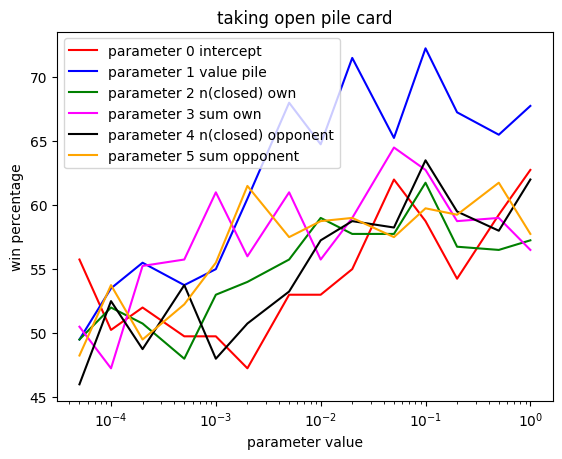

In [4]:
plt.plot(compp[0,:],100*compp[1,:],color='red',label='parameter 0 intercept') 
plt.plot(compp[0,:],100*compp[2,:],color='blue',label='parameter 1 value pile') 
plt.plot(compp[0,:],100*compp[3,:],color='green',label='parameter 2 n(closed) own') 
plt.plot(compp[0,:],100*compp[4,:],color='magenta',label='parameter 3 sum own') 
plt.plot(compp[0,:],100*compp[5,:],color='black',label='parameter 4 n(closed) opponent')  
plt.plot(compp[0,:],100*compp[6,:],color='orange',label='parameter 5 sum opponent')  
plt.legend(loc="best")
plt.xscale("log")
plt.xlabel("parameter value")
plt.ylabel("win percentage")
plt.title("taking open pile card")

No action gets very large percentages here, but as expected the value of the open card matters most.

Text(0.5, 1.0, 'discarding closed pile card')

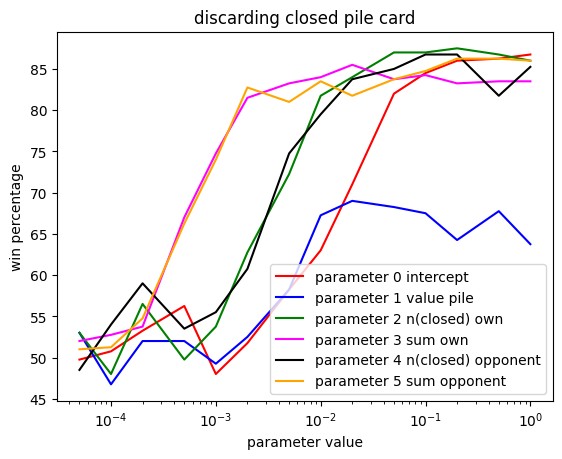

In [5]:
plt.plot(compp[0,:],100*compp[7,:],color='red',label='parameter 0 intercept') 
plt.plot(compp[0,:],100*compp[8,:],color='blue',label='parameter 1 value pile') 
plt.plot(compp[0,:],100*compp[9,:],color='green',label='parameter 2 n(closed) own') 
plt.plot(compp[0,:],100*compp[10,:],color='magenta',label='parameter 3 sum own') 
plt.plot(compp[0,:],100*compp[11,:],color='black',label='parameter 4 n(closed) opponent')  
plt.plot(compp[0,:],100*compp[12,:],color='orange',label='parameter 5 sum opponent')  
plt.legend(loc="best")
plt.xscale("log")
plt.xlabel("parameter value")
plt.ylabel("win percentage")
plt.title("discarding closed pile card")

Here the parameter more, since that is more related to finishing games first or second. In a random strategy finishing second is better since otherwise the score can be doubled when it is higher than the oppoenents. 
Sum matters for smaller paremeters because its numbers are smaller than for the number of closed cards and the values of cards. 

Text(0.5, 1.0, 'playing closed or maximum value')

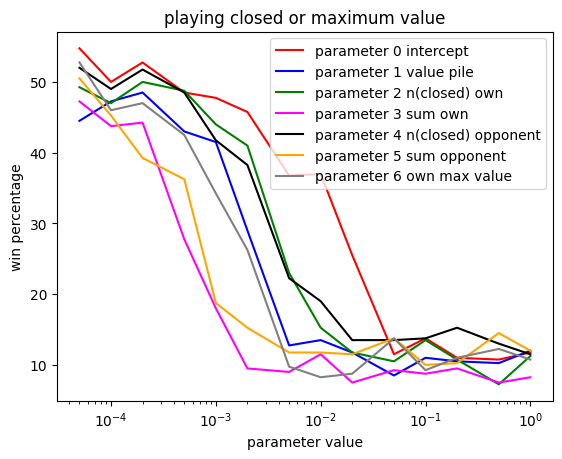

In [5]:
plt.plot(compp[0,:],100*compp[13,:],color='red',label='parameter 0 intercept') 
plt.plot(compp[0,:],100*compp[14,:],color='blue',label='parameter 1 value pile') 
plt.plot(compp[0,:],100*compp[15,:],color='green',label='parameter 2 n(closed) own') 
plt.plot(compp[0,:],100*compp[16,:],color='magenta',label='parameter 3 sum own') 
plt.plot(compp[0,:],100*compp[17,:],color='black',label='parameter 4 n(closed) opponent')  
plt.plot(compp[0,:],100*compp[18,:],color='orange',label='parameter 5 sum opponent') 
plt.plot(compp[0,:],100*compp[19,:],color='gray',label='parameter 6 own max value') 
plt.legend(loc="best")
plt.xscale("log")
plt.xlabel("parameter value")
plt.ylabel("win percentage")
plt.title("playing closed or maximum value")

Similar as before, after the sum also the value of the maximum cards matters for the decision relatively much. 

It flattened always at most at 0.1.

Now the same for negative values of parameters. First collecting the values. 

In [35]:
gram1=np.loadtxt("gradient_level20_vm0.txt")
gram2=np.loadtxt("gradient_level20_vm1.txt")
gram3=np.loadtxt("gradient_level20_vm2.txt")
gram4=np.loadtxt("gradient_level20_vm3.txt")
gram5=np.loadtxt("gradient_level20_vm4.txt")
gram6=np.loadtxt("gradient_level20_vm5.txt")
gram7=np.loadtxt("gradient_level20_vm6.txt")
gram8=np.loadtxt("gradient_level20_vm7.txt")
gram9=np.loadtxt("gradient_level20_vm8.txt")
gram10=np.loadtxt("gradient_level20_vm9.txt")
gram11=np.loadtxt("gradient_level20_vm10.txt")
compm=np.zeros((20,11))
compm[0,:]=np.array([0.00005,0.0001,0.0002,0.0005,0.001,0.002,0.005,0.01,0.02,0.05,0.1])
compm[1:20,0]=gram1[39,:]/gram1[38,:]
compm[1:20,1]=gram2[39,:]/gram2[38,:]
compm[1:20,2]=gram3[39,:]/gram3[38,:]
compm[1:20,3]=gram4[39,:]/gram4[38,:]
compm[1:20,4]=gram5[39,:]/gram5[38,:]
compm[1:20,5]=gram6[39,:]/gram6[38,:]
compm[1:20,6]=gram7[39,:]/gram7[38,:]
compm[1:20,7]=gram8[39,:]/gram8[38,:]
compm[1:20,8]=gram9[39,:]/gram9[38,:]
compm[1:20,9]=gram10[39,:]/gram10[38,:]
compm[1:20,10]=gram11[39,:]/gram11[38,:]

Text(0.5, 1.0, 'taking open pile card')

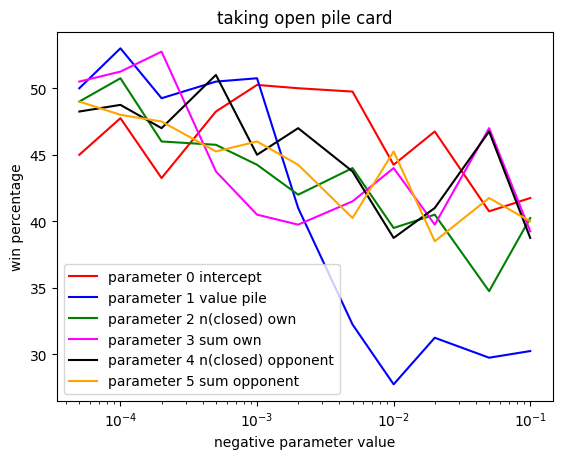

In [7]:
plt.plot(compm[0,:],100*compm[1,:],color='red',label='parameter 0 intercept') 
plt.plot(compm[0,:],100*compm[2,:],color='blue',label='parameter 1 value pile') 
plt.plot(compm[0,:],100*compm[3,:],color='green',label='parameter 2 n(closed) own') 
plt.plot(compm[0,:],100*compm[4,:],color='magenta',label='parameter 3 sum own') 
plt.plot(compm[0,:],100*compm[5,:],color='black',label='parameter 4 n(closed) opponent')  
plt.plot(compm[0,:],100*compm[6,:],color='orange',label='parameter 5 sum opponent')  
plt.legend(loc="best")
plt.xscale("log")
plt.xlabel("negative parameter value")
plt.ylabel("win percentage")
plt.title("taking open pile card")

As expected it is mostly the reverse of taking positive actions. Most deviations of it are likely chance. The same is visible below

Text(0.5, 1.0, 'discarding closed pile card')

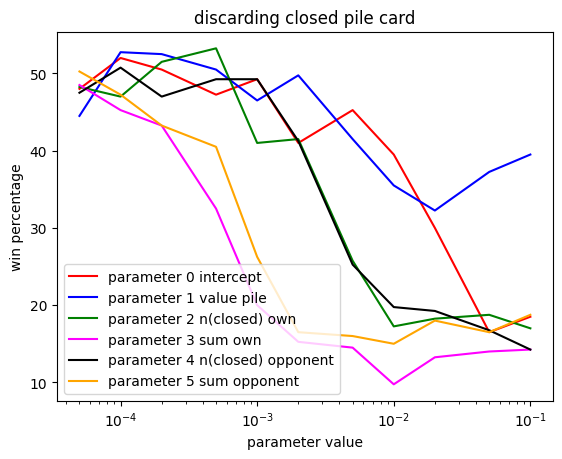

In [8]:

plt.plot(compm[0,:],100*compm[7,:],color='red',label='parameter 0 intercept') 
plt.plot(compm[0,:],100*compm[8,:],color='blue',label='parameter 1 value pile') 
plt.plot(compm[0,:],100*compm[9,:],color='green',label='parameter 2 n(closed) own') 
plt.plot(compm[0,:],100*compm[10,:],color='magenta',label='parameter 3 sum own') 
plt.plot(compm[0,:],100*compm[11,:],color='black',label='parameter 4 n(closed) opponent')  
plt.plot(compm[0,:],100*compm[12,:],color='orange',label='parameter 5 sum opponent')  
plt.legend(loc="best")
plt.xscale("log")
plt.xlabel("parameter value")
plt.ylabel("win percentage")
plt.title("discarding closed pile card")

Text(0.5, 1.0, 'playing closed or maximum value')

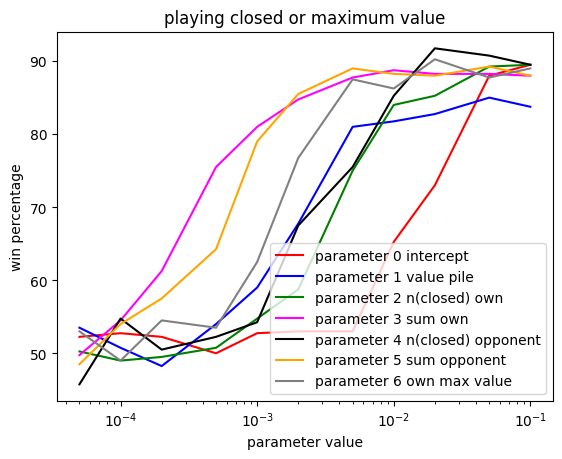

In [9]:
plt.plot(compm[0,:],100*compm[13,:],color='red',label='parameter 0 intercept') 
plt.plot(compm[0,:],100*compm[14,:],color='blue',label='parameter 1 value pile') 
plt.plot(compm[0,:],100*compm[15,:],color='green',label='parameter 2 n(closed) own') 
plt.plot(compm[0,:],100*compm[16,:],color='magenta',label='parameter 3 sum own') 
plt.plot(compm[0,:],100*compm[17,:],color='black',label='parameter 4 n(closed) opponent')  
plt.plot(compm[0,:],100*compm[18,:],color='orange',label='parameter 5 sum opponent') 
plt.plot(compm[0,:],100*compm[19,:],color='gray',label='parameter 6 own max value') 
plt.legend(loc="best")
plt.xscale("log")
plt.xlabel("parameter value")
plt.ylabel("win percentage")
plt.title("playing closed or maximum value")

Nowe combining the two and then fitting them with a function to get an estiamte of the variable range which is not so dependent on random varaiation than just using the maximum range. 

In [13]:
#x0 is fixed on 0 because that is the case floor added
def logistic_adapted(x,a,b,c):
    return a/(1+np.exp(-b*x))+c

In [55]:
print(logistic_adapted(-2,100,10,5))

5.000000206115362


In [36]:
compa=np.zeros((compm.shape[0],compm.shape[1]+compp.shape[1]))
compm=np.flip(compm,1)
compp=np.flip(compp,1)
compa[0,0:compm.shape[1]]=-compm[0]
compa[1:20,0:compm.shape[1]]=compm[1:20]
compa[:,compm.shape[1]:compa.shape[1]]=compp
print(compa[0])

[-1.e-01 -5.e-02 -2.e-02 -1.e-02 -5.e-03 -2.e-03 -1.e-03 -5.e-04 -2.e-04
 -1.e-04 -5.e-05  5.e-05  1.e-04  2.e-04  5.e-04  1.e-03  2.e-03  5.e-03
  1.e-02  2.e-02  5.e-02  1.e-01  2.e-01  5.e-01  1.e+00]


In [97]:
logpar=np.zeros((4,19))
ares=np.zeros((19,compa.shape[1]))
for i in range(19):
    popt, pcov = curve_fit(logistic_adapted, compa[0,:], 100*compa[1+i,:])
    print(popt)
    logpar[0:3,i]=popt
    fres=np.zeros((compa.shape[1]))
    for j in range(res.shape[0]):
        fres[j]=logistic_adapted(compa[0,j],popt[0],popt[1],popt[2])
    print(fres)     
    ares[i,:]=fres

[18.6247748  69.53617995 40.39012679]
[40.4078997  40.94848519 44.10190032 46.58922249 48.09975751 49.05600802
 49.37887067 49.54064354 49.63776045 49.67013693 49.68632551 49.71870287
 49.73489145 49.76726793 49.86438485 50.02615772 50.34902036 51.30527087
 52.81580589 55.30312807 58.45654319 58.99712869 59.0148846  59.01490159
 59.01490159]
[ -37.48500009 -536.97088872   69.12340004]
[31.63839995 31.63839995 31.63921237 31.81210219 34.03267929 41.18411229
 45.46633578 47.87986158 49.37544848 49.87781203 50.12931068 50.6324893
 50.88398796 51.38635151 52.88193841 55.29546421 59.5776877  66.72912069
 68.9496978  69.12258762 69.12340004 69.12340004 69.12340004 69.12340004
 69.12340004]
[ 18.39355488 739.43926106  39.55960927]
[39.55960927 39.55960927 39.55961622 39.57090865 40.00460679 42.97339551
 45.50305932 47.07537711 48.0775776  48.41651864 48.58639461 48.9263788
 49.09625478 49.43519581 50.4373963  52.00971409 54.5393779  57.50816663
 57.94186476 57.9531572  57.95316415 57.95316415

/tmp/ipykernel_4778/3323873085.py:3: RuntimeWarning: overflow encountered in exp
  return a/(1+np.exp(-b*x))+c


Text(0.5, 1.0, 'first parameter')

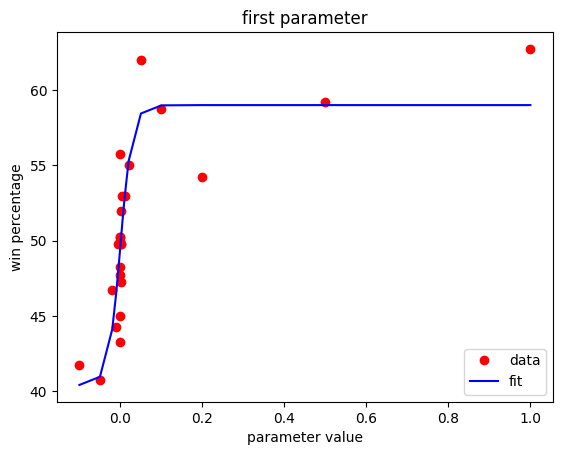

In [64]:
plt.plot(compa[0,:],100*compa[1,:],'o',color='red',label='data') 
plt.plot(compa[0,:],ares[0,:],color='blue',label='fit') 
plt.legend(loc="best")
#plt.xscale("log")
plt.xlabel("parameter value")
plt.ylabel("win percentage")
plt.title("first parameter")
#plt.xlim(-0.01,0.01)

Text(0.5, 1.0, 'parameter 18')

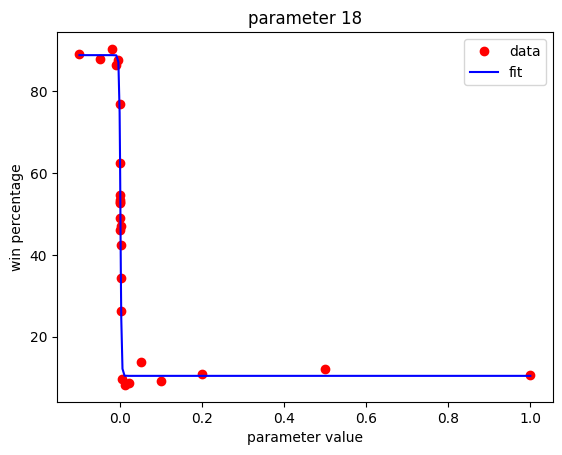

In [85]:
x=18
plt.plot(compa[0,:],100*compa[1+x,:],'o',color='red',label='data') 
plt.plot(compa[0,:],ares[x,:],color='blue',label='fit') 
plt.legend(loc="best")
#plt.xscale("log")
plt.xlabel("parameter value")
plt.ylabel("win percentage")
plt.title(f"parameter {x}")
#plt.xlim(-0.01,0.01)

(-0.01, 0.01)

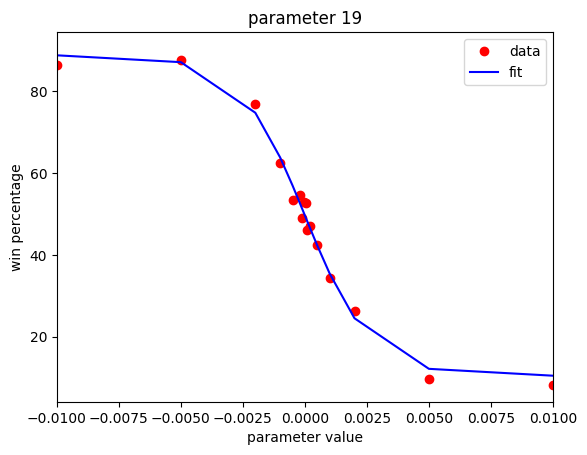

In [86]:
plt.plot(compa[0,:],100*compa[19,:],'o',color='red',label='data') 
plt.plot(compa[0,:],fres,color='blue',label='fit') 
plt.legend(loc="best")
#plt.xscale("log")
plt.xlabel("parameter value")
plt.ylabel("win percentage")
plt.title("parameter 19")
plt.xlim(-0.01,0.01)

Wanted as input for gradient fit on which scale half od the maximum posisble change happens. 

0.7502601055951177
0.7502601055951177
scale of changes
[ 0.0158191  -0.00204853  0.00148761  0.00037849  0.00427198  0.00074695
  0.01560032  0.00428962  0.00346228  0.00054269  0.00338403  0.00063986
 -0.01458805 -0.00189782 -0.00378486 -0.00044737 -0.00318601 -0.00058577
 -0.00144786]


(-0.003384028726511486, 0.003384028726511486)

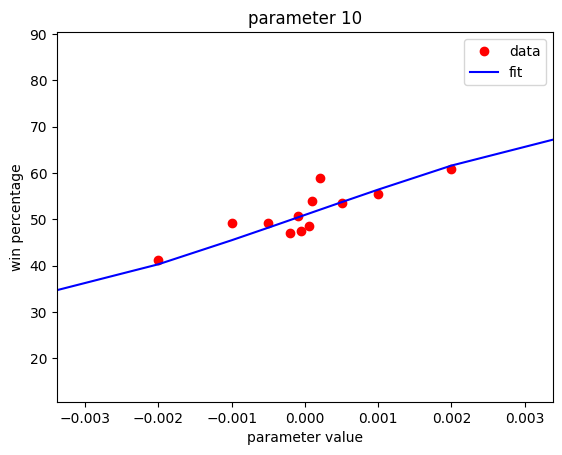

In [116]:
#for standard parameters
print(logistic_adapted(1.10,1,1,0))
#divide by b the rest does not matter
print(logistic_adapted(1.10/2,1,2,0))
logpar[3]=1.1/logpar[1]
print("scale of changes")
print(logpar[3])
x=10
plt.plot(compa[0,:],100*compa[1+x,:],'o',color='red',label='data') 
plt.plot(compa[0,:],ares[x,:],color='blue',label='fit') 
plt.legend(loc="best")
#plt.xscale("log")
plt.xlabel("parameter value")
plt.ylabel("win percentage")
plt.title(f"parameter {x}")
plt.xlim(-logpar[3,x],logpar[3,x])

As another exploring method, I now constract a Monte Carlo procedure.
As the first step I create the function montecarlo_trials.
It takes lists of several model parameters as input. These are the levels 20. It plays against those by creating Monte Cralo model, the levels 21. They  are created randomly with given ranges. It creates a given number of of Monte Cralo trails, each with the same number of game realizations. 

In [10]:
#does Monte carlo against a number of cases
#open_vars and co and and are lists of the variables to be used 
#open_ranges and discard_ranges are 2,6 np arrays, value_ranges is 2,7 np array, 
#reliazations are number of models tried in one, trials are number of MC models for level 21
def montecarlo_trials(open_vars,discard_vars,value_vars,open_ranges,discard_ranges,value_ranges,realizations,trials):
    n_it=realizations
    results=np.zeros((40,trials,len(open_vars)))
    for j in range(trials):
        print(f"doing Monte Carlo {j} for level 21")
        #create random values for level 21 within the ranges, save are used for all level 20 models
        level21_open_variable=np.zeros((6))
        level21_discard_variable=np.zeros((6))
        level21_value_variable=np.zeros((7))
        for k in range(7):
            level21_value_variable[k]=value_ranges[0,k]+random.random()*(value_ranges[1,k]-value_ranges[0,k])
            if k<6:
                level21_open_variable[k]=open_ranges[0,k]+random.random()*(open_ranges[1,k]-open_ranges[0,k])
                level21_discard_variable[k]=discard_ranges[0,k]+random.random()*(discard_ranges[1,k]-discard_ranges[0,k])
        for k in range(len(open_vars)):
            print(f"trying case {k} for level 20")
            level20_open_variable=np.array(open_vars[k])
            level20_discard_variable=np.array(discard_vars[k])
            level20_value_variable=np.array(value_vars[k])             
            print(np.round(level21_open_variable,5),np.round(level21_discard_variable,5),np.round(level21_value_variable,5))
            results[0:6,j,k]=level20_open_variable
            results[6:12,j,k]=level20_discard_variable
            results[12:19,j,k]=level20_value_variable    
            results[19:25,j,k]=level21_open_variable
            results[25:31,j,k]=level21_discard_variable
            results[31:38,j,k]=level21_value_variable         
            win20=0
            start_time=time.time()
            for i in range(n_it):
                names=['alpha','beta']
                nature=['computer','computer']
                levels=[20,21]
                winner=skyjo_game(names,nature,levels,0,True,False,level20_open_variable=level20_open_variable,level21_open_variable=level21_open_variable,level20_discard_variable=level20_discard_variable,level21_discard_variable=level21_discard_variable,level20_value_variable=level20_value_variable,level21_value_variable=level21_value_variable)
                if winner[0]==1:
                    win20+=1
            results[38,j,k]=n_it
            results[39,j,k]=win20
            stop_time=time.time()
            print(f"{n_it} games need {np.round(stop_time-start_time,3)} seconds")
            print(f"level 20 won to {np.round(win20*100/n_it,1)} %")
        print(f"level 20 won in average to {np.round(np.mean(results[39,j,:])*100/n_it,1)} %")   
    return results 

Now  I am testing the function.

In [17]:
op_range=np.zeros((2,6))
op_range[0,:]=-0.1
op_range[1,:]=0.1

dis_range=np.zeros((2,6))
dis_range[0,:]=-0.1
dis_range[1,:]=0.1

val_range=np.zeros((2,7))
val_range[0,:]=-0.1
val_range[1,:]=0.1

list_open=[np.array((0.,0.,0.,0.,0.,0.)),np.array((0,0.02,0,0,0,0)),np.array((0.,0,0,0,0,0)),np.array((0.,0,0,0,0,0))]
list_discard=[np.array((0,0,0.,0,0,0)),np.array((0,0,0,0,0,0.)),np.array((0,0,0,0.02,0,0)),np.array((0,0,0.,0,0,0))]
list_value=[np.array((0.,0,0,0,0,0,0)),np.array((0,0,0,0.,0,0,0)),np.array((0,0,0,0,0,0,0)),np.array((0,0,0,-0.01,0,0,0))]


res=montecarlo_trials(list_open,list_discard,list_value,op_range,dis_range,val_range,50,4)
np.save("mc_v3.npy",res)

doing Monte Carlo 0 for level 21
trying case 0 for level 20
[-0.04679 -0.08825  0.01073 -0.05236  0.04742  0.04028] [-0.09838 -0.03574  0.00178 -0.07373 -0.02169  0.05731] [ 0.01207  0.00757 -0.00177  0.05194  0.0767  -0.08258  0.03525]
50 games need 3.669 seconds
level 20 won to 4.0 %
trying case 1 for level 20
[-0.04679 -0.08825  0.01073 -0.05236  0.04742  0.04028] [-0.09838 -0.03574  0.00178 -0.07373 -0.02169  0.05731] [ 0.01207  0.00757 -0.00177  0.05194  0.0767  -0.08258  0.03525]
50 games need 3.019 seconds
level 20 won to 0.0 %
trying case 2 for level 20
[-0.04679 -0.08825  0.01073 -0.05236  0.04742  0.04028] [-0.09838 -0.03574  0.00178 -0.07373 -0.02169  0.05731] [ 0.01207  0.00757 -0.00177  0.05194  0.0767  -0.08258  0.03525]
50 games need 2.064 seconds
level 20 won to 2.0 %
trying case 3 for level 20
[-0.04679 -0.08825  0.01073 -0.05236  0.04742  0.04028] [-0.09838 -0.03574  0.00178 -0.07373 -0.02169  0.05731] [ 0.01207  0.00757 -0.00177  0.05194  0.0767  -0.08258  0.03525]
5

Below I plot an example. 

Text(0, 0.5, 'level 20 wins [%]')

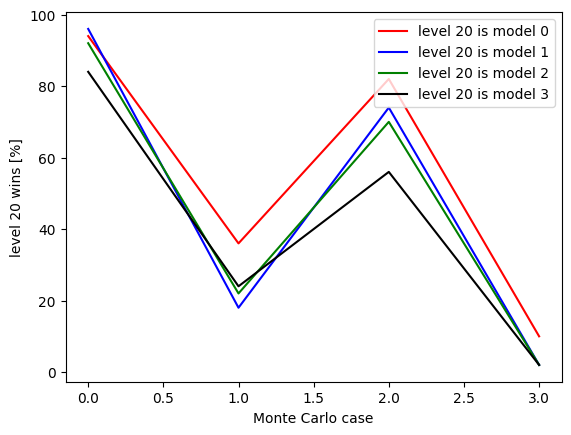

In [11]:
res3=np.load("mc_v2.npy")
plt.plot(range(4),res3[39,:,0]/res3[38,:,0]*100,color='red',label='level 20 is model 0') 
plt.plot(range(4),res3[39,:,1]/res3[38,:,0]*100,color='blue',label='level 20 is model 1') 
plt.plot(range(4),res3[39,:,2]/res3[38,:,0]*100,color='green',label='level 20 is model 2') 
plt.plot(range(4),res3[39,:,3]/res3[38,:,0]*100,color='black',label='level 20 is model 3') 
plt.legend(loc="best")
#plt.xscale("log")
plt.xlabel("Monte Carlo case")
plt.ylabel("level 20 wins [%]")

Rather easy to improve compared to the current models. Below I print the parameters of the best case that they can be easily used for human trial. 

In [12]:
print(res3[19:25,3,2])
print(res3[25:31,3,2])
print(res3[31:38,3,2])

[ 0.01940094  0.05146526 -0.02648223 -0.07416882 -0.00188127 -0.01222425]
[ 0.07948311  0.05037697  0.00790461 -0.03574202  0.01697387 -0.05714196]
[-0.05759114  0.07014045 -0.05425065  0.09631128 -0.06878424 -0.00164203
  0.08420359]


As another test I include this model in the list of input models. It should clearly harder to win against this one. 

In [18]:
op_range=np.zeros((2,6))
op_range[0,:]=-0.1
op_range[1,:]=0.1

dis_range=np.zeros((2,6))
dis_range[0,:]=-0.1
dis_range[1,:]=0.1

val_range=np.zeros((2,7))
val_range[0,:]=-0.1
val_range[1,:]=0.1

list_open2=[np.array((0.,0.,0.,0.,0.,0.)),np.array((0,0.02,0,0,0,0)),np.array((0.,0,0,0,0,0)),np.array((0.,0,0,0,0,0)),res3[19:25,3,2]]
list_discard2=[np.array((0,0,0.,0,0,0)),np.array((0,0,0,0,0,0.)),np.array((0,0,0,0.02,0,0)),np.array((0,0,0.,0,0,0)),res3[25:31,3,2]]
list_value2=[np.array((0.,0,0,0,0,0,0)),np.array((0,0,0,0.,0,0,0)),np.array((0,0,0,0,0,0,0)),np.array((0,0,0,-0.01,0,0,0)),res3[31:38,3,2]]

res2=montecarlo_trials(list_open2,list_discard2,list_value2,op_range,dis_range,val_range,50,5)
np.save("mc_v6.npy",res2)

doing Monte Carlo 0 for level 21
trying case 0 for level 20
[-0.05578  0.08107  0.0721   0.01121 -0.08385  0.04489] [ 0.07796  0.09251 -0.09946 -0.07437  0.02669 -0.09287] [-0.01844  0.04515  0.09698  0.00047 -0.07023  0.05586  0.06344]
50 games need 3.768 seconds
level 20 won to 38.0 %
trying case 1 for level 20
[-0.05578  0.08107  0.0721   0.01121 -0.08385  0.04489] [ 0.07796  0.09251 -0.09946 -0.07437  0.02669 -0.09287] [-0.01844  0.04515  0.09698  0.00047 -0.07023  0.05586  0.06344]
50 games need 2.397 seconds
level 20 won to 4.0 %
trying case 2 for level 20
[-0.05578  0.08107  0.0721   0.01121 -0.08385  0.04489] [ 0.07796  0.09251 -0.09946 -0.07437  0.02669 -0.09287] [-0.01844  0.04515  0.09698  0.00047 -0.07023  0.05586  0.06344]
50 games need 2.451 seconds
level 20 won to 24.0 %
trying case 3 for level 20
[-0.05578  0.08107  0.0721   0.01121 -0.08385  0.04489] [ 0.07796  0.09251 -0.09946 -0.07437  0.02669 -0.09287] [-0.01844  0.04515  0.09698  0.00047 -0.07023  0.05586  0.06344]

Below I plot the winning percentages of these comparisons. 

Text(0, 0.5, 'level 20 wins [%]')

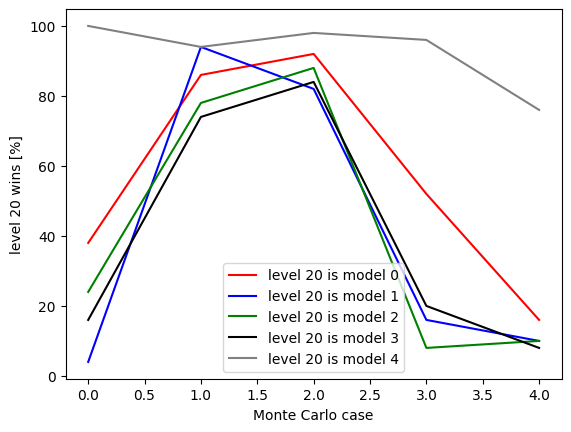

In [13]:
res2=np.load("mc_v6.npy")
plt.plot(range(5),res2[39,:,0]/res2[38,:,0]*100,color='red',label='level 20 is model 0') 
plt.plot(range(5),res2[39,:,1]/res2[38,:,0]*100,color='blue',label='level 20 is model 1') 
plt.plot(range(5),res2[39,:,2]/res2[38,:,0]*100,color='green',label='level 20 is model 2') 
plt.plot(range(5),res2[39,:,3]/res2[38,:,0]*100,color='black',label='level 20 is model 3') 
plt.plot(range(5),res2[39,:,4]/res2[38,:,0]*100,color='gray',label='level 20 is model 4')
plt.legend(loc="best")
#plt.xscale("log")
plt.xlabel("Monte Carlo case")
plt.ylabel("level 20 wins [%]")

As expected the latest model (model 4) performs clearly better than the other models. 

Now I am changing the function somewhat to make it faster by stopping it early when either a good model is found 
or a Monte Carlo realization is clearly (not) an improvement. Below I first calculate how iterations are at least needed, that a test whether the fit is clear bad/good makes sense. I excluded cases which to 98% not from a Gaussian distribution on both sides that correspinds to 2.33 sigma. 

In [15]:
x=100
sig=(0-x/2)/np.sqrt(x)
print(sig)
#sig**2=(x**2)/4/x
#sig**2=x/4
sig2=2.33
x2=(sig2**2)*4
print(x2)


-5.0
21.715600000000002


The results if that for n greater equal 22 a significance test makes sense. This number is larger enough that using the Gaussian approxiamtions for a a in principel bionamial varaible is good enough that differences don't matter in practice. 

In [14]:
#does Monte carlo against a number of cases
#open_vars and co and and are lists of the variables to be used 
#open_ranges and discard_ranges are 2,6 np arrays, value_ranges is 2,7 np array, 
#reliazations are number of models tried in one, trials are number of MC models for level 21
#wfrac when it aborts early
#wfrac2 performance of worst case .
def montecarlo_trials2(open_vars,discard_vars,value_vars,open_ranges,discard_ranges,value_ranges,realizations,trials,wfrac=0.10,wfrac2=0.551):
    n_it=realizations
    results=np.zeros((41,trials,len(open_vars)))
    for j in range(trials):
        print(f"doing Monte Carlo {j} for level 21")
        #create random values for level 21 within the ranges, save are used for all level 20 models
        level21_open_variable=np.zeros((6))
        level21_discard_variable=np.zeros((6))
        level21_value_variable=np.zeros((7))
        for k in range(7):
            level21_value_variable[k]=value_ranges[0,k]+random.random()*(value_ranges[1,k]-value_ranges[0,k])
            if k<6:
                level21_open_variable[k]=open_ranges[0,k]+random.random()*(open_ranges[1,k]-open_ranges[0,k])
                level21_discard_variable[k]=discard_ranges[0,k]+random.random()*(discard_ranges[1,k]-discard_ranges[0,k])
        for k in range(len(open_vars)):
            print(f"trying case {k} for level 20")
            level20_open_variable=np.array(open_vars[k])
            level20_discard_variable=np.array(discard_vars[k])
            level20_value_variable=np.array(value_vars[k])             
            results[0:6,j,k]=level20_open_variable
            results[6:12,j,k]=level20_discard_variable
            results[12:19,j,k]=level20_value_variable    
            results[19:25,j,k]=level21_open_variable
            results[25:31,j,k]=level21_discard_variable
            results[31:38,j,k]=level21_value_variable         
            win20=0
            it_counter=0
            start_time=time.time()
            n_it1=n_it
            if n_it1>22:
                n_it1=22
            #22 always     
            for i in range(n_it1):
                names=['alpha','beta']
                nature=['computer','computer']
                levels=[20,21]
                it_counter+=1
                winner=skyjo_game(names,nature,levels,0,True,False,level20_open_variable=level20_open_variable,level21_open_variable=level21_open_variable,level20_discard_variable=level20_discard_variable,level21_discard_variable=level21_discard_variable,level20_value_variable=level20_value_variable,level21_value_variable=level21_value_variable)
                if winner[0]==1:
                    win20+=1
            #98% ownside win conditions tested here   2.33 sigma   stops early when new model clearly bad or good 
            while it_counter<n_it and abs((win20-it_counter/2)/np.sqrt(it_counter))<2.33:  
                names=['alpha','beta']
                nature=['computer','computer']
                levels=[20,21]
                it_counter+=1
                winner=skyjo_game(names,nature,levels,0,True,False,level20_open_variable=level20_open_variable,level21_open_variable=level21_open_variable,level20_discard_variable=level20_discard_variable,level21_discard_variable=level21_discard_variable,level20_value_variable=level20_value_variable,level21_value_variable=level21_value_variable)
                if winner[0]==1:
                    win20+=1                
            #now checking whether 98% sigficant on bad performance        
            results[38,j,k]=it_counter
            results[39,j,k]=win20
            results[40,j,k]=100*win20/it_counter         
            stop_time=time.time()
            print(f"{it_counter} games need {np.round(stop_time-start_time,3)} seconds")
            print(f"level 20 won to {np.round(results[40,j,k],1)} %")
        print(f"level 20 won in average to {np.round(np.mean(results[40,j,:]),1)} %") 
        if np.mean(results[40,j,:]/100)<wfrac and np.max(results[40,j,:]/100)<wfrac2:
            print("better model found")
            if j==0:
                return True, results[:,j,:], results[:,j,:]
            else:
                #give back fit converged or not, best models, all models 
                return True, results[:,j,:], results[:,0:j+1,:]
    print("no better model found") 
    #second parameter is noen will not be used later
    return False, None, results 

Now I am running for a test.

In [16]:
op_range=np.zeros((2,6))
op_range[0,:]=-0.1
op_range[1,:]=0.1

dis_range=np.zeros((2,6))
dis_range[0,:]=-0.1
dis_range[1,:]=0.1

val_range=np.zeros((2,7))
val_range[0,:]=-0.1
val_range[1,:]=0.1

#load past iteration
with open('mc_v5_list_open.pkl', 'rb') as f:
    # The protocol version used is detected automatically, so we do not
    # have to specify it.
    list_open5 = pickle.load(f)   
with open('mc_v5_list_discard.pkl', 'rb') as f:
    # The protocol version used is detected automatically, so we do not
    # have to specify it.
    list_discard5 = pickle.load(f)  
with open('mc_v5_list_value.pkl', 'rb') as f:
    # The protocol version used is detected automatically, so we do not
    # have to specify it.
    list_value5 = pickle.load(f)      
print(list_open5)
print(list_discard5)
print(list_value5)

start_time=time.time()
boolean,bestres,allres=montecarlo_trials2(list_open5,list_discard5,list_value5,op_range,dis_range,val_range,50,10,wfrac=0.001,wfrac2=0.002)
#v8/v9 on purpose impossible crieteria to just run all iterations with predictable operation duration
#now now changed
np.save("mc_v9b_all.npy",allres)
stop_time=time.time()
print(f"ran for {np.round(stop_time-start_time,2)} seconds")
#v8 20 trials need 418 second thus one trial need 21 seconds, 850 needed ran for 19897.58 seconds

[array([ 0.01940094,  0.05146526, -0.02648223, -0.07416882, -0.00188127,
       -0.01222425]), array([ 0.06411199, -0.06714365, -0.06118923, -0.07942706,  0.00706517,
       -0.09106071]), array([-0.03454234, -0.07293471,  0.03456145, -0.08240488, -0.01995018,
        0.01688238]), array([-0.03837573, -0.03494162,  0.06913455, -0.02994554,  0.00301286,
        0.00258103]), array([ 0.08420437,  0.01523879, -0.04838138,  0.04800721, -0.0470724 ,
       -0.09039604]), array([ 0.04234292, -0.07189049, -0.06083353,  0.06398506,  0.05762561,
       -0.06334734])]
[array([ 0.07948311,  0.05037697,  0.00790461, -0.03574202,  0.01697387,
       -0.05714196]), array([ 0.08944088,  0.0080087 ,  0.09545899, -0.06307576, -0.02390966,
        0.01762127]), array([ 0.05187052, -0.04812191,  0.05987011, -0.09685987, -0.03279703,
       -0.06690501]), array([-0.06190827,  0.00287039,  0.09979345, -0.05605547,  0.04381588,
        0.02095178]), array([-0.04095933,  0.02911903,  0.05907581, -0.06453082,

NameError: name 'montecarlo_trials2' is not defined

Below I am printing the output for a test. 

In [15]:
allres=np.load("mc_v8_all.npy")
print("win % of level 20, mean over different level 20")
print(np.round(np.mean(allres[40,:,:],0),3))
print("win % of level 20, mean over different level 21")
print(np.round(np.mean(allres[40,:,:],1),3))

win % of level 20, mean over different level 20
[86.696 90.739 91.577 91.065 94.131 94.505]
win % of level 20, mean over different level 21
[100.     91.747  98.077  98.077  96.866  33.185  90.177  97.607  97.276
 100.     93.529  92.897 100.    100.    100.     91.248  98.077  97.436
  55.     97.844]


Since model 20 is iteratively improved it should getter, and this is the case against the random model 21 here. 
In contrast the different Monte Carlos (model 21) there is no improve,ent and in most case level 20 is better. 

In [63]:
allres2=np.load("mc_v9_all.npy")
print("win % of level 20, mean over different level 20")
print(np.round(np.mean(allres2[40,:,:],0),3))
c=0
list_open7=[]
list_discard7=[]
list_value7=[]
for i in range(850):
    if np.mean(allres2[40,i,4:6])<45 and np.max(allres2[40,i,:])<60:
        print(allres2[40,i,:])
        list_open7.append(allres2[19:25,i,0])
        list_discard7.append(allres2[25:31,i,0])        
        list_value7.append(allres2[31:38,i,0]) 
        if np.mean(allres2[40,i,4:6])<30:
            print(allres2[19:25,i,0])
            print(allres2[25:31,i,0])      
            print(allres2[31:38,i,0])          
            print(np.mean(allres2[40,i,:]))
        c+=1
print(c)        
print(list_open7)
op_range=np.zeros((2,6))
op_range[0,:]=-0.1
op_range[1,:]=0.1

dis_range=np.zeros((2,6))
dis_range[0,:]=-0.1
dis_range[1,:]=0.1

val_range=np.zeros((2,7))
val_range[0,:]=-0.1
val_range[1,:]=0.1

start_time=time.time()
boolean,bestres,allres=montecarlo_trials2(list_open7,list_discard7,list_value7,op_range,dis_range,val_range,50,2,wfrac=0.001,wfrac2=0.002)
#v10 on purpose impossible crieteria to just run all iterations with predictable operation duration
np.save("mc_v10b_all.npy",allres)
stop_time=time.time()
print(f"ran for {np.round(stop_time-start_time,2)} seconds")
#v8 20 trials need second   from (8*3600/(346/20)*(21/(19898/850))) follows 1493 trials

win % of level 20, mean over different level 20
[88.469 89.841 90.557 92.211 95.397 94.818]
[11.11111111 30.         16.32653061 28.         28.         50.        ]
[22. 22. 24. 28. 54. 18.]
[ 6.66666667 24.         11.11111111 26.         34.         46.        ]
[22. 22. 22. 18. 36. 20.]
[-0.06021169 -0.0902781  -0.00155455 -0.01841127  0.01388234 -0.05260926]
[ 0.04392365  0.06372851  0.00895102 -0.03337745 -0.02530273 -0.01245152]
[-0.04173424  0.08223763 -0.03537622  0.00899935  0.00076008  0.00648293
 -0.01169367]
23.333333333333332
[11.11111111 24.          9.09090909 44.         36.         26.        ]
[24.         36.          3.84615385 20.         28.         28.        ]
[-6.53596770e-05 -6.90977851e-02  1.60961960e-02 -4.81552487e-03
 -7.62965770e-02 -1.97269779e-02]
[-0.08082592  0.06676512 -0.04384349 -0.05287561  0.04113271  0.0027597 ]
[-0.05080273  0.07236404  0.01826358  0.00383818 -0.09585997  0.037045
 -0.0452486 ]
23.307692307692307
6
[array([-0.06831686,  0.027

In [17]:
allres3=np.load("mc_v10_all.npy")
print(allres3.shape)
print("win % of level 20, mean over different level 20")
print(np.round(np.mean(allres3[40,:,:],0),3))
c=0
list_open8=[]
list_discard8=[]
list_value8=[]
for i in range(850):
    if np.mean(allres3[40,i,:])<45 and np.max(allres3[40,i,:])<60:
        print(allres3[40,i,:])
        list_open8.append(allres3[19:25,i,0])
        list_discard8.append(allres3[25:31,i,0])        
        list_value8.append(allres3[31:38,i,0])            
        print(i)
        c+=1
print(c)        
print(list_open8)

(41, 1490, 6)
win % of level 20, mean over different level 20
[96.699 96.435 97.84  97.137 95.297 96.597]
[44. 32. 46. 52. 36. 48.]
326
1
[array([-0.04478875, -0.03684177,  0.07464749,  0.0019649 , -0.03943901,
       -0.08213137])]


Only one better then, now I plot the models by perfomance. 

Text(0.5, 1.0, 'open parameters')

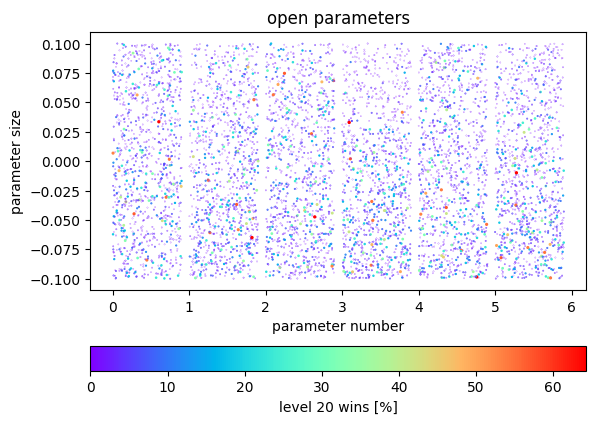

In [66]:
for_openplot=np.zeros((3,8940))
for_discardplot=np.zeros((3,8940))
for_valueplot=np.zeros((3,10430))
c=0
for j in range(allres3.shape[1]):
    for i in range(6):
        for_openplot[0,c]=i+random.random()*0.9
        for_openplot[2,c]=np.mean(allres3[40,j,:])            
        for_openplot[1,c]=allres3[19+i,j,0]
        c+=1            

c=0
for j in range(allres3.shape[1]):
    for i in range(6):
        for_discardplot[0,c]=i+random.random()*0.9
        for_discardplot[2,c]=np.mean(allres3[40,j,:])            
        for_discardplot[1,c]=allres3[25+i,j,0]
        c+=1      

c=0
for j in range(allres3.shape[1]):
    for i in range(7):
            for_valueplot[0,c]=i+random.random()*0.9
            for_valueplot[2,c]=np.mean(allres3[40,j,:])            
            for_valueplot[1,c]=allres3[31+i,j,0]
            c+=1      

plt.scatter(x=for_openplot[0], y=for_openplot[1], c=100-for_openplot[2],s=3-for_openplot[2]/100*3, cmap="rainbow")
plt.colorbar(label="level 20 wins [%]", orientation="horizontal")
plt.xlabel("parameter number")
plt.ylabel("parameter size")
plt.title("open parameters")

Text(0.5, 1.0, 'discard parameters')

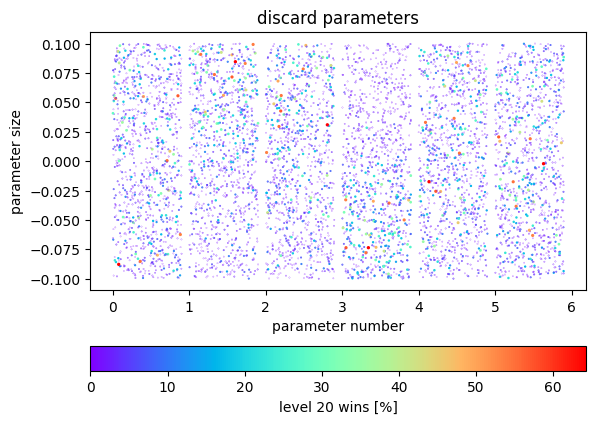

In [65]:

plt.scatter(x=for_discardplot[0], y=for_discardplot[1], c=100-for_discardplot[2],s=3-for_discardplot[2]/100*3, cmap="rainbow")
plt.colorbar(label="level 20 wins [%]", orientation="horizontal")
plt.xlabel("parameter number")
plt.ylabel("parameter size")
plt.title("discard parameters")

Text(0.5, 1.0, 'value parameters')

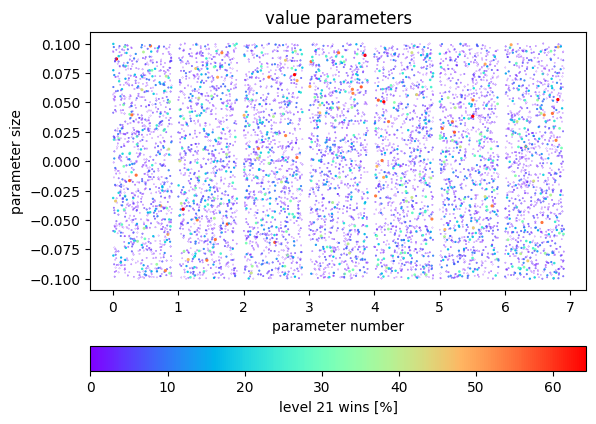

In [64]:
plt.scatter(x=for_valueplot[0], y=for_valueplot[1], c=100-for_valueplot[2],s=3-for_valueplot[2]/100*3, cmap="rainbow")
plt.colorbar(label="level 21 wins [%]", orientation="horizontal")
plt.xlabel("parameter number")
plt.ylabel("parameter size")
plt.title("value parameters")

It is not very easy to see which is better, there are some differences, but it shws that the pure Monte Carlo method reached its limit. 
Now I am building the Monte Carlo fitting function. 
  

First I create to helper functions to convert list of array output to numpy output.

In [18]:
#using input arrays of varaible shape[1] where the largest the the last one 
#only possible if there is one to add
def bestfit_to_array(list_best):
    if len(list_best)>0:
        last=list_best[len(list_best)-1]
        results=np.zeros((last.shape[0],last.shape[1],len(list_best)))
        #set not filled values to -100 to be clearly impossible
        results[:,:,:]=-100
        for i in range(len(list_best)):
            results[0:list_best[i].shape[0],0:list_best[i].shape[1],i]=list_best[i]
        return results  
    else:
        print("List is of length 0, no combination possible.")
        results=np.array([-100.])
        return results

Below I test the function. 

In [19]:
list2=[]
print(list2)
res=bestfit_to_array(list2)
print(res.shape,res)
list2=[np.zeros((41,5))]
print(list2[0].shape)
res=bestfit_to_array(list2)
print(res.shape)
list2=[np.zeros((6,5)),np.zeros((6,6))]
print(list2[0].shape)
res=bestfit_to_array(list2)
print(res.shape)

[]
List is of length 0, no combination possible.
(1,) [-100.]
(41, 5)
(41, 5, 1)
(6, 5)
(6, 6, 2)


Next the similar function which works on lists of 3d arrays. 

In [20]:
#works on list of 3d arrays, also of length 1 not of length 0, but that should not possible 
def allfits_to_array(list_all):
    if len(list_all)>0:
        dims=np.zeros((3,len(list_all)))
        for i in range(len(list_all)):
            dims[:,i]=list_all[i].shape
        results=np.zeros((int(max(dims[0,:])),int(max(dims[1,:])),int(max(dims[2,:])),len(list_all)))
        results[:]=-100  
        for i in range(len(list_all)):
            results[0:list_all[i].shape[0],0:list_all[i].shape[1],0:list_all[i].shape[2],i]=list_all[i]
        return results 
    else:
        print("List is of length 0, no combination possible.")
        results=np.array([-100.])
        return results

Below I test the function. 

In [21]:
list2=[]
print(list2)
res=allfits_to_array(list2)
print(res.shape,res)
list2=[np.zeros((41,5,2))]
print(list2[0].shape)
res=allfits_to_array(list2)
print(res.shape)
list2=[np.zeros((41,5,2)),np.zeros((40,4,3))]
print(list2[0].shape,list2[1].shape)
res=allfits_to_array(list2)
print(res.shape)

[]
List is of length 0, no combination possible.
(1,) [-100.]
(41, 5, 2)
(41, 5, 2, 1)
(41, 5, 2) (40, 4, 3)
(41, 5, 3, 2)


Now to the MonteCarlo fit function itself. 
It start with a list of input moel parameters and adds to it iteratively more models which perform at least somewhat better. If no such model is found the fit ends early.

In [22]:
#paarmeters, list of open parameters,  list of discard parameters, list of value parameters,
#open parameter ranges, discard parameter ranges, value parameter ranges,
#maximum number of games palyed for model pair. 
#Maximum number of Monte carlo pairs, 
#maxium number of added models tried,
#wfrac average maximum win fraction  for level 20, #wfrac2 maximum win fraction for single level 20 model
#both need to be smaller
def montecarlo_fit(open_vars,discard_vars,value_vars,open_ranges,discard_ranges,value_ranges,realizations=50,trials=10,max_iter=10,wfrac=0.10,wfrac2=0.5):
    #list to performances of winner models
    list_best_result=[]
    list_all_results=[]
    for i in range(max_iter):
        print(f"iteration {i} using {len(open_vars)} level 20 models")
        boolean,best_result,all_results=montecarlo_trials2(open_vars,discard_vars,value_vars,open_ranges,discard_ranges,value_ranges,realizations,trials,wfrac=wfrac,wfrac2=wfrac2)
        # good model found
        if boolean==True:
            #append this model
            open_vars.append(best_result[19:25,0])
            discard_vars.append(best_result[25:31,0])
            value_vars.append(best_result[31:38,0])
            print("model to append found")
            print(f"best model won to {np.round(100-np.mean(best_result[40,:]),1)} %")
            list_best_result.append(best_result)
            list_all_results.append(all_results)
        else:
            #no better found, still data collected but not ;best model added'      
            print("no model to append found iterations stopped early")
            list_all_results.append(all_results)
            array_best_result=bestfit_to_array(list_best_result)
            array_all_results=allfits_to_array(list_all_results)    
            return open_vars, discard_vars, value_vars,array_best_result,array_all_results 
    print("all iterations done")
    #converting lists to arrays
    array_best_result=bestfit_to_array(list_best_result)
    array_all_results=allfits_to_array(list_all_results)    
    return open_vars, discard_vars, value_vars,array_best_result,array_all_results    
#should also put all model and to save performances 

Below I run, shown is a short run, longer were run and saved before. 

In [229]:
op_range=np.zeros((2,6))
op_range[0,:]=-0.1
op_range[1,:]=0.1

dis_range=np.zeros((2,6))
dis_range[0,:]=-0.1
dis_range[1,:]=0.1

val_range=np.zeros((2,7))
val_range[0,:]=-0.1
val_range[1,:]=0.1

#load past iteration
with open('mc_v5_list_open.pkl', 'rb') as f:
    # The protocol version used is detected automatically, so we do not
    # have to specify it.
    list_open5 = pickle.load(f)   
with open('mc_v5_list_discard.pkl', 'rb') as f:
    # The protocol version used is detected automatically, so we do not
    # have to specify it.
    list_discard5 = pickle.load(f)  
with open('mc_v5_list_value.pkl', 'rb') as f:
    # The protocol version used is detected automatically, so we do not
    # have to specify it.
    list_value5 = pickle.load(f)      
print(list_open5)
print(list_discard5)
print(list_value5)

#printing more than it should shape and best min 
start_time=time.time()
list_open3,list_discard3,list_value3,array_bestres3,array_allres3=montecarlo_fit(list_open5,list_discard5,list_value5,op_range,dis_range,val_range,realizations=50,trials=5,wfrac=0.45,max_iter=3,wfrac2=0.6)
np.save("mc_v6_list_res.npy",array_bestres3)
np.save("mc_v6_list_allres.npy",array_allres3)
with open('mc_v6_list_open.pkl', 'wb') as f:
    pickle.dump(list_open3, f, pickle.HIGHEST_PROTOCOL)
with open('mc_v6_list_discard.pkl', 'wb') as f:
    pickle.dump(list_discard3, f, pickle.HIGHEST_PROTOCOL)
with open('mc_v6_list_value.pkl', 'wb') as f:
    pickle.dump(list_value3, f, pickle.HIGHEST_PROTOCOL)    
stop_time=time.time()
print(f"ran for {np.round(stop_time-start_time,2)} seconds")


[array([ 0.01940094,  0.05146526, -0.02648223, -0.07416882, -0.00188127,
       -0.01222425]), array([ 0.06411199, -0.06714365, -0.06118923, -0.07942706,  0.00706517,
       -0.09106071]), array([-0.03454234, -0.07293471,  0.03456145, -0.08240488, -0.01995018,
        0.01688238]), array([-0.03837573, -0.03494162,  0.06913455, -0.02994554,  0.00301286,
        0.00258103]), array([ 0.08420437,  0.01523879, -0.04838138,  0.04800721, -0.0470724 ,
       -0.09039604]), array([ 0.04234292, -0.07189049, -0.06083353,  0.06398506,  0.05762561,
       -0.06334734])]
[array([ 0.07948311,  0.05037697,  0.00790461, -0.03574202,  0.01697387,
       -0.05714196]), array([ 0.08944088,  0.0080087 ,  0.09545899, -0.06307576, -0.02390966,
        0.01762127]), array([ 0.05187052, -0.04812191,  0.05987011, -0.09685987, -0.03279703,
       -0.06690501]), array([-0.06190827,  0.00287039,  0.09979345, -0.05605547,  0.04381588,
        0.02095178]), array([-0.04095933,  0.02911903,  0.05907581, -0.06453082,

Now loading past fits result. The loaded fit had not yet an extra condition on the best level 20 model. I make a plot on the win percentage

(41, 12, 8)
[-0.09923392  0.03984586  0.03498189 -0.00576379 -0.00164228 -0.03251231
  0.02618759 -0.08613913  0.06374869 -0.08448752 -0.02141158 -0.01957679
 -0.09295743  0.03691107  0.00654938  0.00254979  0.08551578  0.01504413
  0.09738389]
[-0.09923392  0.03984586  0.03498189 -0.00576379 -0.00164228 -0.03251231
  0.02618759 -0.08613913  0.06374869 -0.08448752 -0.02141158 -0.01957679
 -0.09295743  0.03691107  0.00654938  0.00254979  0.08551578  0.01504413
  0.09738389]
68
[ 5.  6.  7.  8.  9. 10. 11. 12.]


Text(0.5, 1.0, 'Model numbers are shared here')

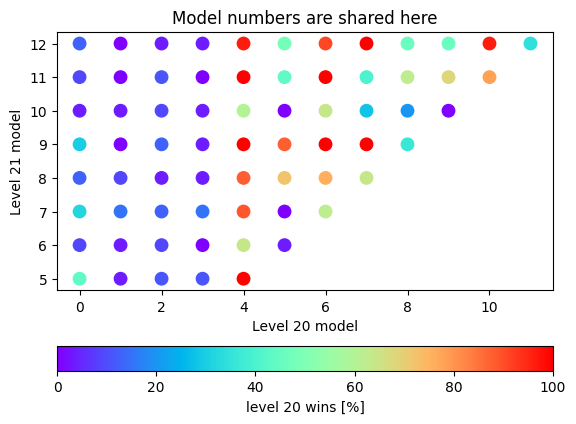

In [23]:
with open('mc_v1_list_res.pkl', 'rb') as f:
    # The protocol version used is detected automatically, so we do not
    # have to specify it.
    list_res3b = pickle.load(f)   
res5=bestfit_to_array(list_res3b)
#below need to make to function best also consider for cases of model sharing 
grid = np.indices((res5[40,:,:].shape[0],res5[40,:,:].shape[1]))
print(res5.shape)
counter=0
vec=np.zeros((res5.shape[2]))
vec[:]=-1
print(res5[0:19,5,1])
print(res5[19:38,4,0])
for i in range(res5.shape[1]):
    for j in range(res5.shape[2]):
        if res5[40,i,j]>-1:
            counter+=1
            for k in range(res5.shape[1]):
                for l in range(res5.shape[2]):          
                    if np.sum(res5[0:19,i,j])==np.sum(res5[19:38,k,l]): 
                        vec[l]=i
print(counter)  
vec[vec.shape[0]-1]=vec[vec.shape[0]-2]+1
print(vec)
counter=0
results=np.zeros((4,68))   
for i in range(res5.shape[1]):
    for j in range(res5.shape[2]):
        if res5[40,i,j]>-1:
            results[0,counter]=i
            results[1,counter]=j
            results[2,counter]=vec[j]
            results[3,counter]=res5[40,i,j]
            counter+=1
#plt.plot(grid[0],grid[1],'o',color='red') 
plt.scatter(x=results[0], y=results[2], c=results[3,:],s=80, cmap="rainbow")
plt.colorbar(label="level 20 wins [%]", orientation="horizontal")
#plt.xscale("log")
plt.xlabel("Level 20 model")
plt.ylabel("Level 21 model")
plt.title("Model numbers are shared here")

It is visible that it is easy to be better than the models 0 to 3, for them at most one parameter is different from 0 models, but then it gets more difficult. 

Since these models are not particular good, they are now ignored. 

Below I load the model parameters of the currently acceptable models. 

6


Text(0.5, 1.0, 'open parameters')

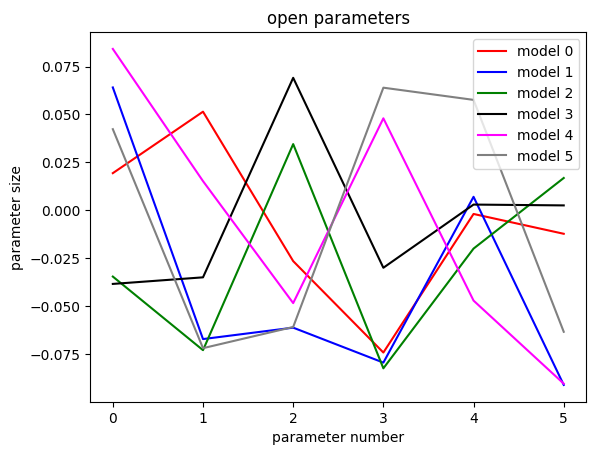

In [24]:
with open('mc_v5_list_open.pkl', 'rb') as f:
    # The protocol version used is detected automatically, so we do not
    # have to specify it.
    list_open5 = pickle.load(f)   
with open('mc_v5_list_discard.pkl', 'rb') as f:
    # The protocol version used is detected automatically, so we do not
    # have to specify it.
    list_discard5 = pickle.load(f)  
with open('mc_v5_list_value.pkl', 'rb') as f:
    # The protocol version used is detected automatically, so we do not
    # have to specify it.
    list_value5 = pickle.load(f)  
print(len(list_open5))    
plt.plot(range(6),list_open5[0],color='red',label='model 0') 
plt.plot(range(6),list_open5[1],color='blue',label='model 1') 
plt.plot(range(6),list_open5[2],color='green',label='model 2') 
plt.plot(range(6),list_open5[3],color='black',label='model 3') 
plt.plot(range(6),list_open5[4],color='magenta',label='model 4')
plt.plot(range(6),list_open5[5],color='gray',label='model 5') 
plt.legend(loc="best")
#plt.xscale("log")
plt.xlabel("parameter number")
plt.ylabel("parameter size")
plt.title("open parameters")

Text(0.5, 1.0, 'discard parameters')

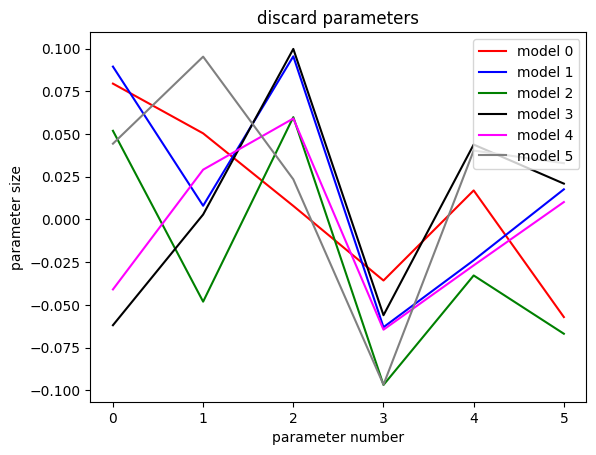

In [25]:
plt.plot(range(6),list_discard5[0],color='red',label='model 0') 
plt.plot(range(6),list_discard5[1],color='blue',label='model 1') 
plt.plot(range(6),list_discard5[2],color='green',label='model 2') 
plt.plot(range(6),list_discard5[3],color='black',label='model 3') 
plt.plot(range(6),list_discard5[4],color='magenta',label='model 4')
plt.plot(range(6),list_discard5[5],color='gray',label='model 5') 
plt.legend(loc="best")
#plt.xscale("log")
plt.xlabel("parameter number")
plt.ylabel("parameter size")
plt.title("discard parameters")

Here in discard is the clearest preference, for 2 (number of own closed cards) for large and for 3 (sum of own open cards)for small.

Text(0.5, 1.0, 'value parameters')

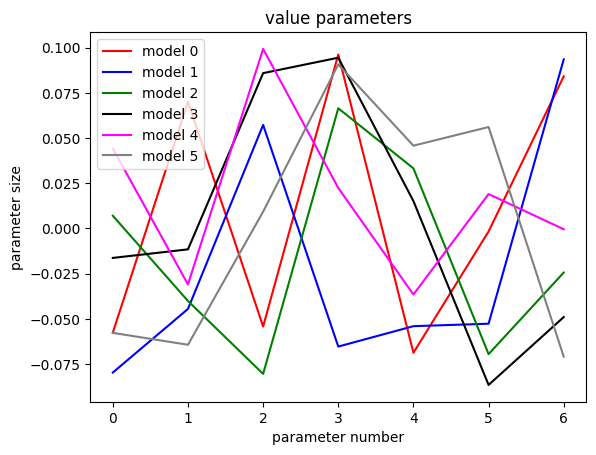

In [26]:
plt.plot(range(7),list_value5[0],color='red',label='model 0') 
plt.plot(range(7),list_value5[1],color='blue',label='model 1') 
plt.plot(range(7),list_value5[2],color='green',label='model 2') 
plt.plot(range(7),list_value5[3],color='black',label='model 3') 
plt.plot(range(7),list_value5[4],color='magenta',label='model 4')
plt.plot(range(7),list_value5[5],color='gray',label='model 5') 
plt.legend(loc="best")
#plt.xscale("log")
plt.xlabel("parameter number")
plt.ylabel("parameter size")
plt.title("value parameters")

In [53]:
#gradient gets local gradient compared to input models (can be own but should several to avoid too
#much orienation to a single )
#input models open_vars,discard_vars,value_vars
#single model (can be mean or something else) around which steps are done open_avg,discard_avg,value_avg
#step size vectors to step to explore open_step,discard_step,value_step
#n_games number of games done for the exploring models, base model does more by fixed factor
def gradient_step1(open_vars,discard_vars,value_vars,open_avg,discard_avg,value_avg,open_step,discard_step,value_step,n_games):
    #always 20 because of doing 20 paaremeters separametely plus the base model
    results=np.zeros((41,20,len(open_vars)))
    for j in range(20):
        level21_open_variable=np.array(open_avg)
        level21_discard_variable=np.array(discard_avg)      
        level21_value_variable=np.array(value_avg)           
        if j==0:
            print(f"doing Base model")             
        #start now gradient with open 
        elif j<7:
            print(f"changing open variable {j-1}")  
            level21_open_variable[j-1]+=open_step[j-1]                 
        elif j<13:
            print(f"changing discard variable {j-7}")  
            level21_discard_variable[j-7]+=discard_step[j-7]
        else:
            print(f"changing value variable {j-13}")             
            level21_value_variable[j-13]+=value_step[j-13]        
        for k in range(len(open_vars)):
            print(f"doing case {k} for level 20")
            level20_open_variable=np.array(open_vars[k])
            level20_discard_variable=np.array(discard_vars[k])
            level20_value_variable=np.array(value_vars[k])             
            results[0:6,j,k]=level20_open_variable
            results[6:12,j,k]=level20_discard_variable
            results[12:19,j,k]=level20_value_variable    
            results[19:25,j,k]=level21_open_variable
            results[25:31,j,k]=level21_discard_variable
            results[31:38,j,k]=level21_value_variable         
            win20=0
            start_time=time.time()
            #4 times for often used based model
            if j==0:
                n_games_here=n_games*4
            else:
                n_games_here=n_games   
            for i in range(n_games_here):
                names=['alpha','beta']
                nature=['computer','computer']
                levels=[20,21]
                winner=skyjo_game(names,nature,levels,0,True,False,level20_open_variable=level20_open_variable,level21_open_variable=level21_open_variable,level20_discard_variable=level20_discard_variable,level21_discard_variable=level21_discard_variable,level20_value_variable=level20_value_variable,level21_value_variable=level21_value_variable)
                if winner[0]==1:
                    win20+=1                    
            results[38,j,k]=n_games_here
            results[39,j,k]=win20
            results[40,j,k]=100*win20/n_games_here     
            stop_time=time.time()
            print(f"{n_games_here} games need {np.round(stop_time-start_time,3)} seconds")
            print(f"level 20 won to {np.round(results[40,j,k],1)} %")
        print(f"level 20 won in average to {np.round(np.mean(results[40,j,:]),1)} %") 
    print("all models done") 
    return results 

Now test run, it uses the model found in run 9 for it.  First 5 ae used as model to be compared with (level 20), the last one is the level 21 which is iteratively improved. 

In [181]:
def get_range(x_plus,y_plus,x_minus, y_minus):
    result=np.zeros((y_plus.shape[0]))
    for i in range(y_plus.shape[0]):
        if np.mean(y_plus[i,:])>np.mean(y_minus[i,:]):
            a=x_plus[np.argmax(y_plus[i,:])]
            if a>0.1:
                a=0.1
            b=compm[0,np.argmin(y_minus[i,:])]
            if b<-0.1:
                b=-0.1
            result[i]=(a+np.abs(b))/2    
        else:
            a=x_plus[np.argmin(y_plus[i,:])]
            if a>0.1:
                a=0.1
            b=compm[0,np.argmax(y_minus[i,:])]
            if b<-0.1:
                b=-0.1
            result[i]=(a+np.abs(b))/2  
    return result            
#get max ranges but not ideal since affected by small random wggles, still o.k. for now 

In [65]:
allres2=np.load("mc_v9_all.npy")
c=0
list_open7=[]
list_discard7=[]
list_value7=[]
for i in range(850):
    if np.mean(allres2[40,i,4:6])<45 and np.max(allres2[40,i,:])<60:
        list_open7.append(allres2[19:25,i,0])
        list_discard7.append(allres2[25:31,i,0])        
        list_value7.append(allres2[31:38,i,0]) 
        c+=1
print(f"{c} improved models found")        

list_open8=list_open7[0:5]
list_discard8=list_discard7[0:5]
list_value8=list_value7[0:5]        
open_steps2=get_range(compp[0,:],compp[1:7,:],compm[0,:],compm[1:7,:])
print(open_steps2)
discard_steps2=get_range(compp[0,:],compp[7:13,:],compm[0,:],compm[7:13,:])
print(discard_steps2)
value_steps2=get_range(compp[0,:],compp[13:20,:],compm[0,:],compm[13:20,:])
print(value_steps2)
#using only a prt for it 

6 improved models found
[0.075 0.055 0.075 0.075 0.055 0.06 ]
[0.075 0.02  0.1   0.015 0.1   0.055]
[0.1   0.05  0.1   0.055 0.06  0.075 0.015]


Now doing with 300, is a lot, but currently is time. Later I need to better figure the right step size, but first fits helps also. Could do in general first exploratory fit, but possibl;e when I once figure it out not more adjustments are needed.  

In [79]:
start_time=time.time()
n_games=100
resgrad1=gradient_step1(list_open8,list_discard8,list_value8,list_open7[5],list_discard7[5],list_value7[5],open_steps2/1,discard_steps2/1,value_steps2/1,n_games)
np.save("gradient_step1_v3.npy",resgrad1)
stop_time=time.time()
print(f"{n_games} games need {np.round(stop_time-start_time,3)} seconds")
#10 games need 252.826 seconds
#now mean running 1 , 2 not yet done 

doing Base model
trying case 0 for level 20
400 games need 96.264 seconds
level 20 won to 53.0 %
trying case 1 for level 20
400 games need 88.683 seconds
level 20 won to 50.0 %
trying case 2 for level 20
400 games need 99.333 seconds
level 20 won to 53.8 %
trying case 3 for level 20
400 games need 116.728 seconds
level 20 won to 55.8 %
trying case 4 for level 20
400 games need 103.205 seconds
level 20 won to 53.5 %
level 20 won in average to 53.2 %
changing open variable 0
trying case 0 for level 20
100 games need 26.672 seconds
level 20 won to 55.0 %
trying case 1 for level 20
100 games need 23.119 seconds
level 20 won to 42.0 %
trying case 2 for level 20
100 games need 21.655 seconds
level 20 won to 54.0 %
trying case 3 for level 20
100 games need 26.133 seconds
level 20 won to 57.0 %
trying case 4 for level 20
100 games need 28.656 seconds
level 20 won to 53.0 %
level 20 won in average to 52.2 %
changing open variable 1
trying case 0 for level 20
100 games need 32.216 seconds
level 

100 games need 24.787 seconds
level 20 won to 45.0 %
trying case 1 for level 20
100 games need 24.357 seconds
level 20 won to 44.0 %
trying case 2 for level 20
100 games need 23.076 seconds
level 20 won to 51.0 %
trying case 3 for level 20
100 games need 25.544 seconds
level 20 won to 56.0 %
trying case 4 for level 20
100 games need 26.047 seconds
level 20 won to 56.0 %
level 20 won in average to 50.4 %
changing value variable 6
trying case 0 for level 20
100 games need 26.889 seconds
level 20 won to 46.0 %
trying case 1 for level 20
100 games need 23.635 seconds
level 20 won to 46.0 %
trying case 2 for level 20
100 games need 22.845 seconds
level 20 won to 59.0 %
trying case 3 for level 20
100 games need 25.323 seconds
level 20 won to 43.0 %
trying case 4 for level 20
100 games need 26.936 seconds
level 20 won to 48.0 %
level 20 won in average to 48.4 %
all models done
100 games need 2589.81 seconds


Now running with the ranges gotten in logistic fit. The aim changes are 75%/25% since beyound that the gradient gets clearly smaller and for smaller percentages the shot noise gets more important.

In [182]:
allres2=np.load("mc_v9_all.npy")
c=0
list_open7=[]
list_discard7=[]
list_value7=[]
for i in range(850):
    if np.mean(allres2[40,i,4:6])<45 and np.max(allres2[40,i,:])<60:
        list_open7.append(allres2[19:25,i,0])
        list_discard7.append(allres2[25:31,i,0])        
        list_value7.append(allres2[31:38,i,0]) 
        c+=1
print(f"{c} improved models found")        
print("5 used to to test against")
list_open8=list_open7[0:5]
list_discard8=list_discard7[0:5]
list_value8=list_value7[0:5]        
open_steps2=logpar[3,0:6]
print("used steps are")
print(open_steps2)
discard_steps2=logpar[3,6:12]
print(discard_steps2)
value_steps2=logpar[3,12:19]
print(value_steps2)

start_time=time.time()
n_games=100
resgrad1=gradient_step1(list_open8,list_discard8,list_value8,list_open7[5],list_discard7[5],list_value7[5],-open_steps2/1,-discard_steps2/1,-value_steps2/1,n_games)
#456 it not use right method for discard and value step
np.save("gradient_step1_v7.npy",resgrad1)
stop_time=time.time()
print(f"{n_games} games need {np.round(stop_time-start_time,3)} seconds")

6 improved models found
5 used to to test against
used steps are
[ 0.0158191  -0.00204853  0.00148761  0.00037849  0.00427198  0.00074695]
[0.01560032 0.00428962 0.00346228 0.00054269 0.00338403 0.00063986]
[-0.01458805 -0.00189782 -0.00378486 -0.00044737 -0.00318601 -0.00058577
 -0.00144786]
doing Base model
doing case 0 for level 20
400 games need 106.654 seconds
level 20 won to 53.8 %
doing case 1 for level 20
400 games need 102.918 seconds
level 20 won to 46.8 %
doing case 2 for level 20
400 games need 99.907 seconds
level 20 won to 55.5 %
doing case 3 for level 20
400 games need 128.84 seconds
level 20 won to 56.2 %
doing case 4 for level 20
400 games need 141.022 seconds
level 20 won to 54.2 %
level 20 won in average to 53.3 %
changing open variable 0
doing case 0 for level 20
100 games need 30.689 seconds
level 20 won to 56.0 %
doing case 1 for level 20
100 games need 28.399 seconds
level 20 won to 48.0 %
doing case 2 for level 20
100 games need 26.807 seconds
level 20 won to 48

100 games need 28.604 seconds
level 20 won to 53.0 %
doing case 3 for level 20
100 games need 31.383 seconds
level 20 won to 47.0 %
doing case 4 for level 20
100 games need 34.628 seconds
level 20 won to 45.0 %
level 20 won in average to 48.0 %
changing value variable 5
doing case 0 for level 20
100 games need 32.091 seconds
level 20 won to 50.0 %
doing case 1 for level 20
100 games need 32.021 seconds
level 20 won to 43.0 %
doing case 2 for level 20
100 games need 29.677 seconds
level 20 won to 55.0 %
doing case 3 for level 20
100 games need 31.241 seconds
level 20 won to 53.0 %
doing case 4 for level 20
100 games need 33.949 seconds
level 20 won to 57.0 %
level 20 won in average to 51.6 %
changing value variable 6
doing case 0 for level 20
100 games need 33.81 seconds
level 20 won to 41.0 %
doing case 1 for level 20
100 games need 29.727 seconds
level 20 won to 48.0 %
doing case 2 for level 20
100 games need 30.909 seconds
level 20 won to 49.0 %
doing case 3 for level 20
100 games ne

[52.45       52.26666667 50.33333333 51.2        51.         51.06666667
 52.4        48.66666667 95.46666667 45.46666667 95.4        65.8
 48.         51.6        57.06666667 50.26666667 51.26666667 52.13333333
 52.53333333 46.86666667]


Text(0.5, 1.0, 'all parameters')

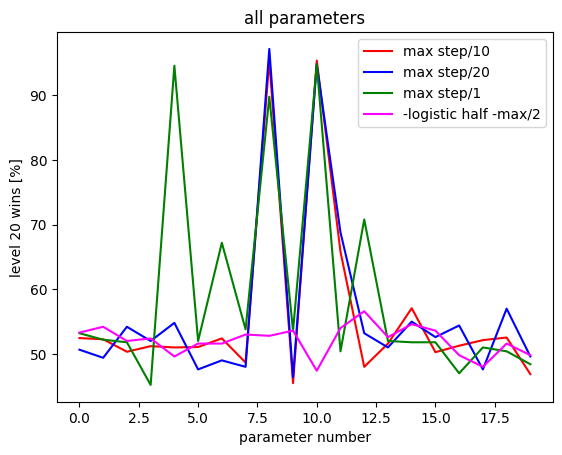

In [183]:
resgrad1=np.load("gradient_step1_v1.npy")
resgrad2=np.load("gradient_step1_v2.npy")
resgrad3=np.load("gradient_step1_v3.npy")
resgrad4=np.load("gradient_step1_v4.npy")
resgrad5=np.load("gradient_step1_v5.npy")
resgrad7=np.load("gradient_step1_v7.npy")
#all from 1 to 6 used wrong step size for discard and value
print(np.mean(resgrad1[40,:,:],1))
plt.plot(range(20),np.mean(resgrad1[40,:,:],1),color='red',label='max step/10') 
plt.plot(range(20),np.mean(resgrad2[40,:,:],1),color='blue',label='max step/20') 
plt.plot(range(20),np.mean(resgrad3[40,:,:],1),color='green',label='max step/1') 
#plt.plot(range(20),np.mean(resgrad4[40,:,:],1),color='black',label='logistic max/2') 
plt.plot(range(20),np.mean(resgrad7[40,:,:],1),color='magenta',label='-logistic half -max/2') 
#plt.plot(range(20),np.mean(resgrad6[40,:,:],1),color='gray',label='-logistic half -max/4') 
plt.legend(loc="best")
#plt.xscale("log")
plt.xlabel("parameter number")
plt.ylabel("level 20 wins [%]")
plt.title("all parameters")


Most changes are very small and likely chance. Now I build a function how to use the information found before to find the next parameters which should be tried. 

In [24]:
#gets new parameters
#and step sizes
def get_new_parameters(result):
    new_par=np.zeros(19)
    new_steps=np.zeros(19)
    for i in range(1,20):
        err=100*np.sqrt(np.sum(result[38,i,:])/np.sum(result[38,i,:])**2+np.sum(result[38,0,:])/np.sum(result[38,0,:])**2)
        diff=np.mean(result[40,i,:])-np.mean(result[40,0,:])
        #if really bad results or if significance less than 1 just use current base values 
        if np.mean(result[40,i,:])>75 or abs(diff/err)<1:
            new_par[i-1]=result[18+i,0,0]
            if abs(diff/err)<1:
                #direction cannot be known in thisc case increase it and change sign randomly
                new_steps[i-1]=3*(result[18+i,i,0]-result[18+i,0,0])*np.sign(random.random()-0.5)
            elif np.mean(result[40,i,:])<87:
                #reverse direction and less
                new_steps[i-1]=-1/3*(result[18+i,i,0]-result[18+i,0,0])
            elif np.mean(result[40,i,:])<94:
                new_steps[i-1]=-1/5*(result[18+i,i,0]-result[18+i,0,0])                 
            elif np.mean(result[40,i,:])<97:
                new_steps[i-1]=-1/9*(result[18+i,i,0]-result[18+i,0,0])             
            else:
                new_steps[i-1]=-1/17*(result[18+i,i,0]-result[18+i,0,0])               
        #else use the tried step
        else:
            new_par[i-1]=result[18+i,0,0]+(-result[18+i,i,0]+result[18+i,0,0])*np.sign(diff)
            if abs(diff/err)<3:
                #somewhat smaller in this case, diff/err gives direction needed when diff positive 
                new_steps[i-1]=-3/(diff/err)*(result[18+i,i,0]-result[18+i,0,0])
            else:    
                new_steps[i-1]=-1/np.sign(diff/err)*(result[18+i,i,0]-result[18+i,0,0])                
    return new_par,new_steps       

In [191]:
#was done with old faulty but not much matter since signs small
new_par1,new_step1=get_new_parameters(resgrad7)
print("difference between new and old parameters")
print(new_par1-resgrad6[19:38,0,0])
print("factor between old and new steps")
print(new_step1/logpar[3,:])

difference between new and old parameters
[ 0.          0.          0.          0.          0.          0.
  0.          0.          0.         -0.00054269  0.          0.
  0.          0.          0.          0.          0.00318601  0.
  0.        ]
factor between old and new steps
[-3.         -3.         -3.         -3.         -3.         -3.
 -3.         -3.         -3.          2.54237288 -3.         -3.
 -3.         -3.         -3.         -3.          2.83018868 -3.
 -3.        ]


Now I use the new parameters and steps for another fit. 

In [192]:
allres2=np.load("mc_v9_all.npy")
c=0
list_open7=[]
list_discard7=[]
list_value7=[]
for i in range(850):
    if np.mean(allres2[40,i,4:6])<45 and np.max(allres2[40,i,:])<60:
        list_open7.append(allres2[19:25,i,0])
        list_discard7.append(allres2[25:31,i,0])        
        list_value7.append(allres2[31:38,i,0]) 
        c+=1
print(f"{c} improved models found")        
print("5 used to to test against")
list_open8=list_open7[0:5]
list_discard8=list_discard7[0:5]
list_value8=list_value7[0:5]        
open_steps3=new_step1[0:6]
print("used steps are")
print(open_steps3)
discard_steps3=new_step1[6:12]
print(discard_steps3)
value_steps3=new_step1[12:19]
print(value_steps3)

start_time=time.time()
n_games=100
resgrad1=gradient_step1(list_open8,list_discard8,list_value8,new_par1[0:6],new_par1[6:12],new_par1[12:19],open_steps3,discard_steps3,value_steps3,n_games)
np.save("gradient_step1_v8.npy",resgrad1)
stop_time=time.time()
print(f"{n_games} games need {np.round(stop_time-start_time,3)} seconds")
#previous iteration base had level 20 won in average to 53.3 %
#now level 20 won in average to 52.2 % not clear improvement because was not much better 

6 improved models found
5 used to to test against
used steps are
[-0.04745731  0.00614558 -0.00446284 -0.00113548 -0.01281595 -0.00224084]
[-0.04680097 -0.01286886 -0.01038684  0.00137973 -0.01015209 -0.00191958]
[ 0.04376416  0.00569346  0.01135459  0.00134212 -0.00901702  0.00175731
  0.00434357]
doing Base model
doing case 0 for level 20
400 games need 115.638 seconds
level 20 won to 53.0 %
doing case 1 for level 20
400 games need 118.63 seconds
level 20 won to 50.0 %
doing case 2 for level 20
400 games need 114.127 seconds
level 20 won to 55.2 %
doing case 3 for level 20
400 games need 126.499 seconds
level 20 won to 52.5 %
doing case 4 for level 20
400 games need 128.094 seconds
level 20 won to 50.2 %
level 20 won in average to 52.2 %
changing open variable 0
doing case 0 for level 20
100 games need 30.901 seconds
level 20 won to 45.0 %
doing case 1 for level 20
100 games need 26.321 seconds
level 20 won to 45.0 %
doing case 2 for level 20
100 games need 29.28 seconds
level 20 won

100 games need 28.685 seconds
level 20 won to 58.0 %
doing case 3 for level 20
100 games need 31.182 seconds
level 20 won to 58.0 %
doing case 4 for level 20
100 games need 33.718 seconds
level 20 won to 57.0 %
level 20 won in average to 53.8 %
changing value variable 5
doing case 0 for level 20
100 games need 36.698 seconds
level 20 won to 47.0 %
doing case 1 for level 20
100 games need 31.53 seconds
level 20 won to 55.0 %
doing case 2 for level 20
100 games need 32.264 seconds
level 20 won to 59.0 %
doing case 3 for level 20
100 games need 31.863 seconds
level 20 won to 51.0 %
doing case 4 for level 20
100 games need 32.951 seconds
level 20 won to 50.0 %
level 20 won in average to 52.4 %
changing value variable 6
doing case 0 for level 20
100 games need 36.751 seconds
level 20 won to 52.0 %
doing case 1 for level 20
100 games need 32.052 seconds
level 20 won to 47.0 %
doing case 2 for level 20
100 games need 29.465 seconds
level 20 won to 54.0 %
doing case 3 for level 20
100 games ne

[50.9375 46.7875 55.275  53.6625 53.8625]
[51.55   48.35   56.9625 55.675  51.1125]


Text(0.5, 1.0, 'all parameters')

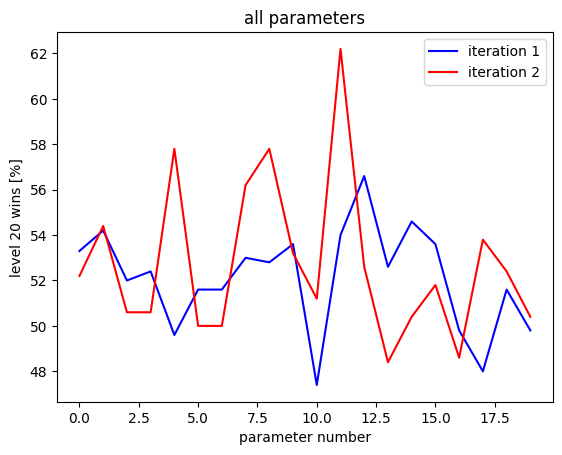

In [194]:
resgrad7=np.load("gradient_step1_v7.npy")
resgrad8=np.load("gradient_step1_v8.npy")
print(np.mean(resgrad7[40,:,:],0))
print(np.mean(resgrad8[40,:,:],0))
plt.plot(range(20),np.mean(resgrad7[40,:,:],1),color='blue',label='iteration 1') 
plt.plot(range(20),np.mean(resgrad8[40,:,:],1),color='red',label='iteration 2') 
plt.legend(loc="best")
#plt.xscale("log")
plt.xlabel("parameter number")
plt.ylabel("level 20 wins [%]")
plt.title("all parameters")

Again getteing the next parameters and steps. 

In [212]:
new_par2,new_step2=get_new_parameters(resgrad8)
print("difference between new and old parameters")
print(new_par2-new_par1)
print("factor between old and new steps")
print(new_step2/new_step1)

difference between new and old parameters
[0.         0.         0.         0.00113548 0.         0.
 0.         0.01286886 0.         0.         0.01015209 0.
 0.         0.         0.         0.         0.         0.
 0.        ]
factor between old and new steps
[ 3.          3.          3.         -2.67857143  3.          3.
  3.         -2.67857143  3.          3.         -1.5         3.
  3.          3.          3.          3.          3.          3.
  3.        ]


Now I build the function which does that iteratively. 

In [317]:
#parameters,list of open paremeters, discard parameters, value parameters for level 20
# open base, discard base, value base parameters for level 21
# open steps, discard steps, value steps parameters for level 21
def gradient_fit(open_vars,discard_vars,value_vars,base_open,base_discard,base_value,open_step,discard_step,value_step,n_games=100,max_iter=10,output_name="gradient_fit1_it"):
    #to save parameters and steps 
    results=np.zeros((19,max_iter,2))
    for i in range(max_iter):
        print(f"doing iteration {i}")
        start_time=time.time()
        resgrad1=gradient_step1(open_vars,discard_vars,value_vars,base_open,base_discard,base_value,open_step,discard_step,value_step,n_games=n_games)
        np.save(output_name+str(i)+".npy",resgrad1)
        stop_time=time.time()
        print(f"{n_games} games need {np.round(stop_time-start_time,3)} seconds")
        #getting new steps and parameters
        new_par1,new_step1=get_new_parameters(resgrad1)
        results[:,i,0]=new_par1
        results[:,i,1]=new_step1        
        #passing as new base
        base_open=new_par1[0:6]
        base_discard=new_par1[6:12]
        base_value=new_par1[12:19]        
        #passing as new steps
        open_step=new_step1[0:6]
        discard_step=new_step1[6:12]
        value_step=new_step1[12:19]
    return results    

In [222]:
allres2=np.load("mc_v9_all.npy")
c=0
list_open7=[]
list_discard7=[]
list_value7=[]
for i in range(850):
    if np.mean(allres2[40,i,4:6])<45 and np.max(allres2[40,i,:])<60:
        list_open7.append(allres2[19:25,i,0])
        list_discard7.append(allres2[25:31,i,0])        
        list_value7.append(allres2[31:38,i,0]) 
        c+=1
list_open8=list_open7[0:5]
list_discard8=list_discard7[0:5]
list_value8=list_value7[0:5]   
start_time=time.time()
gradient_it1=gradient_fit(list_open8,list_discard8,list_value8,new_par2[0:6],new_par2[6:12],new_par2[12:19],new_step2[0:6],new_step2[6:12],new_step2[12:19],n_games=100,max_iter=16,output_name="gradient_fit1_it")
stop_time=time.time()
print(f"Needed {np.round(stop_time-start_time,3)} seconds")
#105.524 seconds for 2 games and 2 iterations
#100 games 16 iterations Needed 41128.531 seconds
#before fit was started was  53.3, 52.2
#mean of iterations are, 46.5 47.55, 46.6, 63.05, 51.1, 52.6, 41.8, 45.7 seems to 
#have some problems could be overshooting with too large steps how easy solve that
#will produce 20*16=320 data points
#paarmeters seems to get larger at least open intercept, check also others 
#100 with 16 iterations Needed 41128.531 seconds

doing iteration 0
doing Base model
doing case 0 for level 20
400 games need 95.872 seconds
level 20 won to 47.0 %
doing case 1 for level 20
400 games need 93.902 seconds
level 20 won to 44.5 %
doing case 2 for level 20
400 games need 90.249 seconds
level 20 won to 45.0 %
doing case 3 for level 20
400 games need 93.982 seconds
level 20 won to 47.2 %
doing case 4 for level 20
400 games need 97.303 seconds
level 20 won to 48.8 %
level 20 won in average to 46.5 %
changing open variable 0
doing case 0 for level 20
100 games need 24.698 seconds
level 20 won to 39.0 %
doing case 1 for level 20
100 games need 22.24 seconds
level 20 won to 45.0 %
doing case 2 for level 20
100 games need 22.009 seconds
level 20 won to 50.0 %
doing case 3 for level 20
100 games need 23.917 seconds
level 20 won to 48.0 %
doing case 4 for level 20
100 games need 24.187 seconds
level 20 won to 44.0 %
level 20 won in average to 45.2 %
changing open variable 1
doing case 0 for level 20
100 games need 23.863 seconds
le

100 games need 23.612 seconds
level 20 won to 49.0 %
doing case 1 for level 20
100 games need 22.036 seconds
level 20 won to 48.0 %
doing case 2 for level 20
100 games need 22.268 seconds
level 20 won to 47.0 %
doing case 3 for level 20
100 games need 23.022 seconds
level 20 won to 47.0 %
doing case 4 for level 20
100 games need 23.077 seconds
level 20 won to 52.0 %
level 20 won in average to 48.6 %
changing value variable 6
doing case 0 for level 20
100 games need 23.371 seconds
level 20 won to 44.0 %
doing case 1 for level 20
100 games need 22.503 seconds
level 20 won to 36.0 %
doing case 2 for level 20
100 games need 21.878 seconds
level 20 won to 51.0 %
doing case 3 for level 20
100 games need 23.129 seconds
level 20 won to 47.0 %
doing case 4 for level 20
100 games need 23.412 seconds
level 20 won to 49.0 %
level 20 won in average to 45.4 %
all models done
100 games need 2634.022 seconds
doing iteration 1
doing Base model
doing case 0 for level 20
400 games need 74.241 seconds
lev

100 games need 19.83 seconds
level 20 won to 45.0 %
doing case 1 for level 20
100 games need 17.936 seconds
level 20 won to 40.0 %
doing case 2 for level 20
100 games need 18.707 seconds
level 20 won to 56.0 %
doing case 3 for level 20
100 games need 18.122 seconds
level 20 won to 51.0 %
doing case 4 for level 20
100 games need 16.771 seconds
level 20 won to 44.0 %
level 20 won in average to 47.2 %
changing value variable 4
doing case 0 for level 20
100 games need 18.063 seconds
level 20 won to 62.0 %
doing case 1 for level 20
100 games need 16.904 seconds
level 20 won to 43.0 %
doing case 2 for level 20
100 games need 17.844 seconds
level 20 won to 48.0 %
doing case 3 for level 20
100 games need 17.598 seconds
level 20 won to 51.0 %
doing case 4 for level 20
100 games need 16.786 seconds
level 20 won to 42.0 %
level 20 won in average to 49.2 %
changing value variable 5
doing case 0 for level 20
100 games need 19.41 seconds
level 20 won to 55.0 %
doing case 1 for level 20
100 games nee

100 games need 24.237 seconds
level 20 won to 44.0 %
doing case 1 for level 20
100 games need 21.096 seconds
level 20 won to 45.0 %
doing case 2 for level 20
100 games need 20.928 seconds
level 20 won to 53.0 %
doing case 3 for level 20
100 games need 23.062 seconds
level 20 won to 43.0 %
doing case 4 for level 20
100 games need 24.116 seconds
level 20 won to 45.0 %
level 20 won in average to 46.0 %
changing value variable 2
doing case 0 for level 20
100 games need 23.663 seconds
level 20 won to 52.0 %
doing case 1 for level 20
100 games need 22.291 seconds
level 20 won to 38.0 %
doing case 2 for level 20
100 games need 21.685 seconds
level 20 won to 49.0 %
doing case 3 for level 20
100 games need 22.09 seconds
level 20 won to 47.0 %
doing case 4 for level 20
100 games need 23.899 seconds
level 20 won to 56.0 %
level 20 won in average to 48.4 %
changing value variable 3
doing case 0 for level 20
100 games need 25.072 seconds
level 20 won to 46.0 %
doing case 1 for level 20
100 games ne

100 games need 27.752 seconds
level 20 won to 59.0 %
doing case 1 for level 20
100 games need 23.841 seconds
level 20 won to 65.0 %
doing case 2 for level 20
100 games need 22.469 seconds
level 20 won to 65.0 %
doing case 3 for level 20
100 games need 26.721 seconds
level 20 won to 64.0 %
doing case 4 for level 20
100 games need 27.168 seconds
level 20 won to 67.0 %
level 20 won in average to 64.0 %
changing value variable 0
doing case 0 for level 20
100 games need 27.203 seconds
level 20 won to 58.0 %
doing case 1 for level 20
100 games need 24.356 seconds
level 20 won to 60.0 %
doing case 2 for level 20
100 games need 23.099 seconds
level 20 won to 64.0 %
doing case 3 for level 20
100 games need 27.167 seconds
level 20 won to 64.0 %
doing case 4 for level 20
100 games need 28.929 seconds
level 20 won to 67.0 %
level 20 won in average to 62.6 %
changing value variable 1
doing case 0 for level 20
100 games need 27.562 seconds
level 20 won to 58.0 %
doing case 1 for level 20
100 games n

100 games need 18.776 seconds
level 20 won to 48.0 %
doing case 1 for level 20
100 games need 17.227 seconds
level 20 won to 47.0 %
doing case 2 for level 20
100 games need 18.177 seconds
level 20 won to 43.0 %
doing case 3 for level 20
100 games need 16.764 seconds
level 20 won to 50.0 %
doing case 4 for level 20
100 games need 15.917 seconds
level 20 won to 46.0 %
level 20 won in average to 46.8 %
changing discard variable 4
doing case 0 for level 20
100 games need 19.2 seconds
level 20 won to 65.0 %
doing case 1 for level 20
100 games need 19.088 seconds
level 20 won to 49.0 %
doing case 2 for level 20
100 games need 19.676 seconds
level 20 won to 54.0 %
doing case 3 for level 20
100 games need 18.525 seconds
level 20 won to 58.0 %
doing case 4 for level 20
100 games need 15.698 seconds
level 20 won to 40.0 %
level 20 won in average to 53.2 %
changing discard variable 5
doing case 0 for level 20
100 games need 21.008 seconds
level 20 won to 52.0 %
doing case 1 for level 20
100 games

100 games need 20.072 seconds
level 20 won to 55.0 %
doing case 1 for level 20
100 games need 19.896 seconds
level 20 won to 60.0 %
doing case 2 for level 20
100 games need 21.345 seconds
level 20 won to 62.0 %
doing case 3 for level 20
100 games need 18.555 seconds
level 20 won to 52.0 %
doing case 4 for level 20
100 games need 18.023 seconds
level 20 won to 33.0 %
level 20 won in average to 52.4 %
changing discard variable 2
doing case 0 for level 20
100 games need 28.095 seconds
level 20 won to 53.0 %
doing case 1 for level 20
100 games need 26.796 seconds
level 20 won to 56.0 %
doing case 2 for level 20
100 games need 25.253 seconds
level 20 won to 60.0 %
doing case 3 for level 20
100 games need 24.95 seconds
level 20 won to 46.0 %
doing case 4 for level 20
100 games need 26.809 seconds
level 20 won to 50.0 %
level 20 won in average to 53.0 %
changing discard variable 3
doing case 0 for level 20
100 games need 25.024 seconds
level 20 won to 51.0 %
doing case 1 for level 20
100 game

100 games need 26.841 seconds
level 20 won to 40.0 %
doing case 1 for level 20
100 games need 22.805 seconds
level 20 won to 44.0 %
doing case 2 for level 20
100 games need 23.548 seconds
level 20 won to 50.0 %
doing case 3 for level 20
100 games need 25.347 seconds
level 20 won to 51.0 %
doing case 4 for level 20
100 games need 24.704 seconds
level 20 won to 36.0 %
level 20 won in average to 44.2 %
changing discard variable 0
doing case 0 for level 20
100 games need 27.599 seconds
level 20 won to 45.0 %
doing case 1 for level 20
100 games need 24.401 seconds
level 20 won to 39.0 %
doing case 2 for level 20
100 games need 23.26 seconds
level 20 won to 47.0 %
doing case 3 for level 20
100 games need 25.839 seconds
level 20 won to 43.0 %
doing case 4 for level 20
100 games need 29.176 seconds
level 20 won to 42.0 %
level 20 won in average to 43.2 %
changing discard variable 1
doing case 0 for level 20
100 games need 19.73 seconds
level 20 won to 48.0 %
doing case 1 for level 20
100 games

100 games need 25.562 seconds
level 20 won to 47.0 %
doing case 1 for level 20
100 games need 21.178 seconds
level 20 won to 41.0 %
doing case 2 for level 20
100 games need 20.933 seconds
level 20 won to 47.0 %
doing case 3 for level 20
100 games need 23.017 seconds
level 20 won to 50.0 %
doing case 4 for level 20
100 games need 22.745 seconds
level 20 won to 40.0 %
level 20 won in average to 45.0 %
changing open variable 4
doing case 0 for level 20


/home/tobias/ml-testing/games/skyjo/skyjo_functions4.py:2090: RuntimeWarning: overflow encountered in exp
  res=1/(1+np.exp(-coefs[0]-np.matmul(coefs[1:coefs.shape[0]],data)))


100 games need 25.33 seconds
level 20 won to 59.0 %
doing case 1 for level 20
100 games need 24.114 seconds
level 20 won to 49.0 %
doing case 2 for level 20
100 games need 23.33 seconds
level 20 won to 54.0 %
doing case 3 for level 20
100 games need 24.05 seconds
level 20 won to 46.0 %
doing case 4 for level 20
100 games need 22.307 seconds
level 20 won to 35.0 %
level 20 won in average to 48.6 %
changing open variable 5
doing case 0 for level 20
100 games need 25.291 seconds
level 20 won to 45.0 %
doing case 1 for level 20
100 games need 24.094 seconds
level 20 won to 47.0 %
doing case 2 for level 20
100 games need 22.395 seconds
level 20 won to 43.0 %
doing case 3 for level 20
100 games need 23.716 seconds
level 20 won to 54.0 %
doing case 4 for level 20
100 games need 23.312 seconds
level 20 won to 38.0 %
level 20 won in average to 45.4 %
changing discard variable 0
doing case 0 for level 20
100 games need 27.01 seconds
level 20 won to 39.0 %
doing case 1 for level 20
100 games need

100 games need 22.618 seconds
level 20 won to 49.0 %
doing case 1 for level 20
100 games need 22.185 seconds
level 20 won to 42.0 %
doing case 2 for level 20
100 games need 21.27 seconds
level 20 won to 46.0 %
doing case 3 for level 20
100 games need 21.927 seconds
level 20 won to 46.0 %
doing case 4 for level 20
100 games need 20.762 seconds
level 20 won to 41.0 %
level 20 won in average to 44.8 %
changing open variable 3
doing case 0 for level 20
100 games need 23.922 seconds
level 20 won to 56.0 %
doing case 1 for level 20
100 games need 21.289 seconds
level 20 won to 34.0 %
doing case 2 for level 20
100 games need 21.536 seconds
level 20 won to 52.0 %
doing case 3 for level 20
100 games need 22.279 seconds
level 20 won to 46.0 %
doing case 4 for level 20
100 games need 20.125 seconds
level 20 won to 42.0 %
level 20 won in average to 46.0 %
changing open variable 4
doing case 0 for level 20
100 games need 23.95 seconds
level 20 won to 47.0 %
doing case 1 for level 20
100 games need 

100 games need 22.787 seconds
level 20 won to 49.0 %
doing case 1 for level 20
100 games need 21.747 seconds
level 20 won to 51.0 %
doing case 2 for level 20
100 games need 20.845 seconds
level 20 won to 46.0 %
doing case 3 for level 20
100 games need 22.437 seconds
level 20 won to 50.0 %
doing case 4 for level 20
100 games need 22.421 seconds
level 20 won to 37.0 %
level 20 won in average to 46.6 %
changing open variable 1
doing case 0 for level 20
100 games need 24.105 seconds
level 20 won to 41.0 %
doing case 1 for level 20
100 games need 20.843 seconds
level 20 won to 38.0 %
doing case 2 for level 20
100 games need 21.059 seconds
level 20 won to 44.0 %
doing case 3 for level 20
100 games need 21.874 seconds
level 20 won to 49.0 %
doing case 4 for level 20
100 games need 20.024 seconds
level 20 won to 45.0 %
level 20 won in average to 43.4 %
changing open variable 2
doing case 0 for level 20
100 games need 22.786 seconds
level 20 won to 48.0 %
doing case 1 for level 20
100 games nee

100 games need 22.169 seconds
level 20 won to 51.0 %
doing case 2 for level 20
100 games need 21.199 seconds
level 20 won to 44.0 %
doing case 3 for level 20
100 games need 21.925 seconds
level 20 won to 47.0 %
doing case 4 for level 20
100 games need 21.556 seconds
level 20 won to 41.0 %
level 20 won in average to 46.2 %
all models done
100 games need 2508.707 seconds
doing iteration 10
doing Base model
doing case 0 for level 20
400 games need 95.564 seconds
level 20 won to 44.5 %
doing case 1 for level 20
400 games need 87.643 seconds
level 20 won to 43.8 %
doing case 2 for level 20
400 games need 82.999 seconds
level 20 won to 46.5 %
doing case 3 for level 20
400 games need 87.873 seconds
level 20 won to 53.0 %
doing case 4 for level 20
400 games need 82.994 seconds
level 20 won to 38.2 %
level 20 won in average to 45.2 %
changing open variable 0
doing case 0 for level 20
100 games need 23.255 seconds
level 20 won to 49.0 %
doing case 1 for level 20
100 games need 22.058 seconds
lev

100 games need 21.615 seconds
level 20 won to 41.0 %
doing case 2 for level 20
100 games need 22.298 seconds
level 20 won to 49.0 %
doing case 3 for level 20
100 games need 21.904 seconds
level 20 won to 49.0 %
doing case 4 for level 20
100 games need 20.541 seconds
level 20 won to 43.0 %
level 20 won in average to 44.4 %
changing value variable 5
doing case 0 for level 20
100 games need 23.303 seconds
level 20 won to 46.0 %
doing case 1 for level 20
100 games need 21.484 seconds
level 20 won to 46.0 %
doing case 2 for level 20
100 games need 20.402 seconds
level 20 won to 50.0 %
doing case 3 for level 20
100 games need 22.405 seconds
level 20 won to 40.0 %
doing case 4 for level 20
100 games need 20.731 seconds
level 20 won to 45.0 %
level 20 won in average to 45.4 %
changing value variable 6
doing case 0 for level 20
100 games need 25.36 seconds
level 20 won to 47.0 %
doing case 1 for level 20
100 games need 22.198 seconds
level 20 won to 40.0 %
doing case 2 for level 20
100 games ne

100 games need 21.436 seconds
level 20 won to 48.0 %
doing case 2 for level 20
100 games need 21.252 seconds
level 20 won to 53.0 %
doing case 3 for level 20
100 games need 23.266 seconds
level 20 won to 57.0 %
doing case 4 for level 20
100 games need 21.415 seconds
level 20 won to 31.0 %
level 20 won in average to 46.4 %
changing value variable 3
doing case 0 for level 20
100 games need 23.298 seconds
level 20 won to 58.0 %
doing case 1 for level 20
100 games need 21.844 seconds
level 20 won to 49.0 %
doing case 2 for level 20
100 games need 21.467 seconds
level 20 won to 56.0 %
doing case 3 for level 20
100 games need 22.83 seconds
level 20 won to 39.0 %
doing case 4 for level 20
100 games need 20.052 seconds
level 20 won to 30.0 %
level 20 won in average to 46.4 %
changing value variable 4
doing case 0 for level 20
100 games need 23.365 seconds
level 20 won to 56.0 %
doing case 1 for level 20
100 games need 21.573 seconds
level 20 won to 48.0 %
doing case 2 for level 20
100 games ne

100 games need 23.329 seconds
level 20 won to 45.0 %
doing case 2 for level 20
100 games need 22.362 seconds
level 20 won to 58.0 %
doing case 3 for level 20
100 games need 23.07 seconds
level 20 won to 41.0 %
doing case 4 for level 20
100 games need 22.603 seconds
level 20 won to 34.0 %
level 20 won in average to 45.8 %
changing value variable 1
doing case 0 for level 20
100 games need 24.598 seconds
level 20 won to 46.0 %
doing case 1 for level 20
100 games need 22.684 seconds
level 20 won to 45.0 %
doing case 2 for level 20
100 games need 21.212 seconds
level 20 won to 49.0 %
doing case 3 for level 20
100 games need 23.74 seconds
level 20 won to 54.0 %
doing case 4 for level 20
100 games need 23.783 seconds
level 20 won to 33.0 %
level 20 won in average to 45.4 %
changing value variable 2
doing case 0 for level 20
100 games need 24.501 seconds
level 20 won to 45.0 %
doing case 1 for level 20
100 games need 22.607 seconds
level 20 won to 38.0 %
doing case 2 for level 20
100 games nee

100 games need 22.14 seconds
level 20 won to 37.0 %
doing case 2 for level 20
100 games need 20.478 seconds
level 20 won to 51.0 %
doing case 3 for level 20
100 games need 21.618 seconds
level 20 won to 46.0 %
doing case 4 for level 20
100 games need 20.217 seconds
level 20 won to 37.0 %
level 20 won in average to 43.0 %
changing discard variable 5
doing case 0 for level 20
100 games need 25.891 seconds
level 20 won to 45.0 %
doing case 1 for level 20
100 games need 23.143 seconds
level 20 won to 35.0 %
doing case 2 for level 20
100 games need 22.307 seconds
level 20 won to 41.0 %
doing case 3 for level 20
100 games need 23.931 seconds
level 20 won to 46.0 %
doing case 4 for level 20
100 games need 24.53 seconds
level 20 won to 45.0 %
level 20 won in average to 42.4 %
changing value variable 0
doing case 0 for level 20
100 games need 25.342 seconds
level 20 won to 47.0 %
doing case 1 for level 20
100 games need 22.438 seconds
level 20 won to 46.0 %
doing case 2 for level 20
100 games n

100 games need 22.143 seconds
level 20 won to 47.0 %
doing case 2 for level 20
100 games need 23.394 seconds
level 20 won to 51.0 %
doing case 3 for level 20
100 games need 25.961 seconds
level 20 won to 49.0 %
doing case 4 for level 20
100 games need 25.737 seconds
level 20 won to 37.0 %
level 20 won in average to 45.8 %
changing discard variable 3
doing case 0 for level 20
100 games need 25.096 seconds
level 20 won to 48.0 %
doing case 1 for level 20
100 games need 23.09 seconds
level 20 won to 48.0 %
doing case 2 for level 20
100 games need 21.599 seconds
level 20 won to 45.0 %
doing case 3 for level 20
100 games need 21.853 seconds
level 20 won to 50.0 %
doing case 4 for level 20
100 games need 20.811 seconds
level 20 won to 37.0 %
level 20 won in average to 45.6 %
changing discard variable 4
doing case 0 for level 20
100 games need 24.06 seconds
level 20 won to 47.0 %
doing case 1 for level 20
100 games need 21.418 seconds
level 20 won to 42.0 %
doing case 2 for level 20
100 games

100 games need 24.033 seconds
level 20 won to 51.0 %
doing case 2 for level 20
100 games need 22.488 seconds
level 20 won to 56.0 %
doing case 3 for level 20
100 games need 25.657 seconds
level 20 won to 36.0 %
doing case 4 for level 20
100 games need 25.816 seconds
level 20 won to 38.0 %
level 20 won in average to 45.0 %
changing discard variable 1
doing case 0 for level 20
100 games need 19.54 seconds
level 20 won to 45.0 %
doing case 1 for level 20
100 games need 18.976 seconds
level 20 won to 46.0 %
doing case 2 for level 20
100 games need 19.953 seconds
level 20 won to 64.0 %
doing case 3 for level 20
100 games need 17.475 seconds
level 20 won to 56.0 %
doing case 4 for level 20
100 games need 16.565 seconds
level 20 won to 40.0 %
level 20 won in average to 50.2 %
changing discard variable 2
doing case 0 for level 20
100 games need 26.016 seconds
level 20 won to 52.0 %
doing case 1 for level 20
100 games need 23.313 seconds
level 20 won to 42.0 %
doing case 2 for level 20
100 game

Now I get the results and plot them. 

Text(0.5, 1.0, 'gradient fit 1')

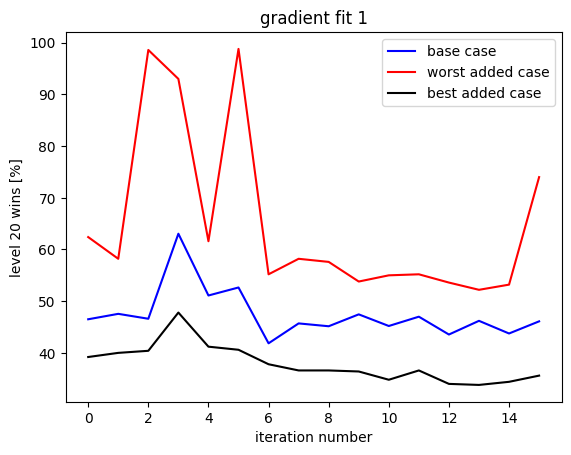

In [238]:
gradfit0=np.load('gradient_fit1_it0.npy')
gradfit1=np.load('gradient_fit1_it1.npy')
gradfit2=np.load('gradient_fit1_it2.npy')
gradfit3=np.load('gradient_fit1_it3.npy')
gradfit4=np.load('gradient_fit1_it4.npy')
gradfit5=np.load('gradient_fit1_it5.npy')
gradfit6=np.load('gradient_fit1_it6.npy')
gradfit7=np.load('gradient_fit1_it7.npy')
gradfit8=np.load('gradient_fit1_it8.npy')
gradfit9=np.load('gradient_fit1_it9.npy')
gradfit10=np.load('gradient_fit1_it10.npy')
gradfit11=np.load('gradient_fit1_it11.npy')
gradfit12=np.load('gradient_fit1_it12.npy')
gradfit13=np.load('gradient_fit1_it13.npy')
gradfit14=np.load('gradient_fit1_it14.npy')
gradfit15=np.load('gradient_fit1_it15.npy')
#np.save('gradient_fit1.npy',gradient_it1)
allpargrad1=np.load('gradient_fit1.npy')
listgrad=[gradfit0,gradfit1,gradfit2,gradfit3,gradfit4,gradfit5,gradfit6,gradfit7,gradfit8,gradfit9,gradfit10,gradfit11,gradfit12,gradfit13,gradfit14,gradfit15]
allgrad1=np.zeros((gradfit15.shape[0],gradfit15.shape[1],gradfit15.shape[2],len(listgrad)))
for i in range(len(listgrad)):
    allgrad1[:,:,:,i]=listgrad[i]
plt.plot(range(16),np.mean(allgrad1[40,0,:,:],0),color='blue',label='base case') 
plt.plot(range(16),np.mean(np.max(allgrad1[40,1:20,:,:],0),0),color='red',label='worst added case') 
plt.plot(range(16),np.mean(np.min(allgrad1[40,1:20,:,:],0),0),color='black',label='best added case') 
plt.legend(loc="best")
#plt.xscale("log")
plt.xlabel("iteration number")
plt.ylabel("level 20 wins [%]")
plt.title("gradient fit 1")    

The worst exlored case can be up to 100%, but that is not necessary a problem. However, it makes it difficult to see improvement, thus I now just plot base case and best case. 

Text(0.5, 1.0, 'gradient fit 1')

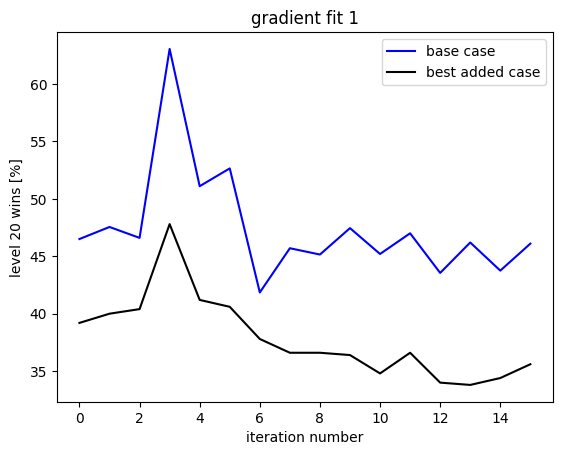

In [239]:
plt.plot(range(16),np.mean(allgrad1[40,0,:,:],0),color='blue',label='base case') 
plt.plot(range(16),np.mean(np.min(allgrad1[40,1:20,:,:],0),0),color='black',label='best added case') 
plt.legend(loc="best")
#plt.xscale("log")
plt.xlabel("iteration number")
plt.ylabel("level 20 wins [%]")
plt.title("gradient fit 1")    

The improvement in the case case is very minor overall, the best explored is better. In the best case there is more improvement, but 66% win of a new model is still not really good. There must some problem in the getting good parameters. It seems to work sometimes, but not always.  

Now looking on all cases.

98.6
98.8


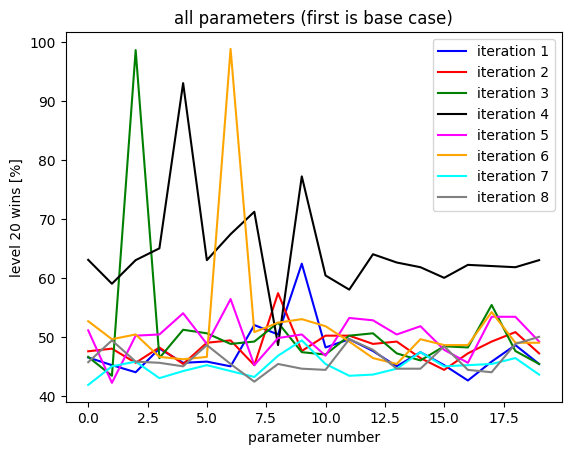

In [267]:
plt.plot(range(20),np.mean(allgrad1[40,:,:,0],1),color='blue',label='iteration 1') 
plt.plot(range(20),np.mean(allgrad1[40,:,:,1],1),color='red',label='iteration 2') 
plt.plot(range(20),np.mean(allgrad1[40,:,:,2],1),color='green',label='iteration 3') 
plt.plot(range(20),np.mean(allgrad1[40,:,:,3],1),color='black',label='iteration 4') 
plt.plot(range(20),np.mean(allgrad1[40,:,:,4],1),color='magenta',label='iteration 5') 
plt.plot(range(20),np.mean(allgrad1[40,:,:,5],1),color='orange',label='iteration 6') 
plt.plot(range(20),np.mean(allgrad1[40,:,:,6],1),color='cyan',label='iteration 7') 
plt.plot(range(20),np.mean(allgrad1[40,:,:,7],1),color='gray',label='iteration 8') 
plt.legend(loc="best")
#plt.xscale("log")
plt.xlabel("parameter number (0 is base case)")
plt.ylabel("level 20 wins [%]")
#plt.title("all parameters (first is base case)")
print(max(np.mean(allgrad1[40,:,:,2],1)))
print(max(np.mean(allgrad1[40,:,:,5],1)))

98.6
98.8


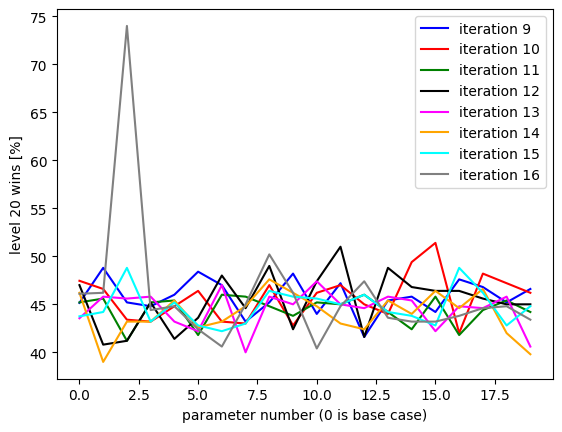

In [268]:
plt.plot(range(20),np.mean(allgrad1[40,:,:,8],1),color='blue',label='iteration 9') 
plt.plot(range(20),np.mean(allgrad1[40,:,:,9],1),color='red',label='iteration 10') 
plt.plot(range(20),np.mean(allgrad1[40,:,:,10],1),color='green',label='iteration 11') 
plt.plot(range(20),np.mean(allgrad1[40,:,:,11],1),color='black',label='iteration 12') 
plt.plot(range(20),np.mean(allgrad1[40,:,:,12],1),color='magenta',label='iteration 13') 
plt.plot(range(20),np.mean(allgrad1[40,:,:,13],1),color='orange',label='iteration 14') 
plt.plot(range(20),np.mean(allgrad1[40,:,:,14],1),color='cyan',label='iteration 15') 
plt.plot(range(20),np.mean(allgrad1[40,:,:,15],1),color='gray',label='iteration 16') 
plt.legend(loc="best")
#plt.xscale("log")
plt.xlabel("parameter number (0 is base case)")
plt.ylabel("level 20 wins [%]")
#plt.title("all parameters (first is base case)")
print(max(np.mean(allgrad1[40,:,:,2],1)))
print(max(np.mean(allgrad1[40,:,:,5],1)))

Clearly worse fit appears after very win fraction of 98.6%. But another case of 98.8 does not have a notable worsening. Still I add even smaller steps when something is worse than 97% winning. 

Besides that it mostly seems a random walk with no clear cases of improvement for a certain changed parameter. Like too little parameters changes. Now I am looking on the parameters explored. 


Text(0.5, 1.0, 'open parameters')

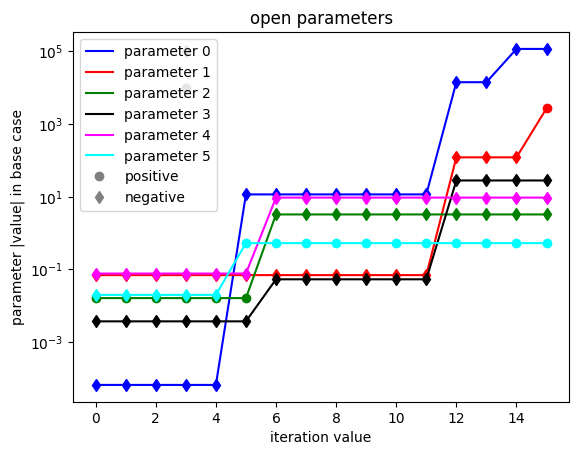

In [298]:
plt.plot(range(16),(allgrad1[19,0,0,:]*np.sign(allgrad1[19,0,0,:])),color='blue',label='parameter 0') 
plt.plot(range(16),allgrad1[19,0,0,:],'o',color='blue') 
plt.plot(range(16),-allgrad1[19,0,0,:],'d',color='blue') 
plt.plot(range(16),(allgrad1[20,0,0,:]*np.sign(allgrad1[20,0,0,:])),color='red',label='parameter 1') 
plt.plot(range(16),allgrad1[20,0,0,:],'o',color='red') 
plt.plot(range(16),-allgrad1[20,0,0,:],'d',color='red') 
plt.plot(range(16),(allgrad1[21,0,0,:]*np.sign(allgrad1[21,0,0,:])),color='green',label='parameter 2') 
plt.plot(range(16),allgrad1[21,0,0,:],'o',color='green') 
plt.plot(range(16),-allgrad1[21,0,0,:],'d',color='green') 
plt.plot(range(16),(allgrad1[22,0,0,:]*np.sign(allgrad1[22,0,0,:])),color='black',label='parameter 3') 
plt.plot(range(16),allgrad1[22,0,0,:],'o',color='black') 
plt.plot(range(16),-allgrad1[22,0,0,:],'d',color='black') 
plt.plot(range(16),(allgrad1[23,0,0,:]*np.sign(allgrad1[23,0,0,:])),color='magenta',label='parameter 4') 
plt.plot(range(16),allgrad1[23,0,0,:],'o',color='magenta') 
plt.plot(range(16),-allgrad1[23,0,0,:],'d',color='magenta') 
plt.plot(range(16),(allgrad1[24,0,0,:]*np.sign(allgrad1[24,0,0,:])),color='cyan',label='parameter 5') 
plt.plot(range(16),allgrad1[24,0,0,:],'o',color='cyan') 
plt.plot(range(16),-allgrad1[24,0,0,:],'d',color='cyan') 
plt.plot(3,10000,'o',color='gray',label='positive') 
plt.plot(3,100000,'d',color='gray',label='negative') 
plt.legend(loc="best")
plt.yscale("log")
plt.xlabel("iteration value")
plt.ylabel("parameter |value| in base case")
plt.title("open parameters")

Text(0.5, 1.0, 'discard parameters')

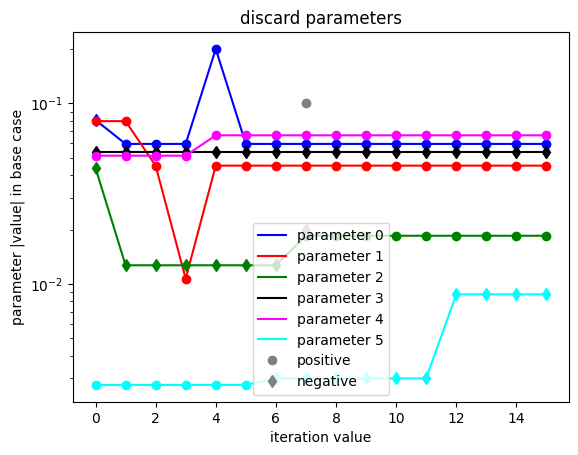

In [302]:
plt.plot(range(16),(allgrad1[25,0,0,:]*np.sign(allgrad1[25,0,0,:])),color='blue',label='parameter 0') 
plt.plot(range(16),allgrad1[25,0,0,:],'o',color='blue') 
plt.plot(range(16),-allgrad1[25,0,0,:],'d',color='blue') 
plt.plot(range(16),(allgrad1[26,0,0,:]*np.sign(allgrad1[26,0,0,:])),color='red',label='parameter 1') 
plt.plot(range(16),allgrad1[26,0,0,:],'o',color='red') 
plt.plot(range(16),-allgrad1[26,0,0,:],'d',color='red') 
plt.plot(range(16),(allgrad1[27,0,0,:]*np.sign(allgrad1[27,0,0,:])),color='green',label='parameter 2') 
plt.plot(range(16),allgrad1[27,0,0,:],'o',color='green') 
plt.plot(range(16),-allgrad1[27,0,0,:],'d',color='green') 
plt.plot(range(16),(allgrad1[28,0,0,:]*np.sign(allgrad1[28,0,0,:])),color='black',label='parameter 3') 
plt.plot(range(16),allgrad1[28,0,0,:],'o',color='black') 
plt.plot(range(16),-allgrad1[28,0,0,:],'d',color='black') 
plt.plot(range(16),(allgrad1[29,0,0,:]*np.sign(allgrad1[29,0,0,:])),color='magenta',label='parameter 4') 
plt.plot(range(16),allgrad1[29,0,0,:],'o',color='magenta') 
plt.plot(range(16),-allgrad1[29,0,0,:],'d',color='magenta') 
plt.plot(range(16),(allgrad1[30,0,0,:]*np.sign(allgrad1[30,0,0,:])),color='cyan',label='parameter 5') 
plt.plot(range(16),allgrad1[30,0,0,:],'o',color='cyan') 
plt.plot(range(16),-allgrad1[30,0,0,:],'d',color='cyan') 
plt.plot(7,0.1,'o',color='gray',label='positive') 
plt.plot(7,0.02,'d',color='gray',label='negative') 
plt.legend(loc="best")
plt.yscale("log")
plt.xlabel("iteration value")
plt.ylabel("parameter |value| in base case")
plt.title("discard parameters")

Text(0.5, 1.0, 'value parameters')

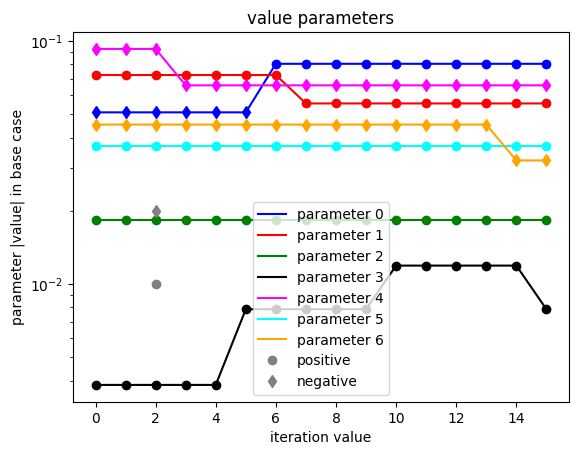

In [305]:
plt.plot(range(16),(allgrad1[31,0,0,:]*np.sign(allgrad1[31,0,0,:])),color='blue',label='parameter 0') 
plt.plot(range(16),allgrad1[31,0,0,:],'o',color='blue') 
plt.plot(range(16),-allgrad1[31,0,0,:],'d',color='blue') 
plt.plot(range(16),(allgrad1[32,0,0,:]*np.sign(allgrad1[32,0,0,:])),color='red',label='parameter 1') 
plt.plot(range(16),allgrad1[32,0,0,:],'o',color='red') 
plt.plot(range(16),-allgrad1[32,0,0,:],'d',color='red') 
plt.plot(range(16),(allgrad1[33,0,0,:]*np.sign(allgrad1[33,0,0,:])),color='green',label='parameter 2') 
plt.plot(range(16),allgrad1[33,0,0,:],'o',color='green') 
plt.plot(range(16),-allgrad1[33,0,0,:],'d',color='green') 
plt.plot(range(16),(allgrad1[34,0,0,:]*np.sign(allgrad1[34,0,0,:])),color='black',label='parameter 3') 
plt.plot(range(16),allgrad1[34,0,0,:],'o',color='black') 
plt.plot(range(16),-allgrad1[34,0,0,:],'d',color='black') 
plt.plot(range(16),(allgrad1[35,0,0,:]*np.sign(allgrad1[35,0,0,:])),color='magenta',label='parameter 4') 
plt.plot(range(16),allgrad1[35,0,0,:],'o',color='magenta') 
plt.plot(range(16),-allgrad1[35,0,0,:],'d',color='magenta') 
plt.plot(range(16),(allgrad1[36,0,0,:]*np.sign(allgrad1[36,0,0,:])),color='cyan',label='parameter 5') 
plt.plot(range(16),allgrad1[36,0,0,:],'o',color='cyan') 
plt.plot(range(16),-allgrad1[36,0,0,:],'d',color='cyan') 
plt.plot(range(16),(allgrad1[37,0,0,:]*np.sign(allgrad1[37,0,0,:])),color='orange',label='parameter 6') 
plt.plot(range(16),allgrad1[37,0,0,:],'o',color='orange') 
plt.plot(range(16),-allgrad1[37,0,0,:],'d',color='orange') 
plt.plot(2,0.01,'o',color='gray',label='positive') 
plt.plot(2,0.02,'d',color='gray',label='negative') 
plt.legend(loc="best")
plt.yscale("log")
plt.xlabel("iteration value")
plt.ylabel("parameter |value| in base case")
plt.title("value parameters")

The parameters in the base case only change sometimes. That is the result of doing nothing when detecting a significant change in the good direction. This is still the right action, when that is case, however good changes happen too rarely. It is not because the optimum is reached because the xgboost method finds better case. 

Text(0.5, 1.0, 'open parameters')

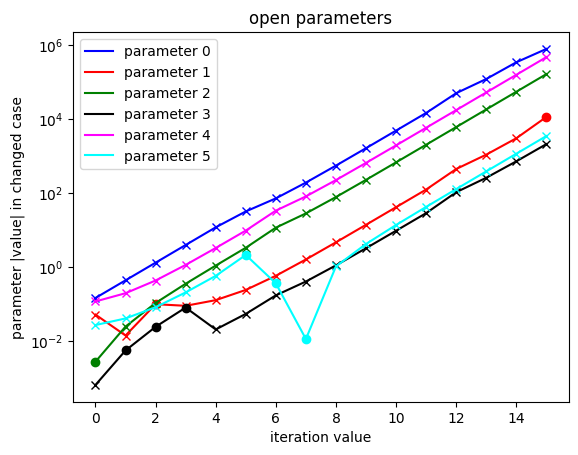

In [306]:
plt.plot(range(16),(allgrad1[19,1,0,:]*np.sign(allgrad1[19,1,0,:])),color='blue',label='parameter 0') 
plt.plot(range(16),allgrad1[19,1,0,:],'o',color='blue') 
plt.plot(range(16),-allgrad1[19,1,0,:],'x',color='blue') 
plt.plot(range(16),(allgrad1[20,2,0,:]*np.sign(allgrad1[20,2,0,:])),color='red',label='parameter 1') 
plt.plot(range(16),allgrad1[20,2,0,:],'o',color='red') 
plt.plot(range(16),-allgrad1[20,2,0,:],'x',color='red') 
plt.plot(range(16),(allgrad1[21,3,0,:]*np.sign(allgrad1[21,3,0,:])),color='green',label='parameter 2') 
plt.plot(range(16),allgrad1[21,3,0,:],'o',color='green') 
plt.plot(range(16),-allgrad1[21,3,0,:],'x',color='green') 
plt.plot(range(16),(allgrad1[22,4,0,:]*np.sign(allgrad1[22,4,0,:])),color='black',label='parameter 3') 
plt.plot(range(16),allgrad1[22,4,0,:],'o',color='black') 
plt.plot(range(16),-allgrad1[22,4,0,:],'x',color='black') 
plt.plot(range(16),(allgrad1[23,5,0,:]*np.sign(allgrad1[23,5,0,:])),color='magenta',label='parameter 4') 
plt.plot(range(16),allgrad1[23,5,0,:],'o',color='magenta') 
plt.plot(range(16),-allgrad1[23,5,0,:],'x',color='magenta') 
plt.plot(range(16),(allgrad1[24,6,0,:]*np.sign(allgrad1[24,6,0,:])),color='cyan',label='parameter 5') 
plt.plot(range(16),allgrad1[24,6,0,:],'o',color='cyan') 
plt.plot(range(16),-allgrad1[24,6,0,:],'x',color='cyan') 
plt.legend(loc="best")
plt.yscale("log")
plt.xlabel("iteration value")
plt.ylabel("parameter |value| in changed case")
plt.title("open parameters")

Text(0.5, 1.0, 'discard parameters')

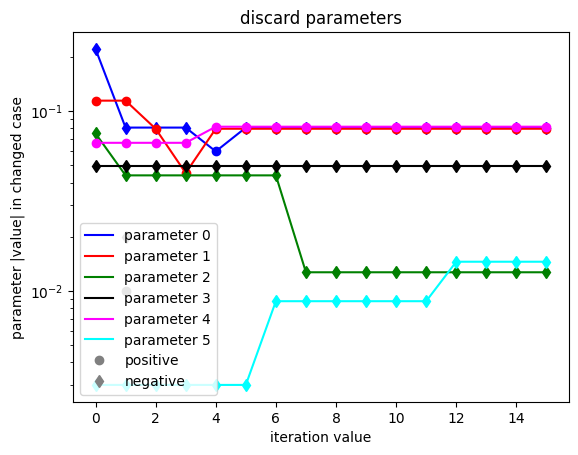

In [309]:
plt.plot(range(16),(allgrad1[25,7,0,:]*np.sign(allgrad1[25,7,0,:])),color='blue',label='parameter 0') 
plt.plot(range(16),allgrad1[25,7,0,:],'o',color='blue') 
plt.plot(range(16),-allgrad1[25,7,0,:],'d',color='blue') 
plt.plot(range(16),(allgrad1[26,8,0,:]*np.sign(allgrad1[26,8,0,:])),color='red',label='parameter 1') 
plt.plot(range(16),allgrad1[26,8,0,:],'o',color='red') 
plt.plot(range(16),-allgrad1[26,8,0,:],'d',color='red') 
plt.plot(range(16),(allgrad1[27,9,0,:]*np.sign(allgrad1[27,9,0,:])),color='green',label='parameter 2') 
plt.plot(range(16),allgrad1[27,9,0,:],'o',color='green') 
plt.plot(range(16),-allgrad1[27,9,0,:],'d',color='green') 
plt.plot(range(16),(allgrad1[28,10,0,:]*np.sign(allgrad1[28,10,0,:])),color='black',label='parameter 3') 
plt.plot(range(16),allgrad1[28,10,0,:],'o',color='black') 
plt.plot(range(16),-allgrad1[28,10,0,:],'d',color='black') 
plt.plot(range(16),(allgrad1[29,11,0,:]*np.sign(allgrad1[29,11,0,:])),color='magenta',label='parameter 4') 
plt.plot(range(16),allgrad1[29,11,0,:],'o',color='magenta') 
plt.plot(range(16),-allgrad1[29,11,0,:],'d',color='magenta') 
plt.plot(range(16),(allgrad1[30,12,0,:]*np.sign(allgrad1[30,12,0,:])),color='cyan',label='parameter 5') 
plt.plot(range(16),allgrad1[30,12,0,:],'o',color='cyan') 
plt.plot(range(16),-allgrad1[30,12,0,:],'d',color='cyan') 
plt.plot(1,0.01,'o',color='gray',label='positive') 
plt.plot(1,0.02,'d',color='gray',label='negative') 
plt.legend(loc="best")
plt.yscale("log")
plt.xlabel("iteration value")
plt.ylabel("parameter |value| in changed case")
plt.title("discard parameters")

Text(0.5, 1.0, 'value parameters')

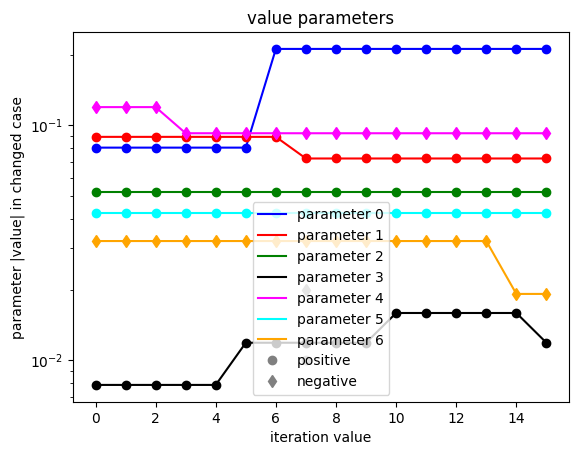

In [311]:
plt.plot(range(16),(allgrad1[31,13,0,:]*np.sign(allgrad1[31,13,0,:])),color='blue',label='parameter 0') 
plt.plot(range(16),allgrad1[31,13,0,:],'o',color='blue') 
plt.plot(range(16),-allgrad1[31,13,0,:],'d',color='blue') 
plt.plot(range(16),(allgrad1[32,14,0,:]*np.sign(allgrad1[32,14,0,:])),color='red',label='parameter 1') 
plt.plot(range(16),allgrad1[32,14,0,:],'o',color='red') 
plt.plot(range(16),-allgrad1[32,14,0,:],'d',color='red') 
plt.plot(range(16),(allgrad1[33,15,0,:]*np.sign(allgrad1[33,15,0,:])),color='green',label='parameter 2') 
plt.plot(range(16),allgrad1[33,15,0,:],'o',color='green') 
plt.plot(range(16),-allgrad1[33,15,0,:],'d',color='green') 
plt.plot(range(16),(allgrad1[34,16,0,:]*np.sign(allgrad1[34,16,0,:])),color='black',label='parameter 3') 
plt.plot(range(16),allgrad1[34,16,0,:],'o',color='black') 
plt.plot(range(16),-allgrad1[34,16,0,:],'d',color='black') 
plt.plot(range(16),(allgrad1[35,17,0,:]*np.sign(allgrad1[35,17,0,:])),color='magenta',label='parameter 4') 
plt.plot(range(16),allgrad1[35,17,0,:],'o',color='magenta') 
plt.plot(range(16),-allgrad1[35,17,0,:],'d',color='magenta') 
plt.plot(range(16),(allgrad1[36,18,0,:]*np.sign(allgrad1[36,18,0,:])),color='cyan',label='parameter 5') 
plt.plot(range(16),allgrad1[36,18,0,:],'o',color='cyan') 
plt.plot(range(16),-allgrad1[36,18,0,:],'d',color='cyan') 
plt.plot(range(16),(allgrad1[37,19,0,:]*np.sign(allgrad1[37,19,0,:])),color='orange',label='parameter 6') 
plt.plot(range(16),allgrad1[37,19,0,:],'o',color='orange') 
plt.plot(range(16),-allgrad1[37,19,0,:],'d',color='orange') 
plt.plot(7,0.01,'o',color='gray',label='positive') 
plt.plot(7,0.02,'d',color='gray',label='negative') 
plt.legend(loc="best")
plt.yscale("log")
plt.xlabel("iteration value")
plt.ylabel("parameter |value| in changed case")
plt.title("value parameters")

In the explore parameters there is a little more variation but overall there is also too much of getting larger in case of open. It is rather constant for discard and value, too constant.  

Posssible a problem is that when all are increased by the same factor, all is canceling out. Maybe I should add a random sign determination for the shift when no improevement is detected. This random sign is now implemented.  Another reason reason could that it is open it is not particulary sensitive to it, that is known. 

It is rather constant for discard and value, too constant. Looks like a coding mistake. Yes, is corrected now.  


These changed are now implemented for another fit below. 

In [318]:
allres2=np.load("mc_v9_all.npy")
c=0
list_open7=[]
list_discard7=[]
list_value7=[]
for i in range(850):
    if np.mean(allres2[40,i,4:6])<45 and np.max(allres2[40,i,:])<60:
        list_open7.append(allres2[19:25,i,0])
        list_discard7.append(allres2[25:31,i,0])        
        list_value7.append(allres2[31:38,i,0]) 
        c+=1
list_open8=list_open7[0:5]
list_discard8=list_discard7[0:5]
list_value8=list_value7[0:5]   
start_time=time.time()
gradient_it2=gradient_fit(list_open8,list_discard8,list_value8,new_par2[0:6],new_par2[6:12],new_par2[12:19],new_step2[0:6],new_step2[6:12],new_step2[12:19],n_games=100,max_iter=4,output_name="gradient_fit2_it")
np.save('gradient_fit2.npy',gradient_it2)
stop_time=time.time()
print(f"Needed {np.round(stop_time-start_time,3)} seconds")
#past 100 with 4 iterations Needed 11395 seconds

doing iteration 0
doing Base model
doing case 0 for level 20
400 games need 88.813 seconds
level 20 won to 44.8 %
doing case 1 for level 20
400 games need 87.782 seconds
level 20 won to 45.0 %
doing case 2 for level 20
400 games need 98.791 seconds
level 20 won to 51.2 %
doing case 3 for level 20
400 games need 106.396 seconds
level 20 won to 46.8 %
doing case 4 for level 20
400 games need 105.954 seconds
level 20 won to 43.5 %
level 20 won in average to 46.2 %
changing open variable 0
doing case 0 for level 20
100 games need 29.384 seconds
level 20 won to 51.0 %
doing case 1 for level 20
100 games need 25.611 seconds
level 20 won to 49.0 %
doing case 2 for level 20
100 games need 23.822 seconds
level 20 won to 44.0 %
doing case 3 for level 20
100 games need 27.231 seconds
level 20 won to 49.0 %
doing case 4 for level 20
100 games need 24.61 seconds
level 20 won to 48.0 %
level 20 won in average to 48.2 %
changing open variable 1
doing case 0 for level 20
100 games need 27.137 seconds


100 games need 24.423 seconds
level 20 won to 46.0 %
doing case 1 for level 20
100 games need 22.995 seconds
level 20 won to 43.0 %
doing case 2 for level 20
100 games need 23.044 seconds
level 20 won to 51.0 %
doing case 3 for level 20
100 games need 23.636 seconds
level 20 won to 55.0 %
doing case 4 for level 20
100 games need 22.602 seconds
level 20 won to 49.0 %
level 20 won in average to 48.8 %
changing value variable 6
doing case 0 for level 20
100 games need 22.643 seconds
level 20 won to 47.0 %
doing case 1 for level 20
100 games need 21.951 seconds
level 20 won to 45.0 %
doing case 2 for level 20
100 games need 21.465 seconds
level 20 won to 53.0 %
doing case 3 for level 20
100 games need 23.083 seconds
level 20 won to 50.0 %
doing case 4 for level 20
100 games need 25.067 seconds
level 20 won to 48.0 %
level 20 won in average to 48.6 %
all models done
100 games need 2827.928 seconds
doing iteration 1
doing Base model
doing case 0 for level 20
400 games need 104.556 seconds
le

100 games need 25.861 seconds
level 20 won to 57.0 %
doing case 1 for level 20
100 games need 22.952 seconds
level 20 won to 52.0 %
doing case 2 for level 20
100 games need 23.35 seconds
level 20 won to 62.0 %
doing case 3 for level 20
100 games need 23.69 seconds
level 20 won to 56.0 %
doing case 4 for level 20
100 games need 25.814 seconds
level 20 won to 49.0 %
level 20 won in average to 55.2 %
changing value variable 4
doing case 0 for level 20
100 games need 25.118 seconds
level 20 won to 48.0 %
doing case 1 for level 20
100 games need 22.523 seconds
level 20 won to 43.0 %
doing case 2 for level 20
100 games need 22.279 seconds
level 20 won to 46.0 %
doing case 3 for level 20
100 games need 24.923 seconds
level 20 won to 55.0 %
doing case 4 for level 20
100 games need 24.402 seconds
level 20 won to 55.0 %
level 20 won in average to 49.4 %
changing value variable 5
doing case 0 for level 20
100 games need 24.564 seconds
level 20 won to 46.0 %
doing case 1 for level 20
100 games nee

100 games need 25.086 seconds
level 20 won to 48.0 %
doing case 1 for level 20
100 games need 22.883 seconds
level 20 won to 44.0 %
doing case 2 for level 20
100 games need 22.69 seconds
level 20 won to 53.0 %
doing case 3 for level 20
100 games need 23.013 seconds
level 20 won to 44.0 %
doing case 4 for level 20
100 games need 23.805 seconds
level 20 won to 35.0 %
level 20 won in average to 44.8 %
changing value variable 2
doing case 0 for level 20
100 games need 25.281 seconds
level 20 won to 39.0 %
doing case 1 for level 20
100 games need 22.718 seconds
level 20 won to 37.0 %
doing case 2 for level 20
100 games need 22.472 seconds
level 20 won to 49.0 %
doing case 3 for level 20
100 games need 24.176 seconds
level 20 won to 46.0 %
doing case 4 for level 20
100 games need 23.475 seconds
level 20 won to 38.0 %
level 20 won in average to 41.8 %
changing value variable 3
doing case 0 for level 20
100 games need 23.655 seconds
level 20 won to 46.0 %
doing case 1 for level 20
100 games ne

100 games need 24.977 seconds
level 20 won to 96.0 %
doing case 1 for level 20
100 games need 24.358 seconds
level 20 won to 91.0 %
doing case 2 for level 20
100 games need 24.267 seconds
level 20 won to 99.0 %
doing case 3 for level 20
100 games need 27.871 seconds
level 20 won to 94.0 %
doing case 4 for level 20
100 games need 24.316 seconds
level 20 won to 94.0 %
level 20 won in average to 94.8 %
changing value variable 0
doing case 0 for level 20
100 games need 30.533 seconds
level 20 won to 80.0 %
doing case 1 for level 20
100 games need 28.023 seconds
level 20 won to 75.0 %
doing case 2 for level 20
100 games need 27.904 seconds
level 20 won to 85.0 %
doing case 3 for level 20
100 games need 32.924 seconds
level 20 won to 71.0 %
doing case 4 for level 20
100 games need 35.849 seconds
level 20 won to 72.0 %
level 20 won in average to 76.6 %
changing value variable 1
doing case 0 for level 20
100 games need 29.042 seconds
level 20 won to 75.0 %
doing case 1 for level 20
100 games n

Later this is continued. 

In [ ]:
new_step3=gradient_it2[:,3,1]
print(new_step3)

allres2=np.load("mc_v9_all.npy")
c=0
list_open7=[]
list_discard7=[]
list_value7=[]
for i in range(850):
    if np.mean(allres2[40,i,4:6])<45 and np.max(allres2[40,i,:])<60:
        list_open7.append(allres2[19:25,i,0])
        list_discard7.append(allres2[25:31,i,0])        
        list_value7.append(allres2[31:38,i,0]) 
        c+=1
list_open8=list_open7[0:5]
list_discard8=list_discard7[0:5]
list_value8=list_value7[0:5]   
start_time=time.time()
max_iter=7
n_games=100
gradient_it2=gradient_fit(list_open8,list_discard8,list_value8,new_par3[0:6],new_par3[6:12],new_par3[12:19],new_step3[0:6],new_step3[6:12],new_step3[12:19],n_games=n_games,max_iter=max_iter,output_name="gradient_fit2c_it")
np.save('gradient_fit2c.npy',gradient_it2) # saved was gradient_fit2b.npy gradient_fit2c_it*
stop_time=time.time()
print(f"Needed {np.round(stop_time-start_time,3)} seconds")


Now analysing that. 

In [87]:
gradfit0b=np.load('gradient_fit2_it0.npy')
gradfit1b=np.load('gradient_fit2_it1.npy')
gradfit2b=np.load('gradient_fit2_it2.npy')
gradfit3b=np.load('gradient_fit2_it3.npy')
gradfit4b=np.load('gradient_fit2b_it0.npy')
gradfit5b=np.load('gradient_fit2b_it1.npy')
gradfit6b=np.load('gradient_fit2b_it2.npy')
gradfit7b=np.load('gradient_fit2b_it3.npy')
gradfit8b=np.load('gradient_fit2b_it4.npy')
gradfit9b=np.load('gradient_fit2b_it5.npy')
gradfit10b=np.load('gradient_fit2b_it6.npy')
allpargrad2a=np.load('gradient_fit2.npy')
allpargrad2b=np.load('gradient_fit2b.npy')
allpargrad2=np.zeros((19,11,2))
allpargrad2[:,0:4,:]=allpargrad2a
allpargrad2[:,4:11,:]=allpargrad2b
listgrad2=[gradfit0b,gradfit1b,gradfit2b,gradfit3b,gradfit4b,gradfit5b,gradfit6b,gradfit7b,gradfit8b,gradfit9b,gradfit10b]
allgrad2=np.zeros((gradfit1b.shape[0],gradfit1b.shape[1],gradfit1b.shape[2],len(listgrad2)))
for i in range(len(listgrad2)):
    allgrad2[:,:,:,i]=listgrad2[i]
plt.plot(range(11),np.mean(allgrad2[40,0,:,:],0),color='blue',label='base case') 
plt.plot(range(11),np.max(np.mean(allgrad2[40,1:20,:,:],1),0),color='red',label='worst added case') 
plt.plot(range(11),np.min(np.mean(allgrad2[40,1:20,:,:],1),0),color='black',label='best added case') 
plt.legend(loc="best")
#plt.xscale("log")
plt.xlabel("iteration number")
plt.ylabel("level 20 wins [%]")
plt.title("gradient fit 2")  

FileNotFoundError: [Errno 2] No such file or directory: 'gradient_fit2_it0.npy'

Text(0, 0.5, 'level 20 wins [%]')

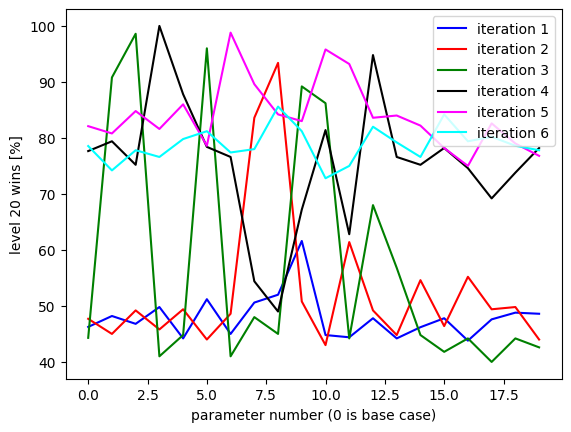

In [6]:
plt.plot(range(20),np.mean(allgrad2[40,:,:,0],1),color='blue',label='iteration 1') 
plt.plot(range(20),np.mean(allgrad2[40,:,:,1],1),color='red',label='iteration 2') 
plt.plot(range(20),np.mean(allgrad2[40,:,:,2],1),color='green',label='iteration 3') 
plt.plot(range(20),np.mean(allgrad2[40,:,:,3],1),color='black',label='iteration 4') 
plt.plot(range(20),np.mean(allgrad2[40,:,:,4],1),color='magenta',label='iteration 5') 
plt.plot(range(20),np.mean(allgrad2[40,:,:,5],1),color='cyan',label='iteration 6')
plt.legend(loc="best")
#plt.xscale("log")
plt.xlabel("parameter number (0 is base case)")
plt.ylabel("level 20 wins [%]")
#plt.title("all parameters (first is base case)")


Text(0, 0.5, 'level 20 wins [%]')

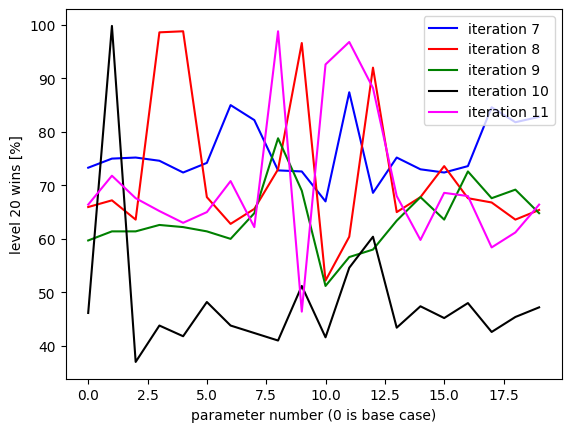

In [406]:
plt.plot(range(20),np.mean(allgrad2[40,:,:,6],1),color='blue',label='iteration 7') 
plt.plot(range(20),np.mean(allgrad2[40,:,:,7],1),color='red',label='iteration 8') 
plt.plot(range(20),np.mean(allgrad2[40,:,:,8],1),color='green',label='iteration 9') 
plt.plot(range(20),np.mean(allgrad2[40,:,:,9],1),color='black',label='iteration 10') 
plt.plot(range(20),np.mean(allgrad2[40,:,:,10],1),color='magenta',label='iteration 11') 
plt.legend(loc="best")
#plt.xscale("log")
plt.xlabel("parameter number (0 is base case)")
plt.ylabel("level 20 wins [%]")

Text(0.5, 1.0, 'open parameters')

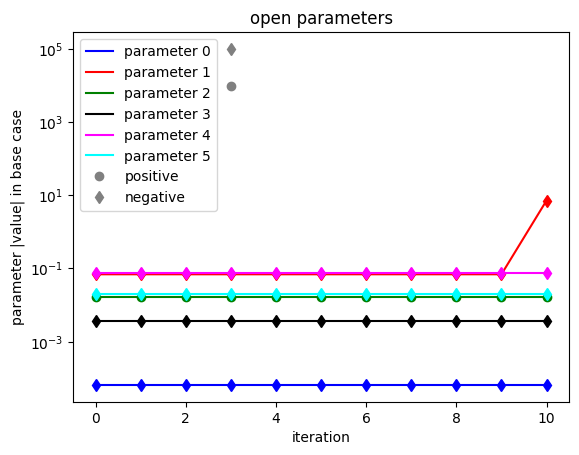

In [402]:
plt.plot(range(11),(allgrad2[19,0,0,:]*np.sign(allgrad2[19,0,0,:])),color='blue',label='parameter 0') 
plt.plot(range(11),allgrad2[19,0,0,:],'o',color='blue') 
plt.plot(range(11),-allgrad2[19,0,0,:],'d',color='blue') 
plt.plot(range(11),(allgrad2[20,0,0,:]*np.sign(allgrad2[20,0,0,:])),color='red',label='parameter 1') 
plt.plot(range(11),allgrad2[20,0,0,:],'o',color='red') 
plt.plot(range(11),-allgrad2[20,0,0,:],'d',color='red') 
plt.plot(range(11),(allgrad2[21,0,0,:]*np.sign(allgrad2[21,0,0,:])),color='green',label='parameter 2') 
plt.plot(range(11),allgrad2[21,0,0,:],'o',color='green') 
plt.plot(range(11),-allgrad2[21,0,0,:],'d',color='green') 
plt.plot(range(11),(allgrad2[22,0,0,:]*np.sign(allgrad2[22,0,0,:])),color='black',label='parameter 3') 
plt.plot(range(11),allgrad2[22,0,0,:],'o',color='black') 
plt.plot(range(11),-allgrad2[22,0,0,:],'d',color='black') 
plt.plot(range(11),(allgrad2[23,0,0,:]*np.sign(allgrad2[23,0,0,:])),color='magenta',label='parameter 4') 
plt.plot(range(11),allgrad2[23,0,0,:],'o',color='magenta') 
plt.plot(range(11),-allgrad2[23,0,0,:],'d',color='magenta') 
plt.plot(range(11),(allgrad2[24,0,0,:]*np.sign(allgrad2[24,0,0,:])),color='cyan',label='parameter 5') 
plt.plot(range(11),allgrad2[24,0,0,:],'o',color='cyan') 
plt.plot(range(11),-allgrad2[24,0,0,:],'d',color='cyan') 
plt.plot(3,10000,'o',color='gray',label='positive') 
plt.plot(3,100000,'d',color='gray',label='negative') 
plt.legend(loc="best")
plt.yscale("log")
plt.xlabel("iteration")
plt.ylabel("parameter |value| in base case")
plt.title("open parameters")

Text(0.5, 1.0, 'discard parameters')

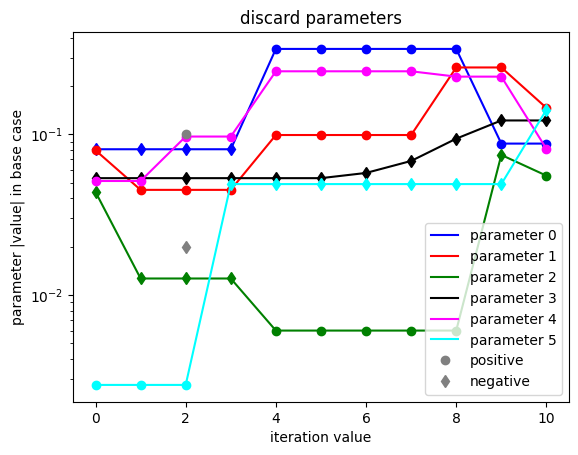

In [403]:
plt.plot(range(11),(allgrad2[25,0,0,:]*np.sign(allgrad2[25,0,0,:])),color='blue',label='parameter 0') 
plt.plot(range(11),allgrad2[25,0,0,:],'o',color='blue') 
plt.plot(range(11),-allgrad2[25,0,0,:],'d',color='blue') 
plt.plot(range(11),(allgrad2[26,0,0,:]*np.sign(allgrad2[26,0,0,:])),color='red',label='parameter 1') 
plt.plot(range(11),allgrad2[26,0,0,:],'o',color='red') 
plt.plot(range(11),-allgrad2[26,0,0,:],'d',color='red') 
plt.plot(range(11),(allgrad2[27,0,0,:]*np.sign(allgrad2[27,0,0,:])),color='green',label='parameter 2') 
plt.plot(range(11),allgrad2[27,0,0,:],'o',color='green') 
plt.plot(range(11),-allgrad2[27,0,0,:],'d',color='green') 
plt.plot(range(11),(allgrad2[28,0,0,:]*np.sign(allgrad2[28,0,0,:])),color='black',label='parameter 3') 
plt.plot(range(11),allgrad2[28,0,0,:],'o',color='black') 
plt.plot(range(11),-allgrad2[28,0,0,:],'d',color='black') 
plt.plot(range(11),(allgrad2[29,0,0,:]*np.sign(allgrad2[29,0,0,:])),color='magenta',label='parameter 4') 
plt.plot(range(11),allgrad2[29,0,0,:],'o',color='magenta') 
plt.plot(range(11),-allgrad2[29,0,0,:],'d',color='magenta') 
plt.plot(range(11),(allgrad2[30,0,0,:]*np.sign(allgrad2[30,0,0,:])),color='cyan',label='parameter 5') 
plt.plot(range(11),allgrad2[30,0,0,:],'o',color='cyan') 
plt.plot(range(11),-allgrad2[30,0,0,:],'d',color='cyan') 
plt.plot(2,0.1,'o',color='gray',label='positive') 
plt.plot(2,0.02,'d',color='gray',label='negative') 
plt.legend(loc="best")
plt.yscale("log")
plt.xlabel("iteration value")
plt.ylabel("parameter |value| in base case")
plt.title("discard parameters")

Text(0.5, 1.0, 'value parameters')

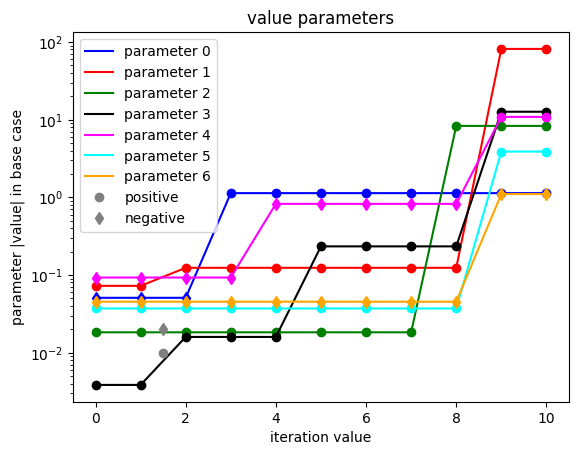

In [404]:
plt.plot(range(11),(allgrad2[31,0,0,:]*np.sign(allgrad2[31,0,0,:])),color='blue',label='parameter 0') 
plt.plot(range(11),allgrad2[31,0,0,:],'o',color='blue') 
plt.plot(range(11),-allgrad2[31,0,0,:],'d',color='blue') 
plt.plot(range(11),(allgrad2[32,0,0,:]*np.sign(allgrad2[32,0,0,:])),color='red',label='parameter 1') 
plt.plot(range(11),allgrad2[32,0,0,:],'o',color='red') 
plt.plot(range(11),-allgrad2[32,0,0,:],'d',color='red') 
plt.plot(range(11),(allgrad2[33,0,0,:]*np.sign(allgrad2[33,0,0,:])),color='green',label='parameter 2') 
plt.plot(range(11),allgrad2[33,0,0,:],'o',color='green') 
plt.plot(range(11),-allgrad2[33,0,0,:],'d',color='green') 
plt.plot(range(11),(allgrad2[34,0,0,:]*np.sign(allgrad2[34,0,0,:])),color='black',label='parameter 3') 
plt.plot(range(11),allgrad2[34,0,0,:],'o',color='black') 
plt.plot(range(11),-allgrad2[34,0,0,:],'d',color='black') 
plt.plot(range(11),(allgrad2[35,0,0,:]*np.sign(allgrad2[35,0,0,:])),color='magenta',label='parameter 4') 
plt.plot(range(11),allgrad2[35,0,0,:],'o',color='magenta') 
plt.plot(range(11),-allgrad2[35,0,0,:],'d',color='magenta') 
plt.plot(range(11),(allgrad2[36,0,0,:]*np.sign(allgrad2[36,0,0,:])),color='cyan',label='parameter 5') 
plt.plot(range(11),allgrad2[36,0,0,:],'o',color='cyan') 
plt.plot(range(11),-allgrad2[36,0,0,:],'d',color='cyan') 
plt.plot(range(11),(allgrad2[37,0,0,:]*np.sign(allgrad2[37,0,0,:])),color='orange',label='parameter 6') 
plt.plot(range(11),allgrad2[37,0,0,:],'o',color='orange') 
plt.plot(range(11),-allgrad2[37,0,0,:],'d',color='orange') 
plt.plot(1.5,0.01,'o',color='gray',label='positive') 
plt.plot(1.5,0.02,'d',color='gray',label='negative') 
plt.legend(loc="best")
plt.yscale("log")
plt.xlabel("iteration value")
plt.ylabel("parameter |value| in base case")
plt.title("value parameters")

Text(0.5, 1.0, 'open parameters')

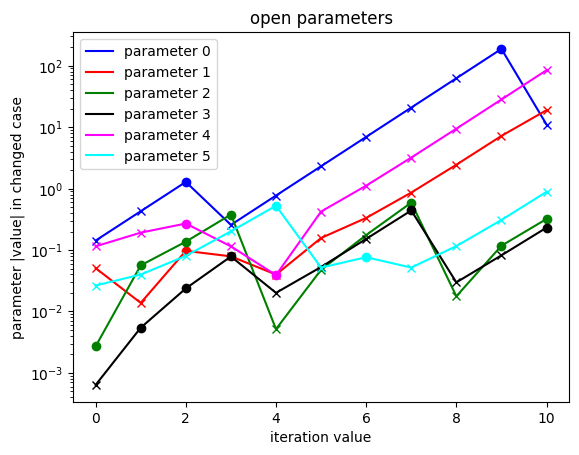

In [408]:
plt.plot(range(11),(allgrad2[19,1,0,:]*np.sign(allgrad2[19,1,0,:])),color='blue',label='parameter 0') 
plt.plot(range(11),allgrad2[19,1,0,:],'o',color='blue') 
plt.plot(range(11),-allgrad2[19,1,0,:],'x',color='blue') 
plt.plot(range(11),(allgrad2[20,2,0,:]*np.sign(allgrad2[20,2,0,:])),color='red',label='parameter 1') 
plt.plot(range(11),allgrad2[20,2,0,:],'o',color='red') 
plt.plot(range(11),-allgrad2[20,2,0,:],'x',color='red') 
plt.plot(range(11),(allgrad2[21,3,0,:]*np.sign(allgrad2[21,3,0,:])),color='green',label='parameter 2') 
plt.plot(range(11),allgrad2[21,3,0,:],'o',color='green') 
plt.plot(range(11),-allgrad2[21,3,0,:],'x',color='green') 
plt.plot(range(11),(allgrad2[22,4,0,:]*np.sign(allgrad2[22,4,0,:])),color='black',label='parameter 3') 
plt.plot(range(11),allgrad2[22,4,0,:],'o',color='black') 
plt.plot(range(11),-allgrad2[22,4,0,:],'x',color='black') 
plt.plot(range(11),(allgrad2[23,5,0,:]*np.sign(allgrad2[23,5,0,:])),color='magenta',label='parameter 4') 
plt.plot(range(11),allgrad2[23,5,0,:],'o',color='magenta') 
plt.plot(range(11),-allgrad2[23,5,0,:],'x',color='magenta') 
plt.plot(range(11),(allgrad2[24,6,0,:]*np.sign(allgrad2[24,6,0,:])),color='cyan',label='parameter 5') 
plt.plot(range(11),allgrad2[24,6,0,:],'o',color='cyan') 
plt.plot(range(11),-allgrad2[24,6,0,:],'x',color='cyan') 
plt.legend(loc="best")
plt.yscale("log")
plt.xlabel("iteration value")
plt.ylabel("parameter |value| in changed case")
plt.title("open parameters")

Text(0.5, 1.0, 'discard parameters')

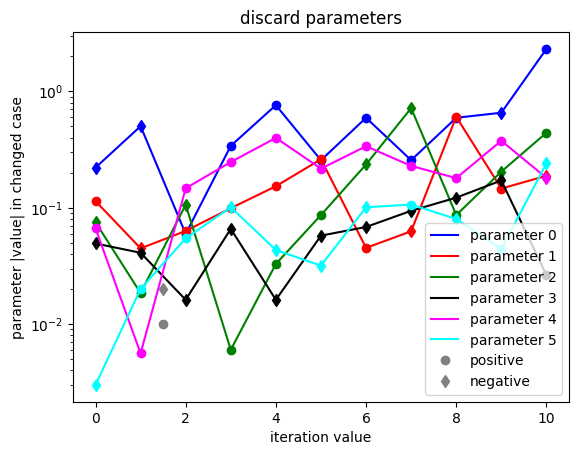

In [409]:
plt.plot(range(11),(allgrad2[25,7,0,:]*np.sign(allgrad2[25,7,0,:])),color='blue',label='parameter 0') 
plt.plot(range(11),allgrad2[25,7,0,:],'o',color='blue') 
plt.plot(range(11),-allgrad2[25,7,0,:],'d',color='blue') 
plt.plot(range(11),(allgrad2[26,8,0,:]*np.sign(allgrad2[26,8,0,:])),color='red',label='parameter 1') 
plt.plot(range(11),allgrad2[26,8,0,:],'o',color='red') 
plt.plot(range(11),-allgrad2[26,8,0,:],'d',color='red') 
plt.plot(range(11),(allgrad2[27,9,0,:]*np.sign(allgrad2[27,9,0,:])),color='green',label='parameter 2') 
plt.plot(range(11),allgrad2[27,9,0,:],'o',color='green') 
plt.plot(range(11),-allgrad2[27,9,0,:],'d',color='green') 
plt.plot(range(11),(allgrad2[28,10,0,:]*np.sign(allgrad2[28,10,0,:])),color='black',label='parameter 3') 
plt.plot(range(11),allgrad2[28,10,0,:],'o',color='black') 
plt.plot(range(11),-allgrad2[28,10,0,:],'d',color='black') 
plt.plot(range(11),(allgrad2[29,11,0,:]*np.sign(allgrad2[29,11,0,:])),color='magenta',label='parameter 4') 
plt.plot(range(11),allgrad2[29,11,0,:],'o',color='magenta') 
plt.plot(range(11),-allgrad2[29,11,0,:],'d',color='magenta') 
plt.plot(range(11),(allgrad2[30,12,0,:]*np.sign(allgrad2[30,12,0,:])),color='cyan',label='parameter 5') 
plt.plot(range(11),allgrad2[30,12,0,:],'o',color='cyan') 
plt.plot(range(11),-allgrad2[30,12,0,:],'d',color='cyan') 
plt.plot(1.5,0.01,'o',color='gray',label='positive') 
plt.plot(1.5,0.02,'d',color='gray',label='negative') 
plt.legend(loc="best")
plt.yscale("log")
plt.xlabel("iteration value")
plt.ylabel("parameter |value| in changed case")
plt.title("discard parameters")

Text(0.5, 1.0, 'value parameters')

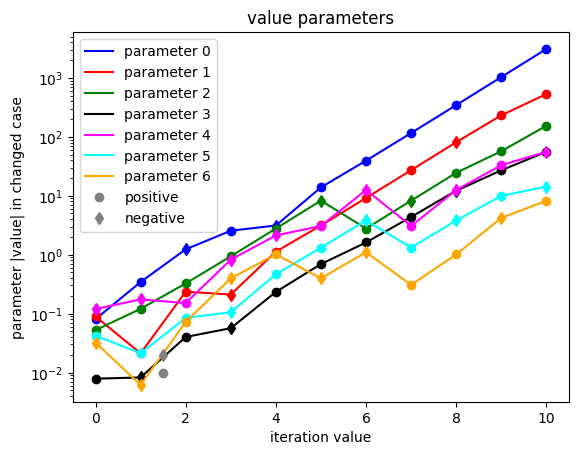

In [407]:
plt.plot(range(11),(allgrad2[31,13,0,:]*np.sign(allgrad2[31,13,0,:])),color='blue',label='parameter 0') 
plt.plot(range(11),allgrad2[31,13,0,:],'o',color='blue') 
plt.plot(range(11),-allgrad2[31,13,0,:],'d',color='blue') 
plt.plot(range(11),(allgrad2[32,14,0,:]*np.sign(allgrad2[32,14,0,:])),color='red',label='parameter 1') 
plt.plot(range(11),allgrad2[32,14,0,:],'o',color='red') 
plt.plot(range(11),-allgrad2[32,14,0,:],'d',color='red') 
plt.plot(range(11),(allgrad2[33,15,0,:]*np.sign(allgrad2[33,15,0,:])),color='green',label='parameter 2') 
plt.plot(range(11),allgrad2[33,15,0,:],'o',color='green') 
plt.plot(range(11),-allgrad2[33,15,0,:],'d',color='green') 
plt.plot(range(11),(allgrad2[34,16,0,:]*np.sign(allgrad2[34,16,0,:])),color='black',label='parameter 3') 
plt.plot(range(11),allgrad2[34,16,0,:],'o',color='black') 
plt.plot(range(11),-allgrad2[34,16,0,:],'d',color='black') 
plt.plot(range(11),(allgrad2[35,17,0,:]*np.sign(allgrad2[35,17,0,:])),color='magenta',label='parameter 4') 
plt.plot(range(11),allgrad2[35,17,0,:],'o',color='magenta') 
plt.plot(range(11),-allgrad2[35,17,0,:],'d',color='magenta') 
plt.plot(range(11),(allgrad2[36,18,0,:]*np.sign(allgrad2[36,18,0,:])),color='cyan',label='parameter 5') 
plt.plot(range(11),allgrad2[36,18,0,:],'o',color='cyan') 
plt.plot(range(11),-allgrad2[36,18,0,:],'d',color='cyan') 
plt.plot(range(11),(allgrad2[37,19,0,:]*np.sign(allgrad2[37,19,0,:])),color='orange',label='parameter 6') 
plt.plot(range(11),allgrad2[37,19,0,:],'o',color='orange') 
plt.plot(range(11),-allgrad2[37,19,0,:],'d',color='orange') 
plt.plot(1.5,0.01,'o',color='gray',label='positive') 
plt.plot(1.5,0.02,'d',color='gray',label='negative') 
plt.legend(loc="best")
plt.yscale("log")
plt.xlabel("iteration value")
plt.ylabel("parameter |value| in changed case")
plt.title("value parameters")

The parameters change now as they should, the now changes for open is because open paarmeters are less important than the other later actions in the game. There is too much increase for value something is wrong. 

Now finding out in the numbers what changed when, first in the base case. 

In [16]:
print(allgrad2.shape)
for i in range(10):
    print(f"iteration {i+1} win_new={np.round(np.mean(allgrad2[40,0,:,i+1]),1)}  win_old={np.round(np.mean(allgrad2[40,0,:,i]),1)}")
    for j in range(19):
        if allgrad2[18+j,0,0,i+1]!=allgrad2[18+j,0,0,i]:
            err=100*np.sqrt(np.sum(allgrad2[38,j,:,i])/np.sum(allgrad2[38,j,:,i])**2+np.sum(allgrad2[38,0,:,i])/np.sum(allgrad2[38,0,:,i])**2)
            diff=np.mean(allgrad2[40,j,:,i])-np.mean(allgrad2[40,0,:,i])
            print(f"parameter {j} changed because diff/err={np.round(diff/err,2)}")

(41, 20, 5, 11)
iteration 1 win_new=47.7  win_old=46.2
parameter 8 changed because diff/err=1.15
parameter 9 changed because diff/err=3.07
iteration 2 win_new=44.3  win_old=47.7
parameter 11 changed because diff/err=2.74
parameter 14 changed because diff/err=1.38
parameter 16 changed because diff/err=1.5
iteration 3 win_new=77.6  win_old=44.3
parameter 12 changed because diff/err=4.74
parameter 13 changed because diff/err=2.5
iteration 4 win_new=82.1  win_old=77.6
parameter 7 changed because diff/err=-4.65
parameter 8 changed because diff/err=-5.73
parameter 9 changed because diff/err=-2.09
parameter 11 changed because diff/err=-2.97
parameter 17 changed because diff/err=-1.69
iteration 5 win_new=78.6  win_old=82.1
parameter 16 changed because diff/err=-1.42
iteration 6 win_new=73.3  win_old=78.6
parameter 10 changed because diff/err=-1.15
iteration 7 win_new=66.0  win_old=73.3
parameter 10 changed because diff/err=-1.26
iteration 8 win_new=59.7  win_old=66.0
parameter 8 changed becaus

Maybe too big steps done? Especially when significance large? Try smaller steps now in test. Buidling a slightly different gradient step function. 

In [ ]:
def get_new_parameters2(result):
    new_par=np.zeros(19)
    new_steps=np.zeros(19)
    for i in range(1,20):
        err=100*np.sqrt(np.sum(result[38,i,:])/np.sum(result[38,i,:])**2+np.sum(result[38,0,:])/np.sum(result[38,0,:])**2)
        diff=np.mean(result[40,i,:])-np.mean(result[40,0,:])
        #if really bad results or if significance less than 1 just use current base values 
        if np.mean(result[40,i,:])>75 or abs(diff/err)<1:
            new_par[i-1]=result[18+i,0,0]
            if abs(diff/err)<1:
                #direction cannot be known in thisc case increase it and change sign randomly
                #was 3 before
                new_steps[i-1]=2*(result[18+i,i,0]-result[18+i,0,0])*np.sign(random.random()-0.5)
            elif np.mean(result[40,i,:])<87:
                #reverse direction and less
                new_steps[i-1]=-1/3*(result[18+i,i,0]-result[18+i,0,0])
            elif np.mean(result[40,i,:])<94:
                new_steps[i-1]=-1/5*(result[18+i,i,0]-result[18+i,0,0])                 
            elif np.mean(result[40,i,:])<97:
                new_steps[i-1]=-1/9*(result[18+i,i,0]-result[18+i,0,0])             
            else:
                new_steps[i-1]=-1/17*(result[18+i,i,0]-result[18+i,0,0])               
        #else use the tried step
        else:
            # all of 1.5/abs(diff/err)
            new_par[i-1]=result[18+i,0,0]+(-result[18+i,i,0]+result[18+i,0,0])*np.sign(diff)*1.5/abs(diff/err)
            #before was -3 and was at least the size of the previous step always 
            new_steps[i-1]=-2/(diff/err)*(result[18+i,i,0]-result[18+i,0,0])              
    return new_par,new_steps    

Looking on it for the two iterations of above when the performance gets a lot worse. 

In [23]:
new_par4,new_step4=get_new_parameters2(allgrad2[:,:,:,2])
print(new_par4)
print(new_step4)
allres2=np.load("mc_v9_all.npy")
c=0
list_open7=[]
list_discard7=[]
list_value7=[]
for i in range(850):
    if np.mean(allres2[40,i,4:6])<45 and np.max(allres2[40,i,:])<60:
        list_open7.append(allres2[19:25,i,0])
        list_discard7.append(allres2[25:31,i,0])        
        list_value7.append(allres2[31:38,i,0]) 
        c+=1    


start_time=time.time()
n_games=300
test_new_par1=run_level21(list_open7,list_discard7,list_value7,new_par4[0:6],new_par4[6:12],new_par4[12:19],n_games)
np.save("testnewpar_v1.npy",test_new_par1)
stop_time=time.time()
print(f"{n_games} ran for {np.round(stop_time-start_time,2)} seconds")   

[-6.53596770e-05 -6.90977851e-02  1.60961960e-02 -3.68004585e-03
 -7.62965770e-02 -1.97269779e-02 -8.08259175e-02  4.51638158e-02
 -1.26829628e-02 -5.34183029e-02  9.69691847e-02 -1.36417532e-02
  6.58176670e-01  1.23605173e-01  1.82635767e-02  1.59172102e-02
 -9.26739514e-02  3.70450044e-02 -4.52485988e-02]
[-0.25626947 -0.00976063  0.24099342  0.05474631 -0.03844786 -0.12100553
  0.28080583 -0.03596887  0.01869632 -0.01241756 -0.10003881 -0.0218686
  0.94530587  0.22278752 -0.61314794  0.04831614 -0.4869191  -0.09489465
  0.2345526 ]
doing case 0 for level 20
300 games need 72.722 seconds
level 20 won to 48.3 %
doing case 1 for level 20
300 games need 70.451 seconds
level 20 won to 42.3 %
doing case 2 for level 20
300 games need 74.131 seconds
level 20 won to 54.7 %
doing case 3 for level 20
300 games need 76.812 seconds
level 20 won to 47.3 %
doing case 4 for level 20
300 games need 82.012 seconds
level 20 won to 40.0 %
doing case 5 for level 20
300 games need 68.787 seconds
level 2

In [28]:
#first run at average level 20 win of 46 for 100 games
testnewpar1=np.load("testnewpar_v1.npy")
print(np.mean(testnewpar1[40]))

46.0


Now it is 46%. This looks better now before that it got 77.6%. In the iteration before it was 44.3. Thus is stays about the same. Now trying the second case. 

In [31]:
new_par5,new_step5=get_new_parameters2(allgrad2[:,:,:,9])
print(new_par5)
print(new_step5)
allres2=np.load("mc_v9_all.npy")
c=0
list_open7=[]
list_discard7=[]
list_value7=[]
for i in range(850):
    if np.mean(allres2[40,i,4:6])<45 and np.max(allres2[40,i,:])<60:
        list_open7.append(allres2[19:25,i,0])
        list_discard7.append(allres2[25:31,i,0])        
        list_value7.append(allres2[31:38,i,0]) 
        c+=1    


start_time=time.time()
n_games=400
test_new_par2=run_level21(list_open7,list_discard7,list_value7,new_par5[0:6],new_par5[6:12],new_par5[12:19],n_games)
np.save("testnewpar_v2.npy",test_new_par2)
stop_time=time.time()
print(f"{n_games} ran for {np.round(stop_time-start_time,2)} seconds")   

[-6.53596770e-05 -5.90147680e+00  1.60961960e-02 -3.68004585e-03
 -7.62965770e-02 -1.97269779e-02  8.76575797e-02  9.38009168e-02
  1.18357700e-01 -1.22111052e-01  9.79414590e-02 -9.81696516e-02
  1.13082961e+00  8.13296569e+01  8.29576073e+00  1.26356167e+01
  1.08457187e+01  3.88027827e+00 -1.10073531e+00]
[-1.09894379e+01 -7.77650535e+00 -2.02634610e-01  1.56510039e-01
 -5.60569738e+01 -5.76555757e-01  1.48661909e+00 -2.22901471e-01
  2.57139729e-01 -9.89874444e-02 -1.74529414e-01 -6.54676860e-02
  2.06738394e+03 -3.00763155e+02 -9.73823194e+01  2.88425044e+01
  4.43117897e+01 -1.21365261e+01 -6.20874535e+00]
doing case 0 for level 20
400 games need 129.461 seconds
level 20 won to 46.0 %
doing case 1 for level 20
400 games need 101.351 seconds
level 20 won to 37.5 %
doing case 2 for level 20
400 games need 102.247 seconds
level 20 won to 57.0 %
doing case 3 for level 20
400 games need 113.135 seconds
level 20 won to 50.5 %
doing case 4 for level 20
400 games need 133.556 seconds
lev

Now it gets . This iteration got before 66.4%. The iteration before got 46.2%. 
The bad steps look now clearly worse. It is less ot clear whether it still improve enough. This can only be tested with a full longer fit. To make the procedure more flexible, I build a new function where the aparameters are flexible. 

In [4]:
# past fit result,  factor for next base is divided by signifciance
#factor on step when not significant
#factor on step when signifciance divide by signifant
def get_new_parameters3(result,fact_new_par=1.5,fact_new_step_no=2.5,fact_new_step_sig=2.0):
    new_par=np.zeros(19)
    new_steps=np.zeros(19)
    for i in range(1,20):
        err=100*np.sqrt(np.sum(result[38,i,:])/np.sum(result[38,i,:])**2+np.sum(result[38,0,:])/np.sum(result[38,0,:])**2)
        diff=np.mean(result[40,i,:])-np.mean(result[40,0,:])
        #if really bad results or if significance less than 1 just use current base values 
        if np.mean(result[40,i,:])>75 or abs(diff/err)<1:
            new_par[i-1]=result[18+i,0,0]
            if abs(diff/err)<1:
                #direction cannot be known in thisc case increase it and change sign randomly
                #was 3 before
                new_steps[i-1]=fact_new_step_no*(result[18+i,i,0]-result[18+i,0,0])*np.sign(random.random()-0.5)
            elif np.mean(result[40,i,:])<87:
                #reverse direction and less
                new_steps[i-1]=-1/3*(result[18+i,i,0]-result[18+i,0,0])
            elif np.mean(result[40,i,:])<94:
                new_steps[i-1]=-1/5*(result[18+i,i,0]-result[18+i,0,0])                 
            elif np.mean(result[40,i,:])<97:
                new_steps[i-1]=-1/9*(result[18+i,i,0]-result[18+i,0,0])             
            else:
                new_steps[i-1]=-1/17*(result[18+i,i,0]-result[18+i,0,0])               
        #else use the tried step
        else:
            # all of 1.5/abs(diff/err)
            new_par[i-1]=result[18+i,0,0]+(-result[18+i,i,0]+result[18+i,0,0])*np.sign(diff)*fact_new_par/abs(diff/err)
            #before was -3 and was at least the size of the previous step always 
            new_steps[i-1]=-fact_new_step_sig/(diff/err)*(result[18+i,i,0]-result[18+i,0,0])
    return new_par,new_steps    

Here some testing.

In [52]:
new_par5,new_step5=get_new_parameters3(allgrad2[:,:,:,9])
print(new_par5)
print(new_step5)
new_par6,new_step6=get_new_parameters3(allgrad2[:,:,:,9],fact_new_par=1.6,fact_new_step_no=3.0,fact_new_step_sig=2.5)
print(new_par6)
print(new_step6)
print(new_par6/new_par5)
print((new_step6)/(new_step5))

[-6.53596770e-05 -5.90147680e+00  1.60961960e-02 -3.68004585e-03
 -7.62965770e-02 -1.97269779e-02  8.76575797e-02  9.38009168e-02
  1.18357700e-01 -1.22111052e-01  9.79414590e-02 -9.81696516e-02
  1.13082961e+00  8.13296569e+01  8.29576073e+00  1.26356167e+01
  1.08457187e+01  3.88027827e+00 -1.10073531e+00]
[-1.09894379e+01 -7.77650535e+00 -2.53293262e-01 -1.95637548e-01
  7.00712173e+01  7.20694697e-01 -1.85827387e+00 -2.22901471e-01
  2.57139729e-01 -1.23734305e-01 -1.74529414e-01 -6.54676860e-02
 -2.58422992e+03 -3.75953943e+02  1.21727899e+02  3.60531305e+01
 -5.53897371e+01 -1.51706576e+01 -7.76093169e+00]
[-6.53596770e-05 -6.29030207e+00  1.60961960e-02 -3.68004585e-03
 -7.62965770e-02 -1.97269779e-02  8.76575797e-02  8.26558433e-02
  1.31214687e-01 -1.22111052e-01  8.92149883e-02 -1.01443036e-01
  1.13082961e+00  8.13296569e+01  8.29576073e+00  1.26356167e+01
  1.08457187e+01  3.88027827e+00 -1.10073531e+00]
[-1.09894379e+01 -9.72063169e+00 -3.03951915e-01  2.34765058e-01
 -8.4

Seems to work. Now adapting function to take that and optional parameters which adjust the step size. 

In [ ]:
#parameters,list of open paremeters, discard parameters, value parameters for level 20
# open base, discard base, value base parameters for level 21
# open steps, discard steps, value steps parameters for level 21
#then optional the parameter to adjust step size of get_new_parameters3
# factor for next base is divided by signifciance
#factor on step when not significant
#factor on step when signifciance divide by signifant
def gradient_fit2(open_vars,discard_vars,value_vars,base_open,base_discard,base_value,open_step,discard_step,value_step,n_games=100,max_iter=10,output_name="gradient2_fit1_it",fact_new_par=1.5,fact_new_step_no=2.5,fact_new_step_sig=2.0):
    #to save parameters and steps 
    results=np.zeros((19,max_iter,2))
    for i in range(max_iter):
        print(f"doing iteration {i}")
        start_time=time.time()
        resgrad1=gradient_step1(open_vars,discard_vars,value_vars,base_open,base_discard,base_value,open_step,discard_step,value_step,n_games=n_games)
        np.save(output_name+str(i)+".npy",resgrad1)
        stop_time=time.time()
        print(f"{n_games} games need {np.round(stop_time-start_time,3)} seconds")
        #getting new steps and parameters
        new_par1,new_step1=get_new_parameters3(resgrad1,fact_new_par=fact_new_par,fact_new_step_no=fact_new_step_no,fact_new_step_sig=fact_new_step_sig)
        results[:,i,0]=new_par1
        results[:,i,1]=new_step1        
        #passing as new base
        base_open=new_par1[0:6]
        base_discard=new_par1[6:12]
        base_value=new_par1[12:19]        
        #passing as new steps
        open_step=new_step1[0:6]
        discard_step=new_step1[6:12]
        value_step=new_step1[12:19]
    return results    

Now running the function. 

In [64]:
#np.save('gradient_fit2_allit.npy',allgrad2) now saved direct compoenent werere overwritten in case of 
#gradient_fit2_it0.npy, gradient_fit2_it1.npy
allgrad2=np.load('gradient_fit2_allit.npy')

base_par=allgrad2[19:38,0,0,0]
print(base_par)
step_par=np.zeros((19))
for i in range(19):
    step_par[i]=allgrad2[19+i,1+i,0,0]-allgrad2[19+i,0,0,0]
print(step_par)    

allres2=np.load("mc_v9_all.npy")
c=0
list_open7=[]
list_discard7=[]
list_value7=[]
for i in range(850):
    if np.mean(allres2[40,i,4:6])<45 and np.max(allres2[40,i,:])<60:
        list_open7.append(allres2[19:25,i,0])
        list_discard7.append(allres2[25:31,i,0])        
        list_value7.append(allres2[31:38,i,0]) 
        c+=1
list_open8=list_open7[0:5]
list_discard8=list_discard7[0:5]
list_value8=list_value7[0:5]   
start_time=time.time()
#in principle would make sense to use get_new_paramters3 to get start value but not yet nneds also previous paramters
gradient_it3=gradient_fit2(list_open8,list_discard8,list_value8,base_par[0:6],base_par[6:12],base_par[12:19],step_par[0:6],step_par[6:12],step_par[12:19],n_games=100,max_iter=4,output_name="gradient2_fit1_it")
stop_time=time.time()
np.save('gradient2_fit1.npy',gradient_it3)
print(f"Needed {np.round(stop_time-start_time,3)} seconds")
#could should change that when a base case has clear disimpovement then need to be discraded run again with other parameters

[-6.53596770e-05 -6.90977851e-02  1.60961960e-02 -3.68004585e-03
 -7.62965770e-02 -1.97269779e-02 -8.08259175e-02  7.96339804e-02
 -4.38434885e-02 -5.34183029e-02  5.12847969e-02  2.75969766e-03
 -5.08027325e-02  7.23640433e-02  1.82635767e-02  3.83817508e-03
 -9.26739514e-02  3.70450044e-02 -4.52485988e-02]
[-0.14237193  0.01843675 -0.01338852  0.00304146 -0.03844786 -0.00672253
 -0.14040291  0.03447016 -0.03116053  0.00413919  0.01522813 -0.00575873
  0.13129248  0.01708038  0.03406377  0.00402635 -0.02705106  0.00527192
  0.0130307 ]
doing iteration 0
doing Base model
doing case 0 for level 20
400 games need 90.023 seconds
level 20 won to 46.8 %
doing case 1 for level 20
400 games need 84.729 seconds
level 20 won to 45.0 %
doing case 2 for level 20
400 games need 95.693 seconds
level 20 won to 52.8 %
doing case 3 for level 20
400 games need 95.216 seconds
level 20 won to 52.0 %
doing case 4 for level 20
400 games need 94.968 seconds
level 20 won to 47.0 %
level 20 won in average to 

100 games need 20.822 seconds
level 20 won to 48.0 %
level 20 won in average to 45.8 %
changing value variable 4
doing case 0 for level 20
100 games need 21.479 seconds
level 20 won to 47.0 %
doing case 1 for level 20
100 games need 19.267 seconds
level 20 won to 43.0 %
doing case 2 for level 20
100 games need 19.064 seconds
level 20 won to 47.0 %
doing case 3 for level 20
100 games need 21.1 seconds
level 20 won to 56.0 %
doing case 4 for level 20
100 games need 20.853 seconds
level 20 won to 48.0 %
level 20 won in average to 48.2 %
changing value variable 5
doing case 0 for level 20
100 games need 22.495 seconds
level 20 won to 49.0 %
doing case 1 for level 20
100 games need 19.694 seconds
level 20 won to 41.0 %
doing case 2 for level 20
100 games need 20.747 seconds
level 20 won to 53.0 %
doing case 3 for level 20
100 games need 20.687 seconds
level 20 won to 51.0 %
doing case 4 for level 20
100 games need 21.98 seconds
level 20 won to 49.0 %
level 20 won in average to 48.6 %
changi

100 games need 20.512 seconds
level 20 won to 26.0 %
level 20 won in average to 41.4 %
changing value variable 2
doing case 0 for level 20
100 games need 20.81 seconds
level 20 won to 39.0 %
doing case 1 for level 20
100 games need 19.99 seconds
level 20 won to 38.0 %
doing case 2 for level 20
100 games need 18.986 seconds
level 20 won to 37.0 %
doing case 3 for level 20
100 games need 20.573 seconds
level 20 won to 44.0 %
doing case 4 for level 20
100 games need 20.696 seconds
level 20 won to 41.0 %
level 20 won in average to 39.8 %
changing value variable 3
doing case 0 for level 20
100 games need 22.498 seconds
level 20 won to 44.0 %
doing case 1 for level 20
100 games need 18.607 seconds
level 20 won to 50.0 %
doing case 2 for level 20
100 games need 19.101 seconds
level 20 won to 38.0 %
doing case 3 for level 20
100 games need 21.086 seconds
level 20 won to 50.0 %
doing case 4 for level 20
100 games need 19.639 seconds
level 20 won to 41.0 %
level 20 won in average to 44.6 %
chang

100 games need 19.732 seconds
level 20 won to 91.0 %
level 20 won in average to 93.2 %
changing value variable 0
doing case 0 for level 20
100 games need 25.032 seconds
level 20 won to 63.0 %
doing case 1 for level 20
100 games need 22.649 seconds
level 20 won to 66.0 %
doing case 2 for level 20
100 games need 21.371 seconds
level 20 won to 59.0 %
doing case 3 for level 20
100 games need 24.967 seconds
level 20 won to 65.0 %
doing case 4 for level 20
100 games need 26.538 seconds
level 20 won to 61.0 %
level 20 won in average to 62.8 %
changing value variable 1
doing case 0 for level 20
100 games need 24.471 seconds
level 20 won to 63.0 %
doing case 1 for level 20
100 games need 21.855 seconds
level 20 won to 61.0 %
doing case 2 for level 20
100 games need 21.944 seconds
level 20 won to 65.0 %
doing case 3 for level 20
100 games need 23.268 seconds
level 20 won to 57.0 %
doing case 4 for level 20
100 games need 24.426 seconds
level 20 won to 61.0 %
level 20 won in average to 61.4 %
cha

100 games need 3.503 seconds
level 20 won to 91.0 %
level 20 won in average to 95.8 %
changing discard variable 4
doing case 0 for level 20
100 games need 3.808 seconds
level 20 won to 97.0 %
doing case 1 for level 20
100 games need 3.561 seconds
level 20 won to 97.0 %
doing case 2 for level 20
100 games need 4.826 seconds
level 20 won to 96.0 %
doing case 3 for level 20
100 games need 3.393 seconds
level 20 won to 97.0 %
doing case 4 for level 20
100 games need 3.576 seconds
level 20 won to 97.0 %
level 20 won in average to 96.8 %
changing discard variable 5
doing case 0 for level 20
100 games need 8.241 seconds
level 20 won to 82.0 %
doing case 1 for level 20
100 games need 6.946 seconds
level 20 won to 81.0 %
doing case 2 for level 20
100 games need 10.954 seconds
level 20 won to 85.0 %
doing case 3 for level 20
100 games need 7.058 seconds
level 20 won to 95.0 %
doing case 4 for level 20
100 games need 5.96 seconds
level 20 won to 79.0 %
level 20 won in average to 84.4 %
changing v

Text(0.5, 1.0, 'gradient fit 3')

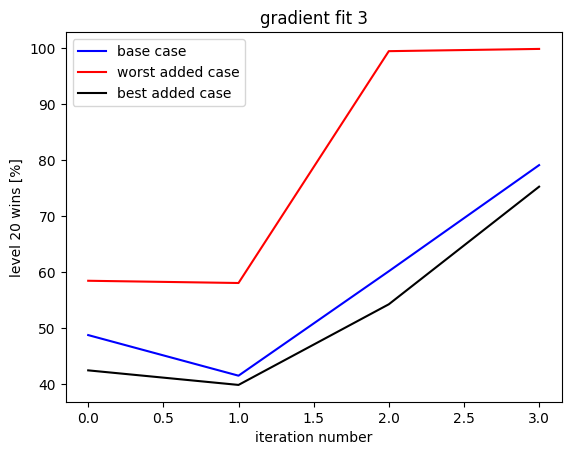

In [85]:
gradfit0=np.load('gradient2_fit1_it0.npy')
gradfit1=np.load('gradient2_fit1_it1.npy')
gradfit2=np.load('gradient2_fit1_it2.npy')
gradfit3=np.load('gradient2_fit1_it3.npy')
#np.save('gradient_fit1.npy',gradient_it1)
allpargrad3=np.load('gradient2_fit1.npy')
listgrad=[gradfit0,gradfit1,gradfit2,gradfit3]
allgrad3=np.zeros((gradfit1.shape[0],gradfit1.shape[1],gradfit1.shape[2],len(listgrad)))
for i in range(len(listgrad)):
    allgrad3[:,:,:,i]=listgrad[i]
plt.plot(range(4),np.mean(allgrad3[40,0,:,:],0),color='blue',label='base case') 
plt.plot(range(4),np.max(np.mean(allgrad3[40,1:20,:,:],1),0),color='red',label='worst added case') 
plt.plot(range(4),np.min(np.mean(allgrad3[40,1:20,:,:],1),0),color='black',label='best added case') 
plt.legend(loc="best")
#plt.xscale("log")
plt.xlabel("iteration number")
plt.ylabel("level 20 wins [%]")
plt.title("gradient fit 3")    

It is still not always improving, two times after each other it gets worse. Reason unclear but what the reason is it makes sense that first only base fit is done and only accpected if it gets not clearly worse. Otherwise repeat base with smaller step factor. 


Below function runs a single potentially new model in level 21 against a collection of level 20 models. 

In [64]:
#running asignle level 21 against a list of level 20 models 
def run_level21(open_vars,discard_vars,value_vars,open_target,discard_target,value_target,n_games):
    #getting the same level 21 model 
    results=np.zeros((41,len(open_vars)))
    level21_open_variable=np.array(open_target)
    level21_discard_variable=np.array(discard_target)      
    level21_value_variable=np.array(value_target)                 
    for k in range(len(open_vars)):
        print(f"doing case {k} for level 20")
        level20_open_variable=np.array(open_vars[k])
        level20_discard_variable=np.array(discard_vars[k])
        level20_value_variable=np.array(value_vars[k])             
        results[0:6,k]=level20_open_variable
        results[6:12,k]=level20_discard_variable
        results[12:19,k]=level20_value_variable    
        results[19:25,k]=level21_open_variable
        results[25:31,k]=level21_discard_variable
        results[31:38,k]=level21_value_variable         
        win20=0
        start_time=time.time()  
        for i in range(n_games):
            names=['alpha','beta']
            nature=['computer','computer']
            levels=[20,21]
            winner=skyjo_game(names,nature,levels,0,True,False,level20_open_variable=level20_open_variable,level21_open_variable=level21_open_variable,level20_discard_variable=level20_discard_variable,level21_discard_variable=level21_discard_variable,level20_value_variable=level20_value_variable,level21_value_variable=level21_value_variable)
            if winner[0]==1:
                win20+=1                    
            results[38,k]=n_games
            results[39,k]=win20
            results[40,k]=100*win20/n_games     
            stop_time=time.time()
        print(f"{n_games} games need {np.round(stop_time-start_time,3)} seconds")
        print(f"level 20 won to {np.round(results[40,k],1)} %")
    print(f"level 20 won in average to {np.round(np.mean(results[40,:]),1)} %") 
    print("all models done") 
    return results 

I use this model to run the collection of base models used in the several fits against the best of the base models. That give a baseline to compare the performanace against. 


In [254]:
allres2=np.load("mc_v9_all.npy")
c=0
list_open7=[]
list_discard7=[]
list_value7=[]
for i in range(850):
    if np.mean(allres2[40,i,4:6])<45 and np.max(allres2[40,i,:])<60:
        list_open7.append(allres2[19:25,i,0])
        list_discard7.append(allres2[25:31,i,0])        
        list_value7.append(allres2[31:38,i,0]) 
        if np.mean(allres2[40,i,4:6])<29 and np.mean(allres2[40,i,0:6])<23.32:
            print(f"best model {c} has mean loss of {np.mean(allres2[40,i,0:6])}")
        c+=1    

#model is best in put (3 very similar but does not matter much)
target_open=list_open7[5]
target_discard=list_discard7[5]
target_value=list_value7[5]

start_time=time.time()
n_games=1000
allres=run_level21(list_open7,list_discard7,list_value7,target_open,target_discard,target_value,n_games)
np.save("base_model_v1.npy",allres)
stop_time=time.time()
print(f"{n_games} ran for {np.round(stop_time-start_time,2)} seconds")   
#20 games 29.25

best model 5 has mean loss of 23.307692307692307
doing case 0 for level 20
1000 games need 274.241 seconds
level 20 won to 49.0 %
doing case 1 for level 20
1000 games need 299.19 seconds
level 20 won to 47.6 %
doing case 2 for level 20
1000 games need 257.535 seconds
level 20 won to 52.8 %
doing case 3 for level 20
1000 games need 285.457 seconds
level 20 won to 54.3 %
doing case 4 for level 20
1000 games need 297.044 seconds
level 20 won to 55.3 %
doing case 5 for level 20
1000 games need 247.558 seconds
level 20 won to 50.2 %
level 20 won in average to 51.5 %
all models done
1000 ran for 1661.03 seconds


Looking on the results. 

In [97]:
oldbest=np.load('base_model_v1.npy')
print(oldbest.shape)
print(f"The 5 other models won to {np.round(oldbest[40,0:5],1)} %")
print(f"Against itself it won to {np.round(oldbest[40,5],1)} %")
print(f"In average of all level 20 won to {np.round(np.mean(oldbest[40,0:6]),1)} %")
print(f"Excluding the last level 20 won to {np.round(np.mean(oldbest[40,0:5]),1)} % in average")

(41, 6)
The 5 other models won to [49.  47.6 52.8 54.3 55.3] %
Against itself it won to 50.2 %
In average of all level 20 won to 51.5 %
Excluding the last level 20 won to 51.8 % in average


There is variation and now other models are better. That could be because of the larger number of runs or that because when model 2 is better than model 1 it is not necssary also better against model 0 than model 1.  It does not matter so much, more important is that there is no relevant difference of the all model 6 (used with xgboost) and the first 5 (used in gradient). Thus results for those two can be directly compared.  And it is 51.5%

Below I explore another. I use some machine learning method to learn from the features which combinations are better than random ones.
Then I create random numbers and predict the performance for all. I then the select better ones for actual games.

As algorithm I use xgboost because the data set is not large enough that deep leaning makes sense and because the win fraction is limited at 0 and 100% it is not linear. 

First I adapt the function which a regularziation grid to a 2d grid which also includes a maximum depth grid. 

In [4]:
#2 grid in l2regularziation and max depth
#parameters: feature of train, target of train, feature of test, target of test,
#minimum max deoth, maximum max depth, minimum l2 regularization,
#factor of increase, number of steps, output file name regression=True default
#save=True default, result saved as file otherwise returns the results 
def loop_reg2(feature_train, target_train, feature_test, target_test,max_depth_start,max_depth_stop,reg_start,reg_increase,reg_steps,file_name,regression=True,save=True):
    #creates file to be saved 
    resb=np.zeros((4,reg_steps,int(max_depth_stop-max_depth_start+1)))
    #regularization grid
    for i in range(reg_steps):
        print(f"regularization doing case {i}")
        #max depth grid 
        for j in range(resb.shape[2]):
            regularization=reg_start*reg_increase**i
            max_depth=j+max_depth_start
            #regression
            if regression==True:
                ar=do_xgb(feature_train, target_train, feature_test, target_test,max_depth,reg=regularization)
            #classification
            else:
                ar=do_xgb_class(feature_train, target_train, feature_test, target_test,max_depth,reg=regularization)
            resb[:,i,j]=ar
    if save==True:        
        np.save(file_name, resb) 
    else:        
        return resb        

Now I ran, I create several fiels with different random seeds to reduce random noise.

In [146]:
#several random states seed increases from 1 to 6 as filename 
feature_train,feature_test,target_train,target_test=train_test_split(allres3[19:38,:,0].T,np.mean(allres3[40,:,:],1),train_size=0.67, shuffle=True, random_state=6)
loop_reg2(feature_train, target_train, feature_test, target_test,1,11,1,1.414,30,"xgb_grad6.npy")

regularization doing case 0
xgb took 0.0537 seconds
standard deviation of test 6.2125 points
standard deviation of train 7.4932  points
standard deviation of prediction-test 5.2909 points
standard deviation of prediction-train 5.598 points
xgb took 0.0603 seconds
standard deviation of test 6.2125 points
standard deviation of train 7.4932  points
standard deviation of prediction-test 4.9901 points
standard deviation of prediction-train 3.1665 points
xgb took 0.1028 seconds
standard deviation of test 6.2125 points
standard deviation of train 7.4932  points
standard deviation of prediction-test 5.0068 points
standard deviation of prediction-train 1.5888 points
xgb took 0.1181 seconds
standard deviation of test 6.2125 points
standard deviation of train 7.4932  points
standard deviation of prediction-test 4.7094 points
standard deviation of prediction-train 0.6338 points
xgb took 0.1575 seconds
standard deviation of test 6.2125 points
standard deviation of train 7.4932  points
standard devi

xgb took 0.1621 seconds
standard deviation of test 6.2125 points
standard deviation of train 7.4932  points
standard deviation of prediction-test 4.9479 points
standard deviation of prediction-train 0.1758 points
xgb took 0.1317 seconds
standard deviation of test 6.2125 points
standard deviation of train 7.4932  points
standard deviation of prediction-test 5.0 points
standard deviation of prediction-train 0.1574 points
xgb took 0.1626 seconds
standard deviation of test 6.2125 points
standard deviation of train 7.4932  points
standard deviation of prediction-test 4.81 points
standard deviation of prediction-train 0.1468 points
xgb took 0.1262 seconds
standard deviation of test 6.2125 points
standard deviation of train 7.4932  points
standard deviation of prediction-test 4.9704 points
standard deviation of prediction-train 0.135 points
xgb took 0.1426 seconds
standard deviation of test 6.2125 points
standard deviation of train 7.4932  points
standard deviation of prediction-test 4.798 po

xgb took 0.1035 seconds
standard deviation of test 6.2125 points
standard deviation of train 7.4932  points
standard deviation of prediction-test 4.6222 points
standard deviation of prediction-train 1.6553 points
xgb took 0.1038 seconds
standard deviation of test 6.2125 points
standard deviation of train 7.4932  points
standard deviation of prediction-test 4.839 points
standard deviation of prediction-train 0.8479 points
xgb took 0.1271 seconds
standard deviation of test 6.2125 points
standard deviation of train 7.4932  points
standard deviation of prediction-test 4.63 points
standard deviation of prediction-train 0.641 points
xgb took 0.1208 seconds
standard deviation of test 6.2125 points
standard deviation of train 7.4932  points
standard deviation of prediction-test 4.7005 points
standard deviation of prediction-train 0.598 points
xgb took 0.1179 seconds
standard deviation of test 6.2125 points
standard deviation of train 7.4932  points
standard deviation of prediction-test 5.0624 

xgb took 0.1431 seconds
standard deviation of test 6.2125 points
standard deviation of train 7.4932  points
standard deviation of prediction-test 4.9644 points
standard deviation of prediction-train 1.1104 points
xgb took 0.1013 seconds
standard deviation of test 6.2125 points
standard deviation of train 7.4932  points
standard deviation of prediction-test 4.961 points
standard deviation of prediction-train 1.1161 points
regularization doing case 11
xgb took 0.0388 seconds
standard deviation of test 6.2125 points
standard deviation of train 7.4932  points
standard deviation of prediction-test 5.2751 points
standard deviation of prediction-train 5.778 points
xgb took 0.0999 seconds
standard deviation of test 6.2125 points
standard deviation of train 7.4932  points
standard deviation of prediction-test 4.9326 points
standard deviation of prediction-train 3.8268 points
xgb took 0.0966 seconds
standard deviation of test 6.2125 points
standard deviation of train 7.4932  points
standard devi

xgb took 0.082 seconds
standard deviation of test 6.2125 points
standard deviation of train 7.4932  points
standard deviation of prediction-test 4.5976 points
standard deviation of prediction-train 3.5797 points
xgb took 0.0602 seconds
standard deviation of test 6.2125 points
standard deviation of train 7.4932  points
standard deviation of prediction-test 4.6984 points
standard deviation of prediction-train 3.3695 points
xgb took 0.0648 seconds
standard deviation of test 6.2125 points
standard deviation of train 7.4932  points
standard deviation of prediction-test 4.5459 points
standard deviation of prediction-train 3.0405 points
xgb took 0.0778 seconds
standard deviation of test 6.2125 points
standard deviation of train 7.4932  points
standard deviation of prediction-test 4.6346 points
standard deviation of prediction-train 2.8743 points
xgb took 0.0835 seconds
standard deviation of test 6.2125 points
standard deviation of train 7.4932  points
standard deviation of prediction-test 4.7

xgb took 0.09 seconds
standard deviation of test 6.2125 points
standard deviation of train 7.4932  points
standard deviation of prediction-test 5.0412 points
standard deviation of prediction-train 4.5047 points
xgb took 0.088 seconds
standard deviation of test 6.2125 points
standard deviation of train 7.4932  points
standard deviation of prediction-test 4.9786 points
standard deviation of prediction-train 4.3798 points
regularization doing case 18
xgb took 0.0423 seconds
standard deviation of test 6.2125 points
standard deviation of train 7.4932  points
standard deviation of prediction-test 5.6877 points
standard deviation of prediction-train 6.5081 points
xgb took 0.0482 seconds
standard deviation of test 6.2125 points
standard deviation of train 7.4932  points
standard deviation of prediction-test 5.4228 points
standard deviation of prediction-train 6.058 points
xgb took 0.0794 seconds
standard deviation of test 6.2125 points
standard deviation of train 7.4932  points
standard deviat

xgb took 0.0903 seconds
standard deviation of test 6.2125 points
standard deviation of train 7.4932  points
standard deviation of prediction-test 5.9499 points
standard deviation of prediction-train 6.6956 points
xgb took 0.066 seconds
standard deviation of test 6.2125 points
standard deviation of train 7.4932  points
standard deviation of prediction-test 5.9602 points
standard deviation of prediction-train 6.6849 points
xgb took 0.0658 seconds
standard deviation of test 6.2125 points
standard deviation of train 7.4932  points
standard deviation of prediction-test 5.9685 points
standard deviation of prediction-train 6.6819 points
xgb took 0.0972 seconds
standard deviation of test 6.2125 points
standard deviation of train 7.4932  points
standard deviation of prediction-test 5.9672 points
standard deviation of prediction-train 6.679 points
xgb took 0.1867 seconds
standard deviation of test 6.2125 points
standard deviation of train 7.4932  points
standard deviation of prediction-test 5.96

xgb took 0.0753 seconds
standard deviation of test 6.2125 points
standard deviation of train 7.4932  points
standard deviation of prediction-test 6.2341 points
standard deviation of prediction-train 7.4177 points
xgb took 0.0551 seconds
standard deviation of test 6.2125 points
standard deviation of train 7.4932  points
standard deviation of prediction-test 6.2336 points
standard deviation of prediction-train 7.4174 points
xgb took 0.0559 seconds
standard deviation of test 6.2125 points
standard deviation of train 7.4932  points
standard deviation of prediction-test 6.2336 points
standard deviation of prediction-train 7.4174 points
xgb took 0.0925 seconds
standard deviation of test 6.2125 points
standard deviation of train 7.4932  points
standard deviation of prediction-test 6.2336 points
standard deviation of prediction-train 7.4174 points
xgb took 0.06 seconds
standard deviation of test 6.2125 points
standard deviation of train 7.4932  points
standard deviation of prediction-test 6.23

xgb took 0.0652 seconds
standard deviation of test 6.2125 points
standard deviation of train 7.4932  points
standard deviation of prediction-test 6.2125 points
standard deviation of prediction-train 7.4932 points
xgb took 0.0561 seconds
standard deviation of test 6.2125 points
standard deviation of train 7.4932  points
standard deviation of prediction-test 6.2125 points
standard deviation of prediction-train 7.4932 points
regularization doing case 29
xgb took 0.0417 seconds
standard deviation of test 6.2125 points
standard deviation of train 7.4932  points
standard deviation of prediction-test 6.2125 points
standard deviation of prediction-train 7.4932 points
xgb took 0.0512 seconds
standard deviation of test 6.2125 points
standard deviation of train 7.4932  points
standard deviation of prediction-test 6.2125 points
standard deviation of prediction-train 7.4932 points
xgb took 0.0628 seconds
standard deviation of test 6.2125 points
standard deviation of train 7.4932  points
standard de

Below I load them and average them. First I look on the training set. 

In [147]:
xres1=np.load("xgb_grad1.npy")
xres2=np.load("xgb_grad2.npy")
xres3=np.load("xgb_grad3.npy")
xres4=np.load("xgb_grad4.npy")
xres5=np.load("xgb_grad5.npy")
xres6=np.load("xgb_grad6.npy")
xres=(xres1+xres2+xres3+xres4+xres5+xres6)/6

plt.scatter(x=xres[1], y=xres[0], c=xres[2],s=30, cmap="rainbow")
plt.colorbar(label="deviation from prediction in train [MSE]", orientation="horizontal")
plt.xlabel("maximum depth")
plt.ylabel("regularization")
plt.yscale("log")
plt.title("xgboost model fit")

As expected this can be very good, more important is test. 

[7.99275419 5.        ]


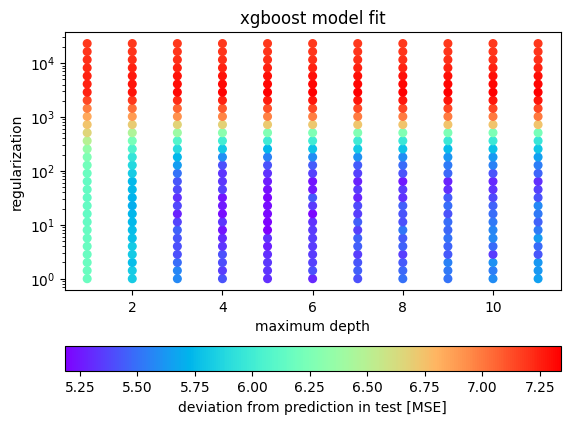

In [151]:

plt.scatter(x=xres[1], y=xres[0], c=xres[3],s=30, cmap="rainbow")
plt.colorbar(label="deviation from prediction in test [MSE]", orientation="horizontal")
plt.xlabel("maximum depth")
plt.ylabel("regularization")
plt.yscale("log")
plt.title("xgboost model fit")
min2=np.min(xres[3])
for i in range(xres.shape[1]):
    for j in range(xres.shape[2]):
        if xres[3,i,j]==min2:
            print(xres[0:2,i,j])

Averaging 6 cases makes that there is not much random variation as it should be.
There the best is much less good, at best 5.1. The best regl

In [56]:
allres3=np.load("mc_v10_all.npy")
xmodel1=XGBRegressor(max_depth=5,reg_alpha=7.99275419).fit(allres3[19:38,:,0].T,np.mean(allres3[40,:,:],1))

In [178]:
seed(1)
n_it=6000000
rand2 =rand(n_it,19)*0.2-0.1
xpred=xmodel1.predict(rand2)
c=0
for i in range(len(xpred)):
    if xpred[i]<55:
        c+=1
print(c)
print(min(xpred))

1555
25.21419


In [191]:
selmodels=np.zeros((19,1555))
xselmodels=np.zeros((1555))
c=0
for i in range(len(xpred)):
    if xpred[i]<55:
        selmodels[:,c]=rand2[i,:]
        xselmodels[c]=xpred[i]
        c+=1
print(c)        
#np.save("xgb_sel1.txt",selmodels)       
#np.save("pred_xgb_sel1.npy",xselmodels) 

1555


Below I build a function which gets win fractions running two lists of input models in all possible combinations. 

In [7]:
#does comparisons against a number of cases
#open_vars and co and and are lists of the variables to be used 
#open_21 and teh on are the 
#reliazations are number of models tried in one, trials are number of MC models for level 21
#wfrac when it aborts early
#wfrac2 performance of worst case .
def many_comparisons(open_vars,discard_vars,value_vars,open_21,discard_21,value_21,realizations,wfrac=0.10,wfrac2=0.551):
    n_it=realizations
    trials=len(open_21)
    results=np.zeros((41,trials,len(open_vars)))
    for j in range(trials):
        print(f"doing case {j} for level 21")
        #create random values for level 21 within the ranges, save are used for all level 20 models
        level21_open_variable=np.array(open_21[j])
        level21_discard_variable=np.array(discard_21[j])
        level21_value_variable=np.array(value_21[j])          
        for k in range(len(open_vars)):
            print(f"trying case {k} for level 20")
            level20_open_variable=np.array(open_vars[k])
            level20_discard_variable=np.array(discard_vars[k])
            level20_value_variable=np.array(value_vars[k])            
            results[0:6,j,k]=level20_open_variable
            results[6:12,j,k]=level20_discard_variable
            results[12:19,j,k]=level20_value_variable    
            results[19:25,j,k]=level21_open_variable
            results[25:31,j,k]=level21_discard_variable
            results[31:38,j,k]=level21_value_variable         
            win20=0
            it_counter=0
            start_time=time.time()
            n_it1=n_it
            if n_it1>22:
                n_it1=22
            #22 always     
            for i in range(n_it1):
                names=['alpha','beta']
                nature=['computer','computer']
                levels=[20,21]
                it_counter+=1
                winner=skyjo_game(names,nature,levels,0,True,False,level20_open_variable=level20_open_variable,level21_open_variable=level21_open_variable,level20_discard_variable=level20_discard_variable,level21_discard_variable=level21_discard_variable,level20_value_variable=level20_value_variable,level21_value_variable=level21_value_variable)
                if winner[0]==1:
                    win20+=1
            #98% ownside win conditions tested here   2.33 sigma   stops early when new model clearly bad or good 
            while it_counter<n_it and abs((win20-it_counter/2)/np.sqrt(it_counter))<2.33:  
                names=['alpha','beta']
                nature=['computer','computer']
                levels=[20,21]
                it_counter+=1
                winner=skyjo_game(names,nature,levels,0,True,False,level20_open_variable=level20_open_variable,level21_open_variable=level21_open_variable,level20_discard_variable=level20_discard_variable,level21_discard_variable=level21_discard_variable,level20_value_variable=level20_value_variable,level21_value_variable=level21_value_variable)
                if winner[0]==1:
                    win20+=1                
            #now checking whether 98% sigficant on bad performance        
            results[38,j,k]=it_counter
            results[39,j,k]=win20
            results[40,j,k]=100*win20/it_counter         
            stop_time=time.time()
            print(f"{it_counter} games need {np.round(stop_time-start_time,3)} seconds")
            print(f"level 20 won to {np.round(results[40,j,k],1)} %")
        print(f"level 20 won in average to {np.round(np.mean(results[40,j,:]),1)} %") 
        if np.mean(results[40,j,:]/100)<wfrac and np.max(results[40,j,:]/100)<wfrac2:
            print("better model found")
            if j==0:
                return True, results[:,j,:], results[:,j,:]
            else:
                #give back fit converged or not, best models, all models 
                return True, results[:,j,:], results[:,0:j+1,:]
    print("no better model found") 
    #second parameter is noen will not be used later
    return False, None, results 

In [4]:
print(5.5*3600/(1263/20))

313.5391923990499


Now I am running the existing models against the model created using xgboost. 

In [16]:
allres2=np.load("mc_v9_all.npy")
c=0
list_open7=[]
list_discard7=[]
list_value7=[]
for i in range(850):
    if np.mean(allres2[40,i,4:6])<45 and np.max(allres2[40,i,:])<60:
        list_open7.append(allres2[19:25,i,0])
        list_discard7.append(allres2[25:31,i,0])        
        list_value7.append(allres2[31:38,i,0])   
print(list_open7)
xres1=np.load("xgb_sel1.txt.npy")
c=0
list_openx1=[]
list_discardx1=[]
list_valuex1=[]
for i in range(340,950):
        list_openx1.append(xres1[0:6,i])
        list_discardx1.append(xres1[6:12,i])        
        list_valuex1.append(xres1[12:19,i])   
print(list_openx1[0:7])

start_time=time.time()
boolean,bestres,allres=many_comparisons(list_open7,list_discard7,list_value7,list_openx1,list_discardx1,list_valuex1,50,wfrac=0.001,wfrac2=0.002)
#v10 on purpose impossible crieteria to just run all iterations with predictable operation duration
#mcx_v1_all.npy does first 20 
#v2 is 20 to 340 
#v3 is 340 tom 950
np.save("mcx_v3_all.npy",allres)
stop_time=time.time()
print(f"ran for {np.round(stop_time-start_time,2)} seconds")       
#first 20 needed 1263.93 second clearly slower , slower model or computer more occupied? , or just taht models are better
#ran for 16865.23 seconds for 320

[array([-0.06831686,  0.02731667,  0.06433668, -0.06519184, -0.06138129,
       -0.02530104]), array([ 0.09651646, -0.02684305,  0.00183673, -0.0894212 , -0.08815541,
        0.03519835]), array([-0.017706  , -0.07898665, -0.03564065, -0.08886795,  0.04114419,
        0.02847683]), array([-0.06021169, -0.0902781 , -0.00155455, -0.01841127,  0.01388234,
       -0.05260926]), array([-0.00082434,  0.04036975, -0.09866433, -0.08950707, -0.00375526,
       -0.06464979]), array([-6.53596770e-05, -6.90977851e-02,  1.60961960e-02, -4.81552487e-03,
       -7.62965770e-02, -1.97269779e-02])]
[array([ 0.07167175, -0.04843659, -0.0067574 ,  0.00456917, -0.05073618,
       -0.0735937 ]), array([ 0.00187748, -0.08679945, -0.07414245, -0.01315587,  0.02386005,
       -0.09965818]), array([ 0.02291818,  0.05359993, -0.06210101, -0.07919192, -0.06676402,
       -0.09224651]), array([-0.05571683, -0.02747073, -0.091028  , -0.00364757, -0.05960689,
       -0.08419466]), array([-0.01822643, -0.09614289,  

50 games need 11.073 seconds
level 20 won to 64.0 %
trying case 2 for level 20
50 games need 9.475 seconds
level 20 won to 64.0 %
trying case 3 for level 20
50 games need 12.288 seconds
level 20 won to 60.0 %
trying case 4 for level 20
50 games need 13.178 seconds
level 20 won to 60.0 %
trying case 5 for level 20
50 games need 11.307 seconds
level 20 won to 68.0 %
level 20 won in average to 61.3 %
doing case 14 for level 21
trying case 0 for level 20
50 games need 8.674 seconds
level 20 won to 54.0 %
trying case 1 for level 20
50 games need 8.069 seconds
level 20 won to 56.0 %
trying case 2 for level 20
50 games need 7.402 seconds
level 20 won to 58.0 %
trying case 3 for level 20
50 games need 10.124 seconds
level 20 won to 48.0 %
trying case 4 for level 20
50 games need 10.654 seconds
level 20 won to 56.0 %
trying case 5 for level 20
50 games need 9.063 seconds
level 20 won to 32.0 %
level 20 won in average to 50.7 %
doing case 15 for level 21
trying case 0 for level 20
50 games need 

26 games need 4.221 seconds
level 20 won to 96.2 %
trying case 5 for level 20
46 games need 6.381 seconds
level 20 won to 84.8 %
level 20 won in average to 90.7 %
doing case 29 for level 21
trying case 0 for level 20
50 games need 12.781 seconds
level 20 won to 62.0 %
trying case 1 for level 20
43 games need 9.846 seconds
level 20 won to 86.0 %
trying case 2 for level 20
50 games need 10.725 seconds
level 20 won to 76.0 %
trying case 3 for level 20
50 games need 12.805 seconds
level 20 won to 78.0 %
trying case 4 for level 20
50 games need 13.925 seconds
level 20 won to 78.0 %
trying case 5 for level 20
50 games need 11.211 seconds
level 20 won to 76.0 %
level 20 won in average to 76.0 %
doing case 30 for level 21
trying case 0 for level 20
50 games need 12.737 seconds
level 20 won to 46.0 %
trying case 1 for level 20
50 games need 11.656 seconds
level 20 won to 42.0 %
trying case 2 for level 20
50 games need 11.024 seconds
level 20 won to 52.0 %
trying case 3 for level 20
50 games nee

50 games need 7.168 seconds
level 20 won to 62.0 %
trying case 1 for level 20
50 games need 6.938 seconds
level 20 won to 68.0 %
trying case 2 for level 20
49 games need 5.298 seconds
level 20 won to 83.7 %
trying case 3 for level 20
50 games need 8.473 seconds
level 20 won to 56.0 %
trying case 4 for level 20
50 games need 8.98 seconds
level 20 won to 52.0 %
trying case 5 for level 20
50 games need 8.597 seconds
level 20 won to 62.0 %
level 20 won in average to 63.9 %
doing case 45 for level 21
trying case 0 for level 20
50 games need 11.512 seconds
level 20 won to 76.0 %
trying case 1 for level 20
50 games need 10.24 seconds
level 20 won to 54.0 %
trying case 2 for level 20
50 games need 9.43 seconds
level 20 won to 56.0 %
trying case 3 for level 20
50 games need 11.471 seconds
level 20 won to 54.0 %
trying case 4 for level 20
50 games need 12.797 seconds
level 20 won to 42.0 %
trying case 5 for level 20
50 games need 11.25 seconds
level 20 won to 50.0 %
level 20 won in average to 55

50 games need 9.56 seconds
level 20 won to 60.0 %
trying case 4 for level 20
50 games need 8.491 seconds
level 20 won to 46.0 %
trying case 5 for level 20
50 games need 8.98 seconds
level 20 won to 66.0 %
level 20 won in average to 61.0 %
doing case 60 for level 21
trying case 0 for level 20
50 games need 9.457 seconds
level 20 won to 58.0 %
trying case 1 for level 20
50 games need 8.832 seconds
level 20 won to 58.0 %
trying case 2 for level 20
50 games need 7.835 seconds
level 20 won to 64.0 %
trying case 3 for level 20
50 games need 9.694 seconds
level 20 won to 68.0 %
trying case 4 for level 20
50 games need 10.504 seconds
level 20 won to 60.0 %
trying case 5 for level 20
50 games need 9.28 seconds
level 20 won to 64.0 %
level 20 won in average to 62.0 %
doing case 61 for level 21
trying case 0 for level 20
50 games need 10.208 seconds
level 20 won to 60.0 %
trying case 1 for level 20
50 games need 9.033 seconds
level 20 won to 48.0 %
trying case 2 for level 20
50 games need 8.072 s

50 games need 7.094 seconds
level 20 won to 58.0 %
trying case 1 for level 20
50 games need 6.732 seconds
level 20 won to 66.0 %
trying case 2 for level 20
26 games need 2.94 seconds
level 20 won to 96.2 %
trying case 3 for level 20
50 games need 8.702 seconds
level 20 won to 70.0 %
trying case 4 for level 20
50 games need 8.273 seconds
level 20 won to 70.0 %
trying case 5 for level 20
50 games need 8.193 seconds
level 20 won to 60.0 %
level 20 won in average to 70.0 %
doing case 76 for level 21
trying case 0 for level 20
50 games need 10.151 seconds
level 20 won to 44.0 %
trying case 1 for level 20
50 games need 9.348 seconds
level 20 won to 38.0 %
trying case 2 for level 20
50 games need 8.449 seconds
level 20 won to 46.0 %
trying case 3 for level 20
50 games need 8.949 seconds
level 20 won to 24.0 %
trying case 4 for level 20
50 games need 9.325 seconds
level 20 won to 30.0 %
trying case 5 for level 20
50 games need 8.701 seconds
level 20 won to 38.0 %
level 20 won in average to 36.

50 games need 8.01 seconds
level 20 won to 58.0 %
trying case 5 for level 20
50 games need 8.393 seconds
level 20 won to 52.0 %
level 20 won in average to 63.3 %
doing case 91 for level 21
trying case 0 for level 20
50 games need 11.096 seconds
level 20 won to 60.0 %
trying case 1 for level 20
50 games need 10.302 seconds
level 20 won to 64.0 %
trying case 2 for level 20
50 games need 8.912 seconds
level 20 won to 62.0 %
trying case 3 for level 20
50 games need 10.654 seconds
level 20 won to 74.0 %
trying case 4 for level 20
50 games need 10.943 seconds
level 20 won to 56.0 %
trying case 5 for level 20
50 games need 10.563 seconds
level 20 won to 58.0 %
level 20 won in average to 62.3 %
doing case 92 for level 21
trying case 0 for level 20
43 games need 2.894 seconds
level 20 won to 86.0 %
trying case 1 for level 20
50 games need 3.111 seconds
level 20 won to 80.0 %
trying case 2 for level 20
22 games need 1.211 seconds
level 20 won to 100.0 %
trying case 3 for level 20
49 games need 3

50 games need 4.236 seconds
level 20 won to 82.0 %
trying case 2 for level 20
22 games need 1.476 seconds
level 20 won to 100.0 %
trying case 3 for level 20
50 games need 5.045 seconds
level 20 won to 68.0 %
trying case 4 for level 20
50 games need 5.954 seconds
level 20 won to 58.0 %
trying case 5 for level 20
50 games need 5.378 seconds
level 20 won to 64.0 %
level 20 won in average to 74.7 %
doing case 107 for level 21
trying case 0 for level 20
50 games need 13.165 seconds
level 20 won to 64.0 %
trying case 1 for level 20
50 games need 10.988 seconds
level 20 won to 64.0 %
trying case 2 for level 20
50 games need 11.16 seconds
level 20 won to 66.0 %
trying case 3 for level 20
50 games need 12.607 seconds
level 20 won to 60.0 %
trying case 4 for level 20
50 games need 13.741 seconds
level 20 won to 66.0 %
trying case 5 for level 20
50 games need 11.843 seconds
level 20 won to 54.0 %
level 20 won in average to 62.3 %
doing case 108 for level 21
trying case 0 for level 20
50 games nee

50 games need 13.704 seconds
level 20 won to 78.0 %
trying case 5 for level 20
50 games need 11.799 seconds
level 20 won to 74.0 %
level 20 won in average to 78.5 %
doing case 122 for level 21
trying case 0 for level 20
50 games need 12.791 seconds
level 20 won to 70.0 %
trying case 1 for level 20
50 games need 10.96 seconds
level 20 won to 62.0 %
trying case 2 for level 20
43 games need 9.4 seconds
level 20 won to 86.0 %
trying case 3 for level 20
50 games need 12.882 seconds
level 20 won to 70.0 %
trying case 4 for level 20
50 games need 14.022 seconds
level 20 won to 80.0 %
trying case 5 for level 20
50 games need 11.25 seconds
level 20 won to 74.0 %
level 20 won in average to 73.7 %
doing case 123 for level 21
trying case 0 for level 20
50 games need 6.816 seconds
level 20 won to 72.0 %
trying case 1 for level 20
50 games need 6.286 seconds
level 20 won to 80.0 %
trying case 2 for level 20
22 games need 2.405 seconds
level 20 won to 100.0 %
trying case 3 for level 20
50 games need 

50 games need 8.395 seconds
level 20 won to 64.0 %
trying case 1 for level 20
50 games need 8.594 seconds
level 20 won to 60.0 %
trying case 2 for level 20
50 games need 7.283 seconds
level 20 won to 72.0 %
trying case 3 for level 20
50 games need 9.016 seconds
level 20 won to 44.0 %
trying case 4 for level 20
50 games need 9.685 seconds
level 20 won to 48.0 %
trying case 5 for level 20
50 games need 8.544 seconds
level 20 won to 60.0 %
level 20 won in average to 58.0 %
doing case 138 for level 21
trying case 0 for level 20
50 games need 11.214 seconds
level 20 won to 34.0 %
trying case 1 for level 20
50 games need 9.982 seconds
level 20 won to 32.0 %
trying case 2 for level 20
50 games need 9.858 seconds
level 20 won to 40.0 %
trying case 3 for level 20
50 games need 10.694 seconds
level 20 won to 46.0 %
trying case 4 for level 20
50 games need 11.3 seconds
level 20 won to 32.0 %
trying case 5 for level 20
50 games need 10.312 seconds
level 20 won to 54.0 %
level 20 won in average to 

50 games need 7.522 seconds
level 20 won to 70.0 %
trying case 4 for level 20
50 games need 8.86 seconds
level 20 won to 38.0 %
trying case 5 for level 20
50 games need 7.888 seconds
level 20 won to 56.0 %
level 20 won in average to 61.0 %
doing case 153 for level 21
trying case 0 for level 20
50 games need 12.237 seconds
level 20 won to 50.0 %
trying case 1 for level 20
50 games need 9.706 seconds
level 20 won to 40.0 %
trying case 2 for level 20
50 games need 9.58 seconds
level 20 won to 48.0 %
trying case 3 for level 20
50 games need 11.892 seconds
level 20 won to 54.0 %
trying case 4 for level 20
50 games need 11.872 seconds
level 20 won to 38.0 %
trying case 5 for level 20
50 games need 11.071 seconds
level 20 won to 46.0 %
level 20 won in average to 46.0 %
doing case 154 for level 21
trying case 0 for level 20
50 games need 10.218 seconds
level 20 won to 50.0 %
trying case 1 for level 20
50 games need 9.723 seconds
level 20 won to 46.0 %
trying case 2 for level 20
50 games need 8

50 games need 7.248 seconds
level 20 won to 40.0 %
trying case 1 for level 20
50 games need 7.231 seconds
level 20 won to 50.0 %
trying case 2 for level 20
50 games need 7.637 seconds
level 20 won to 52.0 %
trying case 3 for level 20
50 games need 7.398 seconds
level 20 won to 54.0 %
trying case 4 for level 20
50 games need 6.327 seconds
level 20 won to 30.0 %
trying case 5 for level 20
50 games need 6.859 seconds
level 20 won to 52.0 %
level 20 won in average to 46.3 %
doing case 169 for level 21
trying case 0 for level 20
50 games need 11.993 seconds
level 20 won to 50.0 %
trying case 1 for level 20
50 games need 10.623 seconds
level 20 won to 56.0 %
trying case 2 for level 20
50 games need 11.013 seconds
level 20 won to 52.0 %
trying case 3 for level 20
50 games need 11.599 seconds
level 20 won to 54.0 %
trying case 4 for level 20
50 games need 12.208 seconds
level 20 won to 50.0 %
trying case 5 for level 20
50 games need 10.092 seconds
level 20 won to 56.0 %
level 20 won in average

50 games need 12.086 seconds
level 20 won to 54.0 %
trying case 4 for level 20
50 games need 13.686 seconds
level 20 won to 32.0 %
trying case 5 for level 20
50 games need 11.388 seconds
level 20 won to 66.0 %
level 20 won in average to 51.7 %
doing case 184 for level 21
trying case 0 for level 20
50 games need 13.629 seconds
level 20 won to 46.0 %
trying case 1 for level 20
50 games need 10.882 seconds
level 20 won to 50.0 %
trying case 2 for level 20
50 games need 11.297 seconds
level 20 won to 38.0 %
trying case 3 for level 20
50 games need 12.771 seconds
level 20 won to 48.0 %
trying case 4 for level 20
50 games need 13.426 seconds
level 20 won to 52.0 %
trying case 5 for level 20
50 games need 10.905 seconds
level 20 won to 58.0 %
level 20 won in average to 48.7 %
doing case 185 for level 21
trying case 0 for level 20
22 games need 2.209 seconds
level 20 won to 100.0 %
trying case 1 for level 20
49 games need 4.192 seconds
level 20 won to 83.7 %
trying case 2 for level 20
22 games

50 games need 6.519 seconds
level 20 won to 70.0 %
trying case 1 for level 20
50 games need 6.973 seconds
level 20 won to 68.0 %
trying case 2 for level 20
50 games need 6.389 seconds
level 20 won to 80.0 %
trying case 3 for level 20
50 games need 6.8 seconds
level 20 won to 74.0 %
trying case 4 for level 20
50 games need 7.345 seconds
level 20 won to 48.0 %
trying case 5 for level 20
50 games need 6.37 seconds
level 20 won to 72.0 %
level 20 won in average to 68.7 %
doing case 200 for level 21
trying case 0 for level 20
50 games need 10.91 seconds
level 20 won to 56.0 %
trying case 1 for level 20
50 games need 8.815 seconds
level 20 won to 40.0 %
trying case 2 for level 20
50 games need 8.85 seconds
level 20 won to 46.0 %
trying case 3 for level 20
50 games need 10.64 seconds
level 20 won to 56.0 %
trying case 4 for level 20
50 games need 11.127 seconds
level 20 won to 34.0 %
trying case 5 for level 20
50 games need 9.34 seconds
level 20 won to 36.0 %
level 20 won in average to 44.7 %

50 games need 6.188 seconds
level 20 won to 64.0 %
trying case 4 for level 20
50 games need 5.736 seconds
level 20 won to 48.0 %
trying case 5 for level 20
50 games need 6.41 seconds
level 20 won to 68.0 %
level 20 won in average to 67.7 %
doing case 215 for level 21
trying case 0 for level 20
50 games need 11.497 seconds
level 20 won to 32.0 %
trying case 1 for level 20
50 games need 10.313 seconds
level 20 won to 46.0 %
trying case 2 for level 20
50 games need 9.753 seconds
level 20 won to 56.0 %
trying case 3 for level 20
50 games need 10.907 seconds
level 20 won to 50.0 %
trying case 4 for level 20
50 games need 11.606 seconds
level 20 won to 50.0 %
trying case 5 for level 20
50 games need 10.634 seconds
level 20 won to 40.0 %
level 20 won in average to 45.7 %
doing case 216 for level 21
trying case 0 for level 20
50 games need 12.654 seconds
level 20 won to 42.0 %
trying case 1 for level 20
50 games need 9.779 seconds
level 20 won to 38.0 %
trying case 2 for level 20
50 games need

50 games need 9.37 seconds
level 20 won to 60.0 %
trying case 1 for level 20
50 games need 8.326 seconds
level 20 won to 54.0 %
trying case 2 for level 20
50 games need 7.933 seconds
level 20 won to 64.0 %
trying case 3 for level 20
50 games need 9.253 seconds
level 20 won to 58.0 %
trying case 4 for level 20
50 games need 11.133 seconds
level 20 won to 38.0 %
trying case 5 for level 20
50 games need 9.314 seconds
level 20 won to 52.0 %
level 20 won in average to 54.3 %
doing case 231 for level 21
trying case 0 for level 20
50 games need 6.671 seconds
level 20 won to 78.0 %
trying case 1 for level 20
50 games need 7.269 seconds
level 20 won to 80.0 %
trying case 2 for level 20
50 games need 6.155 seconds
level 20 won to 80.0 %
trying case 3 for level 20
50 games need 7.466 seconds
level 20 won to 70.0 %
trying case 4 for level 20
50 games need 7.978 seconds
level 20 won to 70.0 %
trying case 5 for level 20
50 games need 7.617 seconds
level 20 won to 72.0 %
level 20 won in average to 75

50 games need 10.554 seconds
level 20 won to 56.0 %
trying case 4 for level 20
50 games need 10.324 seconds
level 20 won to 64.0 %
trying case 5 for level 20
50 games need 10.954 seconds
level 20 won to 54.0 %
level 20 won in average to 57.7 %
doing case 246 for level 21
trying case 0 for level 20
50 games need 4.7 seconds
level 20 won to 64.0 %
trying case 1 for level 20
50 games need 5.134 seconds
level 20 won to 60.0 %
trying case 2 for level 20
50 games need 5.447 seconds
level 20 won to 80.0 %
trying case 3 for level 20
50 games need 4.708 seconds
level 20 won to 66.0 %
trying case 4 for level 20
50 games need 4.853 seconds
level 20 won to 52.0 %
trying case 5 for level 20
50 games need 5.022 seconds
level 20 won to 66.0 %
level 20 won in average to 64.7 %
doing case 247 for level 21
trying case 0 for level 20
43 games need 3.676 seconds
level 20 won to 86.0 %
trying case 1 for level 20
36 games need 2.768 seconds
level 20 won to 88.9 %
trying case 2 for level 20
22 games need 1.2

22 games need 2.972 seconds
level 20 won to 100.0 %
trying case 1 for level 20
26 games need 3.643 seconds
level 20 won to 96.2 %
trying case 2 for level 20
33 games need 4.268 seconds
level 20 won to 90.9 %
trying case 3 for level 20
22 games need 2.946 seconds
level 20 won to 100.0 %
trying case 4 for level 20
30 games need 4.427 seconds
level 20 won to 93.3 %
trying case 5 for level 20
30 games need 4.449 seconds
level 20 won to 93.3 %
level 20 won in average to 95.6 %
doing case 262 for level 21
trying case 0 for level 20
36 games need 8.125 seconds
level 20 won to 88.9 %
trying case 1 for level 20
50 games need 10.806 seconds
level 20 won to 82.0 %
trying case 2 for level 20
22 games need 4.731 seconds
level 20 won to 100.0 %
trying case 3 for level 20
26 games need 6.098 seconds
level 20 won to 96.2 %
trying case 4 for level 20
46 games need 10.896 seconds
level 20 won to 84.8 %
trying case 5 for level 20
33 games need 6.376 seconds
level 20 won to 90.9 %
level 20 won in average 

50 games need 9.923 seconds
level 20 won to 60.0 %
trying case 4 for level 20
50 games need 10.757 seconds
level 20 won to 44.0 %
trying case 5 for level 20
50 games need 9.524 seconds
level 20 won to 62.0 %
level 20 won in average to 53.7 %
doing case 277 for level 21
trying case 0 for level 20
50 games need 12.946 seconds
level 20 won to 60.0 %
trying case 1 for level 20
50 games need 11.525 seconds
level 20 won to 60.0 %
trying case 2 for level 20
50 games need 11.257 seconds
level 20 won to 56.0 %
trying case 3 for level 20
50 games need 11.287 seconds
level 20 won to 52.0 %
trying case 4 for level 20
50 games need 10.995 seconds
level 20 won to 52.0 %
trying case 5 for level 20
50 games need 10.184 seconds
level 20 won to 46.0 %
level 20 won in average to 54.3 %
doing case 278 for level 21
trying case 0 for level 20
50 games need 11.538 seconds
level 20 won to 62.0 %
trying case 1 for level 20
50 games need 9.506 seconds
level 20 won to 64.0 %
trying case 2 for level 20
50 games n

50 games need 6.34 seconds
level 20 won to 74.0 %
trying case 1 for level 20
50 games need 5.802 seconds
level 20 won to 72.0 %
trying case 2 for level 20
49 games need 5.152 seconds
level 20 won to 83.7 %
trying case 3 for level 20
50 games need 6.833 seconds
level 20 won to 64.0 %
trying case 4 for level 20
50 games need 6.767 seconds
level 20 won to 52.0 %
trying case 5 for level 20
50 games need 6.758 seconds
level 20 won to 62.0 %
level 20 won in average to 67.9 %
doing case 293 for level 21
trying case 0 for level 20
50 games need 7.354 seconds
level 20 won to 62.0 %
trying case 1 for level 20
50 games need 7.093 seconds
level 20 won to 80.0 %
trying case 2 for level 20
50 games need 5.779 seconds
level 20 won to 78.0 %
trying case 3 for level 20
50 games need 8.222 seconds
level 20 won to 52.0 %
trying case 4 for level 20
50 games need 8.172 seconds
level 20 won to 36.0 %
trying case 5 for level 20
50 games need 7.311 seconds
level 20 won to 50.0 %
level 20 won in average to 59.

30 games need 2.427 seconds
level 20 won to 93.3 %
trying case 4 for level 20
50 games need 4.385 seconds
level 20 won to 74.0 %
trying case 5 for level 20
26 games need 1.902 seconds
level 20 won to 96.2 %
level 20 won in average to 92.4 %
doing case 308 for level 21
trying case 0 for level 20
50 games need 6.328 seconds
level 20 won to 48.0 %
trying case 1 for level 20
50 games need 6.281 seconds
level 20 won to 54.0 %
trying case 2 for level 20
50 games need 5.459 seconds
level 20 won to 76.0 %
trying case 3 for level 20
50 games need 6.822 seconds
level 20 won to 48.0 %
trying case 4 for level 20
50 games need 6.666 seconds
level 20 won to 36.0 %
trying case 5 for level 20
50 games need 6.829 seconds
level 20 won to 46.0 %
level 20 won in average to 51.3 %
doing case 309 for level 21
trying case 0 for level 20
50 games need 7.915 seconds
level 20 won to 56.0 %
trying case 1 for level 20
50 games need 7.474 seconds
level 20 won to 54.0 %
trying case 2 for level 20
50 games need 8.19

50 games need 10.884 seconds
level 20 won to 82.0 %
trying case 1 for level 20
46 games need 9.968 seconds
level 20 won to 84.8 %
trying case 2 for level 20
36 games need 7.527 seconds
level 20 won to 88.9 %
trying case 3 for level 20
50 games need 12.245 seconds
level 20 won to 82.0 %
trying case 4 for level 20
36 games need 8.236 seconds
level 20 won to 88.9 %
trying case 5 for level 20
50 games need 9.872 seconds
level 20 won to 78.0 %
level 20 won in average to 84.1 %
doing case 324 for level 21
trying case 0 for level 20
50 games need 5.937 seconds
level 20 won to 66.0 %
trying case 1 for level 20
50 games need 5.699 seconds
level 20 won to 50.0 %
trying case 2 for level 20
50 games need 6.737 seconds
level 20 won to 64.0 %
trying case 3 for level 20
50 games need 5.047 seconds
level 20 won to 60.0 %
trying case 4 for level 20
50 games need 4.946 seconds
level 20 won to 66.0 %
trying case 5 for level 20
50 games need 5.38 seconds
level 20 won to 58.0 %
level 20 won in average to 6

49 games need 3.467 seconds
level 20 won to 83.7 %
trying case 4 for level 20
50 games need 3.512 seconds
level 20 won to 68.0 %
trying case 5 for level 20
50 games need 3.31 seconds
level 20 won to 80.0 %
level 20 won in average to 83.2 %
doing case 339 for level 21
trying case 0 for level 20
50 games need 12.976 seconds
level 20 won to 44.0 %
trying case 1 for level 20
50 games need 11.475 seconds
level 20 won to 38.0 %
trying case 2 for level 20
50 games need 12.146 seconds
level 20 won to 56.0 %
trying case 3 for level 20
50 games need 12.171 seconds
level 20 won to 50.0 %
trying case 4 for level 20
50 games need 13.586 seconds
level 20 won to 66.0 %
trying case 5 for level 20
50 games need 12.4 seconds
level 20 won to 50.0 %
level 20 won in average to 50.7 %
doing case 340 for level 21
trying case 0 for level 20
50 games need 8.604 seconds
level 20 won to 76.0 %
trying case 1 for level 20
50 games need 7.346 seconds
level 20 won to 78.0 %
trying case 2 for level 20
50 games need 6

50 games need 11.431 seconds
level 20 won to 38.0 %
trying case 1 for level 20
50 games need 10.467 seconds
level 20 won to 60.0 %
trying case 2 for level 20
50 games need 9.945 seconds
level 20 won to 50.0 %
trying case 3 for level 20
50 games need 10.972 seconds
level 20 won to 50.0 %
trying case 4 for level 20
50 games need 12.072 seconds
level 20 won to 38.0 %
trying case 5 for level 20
50 games need 10.654 seconds
level 20 won to 42.0 %
level 20 won in average to 46.3 %
doing case 355 for level 21
trying case 0 for level 20
50 games need 6.759 seconds
level 20 won to 52.0 %
trying case 1 for level 20
50 games need 6.124 seconds
level 20 won to 52.0 %
trying case 2 for level 20
46 games need 5.653 seconds
level 20 won to 84.8 %
trying case 3 for level 20
50 games need 6.87 seconds
level 20 won to 60.0 %
trying case 4 for level 20
50 games need 6.841 seconds
level 20 won to 44.0 %
trying case 5 for level 20
50 games need 6.772 seconds
level 20 won to 76.0 %
level 20 won in average t

50 games need 11.989 seconds
level 20 won to 54.0 %
trying case 4 for level 20
50 games need 13.739 seconds
level 20 won to 48.0 %
trying case 5 for level 20
50 games need 12.038 seconds
level 20 won to 56.0 %
level 20 won in average to 58.7 %
doing case 370 for level 21
trying case 0 for level 20
50 games need 8.065 seconds
level 20 won to 62.0 %
trying case 1 for level 20
50 games need 7.322 seconds
level 20 won to 62.0 %
trying case 2 for level 20
50 games need 7.016 seconds
level 20 won to 74.0 %
trying case 3 for level 20
50 games need 8.308 seconds
level 20 won to 50.0 %
trying case 4 for level 20
50 games need 8.142 seconds
level 20 won to 44.0 %
trying case 5 for level 20
50 games need 8.141 seconds
level 20 won to 44.0 %
level 20 won in average to 56.0 %
doing case 371 for level 21
trying case 0 for level 20
50 games need 12.328 seconds
level 20 won to 58.0 %
trying case 1 for level 20
50 games need 11.156 seconds
level 20 won to 52.0 %
trying case 2 for level 20
50 games need

50 games need 7.152 seconds
level 20 won to 70.0 %
trying case 1 for level 20
40 games need 4.434 seconds
level 20 won to 87.5 %
trying case 2 for level 20
22 games need 2.144 seconds
level 20 won to 100.0 %
trying case 3 for level 20
50 games need 7.244 seconds
level 20 won to 68.0 %
trying case 4 for level 20
50 games need 7.714 seconds
level 20 won to 34.0 %
trying case 5 for level 20
50 games need 7.104 seconds
level 20 won to 74.0 %
level 20 won in average to 72.2 %
doing case 386 for level 21
trying case 0 for level 20
50 games need 10.335 seconds
level 20 won to 52.0 %
trying case 1 for level 20
50 games need 9.892 seconds
level 20 won to 60.0 %
trying case 2 for level 20
50 games need 8.753 seconds
level 20 won to 74.0 %
trying case 3 for level 20
50 games need 11.274 seconds
level 20 won to 72.0 %
trying case 4 for level 20
50 games need 12.029 seconds
level 20 won to 52.0 %
trying case 5 for level 20
50 games need 10.067 seconds
level 20 won to 52.0 %
level 20 won in average 

50 games need 6.326 seconds
level 20 won to 56.0 %
trying case 4 for level 20
50 games need 6.134 seconds
level 20 won to 36.0 %
trying case 5 for level 20
50 games need 6.462 seconds
level 20 won to 76.0 %
level 20 won in average to 63.5 %
doing case 401 for level 21
trying case 0 for level 20
46 games need 3.888 seconds
level 20 won to 84.8 %
trying case 1 for level 20
40 games need 3.266 seconds
level 20 won to 87.5 %
trying case 2 for level 20
26 games need 1.914 seconds
level 20 won to 96.2 %
trying case 3 for level 20
50 games need 5.233 seconds
level 20 won to 70.0 %
trying case 4 for level 20
50 games need 5.835 seconds
level 20 won to 60.0 %
trying case 5 for level 20
50 games need 4.991 seconds
level 20 won to 80.0 %
level 20 won in average to 79.7 %
doing case 402 for level 21
trying case 0 for level 20
46 games need 6.011 seconds
level 20 won to 84.8 %
trying case 1 for level 20
50 games need 6.033 seconds
level 20 won to 80.0 %
trying case 2 for level 20
22 games need 2.16

50 games need 10.103 seconds
level 20 won to 72.0 %
trying case 1 for level 20
50 games need 9.924 seconds
level 20 won to 60.0 %
trying case 2 for level 20
50 games need 8.487 seconds
level 20 won to 74.0 %
trying case 3 for level 20
50 games need 10.38 seconds
level 20 won to 72.0 %
trying case 4 for level 20
50 games need 10.899 seconds
level 20 won to 50.0 %
trying case 5 for level 20
50 games need 10.818 seconds
level 20 won to 52.0 %
level 20 won in average to 63.3 %
doing case 417 for level 21
trying case 0 for level 20
50 games need 11.756 seconds
level 20 won to 50.0 %
trying case 1 for level 20
50 games need 10.766 seconds
level 20 won to 68.0 %
trying case 2 for level 20
50 games need 10.408 seconds
level 20 won to 64.0 %
trying case 3 for level 20
50 games need 12.717 seconds
level 20 won to 52.0 %
trying case 4 for level 20
50 games need 13.566 seconds
level 20 won to 46.0 %
trying case 5 for level 20
50 games need 10.184 seconds
level 20 won to 48.0 %
level 20 won in aver

50 games need 12.102 seconds
level 20 won to 70.0 %
trying case 4 for level 20
50 games need 14.398 seconds
level 20 won to 74.0 %
trying case 5 for level 20
50 games need 11.023 seconds
level 20 won to 56.0 %
level 20 won in average to 67.0 %
doing case 432 for level 21
trying case 0 for level 20
50 games need 5.507 seconds
level 20 won to 64.0 %
trying case 1 for level 20
50 games need 5.967 seconds
level 20 won to 66.0 %
trying case 2 for level 20
50 games need 5.026 seconds
level 20 won to 72.0 %
trying case 3 for level 20
50 games need 5.859 seconds
level 20 won to 70.0 %
trying case 4 for level 20
50 games need 6.042 seconds
level 20 won to 60.0 %
trying case 5 for level 20
50 games need 5.974 seconds
level 20 won to 58.0 %
level 20 won in average to 65.0 %
doing case 433 for level 21
trying case 0 for level 20
50 games need 12.374 seconds
level 20 won to 32.0 %
trying case 1 for level 20
50 games need 11.062 seconds
level 20 won to 40.0 %
trying case 2 for level 20
50 games need

50 games need 10.397 seconds
level 20 won to 38.0 %
trying case 1 for level 20
50 games need 8.785 seconds
level 20 won to 36.0 %
trying case 2 for level 20
50 games need 9.366 seconds
level 20 won to 46.0 %
trying case 3 for level 20
50 games need 10.16 seconds
level 20 won to 48.0 %
trying case 4 for level 20
50 games need 10.083 seconds
level 20 won to 32.0 %
trying case 5 for level 20
50 games need 9.034 seconds
level 20 won to 44.0 %
level 20 won in average to 40.7 %
doing case 448 for level 21
trying case 0 for level 20
50 games need 12.115 seconds
level 20 won to 62.0 %
trying case 1 for level 20
50 games need 11.643 seconds
level 20 won to 40.0 %
trying case 2 for level 20
50 games need 11.206 seconds
level 20 won to 76.0 %
trying case 3 for level 20
50 games need 12.323 seconds
level 20 won to 68.0 %
trying case 4 for level 20
50 games need 13.646 seconds
level 20 won to 78.0 %
trying case 5 for level 20
50 games need 11.578 seconds
level 20 won to 62.0 %
level 20 won in avera

50 games need 11.977 seconds
level 20 won to 56.0 %
trying case 4 for level 20
50 games need 14.525 seconds
level 20 won to 70.0 %
trying case 5 for level 20
50 games need 11.797 seconds
level 20 won to 58.0 %
level 20 won in average to 54.3 %
doing case 463 for level 21
trying case 0 for level 20
43 games need 3.176 seconds
level 20 won to 86.0 %
trying case 1 for level 20
30 games need 1.812 seconds
level 20 won to 93.3 %
trying case 2 for level 20
22 games need 1.15 seconds
level 20 won to 100.0 %
trying case 3 for level 20
36 games need 2.76 seconds
level 20 won to 88.9 %
trying case 4 for level 20
50 games need 4.3 seconds
level 20 won to 58.0 %
trying case 5 for level 20
36 games need 2.775 seconds
level 20 won to 88.9 %
level 20 won in average to 85.9 %
doing case 464 for level 21
trying case 0 for level 20
50 games need 7.127 seconds
level 20 won to 68.0 %
trying case 1 for level 20
43 games need 5.946 seconds
level 20 won to 86.0 %
trying case 2 for level 20
26 games need 2.63

50 games need 14.163 seconds
level 20 won to 52.0 %
trying case 1 for level 20
50 games need 11.625 seconds
level 20 won to 44.0 %
trying case 2 for level 20
50 games need 11.95 seconds
level 20 won to 54.0 %
trying case 3 for level 20
50 games need 13.625 seconds
level 20 won to 42.0 %
trying case 4 for level 20
50 games need 15.441 seconds
level 20 won to 58.0 %
trying case 5 for level 20
50 games need 13.254 seconds
level 20 won to 58.0 %
level 20 won in average to 51.3 %
doing case 479 for level 21
trying case 0 for level 20
50 games need 9.137 seconds
level 20 won to 52.0 %
trying case 1 for level 20
50 games need 8.381 seconds
level 20 won to 58.0 %
trying case 2 for level 20
50 games need 6.771 seconds
level 20 won to 70.0 %
trying case 3 for level 20
50 games need 9.782 seconds
level 20 won to 58.0 %
trying case 4 for level 20
50 games need 10.205 seconds
level 20 won to 52.0 %
trying case 5 for level 20
50 games need 8.404 seconds
level 20 won to 54.0 %
level 20 won in average

50 games need 6.995 seconds
level 20 won to 58.0 %
trying case 4 for level 20
50 games need 7.331 seconds
level 20 won to 54.0 %
trying case 5 for level 20
50 games need 6.518 seconds
level 20 won to 70.0 %
level 20 won in average to 69.2 %
doing case 494 for level 21
trying case 0 for level 20
50 games need 5.77 seconds
level 20 won to 72.0 %
trying case 1 for level 20
50 games need 6.255 seconds
level 20 won to 46.0 %
trying case 2 for level 20
50 games need 7.098 seconds
level 20 won to 60.0 %
trying case 3 for level 20
50 games need 5.279 seconds
level 20 won to 68.0 %
trying case 4 for level 20
50 games need 4.063 seconds
level 20 won to 56.0 %
trying case 5 for level 20
50 games need 5.724 seconds
level 20 won to 78.0 %
level 20 won in average to 63.3 %
doing case 495 for level 21
trying case 0 for level 20
50 games need 8.422 seconds
level 20 won to 68.0 %
trying case 1 for level 20
49 games need 7.485 seconds
level 20 won to 83.7 %
trying case 2 for level 20
50 games need 6.953

50 games need 13.382 seconds
level 20 won to 54.0 %
trying case 1 for level 20
50 games need 11.285 seconds
level 20 won to 38.0 %
trying case 2 for level 20
50 games need 11.102 seconds
level 20 won to 64.0 %
trying case 3 for level 20
50 games need 12.534 seconds
level 20 won to 66.0 %
trying case 4 for level 20
50 games need 14.429 seconds
level 20 won to 64.0 %
trying case 5 for level 20
50 games need 12.102 seconds
level 20 won to 56.0 %
level 20 won in average to 57.0 %
doing case 510 for level 21
trying case 0 for level 20
50 games need 8.549 seconds
level 20 won to 56.0 %
trying case 1 for level 20
50 games need 8.174 seconds
level 20 won to 68.0 %
trying case 2 for level 20
50 games need 7.062 seconds
level 20 won to 72.0 %
trying case 3 for level 20
50 games need 9.731 seconds
level 20 won to 68.0 %
trying case 4 for level 20
50 games need 9.966 seconds
level 20 won to 54.0 %
trying case 5 for level 20
50 games need 9.353 seconds
level 20 won to 66.0 %
level 20 won in average

50 games need 8.657 seconds
level 20 won to 44.0 %
trying case 4 for level 20
50 games need 7.987 seconds
level 20 won to 28.0 %
trying case 5 for level 20
50 games need 7.578 seconds
level 20 won to 44.0 %
level 20 won in average to 40.0 %
doing case 525 for level 21
trying case 0 for level 20
50 games need 11.867 seconds
level 20 won to 48.0 %
trying case 1 for level 20
50 games need 10.967 seconds
level 20 won to 52.0 %
trying case 2 for level 20
50 games need 9.273 seconds
level 20 won to 56.0 %
trying case 3 for level 20
50 games need 12.197 seconds
level 20 won to 58.0 %
trying case 4 for level 20
50 games need 12.862 seconds
level 20 won to 48.0 %
trying case 5 for level 20
50 games need 11.117 seconds
level 20 won to 48.0 %
level 20 won in average to 51.7 %
doing case 526 for level 21
trying case 0 for level 20
50 games need 11.521 seconds
level 20 won to 56.0 %
trying case 1 for level 20
50 games need 10.138 seconds
level 20 won to 50.0 %
trying case 2 for level 20
50 games ne

50 games need 5.955 seconds
level 20 won to 74.0 %
trying case 1 for level 20
50 games need 5.119 seconds
level 20 won to 58.0 %
trying case 2 for level 20
50 games need 6.163 seconds
level 20 won to 76.0 %
trying case 3 for level 20
50 games need 4.764 seconds
level 20 won to 78.0 %
trying case 4 for level 20
50 games need 4.611 seconds
level 20 won to 52.0 %
trying case 5 for level 20
50 games need 5.214 seconds
level 20 won to 76.0 %
level 20 won in average to 69.0 %
doing case 541 for level 21
trying case 0 for level 20
50 games need 10.218 seconds
level 20 won to 64.0 %
trying case 1 for level 20
50 games need 9.394 seconds
level 20 won to 50.0 %
trying case 2 for level 20
50 games need 9.36 seconds
level 20 won to 56.0 %
trying case 3 for level 20
50 games need 9.179 seconds
level 20 won to 56.0 %
trying case 4 for level 20
50 games need 9.362 seconds
level 20 won to 38.0 %
trying case 5 for level 20
50 games need 9.519 seconds
level 20 won to 50.0 %
level 20 won in average to 52

50 games need 9.372 seconds
level 20 won to 82.0 %
trying case 4 for level 20
50 games need 9.541 seconds
level 20 won to 50.0 %
trying case 5 for level 20
50 games need 8.04 seconds
level 20 won to 68.0 %
level 20 won in average to 66.7 %
doing case 556 for level 21
trying case 0 for level 20
50 games need 8.532 seconds
level 20 won to 50.0 %
trying case 1 for level 20
50 games need 8.353 seconds
level 20 won to 48.0 %
trying case 2 for level 20
50 games need 8.021 seconds
level 20 won to 34.0 %
trying case 3 for level 20
50 games need 8.733 seconds
level 20 won to 52.0 %
trying case 4 for level 20
50 games need 7.888 seconds
level 20 won to 42.0 %
trying case 5 for level 20
50 games need 7.997 seconds
level 20 won to 48.0 %
level 20 won in average to 45.7 %
doing case 557 for level 21
trying case 0 for level 20
50 games need 6.263 seconds
level 20 won to 78.0 %
trying case 1 for level 20
50 games need 5.798 seconds
level 20 won to 78.0 %
trying case 2 for level 20
30 games need 2.779

50 games need 5.448 seconds
level 20 won to 80.0 %
trying case 1 for level 20
50 games need 5.052 seconds
level 20 won to 70.0 %
trying case 2 for level 20
30 games need 2.752 seconds
level 20 won to 93.3 %
trying case 3 for level 20
50 games need 6.13 seconds
level 20 won to 68.0 %
trying case 4 for level 20
50 games need 6.875 seconds
level 20 won to 52.0 %
trying case 5 for level 20
50 games need 6.11 seconds
level 20 won to 74.0 %
level 20 won in average to 72.9 %
doing case 572 for level 21
trying case 0 for level 20
50 games need 11.177 seconds
level 20 won to 48.0 %
trying case 1 for level 20
50 games need 9.957 seconds
level 20 won to 56.0 %
trying case 2 for level 20
50 games need 8.847 seconds
level 20 won to 54.0 %
trying case 3 for level 20
50 games need 11.449 seconds
level 20 won to 60.0 %
trying case 4 for level 20
50 games need 11.218 seconds
level 20 won to 30.0 %
trying case 5 for level 20
50 games need 10.234 seconds
level 20 won to 50.0 %
level 20 won in average to 

50 games need 8.45 seconds
level 20 won to 66.0 %
trying case 4 for level 20
50 games need 7.874 seconds
level 20 won to 58.0 %
trying case 5 for level 20
50 games need 8.675 seconds
level 20 won to 60.0 %
level 20 won in average to 67.3 %
doing case 587 for level 21
trying case 0 for level 20
50 games need 5.765 seconds
level 20 won to 68.0 %
trying case 1 for level 20
50 games need 4.815 seconds
level 20 won to 78.0 %
trying case 2 for level 20
30 games need 2.393 seconds
level 20 won to 93.3 %
trying case 3 for level 20
50 games need 6.38 seconds
level 20 won to 70.0 %
trying case 4 for level 20
50 games need 7.1 seconds
level 20 won to 44.0 %
trying case 5 for level 20
50 games need 6.36 seconds
level 20 won to 68.0 %
level 20 won in average to 70.2 %
doing case 588 for level 21
trying case 0 for level 20
50 games need 12.362 seconds
level 20 won to 48.0 %
trying case 1 for level 20
50 games need 11.305 seconds
level 20 won to 32.0 %
trying case 2 for level 20
50 games need 11.236 

50 games need 13.574 seconds
level 20 won to 50.0 %
trying case 1 for level 20
50 games need 11.184 seconds
level 20 won to 36.0 %
trying case 2 for level 20
50 games need 10.897 seconds
level 20 won to 38.0 %
trying case 3 for level 20
50 games need 13.103 seconds
level 20 won to 52.0 %
trying case 4 for level 20
50 games need 13.295 seconds
level 20 won to 62.0 %
trying case 5 for level 20
50 games need 12.161 seconds
level 20 won to 46.0 %
level 20 won in average to 47.3 %
doing case 603 for level 21
trying case 0 for level 20
26 games need 5.208 seconds
level 20 won to 96.2 %
trying case 1 for level 20
26 games need 4.153 seconds
level 20 won to 96.2 %
trying case 2 for level 20
30 games need 4.199 seconds
level 20 won to 93.3 %
trying case 3 for level 20
22 games need 3.537 seconds
level 20 won to 100.0 %
trying case 4 for level 20
26 games need 6.072 seconds
level 20 won to 96.2 %
trying case 5 for level 20
22 games need 3.644 seconds
level 20 won to 100.0 %
level 20 won in avera

61.69447752971198
62.01132305291427
[62.92705286 61.58016472 70.37981235 62.45815972 54.21592978 60.5068189 ]


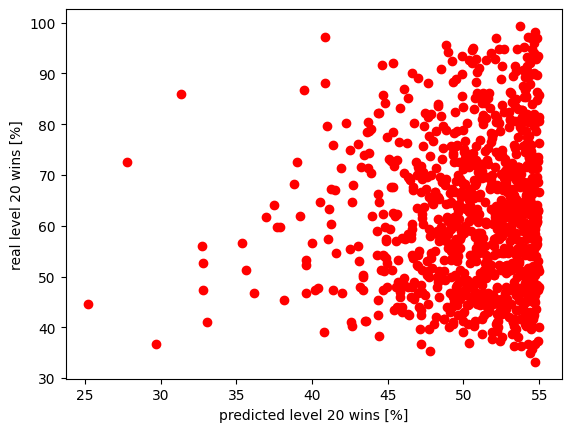

In [20]:
xreal1=np.load('mcx_v1_all.npy')
xreal2=np.load('mcx_v2_all.npy')
xreal3=np.load('mcx_v3_all.npy')
xpred1=np.load('pred_xgb_sel1.npy')
plt.plot(xpred1[0:20],np.mean(xreal1[40,:,:],1),'o',color='red') 
plt.plot(xpred1[20:340],np.mean(xreal2[40,:,:],1),'o',color='red') 
plt.plot(xpred1[340:950],np.mean(xreal3[40,:,:],1),'o',color='red') 
#plt.legend(loc="best")
#plt.xscale("log")
plt.xlabel("predicted level 20 wins [%]")
plt.ylabel("real level 20 wins [%]")
print(np.mean(np.mean(xreal2[40,:,:],1)))
print(np.meean(np.mean(xreal3[40,:,:],1)))
print(np.mean(xreal3[40,:,:],0))
#later compare with best input model is no 3 and see whether it improves, likely  not 

Better than randomly created model, but many are much worse than the input minimum limit of 55 %.

Not perfect but currently competeive relative to current gradient fit. 
First I combine teh different files to one file

In [2]:
#first combining the data 
xreal1=np.load('mcx_v1_all.npy')
xreal2=np.load('mcx_v2_all.npy')
xreal3=np.load('mcx_v3_all.npy')
#now also using past MC results
allres3=np.load("mc_v10_all.npy")
xcomb=np.zeros((xreal1.shape[0],xreal1.shape[1]+xreal2.shape[1]+xreal3.shape[1]+allres3.shape[1],xreal1.shape[2]))
xcomb[0:xreal1.shape[0],0:xreal1.shape[1],0:xreal1.shape[2]]=xreal1
xcomb[0:xreal1.shape[0],xreal1.shape[1]:xreal1.shape[1]+xreal2.shape[1],:]=xreal2
xcomb[0:xreal1.shape[0],xreal1.shape[1]+xreal2.shape[1]:xcomb.shape[1]-allres3.shape[1],:]=xreal3
xcomb[0:xreal1.shape[0],xcomb.shape[1]-allres3.shape[1]:xcomb.shape[1],:]=allres3
print(xcomb.shape)

(41, 2440, 6)


Next I create a function to select a subset of win fractions, because cases which very high (and maybe also low)
win fraction are very likely not useful for prediction good performance in the intermediate range. 

Now I think that this is not likely the case and that it is better to have as many cases a s possible, at least the imput of the previous xgboost also. 

In [17]:
#function to select wanted range in win frac frac
#parameters, wins, minwin, max win
def select_range(params,wins,minwin=0,maxwin=100):
    selparams=np.zeros((params.shape[0],params.shape[1]))
    selwins=np.zeros((wins.shape[0]))
    c=0
    for i in range(wins.shape[0]):
        if wins[i]>=minwin and wins[i]<=maxwin:
            selparams[:,c]=params[:,i]
            selwins[c]=wins[i]
            c+=1
    print(f"{c} cases are selected")    
    if c>1:
        return c, selparams[:,0:c], selwins[0:c]
    elif c==1:
        return c, selparams[:,0], selwins[0]
    else:
        return c, None, None

Below I test the function, it works. 

In [18]:
wins=np.mean(xcomb[40,:,:],1)
counter,selparams,selwins=select_range(xcomb[19:38,:,0],wins,minwin=0, maxwin=36)
print(counter,selparams,selwins)

5 cases are selected
5 [[ 0.06051378  0.01446438 -0.07823119  0.05652669  0.03345928]
 [-0.08099198 -0.02513418 -0.09620433 -0.09949326 -0.0649838 ]
 [-0.00756875  0.04102343 -0.0261157   0.05101239 -0.04740906]
 [-0.08150234 -0.07861952 -0.08857845 -0.0568397   0.03284589]
 [ 0.03212867 -0.05575471 -0.04581249 -0.09390935 -0.09848006]
 [-0.0467518  -0.03877027 -0.0951464  -0.08658105 -0.00990031]
 [-0.08610763 -0.0844154   0.06215821  0.02954411 -0.08777794]
 [ 0.09463926  0.09080362  0.08810245  0.07237719  0.08453127]
 [ 0.03683613  0.04486931  0.08609717  0.04732282  0.03087901]
 [-0.04982119 -0.07169693 -0.0819886  -0.06607705 -0.07360663]
 [-0.02225386  0.00136612 -0.03447604 -0.00876107 -0.01752507]
 [-0.00208041  0.01212708 -0.02205159 -0.00710825 -0.00218252]
 [-0.0051615   0.05019413  0.08022847  0.01528186  0.08687649]
 [ 0.00923733  0.08390063  0.0746133   0.09636687 -0.04085799]
 [-0.05208318  0.07658006 -0.05516672  0.07491323  0.07350834]
 [ 0.04998931  0.08841981  0.058

Next I create function which does a number of fits (with different seeds) and uses that to select a best model. 

In [19]:
def random_xgboost(params,wins,train_size=0.67,random_start=1,random_stop=2,minwin=0,maxwin=100,max_depth_start=1,max_depth_stop=6,reg_start=1,reg_factor=1.414,reg_steps=10):
    #select wanted range
    counter,selparams,selwins=select_range(params,wins,minwin=minwin, maxwin=maxwin)
    #collect statistics
    xmodelstats_all=np.zeros((4,reg_steps,max_depth_stop-max_depth_start+1,random_stop-random_start+1))
    #loop over random indixes
    for i in range(random_start,random_stop+1):
        print(f"doing xgboost with seed {i}")
        feature_train,feature_test,target_train,target_test=train_test_split(selparams.T,selwins,train_size=train_size, shuffle=True, random_state=i)
        xmodelstats_single=loop_reg2(feature_train, target_train, feature_test, target_test,max_depth_start,max_depth_stop,reg_start,reg_factor,reg_steps,"dummy",save=False)
        print(xmodelstats_single.shape)
        xmodelstats_all[:,:,:,i-1]=xmodelstats_single
    #average over random realizations    
    xmodelstats_avg=np.mean(xmodelstats_all[:,:,:,:],3)
    return xmodelstats_avg

Below I test the function by applying on the data.

In [20]:
xmodel_avg1=random_xgboost(xcomb[19:38,:,0],wins,train_size=0.7,random_start=1,random_stop=8,minwin=0,maxwin=100,max_depth_start=1,max_depth_stop=11,reg_start=1,reg_factor=1.414,reg_steps=30)

2440 cases are selected
doing xgboost with seed 1
regularization doing case 0
xgb took 0.0672 seconds
standard deviation of test 19.2536 points
standard deviation of train 20.3056  points
standard deviation of prediction-test 10.4738 points
standard deviation of prediction-train 9.3209 points
xgb took 0.0701 seconds
standard deviation of test 19.2536 points
standard deviation of train 20.3056  points
standard deviation of prediction-test 8.7288 points
standard deviation of prediction-train 6.1139 points
xgb took 0.1141 seconds
standard deviation of test 19.2536 points
standard deviation of train 20.3056  points
standard deviation of prediction-test 7.7218 points
standard deviation of prediction-train 3.7922 points
xgb took 0.1326 seconds
standard deviation of test 19.2536 points
standard deviation of train 20.3056  points
standard deviation of prediction-test 7.5563 points
standard deviation of prediction-train 2.1016 points
xgb took 0.2414 seconds
standard deviation of test 19.2536 po

xgb took 0.2238 seconds
standard deviation of test 19.2536 points
standard deviation of train 20.3056  points
standard deviation of prediction-test 7.1375 points
standard deviation of prediction-train 0.2952 points
xgb took 0.2407 seconds
standard deviation of test 19.2536 points
standard deviation of train 20.3056  points
standard deviation of prediction-test 7.2119 points
standard deviation of prediction-train 0.1596 points
xgb took 0.2484 seconds
standard deviation of test 19.2536 points
standard deviation of train 20.3056  points
standard deviation of prediction-test 7.3972 points
standard deviation of prediction-train 0.127 points
xgb took 0.3807 seconds
standard deviation of test 19.2536 points
standard deviation of train 20.3056  points
standard deviation of prediction-test 7.4932 points
standard deviation of prediction-train 0.1299 points
xgb took 0.2499 seconds
standard deviation of test 19.2536 points
standard deviation of train 20.3056  points
standard deviation of predictio

xgb took 0.2298 seconds
standard deviation of test 19.2536 points
standard deviation of train 20.3056  points
standard deviation of prediction-test 7.6554 points
standard deviation of prediction-train 0.281 points
regularization doing case 7
xgb took 0.0421 seconds
standard deviation of test 19.2536 points
standard deviation of train 20.3056  points
standard deviation of prediction-test 10.4353 points
standard deviation of prediction-train 9.3441 points
xgb took 0.0786 seconds
standard deviation of test 19.2536 points
standard deviation of train 20.3056  points
standard deviation of prediction-test 8.5673 points
standard deviation of prediction-train 6.1244 points
xgb took 0.1275 seconds
standard deviation of test 19.2536 points
standard deviation of train 20.3056  points
standard deviation of prediction-test 7.4528 points
standard deviation of prediction-train 3.6448 points
xgb took 0.1369 seconds
standard deviation of test 19.2536 points
standard deviation of train 20.3056  points
st

xgb took 0.187 seconds
standard deviation of test 19.2536 points
standard deviation of train 20.3056  points
standard deviation of prediction-test 7.1614 points
standard deviation of prediction-train 1.7426 points
xgb took 0.186 seconds
standard deviation of test 19.2536 points
standard deviation of train 20.3056  points
standard deviation of prediction-test 7.033 points
standard deviation of prediction-train 1.3238 points
xgb took 0.1854 seconds
standard deviation of test 19.2536 points
standard deviation of train 20.3056  points
standard deviation of prediction-test 7.5303 points
standard deviation of prediction-train 1.4269 points
xgb took 0.1888 seconds
standard deviation of test 19.2536 points
standard deviation of train 20.3056  points
standard deviation of prediction-test 7.4572 points
standard deviation of prediction-train 1.1842 points
xgb took 0.2065 seconds
standard deviation of test 19.2536 points
standard deviation of train 20.3056  points
standard deviation of prediction-

xgb took 0.1667 seconds
standard deviation of test 19.2536 points
standard deviation of train 20.3056  points
standard deviation of prediction-test 7.4247 points
standard deviation of prediction-train 2.4644 points
regularization doing case 14
xgb took 0.0423 seconds
standard deviation of test 19.2536 points
standard deviation of train 20.3056  points
standard deviation of prediction-test 10.346 points
standard deviation of prediction-train 9.5431 points
xgb took 0.071 seconds
standard deviation of test 19.2536 points
standard deviation of train 20.3056  points
standard deviation of prediction-test 8.4172 points
standard deviation of prediction-train 6.6651 points
xgb took 0.1075 seconds
standard deviation of test 19.2536 points
standard deviation of train 20.3056  points
standard deviation of prediction-test 7.7679 points
standard deviation of prediction-train 5.3854 points
xgb took 0.1013 seconds
standard deviation of test 19.2536 points
standard deviation of train 20.3056  points
st

xgb took 0.2715 seconds
standard deviation of test 19.2536 points
standard deviation of train 20.3056  points
standard deviation of prediction-test 8.2916 points
standard deviation of prediction-train 6.2759 points
xgb took 0.1383 seconds
standard deviation of test 19.2536 points
standard deviation of train 20.3056  points
standard deviation of prediction-test 8.3444 points
standard deviation of prediction-train 6.0929 points
xgb took 0.1348 seconds
standard deviation of test 19.2536 points
standard deviation of train 20.3056  points
standard deviation of prediction-test 8.4502 points
standard deviation of prediction-train 5.9939 points
xgb took 0.1193 seconds
standard deviation of test 19.2536 points
standard deviation of train 20.3056  points
standard deviation of prediction-test 8.3049 points
standard deviation of prediction-train 5.8073 points
xgb took 0.1519 seconds
standard deviation of test 19.2536 points
standard deviation of train 20.3056  points
standard deviation of predicti

xgb took 0.255 seconds
standard deviation of test 19.2536 points
standard deviation of train 20.3056  points
standard deviation of prediction-test 9.9337 points
standard deviation of prediction-train 8.4332 points
regularization doing case 21
xgb took 0.0846 seconds
standard deviation of test 19.2536 points
standard deviation of train 20.3056  points
standard deviation of prediction-test 10.8854 points
standard deviation of prediction-train 11.0268 points
xgb took 0.0764 seconds
standard deviation of test 19.2536 points
standard deviation of train 20.3056  points
standard deviation of prediction-test 10.5201 points
standard deviation of prediction-train 10.1193 points
xgb took 0.0844 seconds
standard deviation of test 19.2536 points
standard deviation of train 20.3056  points
standard deviation of prediction-test 10.4856 points
standard deviation of prediction-train 9.7591 points
xgb took 0.0858 seconds
standard deviation of test 19.2536 points
standard deviation of train 20.3056  poin

xgb took 0.1143 seconds
standard deviation of test 19.2536 points
standard deviation of train 20.3056  points
standard deviation of prediction-test 11.9317 points
standard deviation of prediction-train 11.8996 points
xgb took 0.0863 seconds
standard deviation of test 19.2536 points
standard deviation of train 20.3056  points
standard deviation of prediction-test 11.9254 points
standard deviation of prediction-train 11.855 points
xgb took 0.0784 seconds
standard deviation of test 19.2536 points
standard deviation of train 20.3056  points
standard deviation of prediction-test 11.9396 points
standard deviation of prediction-train 11.8602 points
xgb took 0.0912 seconds
standard deviation of test 19.2536 points
standard deviation of train 20.3056  points
standard deviation of prediction-test 11.9306 points
standard deviation of prediction-train 11.8512 points
xgb took 0.08 seconds
standard deviation of test 19.2536 points
standard deviation of train 20.3056  points
standard deviation of pre

xgb took 0.0503 seconds
standard deviation of test 19.2536 points
standard deviation of train 20.3056  points
standard deviation of prediction-test 16.3116 points
standard deviation of prediction-train 17.276 points
xgb took 0.0488 seconds
standard deviation of test 19.2536 points
standard deviation of train 20.3056  points
standard deviation of prediction-test 16.2601 points
standard deviation of prediction-train 17.0713 points
xgb took 0.0545 seconds
standard deviation of test 19.2536 points
standard deviation of train 20.3056  points
standard deviation of prediction-test 16.1713 points
standard deviation of prediction-train 16.9972 points
xgb took 0.06 seconds
standard deviation of test 19.2536 points
standard deviation of train 20.3056  points
standard deviation of prediction-test 16.1718 points
standard deviation of prediction-train 16.97 points
xgb took 0.0678 seconds
standard deviation of test 19.2536 points
standard deviation of train 20.3056  points
standard deviation of predi

xgb took 0.24 seconds
standard deviation of test 20.1034 points
standard deviation of train 19.9708  points
standard deviation of prediction-test 7.2 points
standard deviation of prediction-train 0.2657 points
xgb took 0.2507 seconds
standard deviation of test 20.1034 points
standard deviation of train 19.9708  points
standard deviation of prediction-test 6.9636 points
standard deviation of prediction-train 0.107 points
xgb took 0.2878 seconds
standard deviation of test 20.1034 points
standard deviation of train 19.9708  points
standard deviation of prediction-test 7.1559 points
standard deviation of prediction-train 0.0716 points
xgb took 0.4886 seconds
standard deviation of test 20.1034 points
standard deviation of train 19.9708  points
standard deviation of prediction-test 7.1051 points
standard deviation of prediction-train 0.0679 points
xgb took 0.2603 seconds
standard deviation of test 20.1034 points
standard deviation of train 19.9708  points
standard deviation of prediction-tes

xgb took 0.4662 seconds
standard deviation of test 20.1034 points
standard deviation of train 19.9708  points
standard deviation of prediction-test 7.3048 points
standard deviation of prediction-train 0.1396 points
regularization doing case 5
xgb took 0.0464 seconds
standard deviation of test 20.1034 points
standard deviation of train 19.9708  points
standard deviation of prediction-test 10.3014 points
standard deviation of prediction-train 9.463 points
xgb took 0.1089 seconds
standard deviation of test 20.1034 points
standard deviation of train 19.9708  points
standard deviation of prediction-test 8.2491 points
standard deviation of prediction-train 5.765 points
xgb took 0.1118 seconds
standard deviation of test 20.1034 points
standard deviation of train 19.9708  points
standard deviation of prediction-test 7.622 points
standard deviation of prediction-train 3.5152 points
xgb took 0.1422 seconds
standard deviation of test 20.1034 points
standard deviation of train 19.9708  points
stan

xgb took 0.1873 seconds
standard deviation of test 20.1034 points
standard deviation of train 19.9708  points
standard deviation of prediction-test 7.245 points
standard deviation of prediction-train 1.129 points
xgb took 0.2197 seconds
standard deviation of test 20.1034 points
standard deviation of train 19.9708  points
standard deviation of prediction-test 7.5009 points
standard deviation of prediction-train 0.7988 points
xgb took 0.2055 seconds
standard deviation of test 20.1034 points
standard deviation of train 19.9708  points
standard deviation of prediction-test 7.3605 points
standard deviation of prediction-train 0.7246 points
xgb took 0.1951 seconds
standard deviation of test 20.1034 points
standard deviation of train 19.9708  points
standard deviation of prediction-test 7.5423 points
standard deviation of prediction-train 0.6968 points
xgb took 0.2148 seconds
standard deviation of test 20.1034 points
standard deviation of train 19.9708  points
standard deviation of prediction

xgb took 0.4633 seconds
standard deviation of test 20.1034 points
standard deviation of train 19.9708  points
standard deviation of prediction-test 7.4579 points
standard deviation of prediction-train 1.4343 points
xgb took 0.3224 seconds
standard deviation of test 20.1034 points
standard deviation of train 19.9708  points
standard deviation of prediction-test 7.4523 points
standard deviation of prediction-train 1.3716 points
regularization doing case 12
xgb took 0.0769 seconds
standard deviation of test 20.1034 points
standard deviation of train 19.9708  points
standard deviation of prediction-test 10.3515 points
standard deviation of prediction-train 9.5298 points
xgb took 0.1058 seconds
standard deviation of test 20.1034 points
standard deviation of train 19.9708  points
standard deviation of prediction-test 8.4098 points
standard deviation of prediction-train 6.2446 points
xgb took 0.1441 seconds
standard deviation of test 20.1034 points
standard deviation of train 19.9708  points


xgb took 0.1668 seconds
standard deviation of test 20.1034 points
standard deviation of train 19.9708  points
standard deviation of prediction-test 7.6254 points
standard deviation of prediction-train 4.6273 points
xgb took 0.1577 seconds
standard deviation of test 20.1034 points
standard deviation of train 19.9708  points
standard deviation of prediction-test 7.7229 points
standard deviation of prediction-train 4.4024 points
xgb took 0.1687 seconds
standard deviation of test 20.1034 points
standard deviation of train 19.9708  points
standard deviation of prediction-test 7.9745 points
standard deviation of prediction-train 4.2766 points
xgb took 0.1644 seconds
standard deviation of test 20.1034 points
standard deviation of train 19.9708  points
standard deviation of prediction-test 8.1566 points
standard deviation of prediction-train 4.1063 points
xgb took 0.2052 seconds
standard deviation of test 20.1034 points
standard deviation of train 19.9708  points
standard deviation of predicti

xgb took 0.1783 seconds
standard deviation of test 20.1034 points
standard deviation of train 19.9708  points
standard deviation of prediction-test 9.3819 points
standard deviation of prediction-train 6.5016 points
regularization doing case 19
xgb took 0.0599 seconds
standard deviation of test 20.1034 points
standard deviation of train 19.9708  points
standard deviation of prediction-test 10.8937 points
standard deviation of prediction-train 10.2397 points
xgb took 0.075 seconds
standard deviation of test 20.1034 points
standard deviation of train 19.9708  points
standard deviation of prediction-test 9.813 points
standard deviation of prediction-train 8.7702 points
xgb took 0.1153 seconds
standard deviation of test 20.1034 points
standard deviation of train 19.9708  points
standard deviation of prediction-test 9.7178 points
standard deviation of prediction-train 8.2699 points
xgb took 0.092 seconds
standard deviation of test 20.1034 points
standard deviation of train 19.9708  points
st

xgb took 0.1574 seconds
standard deviation of test 20.1034 points
standard deviation of train 19.9708  points
standard deviation of prediction-test 11.6524 points
standard deviation of prediction-train 10.0449 points
xgb took 0.1897 seconds
standard deviation of test 20.1034 points
standard deviation of train 19.9708  points
standard deviation of prediction-test 11.6479 points
standard deviation of prediction-train 9.9851 points
xgb took 0.2566 seconds
standard deviation of test 20.1034 points
standard deviation of train 19.9708  points
standard deviation of prediction-test 11.8826 points
standard deviation of prediction-train 10.2291 points
xgb took 0.1572 seconds
standard deviation of test 20.1034 points
standard deviation of train 19.9708  points
standard deviation of prediction-test 11.9977 points
standard deviation of prediction-train 10.2808 points
xgb took 0.1464 seconds
standard deviation of test 20.1034 points
standard deviation of train 19.9708  points
standard deviation of p

xgb took 0.1406 seconds
standard deviation of test 20.1034 points
standard deviation of train 19.9708  points
standard deviation of prediction-test 13.7826 points
standard deviation of prediction-train 12.267 points
regularization doing case 26
xgb took 0.0623 seconds
standard deviation of test 20.1034 points
standard deviation of train 19.9708  points
standard deviation of prediction-test 14.2898 points
standard deviation of prediction-train 13.6862 points
xgb took 0.0732 seconds
standard deviation of test 20.1034 points
standard deviation of train 19.9708  points
standard deviation of prediction-test 14.2935 points
standard deviation of prediction-train 13.4448 points
xgb took 0.1009 seconds
standard deviation of test 20.1034 points
standard deviation of train 19.9708  points
standard deviation of prediction-test 14.3911 points
standard deviation of prediction-train 13.4261 points
xgb took 0.0915 seconds
standard deviation of test 20.1034 points
standard deviation of train 19.9708  p

xgb took 0.1476 seconds
standard deviation of test 20.1034 points
standard deviation of train 19.9708  points
standard deviation of prediction-test 19.4501 points
standard deviation of prediction-train 18.9379 points
xgb took 0.2528 seconds
standard deviation of test 20.1034 points
standard deviation of train 19.9708  points
standard deviation of prediction-test 19.4587 points
standard deviation of prediction-train 18.9393 points
xgb took 0.1122 seconds
standard deviation of test 20.1034 points
standard deviation of train 19.9708  points
standard deviation of prediction-test 19.459 points
standard deviation of prediction-train 18.9386 points
xgb took 0.1398 seconds
standard deviation of test 20.1034 points
standard deviation of train 19.9708  points
standard deviation of prediction-test 19.4595 points
standard deviation of prediction-train 18.9389 points
xgb took 0.1249 seconds
standard deviation of test 20.1034 points
standard deviation of train 19.9708  points
standard deviation of p

xgb took 0.4733 seconds
standard deviation of test 19.8518 points
standard deviation of train 20.074  points
standard deviation of prediction-test 6.9639 points
standard deviation of prediction-train 0.0822 points
xgb took 0.4287 seconds
standard deviation of test 19.8518 points
standard deviation of train 20.074  points
standard deviation of prediction-test 7.0683 points
standard deviation of prediction-train 0.0769 points
regularization doing case 3
xgb took 0.0653 seconds
standard deviation of test 19.8518 points
standard deviation of train 20.074  points
standard deviation of prediction-test 10.1781 points
standard deviation of prediction-train 9.5194 points
xgb took 0.167 seconds
standard deviation of test 19.8518 points
standard deviation of train 20.074  points
standard deviation of prediction-test 8.1123 points
standard deviation of prediction-train 6.137 points
xgb took 0.1649 seconds
standard deviation of test 19.8518 points
standard deviation of train 20.074  points
standard

xgb took 0.2676 seconds
standard deviation of test 19.8518 points
standard deviation of train 20.074  points
standard deviation of prediction-test 7.0167 points
standard deviation of prediction-train 1.9345 points
xgb took 0.2844 seconds
standard deviation of test 19.8518 points
standard deviation of train 20.074  points
standard deviation of prediction-test 6.9853 points
standard deviation of prediction-train 0.9372 points
xgb took 0.3466 seconds
standard deviation of test 19.8518 points
standard deviation of train 20.074  points
standard deviation of prediction-test 6.8396 points
standard deviation of prediction-train 0.4653 points
xgb took 0.3253 seconds
standard deviation of test 19.8518 points
standard deviation of train 20.074  points
standard deviation of prediction-test 6.7554 points
standard deviation of prediction-train 0.3962 points
xgb took 0.4014 seconds
standard deviation of test 19.8518 points
standard deviation of train 20.074  points
standard deviation of prediction-te

xgb took 0.3916 seconds
standard deviation of test 19.8518 points
standard deviation of train 20.074  points
standard deviation of prediction-test 6.959 points
standard deviation of prediction-train 0.7811 points
xgb took 0.3848 seconds
standard deviation of test 19.8518 points
standard deviation of train 20.074  points
standard deviation of prediction-test 7.1156 points
standard deviation of prediction-train 0.7548 points
xgb took 0.3637 seconds
standard deviation of test 19.8518 points
standard deviation of train 20.074  points
standard deviation of prediction-test 7.2949 points
standard deviation of prediction-train 0.78 points
regularization doing case 10
xgb took 0.067 seconds
standard deviation of test 19.8518 points
standard deviation of train 20.074  points
standard deviation of prediction-test 10.132 points
standard deviation of prediction-train 9.5798 points
xgb took 0.1175 seconds
standard deviation of test 19.8518 points
standard deviation of train 20.074  points
standard d

standard deviation of test 19.8518 points
standard deviation of train 20.074  points
standard deviation of prediction-test 7.0104 points
standard deviation of prediction-train 4.6964 points
xgb took 0.2574 seconds
standard deviation of test 19.8518 points
standard deviation of train 20.074  points
standard deviation of prediction-test 7.0085 points
standard deviation of prediction-train 3.8219 points
xgb took 0.2334 seconds
standard deviation of test 19.8518 points
standard deviation of train 20.074  points
standard deviation of prediction-test 6.6661 points
standard deviation of prediction-train 3.3314 points
xgb took 0.2428 seconds
standard deviation of test 19.8518 points
standard deviation of train 20.074  points
standard deviation of prediction-test 6.8238 points
standard deviation of prediction-train 3.0639 points
xgb took 0.2617 seconds
standard deviation of test 19.8518 points
standard deviation of train 20.074  points
standard deviation of prediction-test 6.84 points
standard 

xgb took 0.2005 seconds
standard deviation of test 19.8518 points
standard deviation of train 20.074  points
standard deviation of prediction-test 7.9071 points
standard deviation of prediction-train 4.7563 points
xgb took 0.1912 seconds
standard deviation of test 19.8518 points
standard deviation of train 20.074  points
standard deviation of prediction-test 8.0346 points
standard deviation of prediction-train 4.7749 points
xgb took 0.2162 seconds
standard deviation of test 19.8518 points
standard deviation of train 20.074  points
standard deviation of prediction-test 7.9436 points
standard deviation of prediction-train 4.6438 points
regularization doing case 17
xgb took 0.0864 seconds
standard deviation of test 19.8518 points
standard deviation of train 20.074  points
standard deviation of prediction-test 10.2466 points
standard deviation of prediction-train 9.9701 points
xgb took 0.1291 seconds
standard deviation of test 19.8518 points
standard deviation of train 20.074  points
stand

xgb took 0.144 seconds
standard deviation of test 19.8518 points
standard deviation of train 20.074  points
standard deviation of prediction-test 10.171 points
standard deviation of prediction-train 9.2311 points
xgb took 0.1038 seconds
standard deviation of test 19.8518 points
standard deviation of train 20.074  points
standard deviation of prediction-test 10.1928 points
standard deviation of prediction-train 9.0316 points
xgb took 0.1407 seconds
standard deviation of test 19.8518 points
standard deviation of train 20.074  points
standard deviation of prediction-test 9.9404 points
standard deviation of prediction-train 8.6228 points
xgb took 0.118 seconds
standard deviation of test 19.8518 points
standard deviation of train 20.074  points
standard deviation of prediction-test 9.9026 points
standard deviation of prediction-train 8.5568 points
xgb took 0.16 seconds
standard deviation of test 19.8518 points
standard deviation of train 20.074  points
standard deviation of prediction-test 

xgb took 0.1659 seconds
standard deviation of test 19.8518 points
standard deviation of train 20.074  points
standard deviation of prediction-test 12.2365 points
standard deviation of prediction-train 11.2759 points
xgb took 0.17 seconds
standard deviation of test 19.8518 points
standard deviation of train 20.074  points
standard deviation of prediction-test 12.2405 points
standard deviation of prediction-train 11.2793 points
xgb took 0.2029 seconds
standard deviation of test 19.8518 points
standard deviation of train 20.074  points
standard deviation of prediction-test 12.2349 points
standard deviation of prediction-train 11.2749 points
xgb took 0.1747 seconds
standard deviation of test 19.8518 points
standard deviation of train 20.074  points
standard deviation of prediction-test 12.2345 points
standard deviation of prediction-train 11.2751 points
regularization doing case 24
xgb took 0.0918 seconds
standard deviation of test 19.8518 points
standard deviation of train 20.074  points


xgb took 0.108 seconds
standard deviation of test 19.8518 points
standard deviation of train 20.074  points
standard deviation of prediction-test 15.4108 points
standard deviation of prediction-train 14.9059 points
xgb took 0.1253 seconds
standard deviation of test 19.8518 points
standard deviation of train 20.074  points
standard deviation of prediction-test 15.3987 points
standard deviation of prediction-train 14.8005 points
xgb took 0.1509 seconds
standard deviation of test 19.8518 points
standard deviation of train 20.074  points
standard deviation of prediction-test 15.4374 points
standard deviation of prediction-train 14.8639 points
xgb took 0.1429 seconds
standard deviation of test 19.8518 points
standard deviation of train 20.074  points
standard deviation of prediction-test 15.4608 points
standard deviation of prediction-train 14.8488 points
xgb took 0.1296 seconds
standard deviation of test 19.8518 points
standard deviation of train 20.074  points
standard deviation of predic

xgb took 0.421 seconds
standard deviation of test 19.9296 points
standard deviation of train 20.0489  points
standard deviation of prediction-test 6.8827 points
standard deviation of prediction-train 0.0859 points
xgb took 0.4437 seconds
standard deviation of test 19.9296 points
standard deviation of train 20.0489  points
standard deviation of prediction-test 6.9188 points
standard deviation of prediction-train 0.0526 points
xgb took 0.4423 seconds
standard deviation of test 19.9296 points
standard deviation of train 20.0489  points
standard deviation of prediction-test 6.8518 points
standard deviation of prediction-train 0.047 points
xgb took 0.4215 seconds
standard deviation of test 19.9296 points
standard deviation of train 20.0489  points
standard deviation of prediction-test 7.2151 points
standard deviation of prediction-train 0.0436 points
xgb took 0.4565 seconds
standard deviation of test 19.9296 points
standard deviation of train 20.0489  points
standard deviation of prediction

xgb took 0.3971 seconds
standard deviation of test 19.9296 points
standard deviation of train 20.0489  points
standard deviation of prediction-test 10.2515 points
standard deviation of prediction-train 9.5003 points
xgb took 0.4734 seconds
standard deviation of test 19.9296 points
standard deviation of train 20.0489  points
standard deviation of prediction-test 8.2992 points
standard deviation of prediction-train 5.9566 points
xgb took 0.7908 seconds
standard deviation of test 19.9296 points
standard deviation of train 20.0489  points
standard deviation of prediction-test 7.5352 points
standard deviation of prediction-train 3.8092 points
xgb took 0.9092 seconds
standard deviation of test 19.9296 points
standard deviation of train 20.0489  points
standard deviation of prediction-test 7.1333 points
standard deviation of prediction-train 1.9256 points
xgb took 1.5311 seconds
standard deviation of test 19.9296 points
standard deviation of train 20.0489  points
standard deviation of predict

xgb took 0.3491 seconds
standard deviation of test 19.9296 points
standard deviation of train 20.0489  points
standard deviation of prediction-test 7.1282 points
standard deviation of prediction-train 0.6118 points
xgb took 0.3617 seconds
standard deviation of test 19.9296 points
standard deviation of train 20.0489  points
standard deviation of prediction-test 6.7391 points
standard deviation of prediction-train 0.5575 points
xgb took 0.3091 seconds
standard deviation of test 19.9296 points
standard deviation of train 20.0489  points
standard deviation of prediction-test 7.0901 points
standard deviation of prediction-train 0.5289 points
xgb took 0.3458 seconds
standard deviation of test 19.9296 points
standard deviation of train 20.0489  points
standard deviation of prediction-test 7.151 points
standard deviation of prediction-train 0.4547 points
xgb took 0.3598 seconds
standard deviation of test 19.9296 points
standard deviation of train 20.0489  points
standard deviation of predictio

xgb took 0.3487 seconds
standard deviation of test 19.9296 points
standard deviation of train 20.0489  points
standard deviation of prediction-test 7.3238 points
standard deviation of prediction-train 1.0039 points
regularization doing case 11
xgb took 0.0729 seconds
standard deviation of test 19.9296 points
standard deviation of train 20.0489  points
standard deviation of prediction-test 10.1889 points
standard deviation of prediction-train 9.5785 points
xgb took 0.1448 seconds
standard deviation of test 19.9296 points
standard deviation of train 20.0489  points
standard deviation of prediction-test 8.188 points
standard deviation of prediction-train 6.3148 points
xgb took 0.2304 seconds
standard deviation of test 19.9296 points
standard deviation of train 20.0489  points
standard deviation of prediction-test 7.2577 points
standard deviation of prediction-train 4.0853 points
xgb took 0.4936 seconds
standard deviation of test 19.9296 points
standard deviation of train 20.0489  points
s

xgb took 0.2013 seconds
standard deviation of test 19.9296 points
standard deviation of train 20.0489  points
standard deviation of prediction-test 7.2173 points
standard deviation of prediction-train 3.8832 points
xgb took 0.1636 seconds
standard deviation of test 19.9296 points
standard deviation of train 20.0489  points
standard deviation of prediction-test 7.4195 points
standard deviation of prediction-train 3.8756 points
xgb took 0.217 seconds
standard deviation of test 19.9296 points
standard deviation of train 20.0489  points
standard deviation of prediction-test 7.6676 points
standard deviation of prediction-train 3.4192 points
xgb took 0.2162 seconds
standard deviation of test 19.9296 points
standard deviation of train 20.0489  points
standard deviation of prediction-test 7.6778 points
standard deviation of prediction-train 3.4233 points
xgb took 0.2153 seconds
standard deviation of test 19.9296 points
standard deviation of train 20.0489  points
standard deviation of predictio

xgb took 0.2031 seconds
standard deviation of test 19.9296 points
standard deviation of train 20.0489  points
standard deviation of prediction-test 8.6913 points
standard deviation of prediction-train 5.4946 points
regularization doing case 18
xgb took 0.0653 seconds
standard deviation of test 19.9296 points
standard deviation of train 20.0489  points
standard deviation of prediction-test 10.368 points
standard deviation of prediction-train 10.1514 points
xgb took 0.0855 seconds
standard deviation of test 19.9296 points
standard deviation of train 20.0489  points
standard deviation of prediction-test 8.9841 points
standard deviation of prediction-train 8.3605 points
xgb took 0.1142 seconds
standard deviation of test 19.9296 points
standard deviation of train 20.0489  points
standard deviation of prediction-test 8.8633 points
standard deviation of prediction-train 7.7206 points
xgb took 0.1144 seconds
standard deviation of test 19.9296 points
standard deviation of train 20.0489  points


xgb took 0.13 seconds
standard deviation of test 19.9296 points
standard deviation of train 20.0489  points
standard deviation of prediction-test 10.6419 points
standard deviation of prediction-train 9.3903 points
xgb took 0.129 seconds
standard deviation of test 19.9296 points
standard deviation of train 20.0489  points
standard deviation of prediction-test 10.6886 points
standard deviation of prediction-train 9.3827 points
xgb took 0.145 seconds
standard deviation of test 19.9296 points
standard deviation of train 20.0489  points
standard deviation of prediction-test 10.664 points
standard deviation of prediction-train 9.3083 points
xgb took 0.1301 seconds
standard deviation of test 19.9296 points
standard deviation of train 20.0489  points
standard deviation of prediction-test 10.7614 points
standard deviation of prediction-train 9.3136 points
xgb took 0.1549 seconds
standard deviation of test 19.9296 points
standard deviation of train 20.0489  points
standard deviation of predictio

xgb took 0.1444 seconds
standard deviation of test 19.9296 points
standard deviation of train 20.0489  points
standard deviation of prediction-test 12.8202 points
standard deviation of prediction-train 11.7807 points
regularization doing case 25
xgb took 0.0715 seconds
standard deviation of test 19.9296 points
standard deviation of train 20.0489  points
standard deviation of prediction-test 13.3476 points
standard deviation of prediction-train 12.8984 points
xgb took 0.0845 seconds
standard deviation of test 19.9296 points
standard deviation of train 20.0489  points
standard deviation of prediction-test 13.2632 points
standard deviation of prediction-train 12.6471 points
xgb took 0.1137 seconds
standard deviation of test 19.9296 points
standard deviation of train 20.0489  points
standard deviation of prediction-test 13.4592 points
standard deviation of prediction-train 12.6144 points
xgb took 0.1395 seconds
standard deviation of test 19.9296 points
standard deviation of train 20.0489  

xgb took 0.1536 seconds
standard deviation of test 19.9296 points
standard deviation of train 20.0489  points
standard deviation of prediction-test 17.1698 points
standard deviation of prediction-train 16.6436 points
xgb took 0.1657 seconds
standard deviation of test 19.9296 points
standard deviation of train 20.0489  points
standard deviation of prediction-test 17.1812 points
standard deviation of prediction-train 16.6463 points
xgb took 0.1885 seconds
standard deviation of test 19.9296 points
standard deviation of train 20.0489  points
standard deviation of prediction-test 17.1959 points
standard deviation of prediction-train 16.6358 points
xgb took 0.1661 seconds
standard deviation of test 19.9296 points
standard deviation of train 20.0489  points
standard deviation of prediction-test 17.1964 points
standard deviation of prediction-train 16.6357 points
xgb took 0.2486 seconds
standard deviation of test 19.9296 points
standard deviation of train 20.0489  points
standard deviation of 

xgb took 0.5231 seconds
standard deviation of test 20.0919 points
standard deviation of train 19.9758  points
standard deviation of prediction-test 7.2494 points
standard deviation of prediction-train 0.0557 points
xgb took 0.4928 seconds
standard deviation of test 20.0919 points
standard deviation of train 19.9758  points
standard deviation of prediction-test 7.4628 points
standard deviation of prediction-train 0.063 points
regularization doing case 2
xgb took 0.0834 seconds
standard deviation of test 20.0919 points
standard deviation of train 19.9758  points
standard deviation of prediction-test 10.1733 points
standard deviation of prediction-train 9.5156 points
xgb took 0.1508 seconds
standard deviation of test 20.0919 points
standard deviation of train 19.9758  points
standard deviation of prediction-test 8.4783 points
standard deviation of prediction-train 6.1497 points
xgb took 0.1958 seconds
standard deviation of test 20.0919 points
standard deviation of train 19.9758  points
st

xgb took 0.2652 seconds
standard deviation of test 20.0919 points
standard deviation of train 19.9758  points
standard deviation of prediction-test 7.1311 points
standard deviation of prediction-train 1.8837 points
xgb took 0.3289 seconds
standard deviation of test 20.0919 points
standard deviation of train 19.9758  points
standard deviation of prediction-test 7.0596 points
standard deviation of prediction-train 0.9195 points
xgb took 0.4031 seconds
standard deviation of test 20.0919 points
standard deviation of train 19.9758  points
standard deviation of prediction-test 6.9709 points
standard deviation of prediction-train 0.3961 points
xgb took 0.4502 seconds
standard deviation of test 20.0919 points
standard deviation of train 19.9758  points
standard deviation of prediction-test 7.3311 points
standard deviation of prediction-train 0.2728 points
xgb took 0.446 seconds
standard deviation of test 20.0919 points
standard deviation of train 19.9758  points
standard deviation of predictio

xgb took 0.3176 seconds
standard deviation of test 20.0919 points
standard deviation of train 19.9758  points
standard deviation of prediction-test 7.3938 points
standard deviation of prediction-train 0.5769 points
xgb took 0.3278 seconds
standard deviation of test 20.0919 points
standard deviation of train 19.9758  points
standard deviation of prediction-test 7.5294 points
standard deviation of prediction-train 0.5634 points
xgb took 0.3193 seconds
standard deviation of test 20.0919 points
standard deviation of train 19.9758  points
standard deviation of prediction-test 7.5003 points
standard deviation of prediction-train 0.5378 points
regularization doing case 9
xgb took 0.0662 seconds
standard deviation of test 20.0919 points
standard deviation of train 19.9758  points
standard deviation of prediction-test 10.153 points
standard deviation of prediction-train 9.5655 points
xgb took 0.1087 seconds
standard deviation of test 20.0919 points
standard deviation of train 19.9758  points
st

xgb took 0.1632 seconds
standard deviation of test 20.0919 points
standard deviation of train 19.9758  points
standard deviation of prediction-test 7.0733 points
standard deviation of prediction-train 4.2848 points
xgb took 0.1958 seconds
standard deviation of test 20.0919 points
standard deviation of train 19.9758  points
standard deviation of prediction-test 6.9623 points
standard deviation of prediction-train 3.1644 points
xgb took 0.2064 seconds
standard deviation of test 20.0919 points
standard deviation of train 19.9758  points
standard deviation of prediction-test 7.1018 points
standard deviation of prediction-train 2.6629 points
xgb took 0.2226 seconds
standard deviation of test 20.0919 points
standard deviation of train 19.9758  points
standard deviation of prediction-test 6.7587 points
standard deviation of prediction-train 2.2703 points
xgb took 0.2242 seconds
standard deviation of test 20.0919 points
standard deviation of train 19.9758  points
standard deviation of predicti

xgb took 0.1889 seconds
standard deviation of test 20.0919 points
standard deviation of train 19.9758  points
standard deviation of prediction-test 7.8884 points
standard deviation of prediction-train 4.0606 points
xgb took 0.1995 seconds
standard deviation of test 20.0919 points
standard deviation of train 19.9758  points
standard deviation of prediction-test 8.0311 points
standard deviation of prediction-train 3.9335 points
xgb took 0.2039 seconds
standard deviation of test 20.0919 points
standard deviation of train 19.9758  points
standard deviation of prediction-test 8.0835 points
standard deviation of prediction-train 3.8319 points
regularization doing case 16
xgb took 0.0653 seconds
standard deviation of test 20.0919 points
standard deviation of train 19.9758  points
standard deviation of prediction-test 10.2253 points
standard deviation of prediction-train 9.8517 points
xgb took 0.0924 seconds
standard deviation of test 20.0919 points
standard deviation of train 19.9758  points


xgb took 0.1 seconds
standard deviation of test 20.0919 points
standard deviation of train 19.9758  points
standard deviation of prediction-test 9.5666 points
standard deviation of prediction-train 8.3386 points
xgb took 0.1083 seconds
standard deviation of test 20.0919 points
standard deviation of train 19.9758  points
standard deviation of prediction-test 9.4193 points
standard deviation of prediction-train 8.0869 points
xgb took 0.118 seconds
standard deviation of test 20.0919 points
standard deviation of train 19.9758  points
standard deviation of prediction-test 9.3461 points
standard deviation of prediction-train 7.74 points
xgb took 0.1167 seconds
standard deviation of test 20.0919 points
standard deviation of train 19.9758  points
standard deviation of prediction-test 9.2396 points
standard deviation of prediction-train 7.6638 points
xgb took 0.1314 seconds
standard deviation of test 20.0919 points
standard deviation of train 19.9758  points
standard deviation of prediction-tes

xgb took 0.1341 seconds
standard deviation of test 20.0919 points
standard deviation of train 19.9758  points
standard deviation of prediction-test 11.646 points
standard deviation of prediction-train 10.1547 points
xgb took 0.1393 seconds
standard deviation of test 20.0919 points
standard deviation of train 19.9758  points
standard deviation of prediction-test 11.662 points
standard deviation of prediction-train 10.1166 points
xgb took 0.1451 seconds
standard deviation of test 20.0919 points
standard deviation of train 19.9758  points
standard deviation of prediction-test 11.6648 points
standard deviation of prediction-train 10.1095 points
regularization doing case 23
xgb took 0.0656 seconds
standard deviation of test 20.0919 points
standard deviation of train 19.9758  points
standard deviation of prediction-test 11.9571 points
standard deviation of prediction-train 11.5581 points
xgb took 0.091 seconds
standard deviation of test 20.0919 points
standard deviation of train 19.9758  poi

xgb took 0.094 seconds
standard deviation of test 20.0919 points
standard deviation of train 19.9758  points
standard deviation of prediction-test 14.0572 points
standard deviation of prediction-train 13.3604 points
xgb took 0.0969 seconds
standard deviation of test 20.0919 points
standard deviation of train 19.9758  points
standard deviation of prediction-test 14.0951 points
standard deviation of prediction-train 13.3631 points
xgb took 0.1074 seconds
standard deviation of test 20.0919 points
standard deviation of train 19.9758  points
standard deviation of prediction-test 14.0863 points
standard deviation of prediction-train 13.3513 points
xgb took 0.1053 seconds
standard deviation of test 20.0919 points
standard deviation of train 19.9758  points
standard deviation of prediction-test 14.0957 points
standard deviation of prediction-train 13.3497 points
xgb took 0.1097 seconds
standard deviation of test 20.0919 points
standard deviation of train 19.9758  points
standard deviation of p

xgb took 0.1162 seconds
standard deviation of test 20.0919 points
standard deviation of train 19.9758  points
standard deviation of prediction-test 19.4056 points
standard deviation of prediction-train 19.0577 points
xgb took 0.1087 seconds
standard deviation of test 20.0919 points
standard deviation of train 19.9758  points
standard deviation of prediction-test 19.4057 points
standard deviation of prediction-train 19.058 points
xgb took 0.1136 seconds
standard deviation of test 20.0919 points
standard deviation of train 19.9758  points
standard deviation of prediction-test 19.4057 points
standard deviation of prediction-train 19.058 points
(4, 30, 11)
doing xgboost with seed 6
regularization doing case 0
xgb took 0.0664 seconds
standard deviation of test 19.4566 points
standard deviation of train 20.2399  points
standard deviation of prediction-test 10.0965 points
standard deviation of prediction-train 9.4906 points
xgb took 0.1097 seconds
standard deviation of test 19.4566 points
sta

xgb took 0.2135 seconds
standard deviation of test 19.4566 points
standard deviation of train 20.2399  points
standard deviation of prediction-test 7.6171 points
standard deviation of prediction-train 1.9897 points
xgb took 0.2654 seconds
standard deviation of test 19.4566 points
standard deviation of train 20.2399  points
standard deviation of prediction-test 7.6331 points
standard deviation of prediction-train 0.8271 points
xgb took 0.3191 seconds
standard deviation of test 19.4566 points
standard deviation of train 20.2399  points
standard deviation of prediction-test 7.5361 points
standard deviation of prediction-train 0.3147 points
xgb took 0.3812 seconds
standard deviation of test 19.4566 points
standard deviation of train 20.2399  points
standard deviation of prediction-test 7.4276 points
standard deviation of prediction-train 0.1621 points
xgb took 0.3726 seconds
standard deviation of test 19.4566 points
standard deviation of train 20.2399  points
standard deviation of predicti

xgb took 0.3252 seconds
standard deviation of test 19.4566 points
standard deviation of train 20.2399  points
standard deviation of prediction-test 8.0364 points
standard deviation of prediction-train 0.3321 points
xgb took 0.3337 seconds
standard deviation of test 19.4566 points
standard deviation of train 20.2399  points
standard deviation of prediction-test 7.9433 points
standard deviation of prediction-train 0.3005 points
xgb took 0.3795 seconds
standard deviation of test 19.4566 points
standard deviation of train 20.2399  points
standard deviation of prediction-test 7.9805 points
standard deviation of prediction-train 0.265 points
regularization doing case 7
xgb took 0.0668 seconds
standard deviation of test 19.4566 points
standard deviation of train 20.2399  points
standard deviation of prediction-test 10.0652 points
standard deviation of prediction-train 9.5075 points
xgb took 0.1105 seconds
standard deviation of test 19.4566 points
standard deviation of train 20.2399  points
st

xgb took 0.1626 seconds
standard deviation of test 19.4566 points
standard deviation of train 20.2399  points
standard deviation of prediction-test 7.5299 points
standard deviation of prediction-train 4.0066 points
xgb took 0.2132 seconds
standard deviation of test 19.4566 points
standard deviation of train 20.2399  points
standard deviation of prediction-test 7.1259 points
standard deviation of prediction-train 2.4326 points
xgb took 0.2436 seconds
standard deviation of test 19.4566 points
standard deviation of train 20.2399  points
standard deviation of prediction-test 7.2397 points
standard deviation of prediction-train 1.7346 points
xgb took 0.234 seconds
standard deviation of test 19.4566 points
standard deviation of train 20.2399  points
standard deviation of prediction-test 7.6434 points
standard deviation of prediction-train 1.5096 points
xgb took 0.2411 seconds
standard deviation of test 19.4566 points
standard deviation of train 20.2399  points
standard deviation of predictio

xgb took 0.2228 seconds
standard deviation of test 19.4566 points
standard deviation of train 20.2399  points
standard deviation of prediction-test 7.6675 points
standard deviation of prediction-train 2.4506 points
xgb took 0.2188 seconds
standard deviation of test 19.4566 points
standard deviation of train 20.2399  points
standard deviation of prediction-test 7.8169 points
standard deviation of prediction-train 2.4166 points
xgb took 0.22 seconds
standard deviation of test 19.4566 points
standard deviation of train 20.2399  points
standard deviation of prediction-test 7.8408 points
standard deviation of prediction-train 2.4005 points
xgb took 0.2361 seconds
standard deviation of test 19.4566 points
standard deviation of train 20.2399  points
standard deviation of prediction-test 7.7222 points
standard deviation of prediction-train 2.3762 points
regularization doing case 14
xgb took 0.0651 seconds
standard deviation of test 19.4566 points
standard deviation of train 20.2399  points
sta

xgb took 0.1074 seconds
standard deviation of test 19.4566 points
standard deviation of train 20.2399  points
standard deviation of prediction-test 8.708 points
standard deviation of prediction-train 7.1186 points
xgb took 0.1113 seconds
standard deviation of test 19.4566 points
standard deviation of train 20.2399  points
standard deviation of prediction-test 8.5354 points
standard deviation of prediction-train 6.5957 points
xgb took 0.1226 seconds
standard deviation of test 19.4566 points
standard deviation of train 20.2399  points
standard deviation of prediction-test 8.5428 points
standard deviation of prediction-train 6.4299 points
xgb took 0.1327 seconds
standard deviation of test 19.4566 points
standard deviation of train 20.2399  points
standard deviation of prediction-test 8.5888 points
standard deviation of prediction-train 6.2172 points
xgb took 0.1403 seconds
standard deviation of test 19.4566 points
standard deviation of train 20.2399  points
standard deviation of predictio

xgb took 0.1386 seconds
standard deviation of test 19.4566 points
standard deviation of train 20.2399  points
standard deviation of prediction-test 10.299 points
standard deviation of prediction-train 8.4801 points
xgb took 0.1358 seconds
standard deviation of test 19.4566 points
standard deviation of train 20.2399  points
standard deviation of prediction-test 10.3493 points
standard deviation of prediction-train 8.4836 points
xgb took 0.148 seconds
standard deviation of test 19.4566 points
standard deviation of train 20.2399  points
standard deviation of prediction-test 10.3908 points
standard deviation of prediction-train 8.4772 points
regularization doing case 21
xgb took 0.0655 seconds
standard deviation of test 19.4566 points
standard deviation of train 20.2399  points
standard deviation of prediction-test 10.8876 points
standard deviation of prediction-train 11.0622 points
xgb took 0.0801 seconds
standard deviation of test 19.4566 points
standard deviation of train 20.2399  point

xgb took 0.0897 seconds
standard deviation of test 19.4566 points
standard deviation of train 20.2399  points
standard deviation of prediction-test 12.5333 points
standard deviation of prediction-train 11.8131 points
xgb took 0.0923 seconds
standard deviation of test 19.4566 points
standard deviation of train 20.2399  points
standard deviation of prediction-test 12.5742 points
standard deviation of prediction-train 11.7729 points
xgb took 0.1081 seconds
standard deviation of test 19.4566 points
standard deviation of train 20.2399  points
standard deviation of prediction-test 12.6506 points
standard deviation of prediction-train 11.749 points
xgb took 0.1111 seconds
standard deviation of test 19.4566 points
standard deviation of train 20.2399  points
standard deviation of prediction-test 12.7126 points
standard deviation of prediction-train 11.7441 points
xgb took 0.1167 seconds
standard deviation of test 19.4566 points
standard deviation of train 20.2399  points
standard deviation of p

xgb took 0.1119 seconds
standard deviation of test 19.4566 points
standard deviation of train 20.2399  points
standard deviation of prediction-test 14.84 points
standard deviation of prediction-train 14.8603 points
xgb took 0.1106 seconds
standard deviation of test 19.4566 points
standard deviation of train 20.2399  points
standard deviation of prediction-test 14.84 points
standard deviation of prediction-train 14.8603 points
xgb took 0.1228 seconds
standard deviation of test 19.4566 points
standard deviation of train 20.2399  points
standard deviation of prediction-test 14.84 points
standard deviation of prediction-train 14.8603 points
regularization doing case 28
xgb took 0.0658 seconds
standard deviation of test 19.4566 points
standard deviation of train 20.2399  points
standard deviation of prediction-test 16.4712 points
standard deviation of prediction-train 17.092 points
xgb took 0.0771 seconds
standard deviation of test 19.4566 points
standard deviation of train 20.2399  points


xgb took 0.1603 seconds
standard deviation of test 20.2567 points
standard deviation of train 19.9088  points
standard deviation of prediction-test 7.3881 points
standard deviation of prediction-train 3.6403 points
xgb took 0.2124 seconds
standard deviation of test 20.2567 points
standard deviation of train 19.9088  points
standard deviation of prediction-test 7.0686 points
standard deviation of prediction-train 1.9417 points
xgb took 0.2781 seconds
standard deviation of test 20.2567 points
standard deviation of train 19.9088  points
standard deviation of prediction-test 7.1939 points
standard deviation of prediction-train 0.8399 points
xgb took 0.3116 seconds
standard deviation of test 20.2567 points
standard deviation of train 19.9088  points
standard deviation of prediction-test 7.0763 points
standard deviation of prediction-train 0.2903 points
xgb took 0.3695 seconds
standard deviation of test 20.2567 points
standard deviation of train 19.9088  points
standard deviation of predicti

xgb took 0.3475 seconds
standard deviation of test 20.2567 points
standard deviation of train 19.9088  points
standard deviation of prediction-test 7.1108 points
standard deviation of prediction-train 0.1761 points
xgb took 0.3639 seconds
standard deviation of test 20.2567 points
standard deviation of train 19.9088  points
standard deviation of prediction-test 7.1648 points
standard deviation of prediction-train 0.1619 points
xgb took 0.3326 seconds
standard deviation of test 20.2567 points
standard deviation of train 19.9088  points
standard deviation of prediction-test 7.5167 points
standard deviation of prediction-train 0.1668 points
xgb took 0.368 seconds
standard deviation of test 20.2567 points
standard deviation of train 19.9088  points
standard deviation of prediction-test 7.5076 points
standard deviation of prediction-train 0.1448 points
regularization doing case 5
xgb took 0.0656 seconds
standard deviation of test 20.2567 points
standard deviation of train 19.9088  points
sta

xgb took 0.1426 seconds
standard deviation of test 20.2567 points
standard deviation of train 19.9088  points
standard deviation of prediction-test 8.0788 points
standard deviation of prediction-train 6.0529 points
xgb took 0.1724 seconds
standard deviation of test 20.2567 points
standard deviation of train 19.9088  points
standard deviation of prediction-test 7.3747 points
standard deviation of prediction-train 3.7038 points
xgb took 0.2713 seconds
standard deviation of test 20.2567 points
standard deviation of train 19.9088  points
standard deviation of prediction-test 7.4182 points
standard deviation of prediction-train 2.1331 points
xgb took 0.2879 seconds
standard deviation of test 20.2567 points
standard deviation of train 19.9088  points
standard deviation of prediction-test 7.2817 points
standard deviation of prediction-train 1.1571 points
xgb took 0.4168 seconds
standard deviation of test 20.2567 points
standard deviation of train 19.9088  points
standard deviation of predicti

xgb took 0.2533 seconds
standard deviation of test 20.2567 points
standard deviation of train 19.9088  points
standard deviation of prediction-test 7.5187 points
standard deviation of prediction-train 1.6718 points
xgb took 0.2682 seconds
standard deviation of test 20.2567 points
standard deviation of train 19.9088  points
standard deviation of prediction-test 7.4695 points
standard deviation of prediction-train 1.559 points
xgb took 0.2732 seconds
standard deviation of test 20.2567 points
standard deviation of train 19.9088  points
standard deviation of prediction-test 7.555 points
standard deviation of prediction-train 1.4589 points
xgb took 0.2793 seconds
standard deviation of test 20.2567 points
standard deviation of train 19.9088  points
standard deviation of prediction-test 7.637 points
standard deviation of prediction-train 1.3846 points
xgb took 0.3109 seconds
standard deviation of test 20.2567 points
standard deviation of train 19.9088  points
standard deviation of prediction-

xgb took 0.1359 seconds
standard deviation of test 20.2567 points
standard deviation of train 19.9088  points
standard deviation of prediction-test 8.0479 points
standard deviation of prediction-train 5.9411 points
xgb took 0.1418 seconds
standard deviation of test 20.2567 points
standard deviation of train 19.9088  points
standard deviation of prediction-test 7.9339 points
standard deviation of prediction-train 5.0668 points
xgb took 0.1735 seconds
standard deviation of test 20.2567 points
standard deviation of train 19.9088  points
standard deviation of prediction-test 8.0901 points
standard deviation of prediction-train 4.6166 points
xgb took 0.1652 seconds
standard deviation of test 20.2567 points
standard deviation of train 19.9088  points
standard deviation of prediction-test 8.4098 points
standard deviation of prediction-train 4.423 points
xgb took 0.1793 seconds
standard deviation of test 20.2567 points
standard deviation of train 19.9088  points
standard deviation of predictio

xgb took 0.1789 seconds
standard deviation of test 20.2567 points
standard deviation of train 19.9088  points
standard deviation of prediction-test 9.1987 points
standard deviation of prediction-train 6.6613 points
xgb took 0.1545 seconds
standard deviation of test 20.2567 points
standard deviation of train 19.9088  points
standard deviation of prediction-test 9.3709 points
standard deviation of prediction-train 6.7308 points
xgb took 0.1788 seconds
standard deviation of test 20.2567 points
standard deviation of train 19.9088  points
standard deviation of prediction-test 9.449 points
standard deviation of prediction-train 6.7718 points
regularization doing case 19
xgb took 0.0662 seconds
standard deviation of test 20.2567 points
standard deviation of train 19.9088  points
standard deviation of prediction-test 10.5523 points
standard deviation of prediction-train 10.4171 points
xgb took 0.0845 seconds
standard deviation of test 20.2567 points
standard deviation of train 19.9088  points


xgb took 0.1072 seconds
standard deviation of test 20.2567 points
standard deviation of train 19.9088  points
standard deviation of prediction-test 11.701 points
standard deviation of prediction-train 10.5461 points
xgb took 0.0965 seconds
standard deviation of test 20.2567 points
standard deviation of train 19.9088  points
standard deviation of prediction-test 11.7909 points
standard deviation of prediction-train 10.4511 points
xgb took 0.1233 seconds
standard deviation of test 20.2567 points
standard deviation of train 19.9088  points
standard deviation of prediction-test 11.6879 points
standard deviation of prediction-train 10.2224 points
xgb took 0.1101 seconds
standard deviation of test 20.2567 points
standard deviation of train 19.9088  points
standard deviation of prediction-test 11.9419 points
standard deviation of prediction-train 10.4582 points
xgb took 0.1287 seconds
standard deviation of test 20.2567 points
standard deviation of train 19.9088  points
standard deviation of p

xgb took 0.1357 seconds
standard deviation of test 20.2567 points
standard deviation of train 19.9088  points
standard deviation of prediction-test 13.685 points
standard deviation of prediction-train 12.4372 points
xgb took 0.1172 seconds
standard deviation of test 20.2567 points
standard deviation of train 19.9088  points
standard deviation of prediction-test 13.685 points
standard deviation of prediction-train 12.4372 points
xgb took 0.1349 seconds
standard deviation of test 20.2567 points
standard deviation of train 19.9088  points
standard deviation of prediction-test 13.685 points
standard deviation of prediction-train 12.4372 points
regularization doing case 26
xgb took 0.0656 seconds
standard deviation of test 20.2567 points
standard deviation of train 19.9088  points
standard deviation of prediction-test 14.177 points
standard deviation of prediction-train 13.8292 points
xgb took 0.0775 seconds
standard deviation of test 20.2567 points
standard deviation of train 19.9088  poin

xgb took 0.1207 seconds
standard deviation of test 20.2567 points
standard deviation of train 19.9088  points
standard deviation of prediction-test 19.5722 points
standard deviation of prediction-train 19.0582 points
xgb took 0.1031 seconds
standard deviation of test 20.2567 points
standard deviation of train 19.9088  points
standard deviation of prediction-test 19.5741 points
standard deviation of prediction-train 19.0575 points
xgb took 0.1186 seconds
standard deviation of test 20.2567 points
standard deviation of train 19.9088  points
standard deviation of prediction-test 19.5744 points
standard deviation of prediction-train 19.0575 points
xgb took 0.1056 seconds
standard deviation of test 20.2567 points
standard deviation of train 19.9088  points
standard deviation of prediction-test 19.5744 points
standard deviation of prediction-train 19.0575 points
xgb took 0.1172 seconds
standard deviation of test 20.2567 points
standard deviation of train 19.9088  points
standard deviation of 

xgb took 0.7084 seconds
standard deviation of test 20.2305 points
standard deviation of train 19.9176  points
standard deviation of prediction-test 7.6207 points
standard deviation of prediction-train 0.0897 points
xgb took 0.4171 seconds
standard deviation of test 20.2305 points
standard deviation of train 19.9176  points
standard deviation of prediction-test 7.985 points
standard deviation of prediction-train 0.0797 points
regularization doing case 3
xgb took 0.0653 seconds
standard deviation of test 20.2305 points
standard deviation of train 19.9176  points
standard deviation of prediction-test 10.4985 points
standard deviation of prediction-train 9.4257 points
xgb took 0.1091 seconds
standard deviation of test 20.2305 points
standard deviation of train 19.9176  points
standard deviation of prediction-test 8.5302 points
standard deviation of prediction-train 5.8945 points
xgb took 0.174 seconds
standard deviation of test 20.2305 points
standard deviation of train 19.9176  points
sta

xgb took 0.2246 seconds
standard deviation of test 20.2305 points
standard deviation of train 19.9176  points
standard deviation of prediction-test 7.4342 points
standard deviation of prediction-train 1.9309 points
xgb took 0.277 seconds
standard deviation of test 20.2305 points
standard deviation of train 19.9176  points
standard deviation of prediction-test 7.2978 points
standard deviation of prediction-train 0.8341 points
xgb took 0.3281 seconds
standard deviation of test 20.2305 points
standard deviation of train 19.9176  points
standard deviation of prediction-test 7.4172 points
standard deviation of prediction-train 0.4888 points
xgb took 0.338 seconds
standard deviation of test 20.2305 points
standard deviation of train 19.9176  points
standard deviation of prediction-test 7.2867 points
standard deviation of prediction-train 0.3642 points
xgb took 0.3625 seconds
standard deviation of test 20.2305 points
standard deviation of train 19.9176  points
standard deviation of prediction

xgb took 0.315 seconds
standard deviation of test 20.2305 points
standard deviation of train 19.9176  points
standard deviation of prediction-test 7.8492 points
standard deviation of prediction-train 0.7827 points
xgb took 0.3357 seconds
standard deviation of test 20.2305 points
standard deviation of train 19.9176  points
standard deviation of prediction-test 7.9077 points
standard deviation of prediction-train 0.7282 points
xgb took 0.3282 seconds
standard deviation of test 20.2305 points
standard deviation of train 19.9176  points
standard deviation of prediction-test 8.1872 points
standard deviation of prediction-train 0.7323 points
regularization doing case 10
xgb took 0.0658 seconds
standard deviation of test 20.2305 points
standard deviation of train 19.9176  points
standard deviation of prediction-test 10.4869 points
standard deviation of prediction-train 9.4726 points
xgb took 0.11 seconds
standard deviation of test 20.2305 points
standard deviation of train 19.9176  points
sta

xgb took 0.1757 seconds
standard deviation of test 20.2305 points
standard deviation of train 19.9176  points
standard deviation of prediction-test 7.6028 points
standard deviation of prediction-train 4.4698 points
xgb took 0.1716 seconds
standard deviation of test 20.2305 points
standard deviation of train 19.9176  points
standard deviation of prediction-test 7.6367 points
standard deviation of prediction-train 3.7127 points
xgb took 0.1884 seconds
standard deviation of test 20.2305 points
standard deviation of train 19.9176  points
standard deviation of prediction-test 7.7777 points
standard deviation of prediction-train 3.4752 points
xgb took 0.1983 seconds
standard deviation of test 20.2305 points
standard deviation of train 19.9176  points
standard deviation of prediction-test 7.6954 points
standard deviation of prediction-train 2.9966 points
xgb took 0.2086 seconds
standard deviation of test 20.2305 points
standard deviation of train 19.9176  points
standard deviation of predicti

xgb took 0.1879 seconds
standard deviation of test 20.2305 points
standard deviation of train 19.9176  points
standard deviation of prediction-test 9.0344 points
standard deviation of prediction-train 4.8666 points
xgb took 0.1682 seconds
standard deviation of test 20.2305 points
standard deviation of train 19.9176  points
standard deviation of prediction-test 9.1033 points
standard deviation of prediction-train 4.8476 points
xgb took 0.1917 seconds
standard deviation of test 20.2305 points
standard deviation of train 19.9176  points
standard deviation of prediction-test 9.0723 points
standard deviation of prediction-train 4.8314 points
regularization doing case 17
xgb took 0.0664 seconds
standard deviation of test 20.2305 points
standard deviation of train 19.9176  points
standard deviation of prediction-test 10.5764 points
standard deviation of prediction-train 9.8591 points
xgb took 0.0885 seconds
standard deviation of test 20.2305 points
standard deviation of train 19.9176  points


xgb took 0.112 seconds
standard deviation of test 20.2305 points
standard deviation of train 19.9176  points
standard deviation of prediction-test 10.749 points
standard deviation of prediction-train 9.0461 points
xgb took 0.099 seconds
standard deviation of test 20.2305 points
standard deviation of train 19.9176  points
standard deviation of prediction-test 10.7584 points
standard deviation of prediction-train 8.8787 points
xgb took 0.1285 seconds
standard deviation of test 20.2305 points
standard deviation of train 19.9176  points
standard deviation of prediction-test 10.6803 points
standard deviation of prediction-train 8.6192 points
xgb took 0.1166 seconds
standard deviation of test 20.2305 points
standard deviation of train 19.9176  points
standard deviation of prediction-test 10.7882 points
standard deviation of prediction-train 8.6402 points
xgb took 0.1417 seconds
standard deviation of test 20.2305 points
standard deviation of train 19.9176  points
standard deviation of predict

xgb took 0.142 seconds
standard deviation of test 20.2305 points
standard deviation of train 19.9176  points
standard deviation of prediction-test 12.5811 points
standard deviation of prediction-train 11.0093 points
xgb took 0.1278 seconds
standard deviation of test 20.2305 points
standard deviation of train 19.9176  points
standard deviation of prediction-test 12.5965 points
standard deviation of prediction-train 11.0067 points
xgb took 0.1455 seconds
standard deviation of test 20.2305 points
standard deviation of train 19.9176  points
standard deviation of prediction-test 12.5982 points
standard deviation of prediction-train 11.0045 points
regularization doing case 24
xgb took 0.0659 seconds
standard deviation of test 20.2305 points
standard deviation of train 19.9176  points
standard deviation of prediction-test 12.7911 points
standard deviation of prediction-train 12.1574 points
xgb took 0.0775 seconds
standard deviation of test 20.2305 points
standard deviation of train 19.9176  p

xgb took 0.1038 seconds
standard deviation of test 20.2305 points
standard deviation of train 19.9176  points
standard deviation of prediction-test 15.6309 points
standard deviation of prediction-train 14.8602 points
xgb took 0.0894 seconds
standard deviation of test 20.2305 points
standard deviation of train 19.9176  points
standard deviation of prediction-test 15.6826 points
standard deviation of prediction-train 14.9066 points
xgb took 0.0949 seconds
standard deviation of test 20.2305 points
standard deviation of train 19.9176  points
standard deviation of prediction-test 15.6996 points
standard deviation of prediction-train 14.8674 points
xgb took 0.1218 seconds
standard deviation of test 20.2305 points
standard deviation of train 19.9176  points
standard deviation of prediction-test 15.703 points
standard deviation of prediction-train 14.8697 points
xgb took 0.1057 seconds
standard deviation of test 20.2305 points
standard deviation of train 19.9176  points
standard deviation of p

Now plotting results, first the train set results. 

Text(0.5, 1.0, 'xgboost model fit')

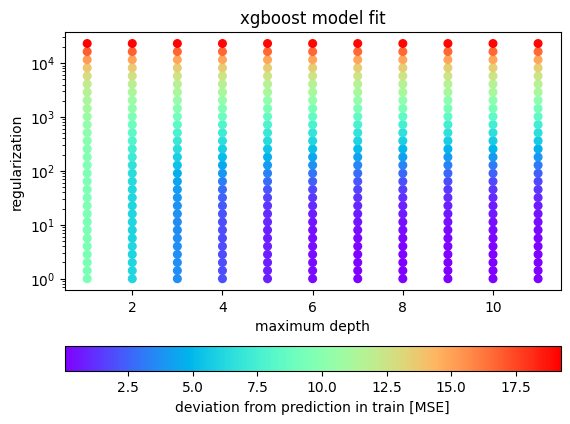

In [21]:

plt.scatter(x=xmodel_avg1[1], y=xmodel_avg1[0], c=xmodel_avg1[2],s=30, cmap="rainbow")
plt.colorbar(label="deviation from prediction in train [MSE]", orientation="horizontal")
plt.xlabel("maximum depth")
plt.ylabel("regularization")
plt.yscale("log")
plt.title("xgboost model fit")

As expected it is very good (nearly 0) for some values, but that is likely overfitting. Now test. 

Text(0.5, 1.0, 'xgboost model fit')

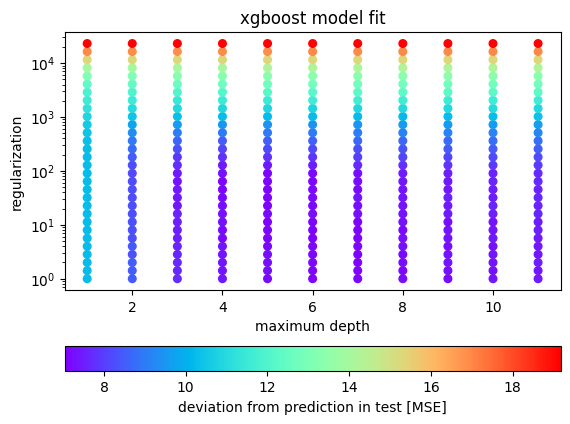

In [22]:

plt.scatter(x=xmodel_avg1[1], y=xmodel_avg1[0], c=xmodel_avg1[3],s=30, cmap="rainbow")
plt.colorbar(label="deviation from prediction in test [MSE]", orientation="horizontal")
plt.xlabel("maximum depth")
plt.ylabel("regularization")
plt.yscale("log")
plt.title("xgboost model fit")

Here is now a clear improvement compared to the maximum possible. Possible because of the larger distribution of wins. Hopefully not because there is no too much information in it because of the past use of xgboost. 

In [89]:
def get_best_xgboost(stats,features,target,minwin=0,maxwin=100):
    counter,selparams,selwins=select_range(features,target,minwin=minwin, maxwin=maxwin)
    ind = np.unravel_index(np.argmin(stats[3], axis=None), stats[3].shape)
    print("best model has")
    print(f"reg={stats[0,ind[0],ind[1]]}, max-depth={int(stats[1,ind[0],ind[1]])},train-scatter={stats[2,ind[0],ind[1]]},test-scatter={stats[3,ind[0],ind[1]]}")
    #run model 
    xmodel1=XGBRegressor(max_depth=int(stats[1,ind[0],ind[1]]),reg_alpha=stats[0,ind[0],ind[1]]).fit(selparams.T,selwins)
    return xmodel1

In [90]:
xmodel=get_best_xgboost(xmodel_avg1,xcomb[19:38,:,0],wins,minwin=0,maxwin=100)
#works now next create data and run games 

2440 cases are selected
best model has
reg=22.596682585903366, max-depth=5,train-scatter=1.3441065399771024,test-scatter=7.0372173440226815


In [91]:
def get_sample(xmodel1,its_trails=1000000,minstars=1000,max_win=50,seed2=1,filename1='selparams_xgb1.npy',filename2='pred_xgb1.npy'):
    seed(seed2)
    aselmodels=np.zeros((19,minstars*3))
    axselmodels=np.zeros((minstars*3))
    c=0
    n=0
    while c<minstars:
        n+=1
        rand2 =rand(its_trails,19)*0.2-0.1
        c2=0
        xpred=xmodel1.predict(rand2)
        for i in range(len(xpred)):
            if xpred[i]<max_win:
                c+=1
                c2+=1
        print(f"{c} cases accumulated")
        print(f"minimum win is {min(xpred)}")
        if c2>=minstars and c==c2:    
            selmodels=np.zeros((19,c2))
            xselmodels=np.zeros((c2))
            c=0
            for i in range(len(xpred)):
                if xpred[i]<max_win:
                    selmodels[:,c]=rand2[i,:]
                    xselmodels[c]=xpred[i]
                    c+=1
            print("just one was enough")        
            np.save(filename1,selmodels)       
            np.save(filename2,xselmodels) 
        elif c<minstars:
            selmodels=np.zeros((19,c2))
            xselmodels=np.zeros((c2))
            c2=0
            for i in range(len(xpred)):
                if xpred[i]<max_win:
                    selmodels[:,c2]=rand2[i,:]
                    xselmodels[c2]=xpred[i]
                    c2+=1       
            aselmodels[:,c-c2:c]=selmodels
            axselmodels[c-c2:c]=xselmodels
        else:  
            selmodels=np.zeros((19,c2))
            xselmodels=np.zeros((c2))
            c2=0
            for i in range(len(xpred)):
                if xpred[i]<max_win:
                    selmodels[:,c2]=rand2[i,:]
                    xselmodels[c2]=xpred[i]
                    c2+=1       
            aselmodels[:,c-c2:c]=selmodels
            axselmodels[c-c2:c]=xselmodels
            print(f"{n} were enough")        
            np.save(filename1,aselmodels[:,0:c])       
            np.save(filename2,axselmodels[0:c]) 

In [92]:

get_sample(xmodel,minstars=2000,max_win=45,filename1='selparams_xgb1b.npy',filename2='pred_xgb1b.npy')
#gets not so small now, saved were 'selparams_xgb1.npy' 'pred_xgb1.npy'

53 cases accumulated
minimum win is 38.640846252441406
101 cases accumulated
minimum win is 37.89543151855469
148 cases accumulated
minimum win is 38.23823928833008
188 cases accumulated
minimum win is 36.99808883666992
216 cases accumulated
minimum win is 38.7815055847168
246 cases accumulated
minimum win is 40.753910064697266
279 cases accumulated
minimum win is 37.29541778564453
318 cases accumulated
minimum win is 35.379859924316406
344 cases accumulated
minimum win is 39.6364860534668
378 cases accumulated
minimum win is 34.248985290527344
419 cases accumulated
minimum win is 38.190460205078125
448 cases accumulated
minimum win is 36.211036682128906
488 cases accumulated
minimum win is 39.65394973754883
520 cases accumulated
minimum win is 40.7712287902832
555 cases accumulated
minimum win is 39.066200256347656
588 cases accumulated
minimum win is 39.01015090942383
614 cases accumulated
minimum win is 39.082679748535156
639 cases accumulated
minimum win is 37.67569351196289
683 ca

Now running the real games for prediction. 

In [93]:
allres2=np.load("mc_v9_all.npy")
c=0
list_open7=[]
list_discard7=[]
list_value7=[]
for i in range(850):
    if np.mean(allres2[40,i,4:6])<45 and np.max(allres2[40,i,:])<60:
        list_open7.append(allres2[19:25,i,0])
        list_discard7.append(allres2[25:31,i,0])        
        list_value7.append(allres2[31:38,i,0])   
print(list_open7)
xres1=np.load("selparams_xgb1.npy")
c=0
list_openx1=[]
list_discardx1=[]
list_valuex1=[]
for i in range(20,500):
        list_openx1.append(xres1[0:6,i])
        list_discardx1.append(xres1[6:12,i])        
        list_valuex1.append(xres1[12:19,i])   
print(list_openx1[0:7])

start_time=time.time()
boolean,bestres,allres=many_comparisons(list_open7,list_discard7,list_value7,list_openx1,list_discardx1,list_valuex1,50,wfrac=0.001,wfrac2=0.002)
#v10 on purpose impossible crieteria to just run all iterations with predictable operation duration
#mcx2_v1_all.npy does first 20 
#v2 is 
#v3 is 
np.save("mcx2_v2_all.npy",allres)
stop_time=time.time()
print(f"ran for {np.round(stop_time-start_time,2)} seconds")       
#first 40 needed 
#looking good many seem as good as required (45%) lets see whether there also some which better than current ones 
#not yet lets see could be that model is too good and that it does work since none was better than 34% in input

[array([-0.06831686,  0.02731667,  0.06433668, -0.06519184, -0.06138129,
       -0.02530104]), array([ 0.09651646, -0.02684305,  0.00183673, -0.0894212 , -0.08815541,
        0.03519835]), array([-0.017706  , -0.07898665, -0.03564065, -0.08886795,  0.04114419,
        0.02847683]), array([-0.06021169, -0.0902781 , -0.00155455, -0.01841127,  0.01388234,
       -0.05260926]), array([-0.00082434,  0.04036975, -0.09866433, -0.08950707, -0.00375526,
       -0.06464979]), array([-6.53596770e-05, -6.90977851e-02,  1.60961960e-02, -4.81552487e-03,
       -7.62965770e-02, -1.97269779e-02])]
[array([ 0.07082204, -0.0872367 , -0.05391158, -0.03908913, -0.08487766,
       -0.08315358]), array([ 0.00639028, -0.06760677, -0.06838065,  0.00652828, -0.0658179 ,
       -0.09791406]), array([-0.05667065, -0.07889743, -0.06555857, -0.01997914, -0.04178868,
       -0.03713681]), array([-0.01355332,  0.06360307, -0.00170192, -0.06873606, -0.07311942,
       -0.0960571 ]), array([ 0.06442275, -0.0739411 , -

KeyboardInterrupt: 

In [ ]:
xreal1=np.load('mcx_v1_all.npy')
xreal2=np.load('mcx_v2_all.npy')
xreal3=np.load('mcx_v3_all.npy')
xall=np.zeros((xreal1.shape[0],xreal1.shape[1]+xreal2.shape[1]+xreal3.shape[1],xreal1.shape[2]))
xall[:,0:20,:]=xreal1
xall[:,20:340,:]=xreal2
xall[:,340:950,:]=xreal3
xpred1=np.load('pred_xgb_sel1.npy')
print(f"minium achieved {np.round(np.min(np.mean(xall[40,:,:],1)),2)} %")
real_win=np.mean(xall[40,:,:],1)
q=np.quantile(xpred1[0:950],[0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0])
qres=np.zeros((6,10))
for i in range(q.shape[0]-1):
    coll=np.zeros((2,100))
    c=0
    for j in range(950):
        if xpred1[j]>q[i] and xpred1[j]<=q[i+1]:
            coll[0,c]=xpred1[j]
            coll[1,c]=real_win[j]
            c+=1
    qres[0,i]=q[i]
    qres[1,i]=q[i+1]
    qres[2,i]=np.mean(coll[0,0:c])
    qres[3,i]=np.median(coll[0,0:c])
    qres[4,i]=np.mean(coll[1,0:c])
    qres[5,i]=np.median(coll[1,0:c])
plt.plot(xpred1[0:950],np.mean(xall[40,:,:],1),'o',ms=3,color='red',label='single data') 
plt.plot(qres[2,:],qres[4,:],'o',ms=6,color='blue',label='mean in bins') 
plt.plot(qres[3,:],qres[5,:],'o',ms=5,color='black',label='median in bins') 
plt.legend(loc="best")
#plt.xscale("log")
plt.xlabel("predicted level 20 wins [%]")
plt.ylabel("real level 20 wins [%]")
plt.title("prediction 1")    


In [ ]:
input_wins=np.mean(allres3[40,:,:],1)
s=np.argsort(np.mean(allres3[40,:,:],1))
for i in range(10):
    print(f"{i} best input is {np.round(input_wins[s[i]],1)} %")

This run achieved only a weak correlation between input and output result. The best achived case (smallest win value) was 33.2% that is slightly better than the best input of 35.7%. There is a bigger improvement in the second and other rather good  values. 

Now new prediction run.

In [ ]:
x2real1=np.load('mcx2_v1_all.npy')
x2real2=np.load('mcx2_v2_all.npy')

xall2=np.zeros((x2real1.shape[0],x2real1.shape[1]+x2real2.shape[1],x2real1.shape[2]))
xall2[:,0:20,:]=x2real1
xall2[:,20:500,:]=x2real2

xpred2=np.load('pred_xgb1.npy')
print(f"minium achieved {np.round(np.min(np.mean(xall2[40,:,:],1)),2)} %")
real_win2=np.mean(xall2[40,:,:],1)
q=np.quantile(xpred2[0:500],[0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0])
qres2=np.zeros((6,10))
for i in range(q.shape[0]-1):
    coll=np.zeros((2,100))
    c=0
    for j in range(500):
        if xpred2[j]>q[i] and xpred2[j]<=q[i+1]:
            coll[0,c]=xpred2[j]
            coll[1,c]=real_win2[j]
            c+=1
    qres2[0,i]=q[i]
    qres2[1,i]=q[i+1]
    qres2[2,i]=np.mean(coll[0,0:c])
    qres2[3,i]=np.median(coll[0,0:c])
    qres2[4,i]=np.mean(coll[1,0:c])
    qres2[5,i]=np.median(coll[1,0:c])
plt.plot(xpred2[0:500],np.mean(xall2[40,:,:],1),'o',ms=3,color='red',label='single data') 
plt.plot(qres2[2,:],qres2[4,:],'o',ms=6,color='blue',label='mean in bins') 
plt.plot(qres2[3,:],qres2[5,:],'o',ms=5,color='black',label='median in bins') 
plt.legend(loc="best")
#plt.xscale("log")
plt.xlabel("predicted level 20 wins [%]")
plt.ylabel("real level 20 wins [%]")
plt.title("prediction 2")    


A few are bad but not many, zooming into the better ones and listing also the best input cases. 

In [ ]:
plt.plot(xpred2[0:500],np.mean(xall2[40,:,:],1),'o',ms=3,color='red',label='single data') 
plt.plot(qres2[2,:],qres2[4,:],'o',ms=6,color='blue',label='mean in bins') 
plt.plot(qres2[3,:],qres2[5,:],'o',ms=5,color='black',label='median in bins') 
plt.legend(loc="best")
#plt.xscale("log")
plt.xlabel("predicted level 20 wins [%]")
plt.ylabel("real level 20 wins [%]")
plt.title("prediction 2")  
plt.ylim(30,50)
input_wins2=np.mean(xcomb[40,:,:],1)
s2=np.argsort(np.mean(xcomb[40,:,:],1))
for i in range(10):
    print(f"{i} best input is {np.round(input_wins2[s2[i]],1)} %")

This run achieved only a weak correlation between input and output result. The best achived case (smallest win value) was 31.7% that is slightly better than the best input of 33.2%. There is a bigger improvement in the second and other rather good  values. 

Thus as before real improvement is diccult. (The small ones achieved could also be not real because change plays a role also.) Tjhis means xgboost cannot extrapolate, it can only get more values in a already populated range. The range can be very sprasely populated, thus it can valuable, but not in ours case where we want the first really improved model. 

Thus back to the gradient method which is a non black box can be tweaked. 

## Gradient fit optimization part 2

The next part to implement is decide after the base is run, whether it is good enough to be accepted. When not a new base is calcaluted and run with a smaller step. The requires the use of different functions, because now the steps for gradient calculation are not always executed. 

In [2]:
#gradient gets local gradient compared to input models (can be own but should several to avoid too
#much orienation to a single )
#input models open_vars,discard_vars,value_vars
#single model (can be mean or something else) around which steps are done open_avg,discard_avg,value_avg
#step size vectors to step to explore open_step,discard_step,value_step
#n_games number of games done for the exploring models
#the inout model is not done here but separately 
def gradient_step2(open_vars,discard_vars,value_vars,open_avg,discard_avg,value_avg,open_step,discard_step,value_step,n_games):
    #always 19 because of doing 19 parameters separately plus the base model
    results=np.zeros((41,19,len(open_vars)))
    for j in range(19):
        level21_open_variable=np.array(open_avg)
        level21_discard_variable=np.array(discard_avg)      
        level21_value_variable=np.array(value_avg)                      
        #start now gradient with open 
        if j<6:
            print(f"changing open variable {j}")  
            level21_open_variable[j]+=open_step[j]                 
        elif j<12:
            print(f"changing discard variable {j-6}")  
            level21_discard_variable[j-6]+=discard_step[j-6]
        else:
            print(f"changing value variable {j-12}")             
            level21_value_variable[j-12]+=value_step[j-12]        
        for k in range(len(open_vars)):
            print(f"doing case {k} for level 20")
            level20_open_variable=np.array(open_vars[k])
            level20_discard_variable=np.array(discard_vars[k])
            level20_value_variable=np.array(value_vars[k])             
            results[0:6,j,k]=level20_open_variable
            results[6:12,j,k]=level20_discard_variable
            results[12:19,j,k]=level20_value_variable    
            results[19:25,j,k]=level21_open_variable
            results[25:31,j,k]=level21_discard_variable
            results[31:38,j,k]=level21_value_variable         
            win20=0
            start_time=time.time()   
            for i in range(n_games):
                names=['alpha','beta']
                nature=['computer','computer']
                levels=[20,21]
                winner=skyjo_game(names,nature,levels,0,True,False,level20_open_variable=level20_open_variable,level21_open_variable=level21_open_variable,level20_discard_variable=level20_discard_variable,level21_discard_variable=level21_discard_variable,level20_value_variable=level20_value_variable,level21_value_variable=level21_value_variable)
                if winner[0]==1:
                    win20+=1                    
            results[38,j,k]=n_games
            results[39,j,k]=win20
            results[40,j,k]=100*win20/n_games     
            stop_time=time.time()
            print(f"{n_games} games need {np.round(stop_time-start_time,3)} seconds")
            print(f"level 20 won to {np.round(results[40,j,k],1)} %")
        print(f"level 20 won in average to {np.round(np.mean(results[40,j,:]),1)} %") 
    print("all models done") 
    return results 

Below I change the main function. This requires more changes. 

In [30]:
#parameters,list of open paremeters, discard parameters, value parameters for level 20
# open base, discard base, value base parameters for level 21
# open steps, discard steps, value steps parameters for level 21
#then optional the parameter to adjust step size of get_new_parameters3
# factor for next base is divided by signifciance
#factor on step when not significant
#factor on step when signifciance divide by signifant
#tolerance of how many sigma the main fit can get larger to be acceptable 
#maximum number of steps to improve base
#max_time the maximum time in hours allowed
#min_win  win in pecentage when it go below then it is aborted early 
def gradient_fit3(open_vars,discard_vars,value_vars,base_open,base_discard,base_value,open_step,discard_step,value_step,n_games=100,max_iter=10,output_name="gradient2_fit1_it",fact_new_par2=1.5,fact_new_step_no2=2.5,fact_new_step_sig2=2.0,tolerance=1.5,max_base_iter=10,max_time=100,min_win=0.):
    #start_time for stopping running when too long
    full_start_time=time.time()
    #to save parameters and steps 
    results=np.zeros((19,max_iter,2))
    #to save base steps also not used onces, is large created plan is not to use all 3 more to insert different counters
    all_base_results=np.zeros((44,max_iter*100,len(open_vars)))
    #counter of all base models 
    all_base=0
    #first setp does for sure 
    for i in range(max_iter):
        #time to use as delyta time in check 
        if i>0:
            hours=(time.time()-full_start_time)/3600.
            win_percentage=np.mean(base_res[40,:])
            if hours>max_time or win_percentage<=min_win:
                if hours>max_time:
                    print(f"fit ends early because of time limit of {max_time} reached")
                if win_percentage<=min_win:    
                    print(f"fit ends early because win limit of {min_win} reached")
                    #ending with early return 
                return results[:,0:,i,:], all_base_results[:,0:all_base,:]   
        #add some end conditions time and already good enough fit 
        print(f"doing iteration {i}")
        print("doing base step")
        #4 times as often to reduce error in this step 
        #counter within model 
        base_it=0
        base_res=run_level21(open_vars,discard_vars,value_vars,base_open,base_discard,base_value,n_games*4)
        all_base_results[0:41,all_base,:]=base_res
        #+1 that unfilled is not relevant number
        all_base_results[41,all_base,:]=i+1
        all_base_results[42,all_base,:]=base_it+1
        all_base_results[43,all_base,:]=all_base+1   
        base_it+=1
        all_base+=1
        #if not first iteration compare with previous iteration
        if i>0:
            #find previous to compare mean one iteration les and maximal base_it
            maxv=0
            index_max=0
            for j in range(all_base+1):
                if all_base_results[41,j,0]==i and all_base_results[42,j,0]>maxv:
                    maxv=all_base_results[42,j,0]
                    index_max=j
            err=100*np.sqrt(np.sum(base_res[38,:])/np.sum(base_res[38,:])**2+np.sum(all_base_results[38,index_max,:])/np.sum(all_base_results[38,index_max,:])**2)
            diff=np.mean(base_res[40,:])-np.mean(all_base_results[40,index_max,:])
            if diff/err>tolerance:
                print(f"win fraction decreased by {diff/err} sigma optimize")
                #at most 10 setsp just for avoiding always running
                while diff/err>tolerance and base_it<max_base_iter:
                    print(f"doing iteration {base_it} for improving base value")
                    #decrease base step size each time by sqrt(2), gradient step size also by the same 
                    new_par1,new_step1=get_new_parameters3(resgrad2,fact_new_par=fact_new_par2/np.sqrt(2)**base_it,fact_new_step_no=fact_new_step_no2/np.sqrt(2)**base_it,fact_new_step_sig=fact_new_step_sig2/np.sqrt(2)**base_it)
                    results[:,i-1,0]=new_par1
                    results[:,i-1,1]=new_step1  
                    #pass to used variables
                    base_open=new_par1[0:6]
                    base_discard=new_par1[6:12]
                    base_value=new_par1[12:19]        
                    #passing as new steps
                    open_step=new_step1[0:6]
                    discard_step=new_step1[6:12]
                    value_step=new_step1[12:19]                    
                    #next base trial
                    base_res=run_level21(open_vars,discard_vars,value_vars,base_open,base_discard,base_value,n_games*4)
                    all_base_results[0:41,all_base,:]=base_res
                    #+1 that unfilled is not relevant number
                    all_base_results[41,all_base,:]=i+1
                    all_base_results[42,all_base,:]=base_it+1
                    all_base_results[43,all_base,:]=all_base+1   
                    base_it+=1
                    all_base+=1
                    maxv=0
                    index_max=0
                    for j in range(all_base+1):
                        if all_base_results[41,j,0]==i and all_base_results[42,j,0]>maxv:
                            maxv=all_base_results[42,j,0]
                            index_max=j
                    err=100*np.sqrt(np.sum(base_res[38,:])/np.sum(base_res[38,:])**2+np.sum(all_base_results[38,index_max,:])/np.sum(all_base_results[38,index_max,:])**2)
                    diff=np.mean(base_res[40,:])-np.mean(all_base_results[40,index_max,:])   
                    if base_it==max_base_iter: 
                        print("maximum base iteration reached")
                        print(f"win fraction decreased by {diff/err}")
                    if diff/err>tolerance:
                        print(f"win fraction decreased by {diff/err} sigma optimize")  
                    else: 
                        print(f"win fraction decreased by {diff/err} sigma acceptable")    
            else: 
                print(f"win fraction decreased by {diff/err} sigma acceptable")
        else:
            print("no comparison done with previous iteration in iteration 0")
        start_time=time.time()
        resgrad1=gradient_step2(open_vars,discard_vars,value_vars,base_open,base_discard,base_value,open_step,discard_step,value_step,n_games=n_games)
        #combine base and steps
        resgrad2=np.zeros((41,20,len(open_vars)))
        resgrad2[:,0,:]=base_res
        resgrad2[:,1:20,:]=resgrad1
        np.save(output_name+str(i)+".npy",resgrad2)
        stop_time=time.time()
        print(f"{n_games} games need {np.round(stop_time-start_time,3)} seconds")
        #getting new steps and parameters
        new_par1,new_step1=get_new_parameters3(resgrad2,fact_new_par=fact_new_par2,fact_new_step_no=fact_new_step_no2,fact_new_step_sig=fact_new_step_sig2)
        results[:,i,0]=new_par1
        results[:,i,1]=new_step1        
        #passing as new base
        base_open=new_par1[0:6]
        base_discard=new_par1[6:12]
        base_value=new_par1[12:19]        
        #passing as new steps
        open_step=new_step1[0:6]
        discard_step=new_step1[6:12]
        value_step=new_step1[12:19]
    return results, all_base_results[:,0:all_base,:]    

Now I run it as a first test run. 

In [18]:
gra1=np.loadtxt("gradient_level20_v1.txt")
gra2=np.loadtxt("gradient_level20_v2.txt")
gra3=np.loadtxt("gradient_level20_v3.txt")
gra4=np.loadtxt("gradient_level20_v4.txt")
gra5=np.loadtxt("gradient_level20_v5.txt")
gra6=np.loadtxt("gradient_level20_v6.txt")
gra7=np.loadtxt("gradient_level20_v7.txt")
gra8=np.loadtxt("gradient_level20_v8.txt")
gra9=np.loadtxt("gradient_level20_v9.txt")
gra10=np.loadtxt("gradient_level20_v10.txt")
gra11=np.loadtxt("gradient_level20_v11.txt")
gra12=np.loadtxt("gradient_level20_v12.txt")
gra13=np.loadtxt("gradient_level20_v13.txt")
gra14=np.loadtxt("gradient_level20_v14.txt")
compp=np.zeros((20,14))
compp[0,:]=np.array([1,0.5,0.2,0.1,0.05,0.02,0.01,0.005,0.002,0.001,0.0005,0.0002,0.0001,0.00005])
compp[1:20,0]=gra1[39,:]/gra1[38,:]
compp[1:20,1]=gra2[39,:]/gra2[38,:]
compp[1:20,2]=gra3[39,:]/gra3[38,:]
compp[1:20,3]=gra4[39,:]/gra4[38,:]
compp[1:20,4]=gra5[39,:]/gra5[38,:]
compp[1:20,5]=gra6[39,:]/gra6[38,:]
compp[1:20,6]=gra7[39,:]/gra7[38,:]
compp[1:20,7]=gra8[39,:]/gra8[38,:]
compp[1:20,8]=gra9[39,:]/gra9[38,:]
compp[1:20,9]=gra10[39,:]/gra10[38,:]
compp[1:20,10]=gra11[39,:]/gra11[38,:]
compp[1:20,11]=gra12[39,:]/gra12[38,:]
compp[1:20,12]=gra13[39,:]/gra13[38,:]
compp[1:20,13]=gra14[39,:]/gra14[38,:]
gram1=np.loadtxt("gradient_level20_vm0.txt")
gram2=np.loadtxt("gradient_level20_vm1.txt")
gram3=np.loadtxt("gradient_level20_vm2.txt")
gram4=np.loadtxt("gradient_level20_vm3.txt")
gram5=np.loadtxt("gradient_level20_vm4.txt")
gram6=np.loadtxt("gradient_level20_vm5.txt")
gram7=np.loadtxt("gradient_level20_vm6.txt")
gram8=np.loadtxt("gradient_level20_vm7.txt")
gram9=np.loadtxt("gradient_level20_vm8.txt")
gram10=np.loadtxt("gradient_level20_vm9.txt")
gram11=np.loadtxt("gradient_level20_vm10.txt")
compm=np.zeros((20,11))
compm[0,:]=np.array([0.00005,0.0001,0.0002,0.0005,0.001,0.002,0.005,0.01,0.02,0.05,0.1])
compm[1:20,0]=gram1[39,:]/gram1[38,:]
compm[1:20,1]=gram2[39,:]/gram2[38,:]
compm[1:20,2]=gram3[39,:]/gram3[38,:]
compm[1:20,3]=gram4[39,:]/gram4[38,:]
compm[1:20,4]=gram5[39,:]/gram5[38,:]
compm[1:20,5]=gram6[39,:]/gram6[38,:]
compm[1:20,6]=gram7[39,:]/gram7[38,:]
compm[1:20,7]=gram8[39,:]/gram8[38,:]
compm[1:20,8]=gram9[39,:]/gram9[38,:]
compm[1:20,9]=gram10[39,:]/gram10[38,:]
compm[1:20,10]=gram11[39,:]/gram11[38,:]
compa=np.zeros((compm.shape[0],compm.shape[1]+compp.shape[1]))
compm=np.flip(compm,1)
compp=np.flip(compp,1)
compa[0,0:compm.shape[1]]=-compm[0]
compa[1:20,0:compm.shape[1]]=compm[1:20]
compa[:,compm.shape[1]:compa.shape[1]]=compp
#using logistic fit result as inout
logpar=np.zeros((4,19))
ares=np.zeros((19,compa.shape[1]))
for i in range(19):
    popt, pcov = curve_fit(logistic_adapted, compa[0,:], 100*compa[1+i,:])
    logpar[0:3,i]=popt
    fres=np.zeros((compa.shape[1]))
    for j in range(ares.shape[0]):
        fres[j]=logistic_adapted(compa[0,j],popt[0],popt[1],popt[2])  
    ares[i,:]=fres
#get change sclae
logpar[3]=1.1/logpar[1]  
#loading models
allres2=np.load("mc_v9_all.npy")
c=0
list_open7=[]
list_discard7=[]
list_value7=[]
#selecting models
for i in range(850):
    if np.mean(allres2[40,i,4:6])<45 and np.max(allres2[40,i,:])<60:
        list_open7.append(allres2[19:25,i,0])
        list_discard7.append(allres2[25:31,i,0])        
        list_value7.append(allres2[31:38,i,0]) 
        c+=1
print(f"{c} improved models found")        
print("5 used to to test against")
list_open8=list_open7[0:5]
list_discard8=list_discard7[0:5]
list_value8=list_value7[0:5]        
open_steps2=logpar[3,0:6]
print("used steps are")
print(open_steps2)
discard_steps2=logpar[3,6:12]
print(discard_steps2)
value_steps2=logpar[3,12:19]
print(value_steps2)

start_time=time.time()
n_games=100
max_iter=4
output_name="gradient3_fit1_it"
#tolerance increase to avoid that chance effect starts that lopp *and decreasing factor creates problem
tolerance=2.5
gradient_res,gradient_allres=gradient_fit3(list_open8,list_discard8,list_value8,list_open7[5],list_discard7[5],list_value7[5],open_steps2,discard_steps2,value_steps2,n_games=n_games,max_iter=max_iter,output_name=output_name,tolerance=tolerance)
np.save('gradient3_fit1.npy',gradient_res)
np.save('gradient3_fit1_all.npy',gradient_allres)
stop_time=time.time()
print(f"Needed {np.round(stop_time-start_time,3)} seconds") 
#possible to short and too small steps starting points that result is very useful
#and first specialness causes problem with restart, although ine could change that

/tmp/ipykernel_2511/3323873085.py:3: RuntimeWarning: overflow encountered in exp
  return a/(1+np.exp(-b*x))+c


6 improved models found
5 used to to test against
used steps are
[ 0.0158191  -0.00204853  0.00148761  0.00037849  0.00427198  0.00074695]
[0.01560032 0.00428962 0.00346228 0.00054269 0.00338403 0.00063986]
[-0.01458805 -0.00189782 -0.00378486 -0.00044737 -0.00318601 -0.00058577
 -0.00144786]
doing iteration 0
doing base step
doing case 0 for level 20


KeyboardInterrupt: 

Now analysis but not so good with only 4 iterations. 

Collecting the best cases and looking how good they are with more iterations.

In [10]:
allres3=np.load("mc_v10_all.npy")
input_wins=np.mean(allres3[40,:,:],1)
s=np.argsort(np.mean(allres3[40,:,:],1))
for i in range(1):
    print(f"{i} best input is {np.round(input_wins[s[i]],1)} %")
print([s[0]])
good_models=np.zeros((19,100))
good_models[:,0]=allres3[19:38,s[0],0]
c=1
#limit is 36.0    
xreal1=np.load('mcx_v1_all.npy')
xreal2=np.load('mcx_v2_all.npy')
xreal3=np.load('mcx_v3_all.npy')
#now also using past MC results
xcomb=np.zeros((xreal1.shape[0],xreal1.shape[1]+xreal2.shape[1]+xreal3.shape[1],xreal1.shape[2]))
    
xcomb[0:xreal1.shape[0],0:xreal1.shape[1],0:xreal1.shape[2]]=xreal1
xcomb[0:xreal1.shape[0],xreal1.shape[1]:xreal1.shape[1]+xreal2.shape[1],:]=xreal2
xcomb[0:xreal1.shape[0],xreal1.shape[1]+xreal2.shape[1]:xcomb.shape[1],:]=xreal3

for i in range(xcomb.shape[1]):
    if np.mean(xcomb[40,i,:])<36.0:
        good_models[:,c]=xcomb[19:38,i,0]
        c+=1
               
print(c)

x2real1=np.load('mcx2_v1_all.npy')
x2real2=np.load('mcx2_v2_all.npy')

xall2=np.zeros((x2real1.shape[0],x2real1.shape[1]+x2real2.shape[1],x2real1.shape[2]))
xall2[:,0:20,:]=x2real1
xall2[:,20:500,:]=x2real2

for i in range(xall2.shape[1]):
    if np.mean(xall2[40,i,:])<36.0:
        good_models[:,c]=xall2[19:38,i,0]
        c+=1
print(c)        
#this are 15 

0 best input is 35.7 %
[1218]
5
15


In [ ]:
gra1=np.loadtxt("gradient_level20_v1.txt")
gra2=np.loadtxt("gradient_level20_v2.txt")
gra3=np.loadtxt("gradient_level20_v3.txt")
gra4=np.loadtxt("gradient_level20_v4.txt")
gra5=np.loadtxt("gradient_level20_v5.txt")
gra6=np.loadtxt("gradient_level20_v6.txt")
gra7=np.loadtxt("gradient_level20_v7.txt")
gra8=np.loadtxt("gradient_level20_v8.txt")
gra9=np.loadtxt("gradient_level20_v9.txt")
gra10=np.loadtxt("gradient_level20_v10.txt")
gra11=np.loadtxt("gradient_level20_v11.txt")
gra12=np.loadtxt("gradient_level20_v12.txt")
gra13=np.loadtxt("gradient_level20_v13.txt")
gra14=np.loadtxt("gradient_level20_v14.txt")
compp=np.zeros((20,14))
compp[0,:]=np.array([1,0.5,0.2,0.1,0.05,0.02,0.01,0.005,0.002,0.001,0.0005,0.0002,0.0001,0.00005])
compp[1:20,0]=gra1[39,:]/gra1[38,:]
compp[1:20,1]=gra2[39,:]/gra2[38,:]
compp[1:20,2]=gra3[39,:]/gra3[38,:]
compp[1:20,3]=gra4[39,:]/gra4[38,:]
compp[1:20,4]=gra5[39,:]/gra5[38,:]
compp[1:20,5]=gra6[39,:]/gra6[38,:]
compp[1:20,6]=gra7[39,:]/gra7[38,:]
compp[1:20,7]=gra8[39,:]/gra8[38,:]
compp[1:20,8]=gra9[39,:]/gra9[38,:]
compp[1:20,9]=gra10[39,:]/gra10[38,:]
compp[1:20,10]=gra11[39,:]/gra11[38,:]
compp[1:20,11]=gra12[39,:]/gra12[38,:]
compp[1:20,12]=gra13[39,:]/gra13[38,:]
compp[1:20,13]=gra14[39,:]/gra14[38,:]
gram1=np.loadtxt("gradient_level20_vm0.txt")
gram2=np.loadtxt("gradient_level20_vm1.txt")
gram3=np.loadtxt("gradient_level20_vm2.txt")
gram4=np.loadtxt("gradient_level20_vm3.txt")
gram5=np.loadtxt("gradient_level20_vm4.txt")
gram6=np.loadtxt("gradient_level20_vm5.txt")
gram7=np.loadtxt("gradient_level20_vm6.txt")
gram8=np.loadtxt("gradient_level20_vm7.txt")
gram9=np.loadtxt("gradient_level20_vm8.txt")
gram10=np.loadtxt("gradient_level20_vm9.txt")
gram11=np.loadtxt("gradient_level20_vm10.txt")
compm=np.zeros((20,11))
compm[0,:]=np.array([0.00005,0.0001,0.0002,0.0005,0.001,0.002,0.005,0.01,0.02,0.05,0.1])
compm[1:20,0]=gram1[39,:]/gram1[38,:]
compm[1:20,1]=gram2[39,:]/gram2[38,:]
compm[1:20,2]=gram3[39,:]/gram3[38,:]
compm[1:20,3]=gram4[39,:]/gram4[38,:]
compm[1:20,4]=gram5[39,:]/gram5[38,:]
compm[1:20,5]=gram6[39,:]/gram6[38,:]
compm[1:20,6]=gram7[39,:]/gram7[38,:]
compm[1:20,7]=gram8[39,:]/gram8[38,:]
compm[1:20,8]=gram9[39,:]/gram9[38,:]
compm[1:20,9]=gram10[39,:]/gram10[38,:]
compm[1:20,10]=gram11[39,:]/gram11[38,:]
compa=np.zeros((compm.shape[0],compm.shape[1]+compp.shape[1]))
compm=np.flip(compm,1)
compp=np.flip(compp,1)
compa[0,0:compm.shape[1]]=-compm[0]
compa[1:20,0:compm.shape[1]]=compm[1:20]
compa[:,compm.shape[1]:compa.shape[1]]=compp
#using logistic fit result as inout
logpar=np.zeros((4,19))
ares=np.zeros((19,compa.shape[1]))
for i in range(19):
    popt, pcov = curve_fit(logistic_adapted, compa[0,:], 100*compa[1+i,:])
    logpar[0:3,i]=popt
    fres=np.zeros((compa.shape[1]))
    for j in range(ares.shape[0]):
        fres[j]=logistic_adapted(compa[0,j],popt[0],popt[1],popt[2])  
    ares[i,:]=fres
#get change sclae
logpar[3]=1.1/logpar[1]  
#loading models
allres2=np.load("mc_v9_all.npy")
c=0
list_open7=[]
list_discard7=[]
list_value7=[]
#selecting models
for i in range(850):
    if np.mean(allres2[40,i,4:6])<45 and np.max(allres2[40,i,:])<60:
        list_open7.append(allres2[19:25,i,0])
        list_discard7.append(allres2[25:31,i,0])        
        list_value7.append(allres2[31:38,i,0]) 
        c+=1
print(f"{c} improved models found")        
print("5 used to to test against")
list_open8=list_open7[0:5]
list_discard8=list_discard7[0:5]
list_value8=list_value7[0:5]        
open_steps2=logpar[3,0:6]
print("used steps are")
print(open_steps2)
discard_steps2=logpar[3,6:12]
print(discard_steps2)
value_steps2=logpar[3,12:19]
print(value_steps2)

start_time=time.time()
n_games=100
max_iter=100
output_name="gradient3_fit2_it"
#tolerance increase to avoid that chance effect starts that lopp *and decreasing factor creates problem
tolerance=2.5
max_time=14
min_win=20
#using first of above
gradient_res,gradient_allres=gradient_fit3(list_open8,list_discard8,list_value8,good_models[0:6,0],good_models[6:12,0],good_models[12:19,0],open_steps2,discard_steps2,value_steps2,n_games=n_games,max_iter=max_iter,output_name=output_name,tolerance=tolerance,max_time=max_time,min_win=min_win)
np.save('gradient3_fit2.npy',gradient_res)
np.save('gradient3_fit2_all.npy',gradient_allres)
stop_time=time.time()
print(f"Needed {np.round(stop_time-start_time,3)} seconds") 
#nt sure whether working could require harder condition for non initial test since then it is not chance

/tmp/ipykernel_2511/3323873085.py:3: RuntimeWarning: overflow encountered in exp
  return a/(1+np.exp(-b*x))+c


6 improved models found
5 used to to test against
used steps are
[ 0.0158191  -0.00204853  0.00148761  0.00037849  0.00427198  0.00074695]
[0.01560032 0.00428962 0.00346228 0.00054269 0.00338403 0.00063986]
[-0.01458805 -0.00189782 -0.00378486 -0.00044737 -0.00318601 -0.00058577
 -0.00144786]
doing iteration 0
doing base step
doing case 0 for level 20
400 games need 99.576 seconds
level 20 won to 36.2 %
doing case 1 for level 20
400 games need 95.957 seconds
level 20 won to 35.0 %
doing case 2 for level 20
400 games need 87.063 seconds
level 20 won to 44.2 %
doing case 3 for level 20
400 games need 106.722 seconds
level 20 won to 42.8 %
doing case 4 for level 20
400 games need 115.956 seconds
level 20 won to 41.8 %
level 20 won in average to 40.0 %
all models done
no comparison done with previous iteration in iteration 0
changing open variable 0
doing case 0 for level 20
100 games need 26.216 seconds
level 20 won to 38.0 %
doing case 1 for level 20
100 games need 23.069 seconds
level 2

100 games need 22.741 seconds
level 20 won to 28.0 %
doing case 2 for level 20
100 games need 21.99 seconds
level 20 won to 33.0 %
doing case 3 for level 20
100 games need 26.021 seconds
level 20 won to 38.0 %
doing case 4 for level 20
100 games need 28.173 seconds
level 20 won to 46.0 %
level 20 won in average to 35.4 %
changing value variable 5
doing case 0 for level 20
100 games need 26.249 seconds
level 20 won to 38.0 %
doing case 1 for level 20
100 games need 24.427 seconds
level 20 won to 33.0 %
doing case 2 for level 20
100 games need 22.169 seconds
level 20 won to 38.0 %
doing case 3 for level 20
100 games need 27.648 seconds
level 20 won to 37.0 %
doing case 4 for level 20
100 games need 28.924 seconds
level 20 won to 39.0 %
level 20 won in average to 37.0 %
changing value variable 6
doing case 0 for level 20
100 games need 25.893 seconds
level 20 won to 31.0 %
doing case 1 for level 20
100 games need 23.324 seconds
level 20 won to 36.0 %
doing case 2 for level 20
100 games ne

100 games need 27.004 seconds
level 20 won to 34.0 %
doing case 1 for level 20
100 games need 24.443 seconds
level 20 won to 32.0 %
doing case 2 for level 20
100 games need 22.53 seconds
level 20 won to 44.0 %
doing case 3 for level 20
100 games need 26.534 seconds
level 20 won to 36.0 %
doing case 4 for level 20
100 games need 27.27 seconds
level 20 won to 40.0 %
level 20 won in average to 37.2 %
changing value variable 3
doing case 0 for level 20
100 games need 27.097 seconds
level 20 won to 39.0 %
doing case 1 for level 20
100 games need 23.578 seconds
level 20 won to 37.0 %
doing case 2 for level 20
100 games need 21.362 seconds
level 20 won to 45.0 %
doing case 3 for level 20
100 games need 27.073 seconds
level 20 won to 33.0 %
doing case 4 for level 20
100 games need 28.382 seconds
level 20 won to 41.0 %
level 20 won in average to 39.0 %
changing value variable 4
doing case 0 for level 20
100 games need 26.002 seconds
level 20 won to 33.0 %
doing case 1 for level 20
100 games nee

100 games need 26.094 seconds
level 20 won to 39.0 %
doing case 1 for level 20
100 games need 22.518 seconds
level 20 won to 38.0 %
doing case 2 for level 20
100 games need 23.289 seconds
level 20 won to 44.0 %
doing case 3 for level 20
100 games need 27.145 seconds
level 20 won to 35.0 %
doing case 4 for level 20
100 games need 30.654 seconds
level 20 won to 49.0 %
level 20 won in average to 41.0 %
changing value variable 1
doing case 0 for level 20
100 games need 26.954 seconds
level 20 won to 34.0 %
doing case 1 for level 20
100 games need 23.181 seconds
level 20 won to 40.0 %
doing case 2 for level 20
100 games need 22.234 seconds
level 20 won to 44.0 %
doing case 3 for level 20
100 games need 26.851 seconds
level 20 won to 42.0 %
doing case 4 for level 20
100 games need 27.853 seconds
level 20 won to 42.0 %
level 20 won in average to 40.4 %
changing value variable 2
doing case 0 for level 20
100 games need 26.107 seconds
level 20 won to 33.0 %
doing case 1 for level 20
100 games n

100 games need 24.824 seconds
level 20 won to 40.0 %
doing case 1 for level 20
100 games need 21.527 seconds
level 20 won to 30.0 %
doing case 2 for level 20
100 games need 20.4 seconds
level 20 won to 43.0 %
doing case 3 for level 20
100 games need 22.976 seconds
level 20 won to 38.0 %
doing case 4 for level 20
100 games need 24.183 seconds
level 20 won to 32.0 %
level 20 won in average to 36.6 %
changing discard variable 5
doing case 0 for level 20
100 games need 24.033 seconds
level 20 won to 35.0 %
doing case 1 for level 20
100 games need 20.797 seconds
level 20 won to 33.0 %
doing case 2 for level 20
100 games need 20.182 seconds
level 20 won to 47.0 %
doing case 3 for level 20
100 games need 23.556 seconds
level 20 won to 43.0 %
doing case 4 for level 20
100 games need 23.809 seconds
level 20 won to 31.0 %
level 20 won in average to 37.8 %
changing value variable 0
doing case 0 for level 20
100 games need 24.59 seconds
level 20 won to 31.0 %
doing case 1 for level 20
100 games ne

100 games need 26.775 seconds
level 20 won to 34.0 %
doing case 1 for level 20
100 games need 22.686 seconds
level 20 won to 39.0 %
doing case 2 for level 20
100 games need 22.135 seconds
level 20 won to 41.0 %
doing case 3 for level 20
100 games need 25.223 seconds
level 20 won to 43.0 %
doing case 4 for level 20
100 games need 27.83 seconds
level 20 won to 45.0 %
level 20 won in average to 40.4 %
changing discard variable 3
doing case 0 for level 20
100 games need 25.666 seconds
level 20 won to 33.0 %
doing case 1 for level 20
100 games need 23.766 seconds
level 20 won to 35.0 %
doing case 2 for level 20
100 games need 21.837 seconds
level 20 won to 44.0 %
doing case 3 for level 20
100 games need 24.987 seconds
level 20 won to 34.0 %
doing case 4 for level 20
100 games need 27.1 seconds
level 20 won to 42.0 %
level 20 won in average to 37.6 %
changing discard variable 4
doing case 0 for level 20
100 games need 20.856 seconds
level 20 won to 33.0 %
doing case 1 for level 20
100 games 

100 games need 13.685 seconds
level 20 won to 61.0 %
doing case 1 for level 20
100 games need 13.48 seconds
level 20 won to 63.0 %
doing case 2 for level 20
100 games need 13.641 seconds
level 20 won to 83.0 %
doing case 3 for level 20
100 games need 12.924 seconds
level 20 won to 62.0 %
doing case 4 for level 20
100 games need 13.48 seconds
level 20 won to 39.0 %
level 20 won in average to 61.6 %
changing discard variable 1
doing case 0 for level 20
100 games need 19.544 seconds
level 20 won to 39.0 %
doing case 1 for level 20
100 games need 19.51 seconds
level 20 won to 39.0 %
doing case 2 for level 20
100 games need 17.873 seconds
level 20 won to 45.0 %
doing case 3 for level 20
100 games need 18.486 seconds
level 20 won to 50.0 %
doing case 4 for level 20
100 games need 18.877 seconds
level 20 won to 29.0 %
level 20 won in average to 40.4 %
changing discard variable 2
doing case 0 for level 20
100 games need 26.113 seconds
level 20 won to 67.0 %
doing case 1 for level 20
100 games 

400 games need 87.986 seconds
level 20 won to 60.0 %
doing case 2 for level 20
400 games need 85.158 seconds
level 20 won to 51.5 %
doing case 3 for level 20
400 games need 101.638 seconds
level 20 won to 60.5 %
doing case 4 for level 20
400 games need 117.057 seconds
level 20 won to 61.8 %
level 20 won in average to 57.0 %
all models done
win fraction decreased by 6.4826692033451785 sigma optimize
doing iteration 5 for improving base value
doing case 0 for level 20
400 games need 98.501 seconds
level 20 won to 40.0 %
doing case 1 for level 20
400 games need 89.142 seconds
level 20 won to 42.2 %
doing case 2 for level 20
400 games need 81.715 seconds
level 20 won to 46.2 %
doing case 3 for level 20
400 games need 95.977 seconds
level 20 won to 49.2 %
doing case 4 for level 20
400 games need 110.314 seconds
level 20 won to 46.0 %
level 20 won in average to 44.8 %
all models done
win fraction decreased by 2.6088790696389133 sigma optimize
doing iteration 6 for improving base value
doing 

100 games need 25.597 seconds
level 20 won to 28.0 %
level 20 won in average to 36.6 %
changing value variable 3
doing case 0 for level 20
100 games need 24.372 seconds
level 20 won to 37.0 %
doing case 1 for level 20
100 games need 20.333 seconds
level 20 won to 33.0 %
doing case 2 for level 20
100 games need 20.115 seconds
level 20 won to 44.0 %
doing case 3 for level 20
100 games need 24.533 seconds
level 20 won to 37.0 %
doing case 4 for level 20
100 games need 26.099 seconds
level 20 won to 42.0 %
level 20 won in average to 38.6 %
changing value variable 4
doing case 0 for level 20
100 games need 24.754 seconds
level 20 won to 37.0 %
doing case 1 for level 20
100 games need 22.041 seconds
level 20 won to 38.0 %
doing case 2 for level 20
100 games need 19.716 seconds
level 20 won to 33.0 %
doing case 3 for level 20
100 games need 24.487 seconds
level 20 won to 43.0 %
doing case 4 for level 20
100 games need 25.97 seconds
level 20 won to 42.0 %
level 20 won in average to 38.6 %
chan

100 games need 23.081 seconds
level 20 won to 30.0 %
doing case 4 for level 20
100 games need 23.537 seconds
level 20 won to 29.0 %
level 20 won in average to 34.4 %
changing value variable 1
doing case 0 for level 20
100 games need 23.597 seconds
level 20 won to 34.0 %
doing case 1 for level 20
100 games need 21.614 seconds
level 20 won to 39.0 %
doing case 2 for level 20
100 games need 19.768 seconds
level 20 won to 47.0 %
doing case 3 for level 20
100 games need 23.121 seconds
level 20 won to 37.0 %
doing case 4 for level 20
100 games need 24.496 seconds
level 20 won to 24.0 %
level 20 won in average to 36.2 %
changing value variable 2
doing case 0 for level 20
100 games need 23.482 seconds
level 20 won to 45.0 %
doing case 1 for level 20
100 games need 20.97 seconds
level 20 won to 20.0 %
doing case 2 for level 20
100 games need 20.257 seconds
level 20 won to 38.0 %
doing case 3 for level 20
100 games need 22.772 seconds
level 20 won to 34.0 %
doing case 4 for level 20
100 games ne

100 games need 19.692 seconds
level 20 won to 31.0 %
doing case 3 for level 20
100 games need 21.497 seconds
level 20 won to 41.0 %
doing case 4 for level 20
100 games need 20.313 seconds
level 20 won to 26.0 %
level 20 won in average to 31.4 %
changing discard variable 5
doing case 0 for level 20
100 games need 26.216 seconds
level 20 won to 33.0 %
doing case 1 for level 20
100 games need 23.359 seconds
level 20 won to 39.0 %
doing case 2 for level 20
100 games need 23.271 seconds
level 20 won to 38.0 %
doing case 3 for level 20
100 games need 26.713 seconds
level 20 won to 30.0 %
doing case 4 for level 20
100 games need 29.343 seconds
level 20 won to 42.0 %
level 20 won in average to 36.4 %
changing value variable 0
doing case 0 for level 20
100 games need 24.724 seconds
level 20 won to 27.0 %
doing case 1 for level 20
100 games need 21.958 seconds
level 20 won to 25.0 %
doing case 2 for level 20
100 games need 21.544 seconds
level 20 won to 43.0 %
doing case 3 for level 20
100 games

100 games need 29.002 seconds
level 20 won to 40.0 %
doing case 4 for level 20
100 games need 31.621 seconds
level 20 won to 43.0 %
level 20 won in average to 41.6 %
changing open variable 5
doing case 0 for level 20
100 games need 26.967 seconds
level 20 won to 27.0 %
doing case 1 for level 20
100 games need 24.531 seconds
level 20 won to 43.0 %
doing case 2 for level 20
100 games need 24.044 seconds
level 20 won to 32.0 %
doing case 3 for level 20
100 games need 27.805 seconds
level 20 won to 46.0 %
doing case 4 for level 20
100 games need 30.345 seconds
level 20 won to 32.0 %
level 20 won in average to 36.0 %
changing discard variable 0
doing case 0 for level 20
100 games need 26.329 seconds
level 20 won to 57.0 %
doing case 1 for level 20
100 games need 25.037 seconds
level 20 won to 49.0 %
doing case 2 for level 20
100 games need 24.517 seconds
level 20 won to 56.0 %
doing case 3 for level 20
100 games need 26.737 seconds
level 20 won to 54.0 %
doing case 4 for level 20
100 games 

100 games need 19.483 seconds
level 20 won to 35.0 %
doing case 2 for level 20
100 games need 19.639 seconds
level 20 won to 40.0 %
doing case 3 for level 20
100 games need 18.88 seconds
level 20 won to 47.0 %
doing case 4 for level 20
100 games need 21.858 seconds
level 20 won to 34.0 %
level 20 won in average to 39.2 %
changing open variable 2
doing case 0 for level 20
100 games need 26.469 seconds
level 20 won to 49.0 %
doing case 1 for level 20
100 games need 29.321 seconds
level 20 won to 35.0 %
doing case 2 for level 20
100 games need 21.955 seconds
level 20 won to 42.0 %
doing case 3 for level 20
100 games need 23.568 seconds
level 20 won to 39.0 %
doing case 4 for level 20
100 games need 24.022 seconds
level 20 won to 36.0 %
level 20 won in average to 40.2 %
changing open variable 3
doing case 0 for level 20
100 games need 23.448 seconds
level 20 won to 36.0 %
doing case 1 for level 20
100 games need 21.197 seconds
level 20 won to 36.0 %
doing case 2 for level 20
100 games need

400 games need 98.672 seconds
level 20 won to 30.8 %
doing case 2 for level 20
400 games need 95.909 seconds
level 20 won to 42.5 %
doing case 3 for level 20
400 games need 113.14 seconds
level 20 won to 39.0 %
doing case 4 for level 20
400 games need 122.837 seconds
level 20 won to 37.0 %
level 20 won in average to 36.4 %
all models done
win fraction decreased by -0.4427188724235727 sigma acceptable
changing open variable 0
doing case 0 for level 20
100 games need 27.2 seconds
level 20 won to 40.0 %
doing case 1 for level 20
100 games need 23.417 seconds
level 20 won to 34.0 %
doing case 2 for level 20
100 games need 23.811 seconds
level 20 won to 44.0 %
doing case 3 for level 20
100 games need 26.471 seconds
level 20 won to 37.0 %
doing case 4 for level 20
100 games need 30.664 seconds
level 20 won to 44.0 %
level 20 won in average to 39.8 %
changing open variable 1
doing case 0 for level 20
100 games need 27.363 seconds
level 20 won to 39.0 %
doing case 1 for level 20
100 games need

100 games need 27.263 seconds
level 20 won to 47.0 %
doing case 1 for level 20
100 games need 23.119 seconds
level 20 won to 51.0 %
doing case 2 for level 20
100 games need 21.077 seconds
level 20 won to 51.0 %
doing case 3 for level 20
100 games need 27.215 seconds
level 20 won to 35.0 %
doing case 4 for level 20
100 games need 28.239 seconds
level 20 won to 39.0 %
level 20 won in average to 44.6 %
changing value variable 6
doing case 0 for level 20
100 games need 21.822 seconds
level 20 won to 73.0 %
doing case 1 for level 20
100 games need 19.903 seconds
level 20 won to 64.0 %
doing case 2 for level 20
100 games need 19.087 seconds
level 20 won to 69.0 %
doing case 3 for level 20
100 games need 22.334 seconds
level 20 won to 69.0 %
doing case 4 for level 20
100 games need 24.101 seconds
level 20 won to 68.0 %
level 20 won in average to 68.6 %
all models done
100 games need 2407.205 seconds
doing iteration 12
doing base step
doing case 0 for level 20
400 games need 87.042 seconds
lev

100 games need 17.638 seconds
level 20 won to 65.0 %
doing case 1 for level 20
100 games need 15.71 seconds
level 20 won to 67.0 %
doing case 2 for level 20
100 games need 14.162 seconds
level 20 won to 74.0 %
doing case 3 for level 20
100 games need 16.787 seconds
level 20 won to 64.0 %
doing case 4 for level 20
100 games need 17.141 seconds
level 20 won to 61.0 %
level 20 won in average to 66.2 %
changing value variable 4
doing case 0 for level 20
100 games need 21.012 seconds
level 20 won to 37.0 %
doing case 1 for level 20
100 games need 19.291 seconds
level 20 won to 30.0 %
doing case 2 for level 20
100 games need 19.186 seconds
level 20 won to 42.0 %
doing case 3 for level 20
100 games need 19.879 seconds
level 20 won to 50.0 %
doing case 4 for level 20
100 games need 19.421 seconds
level 20 won to 33.0 %
level 20 won in average to 38.4 %
changing value variable 5
doing case 0 for level 20
100 games need 22.279 seconds
level 20 won to 47.0 %
doing case 1 for level 20
100 games ne

100 games need 23.742 seconds
level 20 won to 37.0 %
doing case 2 for level 20
100 games need 21.767 seconds
level 20 won to 42.0 %
doing case 3 for level 20
100 games need 26.787 seconds
level 20 won to 53.0 %
doing case 4 for level 20
100 games need 26.73 seconds
level 20 won to 41.0 %
level 20 won in average to 42.4 %
changing discard variable 4
doing case 0 for level 20
100 games need 26.624 seconds
level 20 won to 42.0 %
doing case 1 for level 20
100 games need 22.924 seconds
level 20 won to 43.0 %
doing case 2 for level 20
100 games need 23.638 seconds
level 20 won to 52.0 %
doing case 3 for level 20
100 games need 27.433 seconds
level 20 won to 50.0 %
doing case 4 for level 20
100 games need 27.068 seconds
level 20 won to 52.0 %
level 20 won in average to 47.8 %
changing discard variable 5
doing case 0 for level 20
100 games need 24.106 seconds
level 20 won to 39.0 %
doing case 1 for level 20
100 games need 20.804 seconds
level 20 won to 36.0 %
doing case 2 for level 20
100 game

100 games need 23.894 seconds
level 20 won to 52.0 %
doing case 4 for level 20
100 games need 23.845 seconds
level 20 won to 41.0 %
level 20 won in average to 48.8 %
changing open variable 5
doing case 0 for level 20
100 games need 24.657 seconds
level 20 won to 88.0 %
doing case 1 for level 20
100 games need 20.42 seconds
level 20 won to 86.0 %
doing case 2 for level 20
100 games need 17.631 seconds
level 20 won to 98.0 %
doing case 3 for level 20
100 games need 34.996 seconds
level 20 won to 84.0 %
doing case 4 for level 20
100 games need 30.363 seconds
level 20 won to 86.0 %
level 20 won in average to 88.4 %
changing discard variable 0
doing case 0 for level 20
100 games need 21.843 seconds
level 20 won to 44.0 %
doing case 1 for level 20
100 games need 19.865 seconds
level 20 won to 56.0 %
doing case 2 for level 20
100 games need 20.821 seconds
level 20 won to 57.0 %
doing case 3 for level 20
100 games need 22.006 seconds
level 20 won to 45.0 %
doing case 4 for level 20


Bets model wins win run for longer: 

In [13]:
fulltest=np.load("testbest36_v1.npy")

print("Run for x games") 
print(np.sum(fulltest[38,:,:],0))
print("New level lost for x %")
print(np.round(np.mean(fulltest[40,:,:],0),2))
#is somehwat worse in the range of 38 to 42 not below 36

Run for x games
[4200. 4200. 4200. 4200. 4200. 4200. 4200. 4200. 4200. 4200. 4200. 4200.
 4200. 4200. 4200.]
won for x %
[39.48 41.12 40.71 39.4  38.95 42.14 40.36 40.52 38.52 40.33 41.86 39.1
 38.98 41.05 42.38]


Lost for about 40%, not less than 36% as when tried for less games, thus that was partly changed. Still it is clearly better than the paaremeters of teh other isde, thus used now. Starting with the first which was found by random. 

Now analysing the longest gradient_fit run. Onlythe main output was saved, still that is the most important one.
Recheck order was not correct. 

Text(0.5, 1.0, 'gradient fit 4')

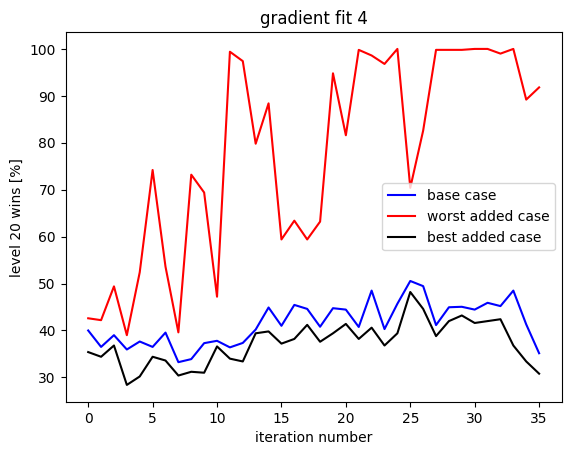

In [8]:
gradfit15=np.load('gradient_fit1_it15.npy')
myPath='/home/tobias/ml-testing/games/skyjo'
list_grad4=[f for f in os.listdir(myPath) 
    if (f.startswith('gradient3_fit2_it') )]
list_grad4.sort()

allgrad4=np.zeros((gradfit15.shape[0],gradfit15.shape[1],gradfit15.shape[2],len(list_grad4)))
for i in range(len(list_grad4)):
    allgrad4[:,:,:,i]=np.load(list_grad4[i])
plt.plot(range(36),np.mean(allgrad4[40,0,:,:],0),color='blue',label='base case') 
plt.plot(range(36),np.max(np.mean(allgrad4[40,1:20,:,:],1),0),color='red',label='worst added case') 
plt.plot(range(36),np.min(np.mean(allgrad4[40,1:20,:,:],1),0),color='black',label='best added case') 
plt.legend(loc="best")
#plt.xscale("log")
plt.xlabel("iteration number")
plt.ylabel("level 20 wins [%]")
plt.title("gradient fit 4")   

Is mostly a sideways change, neither getting worse or better usually. First getting better then getting worse and then improve,ment again. Not many cases where a added case is really better. 

In [9]:
def plot_par_iterations(data,base=True,startpar=19,stoppar=25,locy1=0.1,locy2=0.2):
    its=data.shape[3]
    colors=['blue','red','green','black','magenta','cyan','gray']
    for i in range(startpar,stoppar):
        if base==True:
            plt.plot(range(its),data[i,0,0,:]*np.sign(data[i,0,0,:]),color=colors[i-startpar],label=f'parameter {i-startpar}') 
            plt.plot(range(its),data[i,0,0,:],'o',color=colors[i-startpar]) 
            plt.plot(range(its),-data[i,0,0,:],'d',color=colors[i-startpar]) 
        else:
            plt.plot(range(its),data[i,i-18,0,:]*np.sign(data[i,i-18,0,:]),color=colors[i-startpar],label=f'parameter {i-startpar}') 
            plt.plot(range(its),data[i,i-18,0,:],'o',color=colors[i-startpar]) 
            plt.plot(range(its),-data[i,i-18,0,:],'d',color=colors[i-startpar])            
    plt.plot(3,locy1,'o',color='gray',label='positive') 
    plt.plot(3,locy2,'d',color='gray',label='negative') 
    plt.legend(loc="best")
    plt.yscale("log")
    plt.xlabel("iteration")
    if base==True:
        plt.ylabel("parameter |value| in base case")
    else:
        plt.ylabel("parameter |value| in changed case")        
    if startpar==19:
        plt.title("open parameters")
    elif startpar==25:
        plt.title("discard parameters")
    elif startpar==31:
        plt.title("value parameters")        

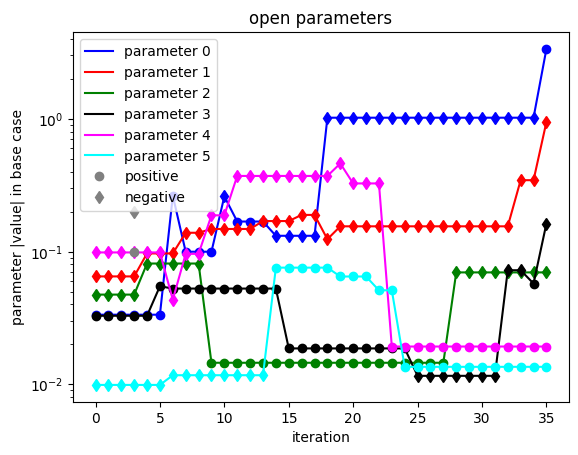

In [10]:
plot_par_iterations(allgrad4,base=True,startpar=19,stoppar=25,locy1=0.1,locy2=0.2)

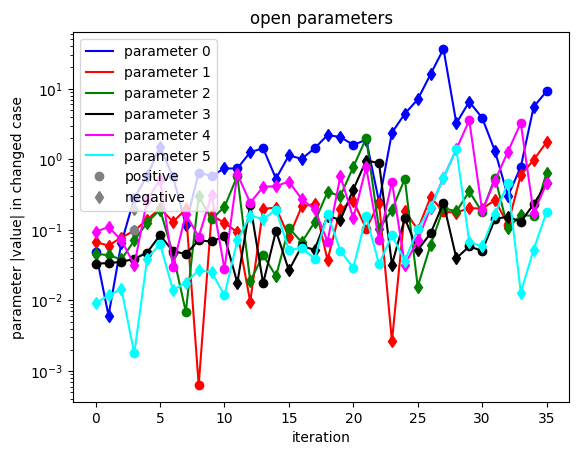

In [11]:
plot_par_iterations(allgrad4,base=False,startpar=19,stoppar=25,locy1=0.1,locy2=0.2)

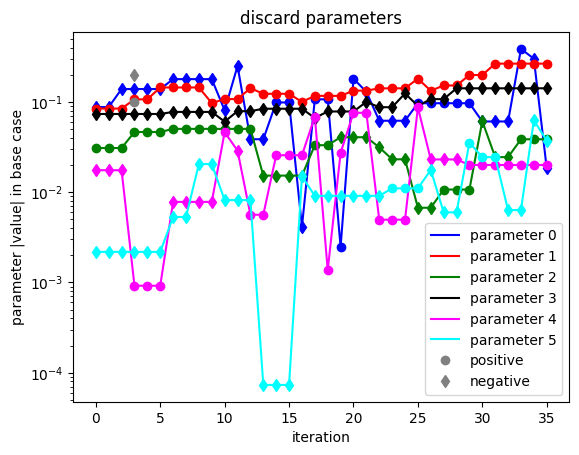

In [12]:
plot_par_iterations(allgrad4,base=True,startpar=25,stoppar=31,locy1=0.1,locy2=0.2)

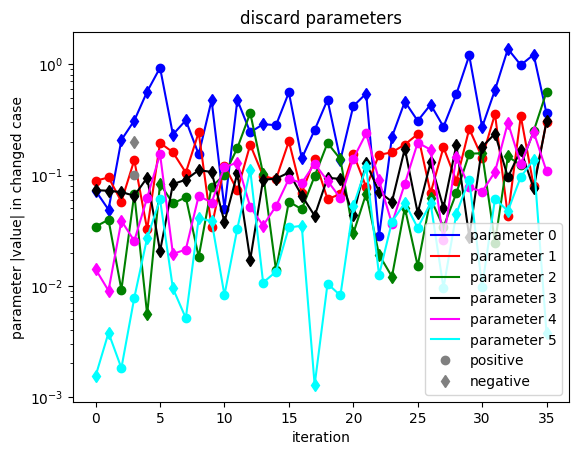

In [13]:
plot_par_iterations(allgrad4,base=False,startpar=25,stoppar=31,locy1=0.1,locy2=0.2)

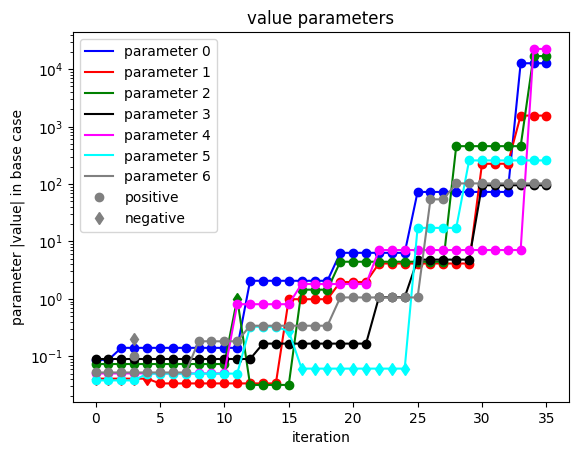

In [14]:
plot_par_iterations(allgrad4,base=True,startpar=31,stoppar=38,locy1=0.1,locy2=0.2)

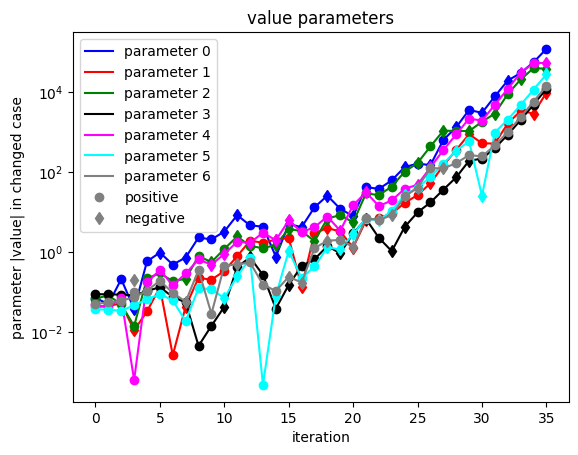

In [15]:
plot_par_iterations(allgrad4,base=False,startpar=31,stoppar=38,locy1=0.1,locy2=0.2)

In value the paarmeteres get first rather big but get small at the end again. Not ideal or indicative of problem of value implemenetation because it should be important at least partly or just degenerated, the others stay mostly small.
Maybe parameters are repeating toom much but difficult to see on log scale. 

In step it changes from olus to minus as it should but it in base step not for value. 

(41, 20, 5, 36)


Text(0.5, 1.0, 'gradient fit 4')

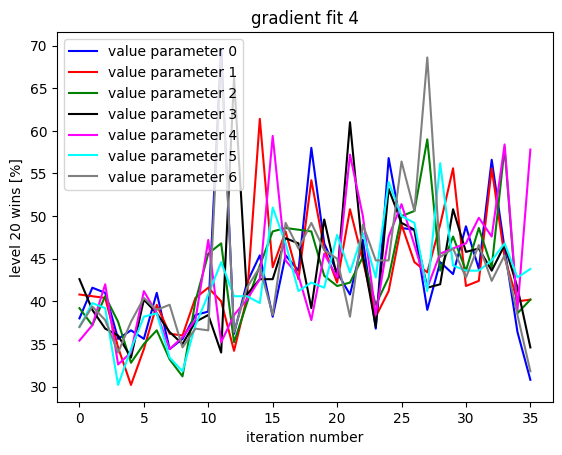

In [16]:
print(allgrad4.shape)
plt.plot(range(36),np.mean(allgrad4[40,13,:,:],0),color='blue',label='value parameter 0') 
plt.plot(range(36),np.mean(allgrad4[40,14,:,:],0),color='red',label='value parameter 1') 
plt.plot(range(36),np.mean(allgrad4[40,15,:,:],0),color='green',label='value parameter 2') 
plt.plot(range(36),np.mean(allgrad4[40,16,:,:],0),color='black',label='value parameter 3') 
plt.plot(range(36),np.mean(allgrad4[40,17,:,:],0),color='magenta',label='value parameter 4') 
plt.plot(range(36),np.mean(allgrad4[40,18,:,:],0),color='cyan',label='value parameter 5')
plt.plot(range(36),np.mean(allgrad4[40,19,:,:],0),color='gray',label='value parameter 6') 
plt.legend(loc="best")
#plt.xscale("log")
plt.xlabel("iteration number")
plt.ylabel("level 20 wins [%]")
plt.title("gradient fit 4")   

In [17]:
delta4=np.zeros((7,35))
for i in range(allgrad4.shape[3]-1):
    print(f"iteration {i+1} win_new={np.round(np.mean(allgrad4[40,0,:,i+1]),1)}  win_old={np.round(np.mean(allgrad4[40,0,:,i]),1)}")
    delta4[0,i]=(np.mean(allgrad4[40,0,:,i+1]))-(np.mean(allgrad4[40,0,:,i]))
    for j in range(19):
        if allgrad4[18+j,0,0,i+1]!=allgrad4[18+j,0,0,i]:
            err=100*np.sqrt(np.sum(allgrad4[38,j,:,i])/np.sum(allgrad4[38,j,:,i])**2+np.sum(allgrad4[38,0,:,i])/np.sum(allgrad4[38,0,:,i])**2)
            diff=np.mean(allgrad4[40,j,:,i])-np.mean(allgrad4[40,0,:,i])
            print(f"parameter {j} changed because diff/err={np.round(diff/err,2)} and win={np.mean(allgrad4[40,j,:,i])}%")
            if diff>0:
                delta4[1,i]+=1
                delta4[3,i]+=diff/err
                if diff/err>delta4[5,i]:
                    delta4[5,i]=diff/err
            if diff<0:
                delta4[2,i]+=1    
                delta4[4,i]+=diff/err
                if diff/err<delta4[5,i]:
                    delta4[6,i]=diff/err                

iteration 1 win_new=36.5  win_old=40.0
iteration 2 win_new=39.0  win_old=36.5
parameter 7 changed because diff/err=1.14 and win=42.2%
parameter 13 changed because diff/err=1.02 and win=41.6%
iteration 3 win_new=36.0  win_old=39.0
parameter 8 changed because diff/err=1.8 and win=48.0%
parameter 9 changed because diff/err=2.08 and win=49.4%
parameter 11 changed because diff/err=1.72 and win=47.6%
iteration 4 win_new=37.6  win_old=36.0
parameter 2 changed because diff/err=-1.51 and win=28.4%
parameter 3 changed because diff/err=-1.03 and win=30.8%
parameter 18 changed because diff/err=-1.15 and win=30.2%
iteration 5 win_new=36.5  win_old=37.6
parameter 4 changed because diff/err=-1.01 and win=32.6%
parameter 8 changed because diff/err=2.95 and win=52.4%
parameter 14 changed because diff/err=-1.49 and win=30.2%
iteration 6 win_new=39.6  win_old=36.5
parameter 1 changed because diff/err=1.26 and win=42.8%
parameter 4 changed because diff/err=2.54 and win=49.2%
parameter 5 changed because di

In [18]:
for i in range(allgrad4.shape[3]-1):
    print(f"iteration {i+1} win_new={np.round(np.mean(allgrad4[40,0,:,i+1]),1)}  win_old={np.round(np.mean(allgrad4[40,0,:,i]),1)}")
    delta4[0,i]=(np.mean(allgrad4[40,0,:,i+1]))-(np.mean(allgrad4[40,0,:,i]))
    for j in range(13,20):
        if allgrad4[18+j,0,0,i+1]!=allgrad4[18+j,0,0,i]:
            err=100*np.sqrt(np.sum(allgrad4[38,j,:,i])/np.sum(allgrad4[38,j,:,i])**2+np.sum(allgrad4[38,0,:,i])/np.sum(allgrad4[38,0,:,i])**2)
            diff=np.mean(allgrad4[40,j,:,i])-np.mean(allgrad4[40,0,:,i])
            print(f"parameter {j} changed to {np.round(allgrad4[18+j,0,0,i+1],4)} from {np.round(allgrad4[18+j,0,0,i],4)} because diff/err={np.round(diff/err,2)} and win={np.mean(allgrad4[40,j,:,i])}%")

iteration 1 win_new=36.5  win_old=40.0
iteration 2 win_new=39.0  win_old=36.5
parameter 13 changed to 0.1405 from 0.0869 because diff/err=1.02 and win=41.6%
iteration 3 win_new=36.0  win_old=39.0
iteration 4 win_new=37.6  win_old=36.0
parameter 18 changed to 0.0501 from 0.0381 because diff/err=-1.15 and win=30.2%
iteration 5 win_new=36.5  win_old=37.6
parameter 14 changed to 0.0338 from -0.0409 because diff/err=-1.49 and win=30.2%
iteration 6 win_new=39.6  win_old=36.5
iteration 7 win_new=33.2  win_old=39.6
iteration 8 win_new=33.9  win_old=33.2
parameter 19 changed to 0.1828 from 0.0523 because diff/err=1.27 and win=39.6%
iteration 9 win_new=37.3  win_old=33.9
iteration 10 win_new=37.8  win_old=37.3
iteration 11 win_new=36.4  win_old=37.8
parameter 15 changed to -1.0111 from 0.0735 because diff/err=1.56 and win=45.6%
parameter 17 changed to 0.808 from 0.0504 because diff/err=1.88 and win=47.2%
iteration 12 win_new=37.4  win_old=36.4
parameter 13 changed to 2.0663 from 0.1405 because d

Text(0.5, 1.0, 'gradient fit 4')

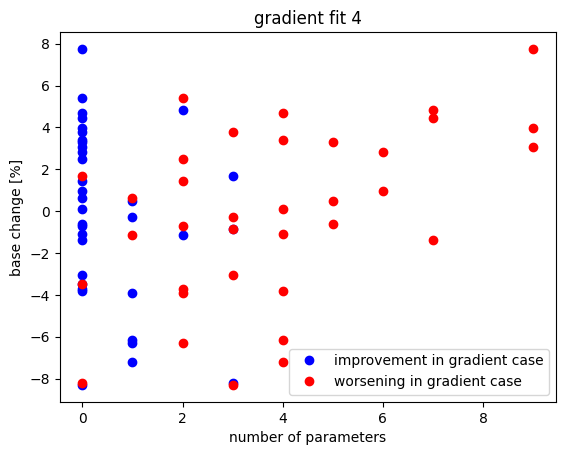

In [19]:
plt.plot(delta4[2],delta4[0],'o',color='blue',label='improvement in gradient case') 
plt.plot(delta4[1],delta4[0],'o',color='red',label='worsening in gradient case') 
plt.legend(loc="best")
#plt.xscale("log")
plt.xlabel("number of parameters")
plt.ylabel("base change [%]")
plt.title("gradient fit 4") 

Looks like improvement gradient is better.

Select best models and test them. 

In [20]:
c=0
good_model2=np.zeros((19,41))
wins2=np.zeros((2,41))
for i in range(allgrad4.shape[3]):
    for j in range(allgrad4.shape[1]):
        if np.mean(allgrad4[40,j,:,i])<34.0 and j==0:
            print(f"case {i} {j} losses to {np.mean(allgrad4[40,j,:,i])}")
            good_model2[:,c]=allgrad4[19:38,j,0,i]
            wins2[0,c]=np.mean(allgrad4[40,j,:,i])
            wins2[1,c]=np.mean(allgrad4[38,j,:,i])
            c+=1
        if np.mean(allgrad4[40,j,:,i])<32.0 and j!=0:
            print(f"case {i} {j} losses to {np.mean(allgrad4[40,j,:,i])}")  
            good_model2[:,c]=allgrad4[19:38,j,0,i]
            wins2[0,c]=np.mean(allgrad4[40,j,:,i])
            wins2[1,c]=np.mean(allgrad4[38,j,:,i])
            c+=1
print(f"{c} selected")         
print(allgrad4.shape)

case 3 2 losses to 28.4
case 3 3 losses to 30.8
case 3 18 losses to 30.2
case 4 14 losses to 30.2
case 7 0 losses to 33.25
case 7 2 losses to 30.4
case 8 0 losses to 33.9
case 8 11 losses to 31.4
case 8 15 losses to 31.2
case 8 18 losses to 31.8
case 9 11 losses to 31.0
case 35 13 losses to 30.8
case 35 19 losses to 31.8
13 selected
(41, 20, 5, 36)


In [21]:
selected_models=np.load("gradient3_fit2_it07.npy")
print(selected_models.shape)
good_models=selected_models[19:38,0,:]
print(np.mean(selected_models[40,0,:]))
print(good_models.shape)
print(good_models[:,0])

(41, 20, 5)
33.25
(19, 5)
[ 0.09972537 -0.13852939 -0.08125949  0.05264244 -0.09610793 -0.01171424
 -0.17902636  0.14474045  0.05033017 -0.07758143 -0.00781354 -0.00531519
  0.14050904  0.03377313  0.07350834  0.08991553  0.05042505  0.05005746
  0.05233277]


[29.2 28.2 29.8 30.2 29.8 28.8 38.4 37.4 41.  36.6 37.6 34.8 33.8]


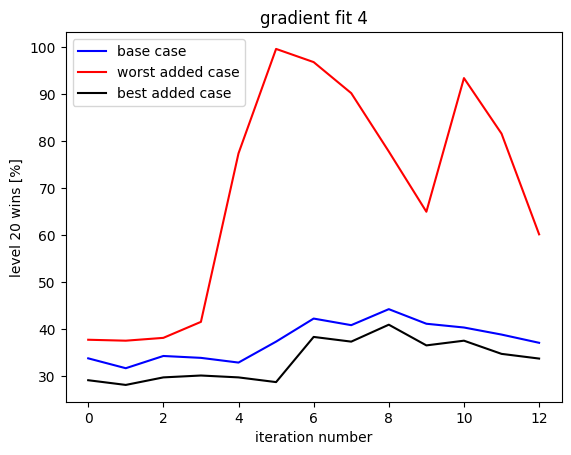

In [22]:
gradfit15=np.load('gradient_fit1_it15.npy')
myPath='/home/tobias/ml-testing/games/skyjo'
list_grad5=[f for f in os.listdir(myPath) 
    if (f.startswith('gradient3_fit3_it') )]
list_grad5.sort()

allgrad5=np.zeros((gradfit15.shape[0],gradfit15.shape[1],gradfit15.shape[2],len(list_grad5)))
range2=len(list_grad5)
for i in range(len(list_grad5)):
    allgrad5[:,:,:,i]=np.load(list_grad5[i])
plt.plot(range(range2),np.mean(allgrad5[40,0,:,:],0),color='blue',label='base case') 
#now correct minimum calculation 
plt.plot(range(range2),np.max(np.mean(allgrad5[40,1:20,:,:],1),0),color='red',label='worst added case') 
plt.plot(range(range2),np.min(np.mean(allgrad5[40,1:20,:,:],1),0),color='black',label='best added case') 
plt.legend(loc="best")
#plt.xscale("log")
plt.xlabel("iteration number")
plt.ylabel("level 20 wins [%]")
plt.title("gradient fit 4")   
print(np.min(np.mean(allgrad5[40,1:20,:,:],1),0))

Very little improvement here in both base and changed case. 
Possible that was only chance. Means that the chances are mainly caused by worseing in added case and using that is not easy,  not such unsurpringly, since it requires more extrapolation. Maybe I should use that even less and serach harder for positive immprovement with adding. 

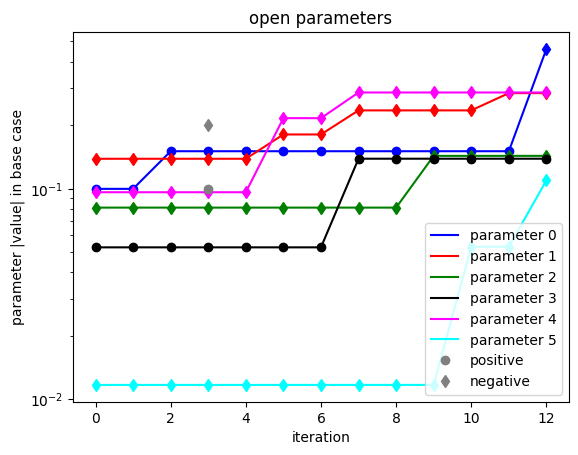

In [23]:
plot_par_iterations(allgrad5,base=True,startpar=19,stoppar=25,locy1=0.1,locy2=0.2)

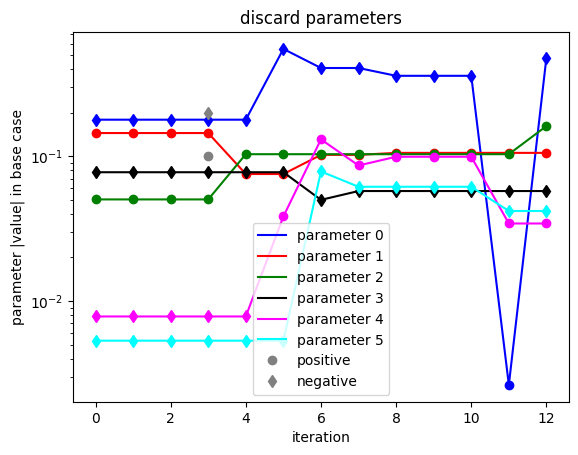

In [24]:
plot_par_iterations(allgrad5,base=True,startpar=25,stoppar=31,locy1=0.1,locy2=0.2)

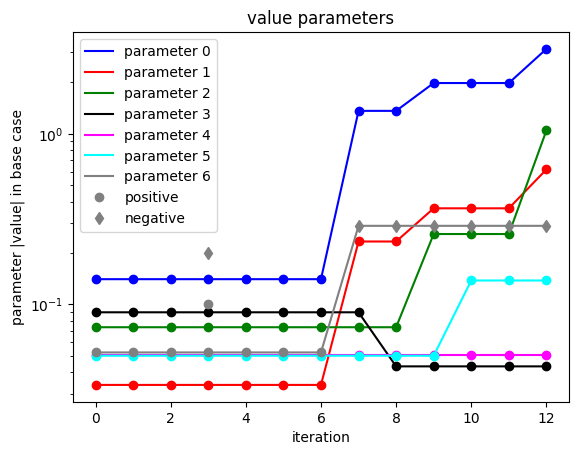

In [25]:
plot_par_iterations(allgrad5,base=True,startpar=31,stoppar=38,locy1=0.1,locy2=0.2)

Similar as before,,discrad looks best, the others less good. Seems less like the making value bigger does not help since teh fit performance gets worse after iteration 4.

Now looking also on the not used base cases. 

In [26]:
allgrad5base=np.load('gradient3_fit3_all.npy')
print(allgrad5base.shape)
for i in range(allgrad5base.shape[1]):
    print(f"iteration {int(allgrad5base[41,i,0]-1)} trial {int(allgrad5base[42,i,0]-1)} {np.mean(allgrad5base[40,i,:])}")

(44, 19, 5)
iteration 0 trial 0 33.85
iteration 1 trial 0 31.75
iteration 2 trial 0 34.35
iteration 3 trial 0 33.95
iteration 4 trial 0 32.95
iteration 5 trial 0 37.4
iteration 6 trial 0 42.3
iteration 7 trial 0 50.25
iteration 7 trial 1 40.9
iteration 8 trial 0 94.6
iteration 8 trial 1 93.8
iteration 8 trial 2 89.6
iteration 8 trial 3 63.8
iteration 8 trial 4 48.55
iteration 8 trial 5 44.3
iteration 9 trial 0 41.2
iteration 10 trial 0 40.4
iteration 11 trial 0 38.9
iteration 12 trial 0 37.15


The main worsening was in iteration 5 and 6, where the first trial was accepted. In 7 the several trials made it a very small improvement, in 8 to another worseing.  
Thus it happens both when there are sveeral trials and when diff/not. 

In [27]:
delta5=np.zeros((7,12))
for i in range(allgrad5.shape[3]-1):
    print(f"iteration {i+1} win_new={np.round(np.mean(allgrad5[40,0,:,i+1]),1)}  win_old={np.round(np.mean(allgrad5[40,0,:,i]),1)}")
    delta5[0,i]=(np.mean(allgrad5[40,0,:,i+1]))-(np.mean(allgrad5[40,0,:,i]))
    for j in range(19):
        if allgrad5[18+j,0,0,i+1]!=allgrad5[18+j,0,0,i]:
            err=100*np.sqrt(np.sum(allgrad5[38,j,:,i])/np.sum(allgrad5[38,j,:,i])**2+np.sum(allgrad5[38,0,:,i])/np.sum(allgrad5[38,0,:,i])**2)
            diff=np.mean(allgrad5[40,j,:,i])-np.mean(allgrad5[40,0,:,i])
            print(f"parameter {j} changed because diff/err={np.round(diff/err,2)} and win={np.mean(allgrad5[40,j,:,i])}%")
            if diff>0:
                delta5[1,i]+=1
                delta5[3,i]+=diff/err
                if diff/err>delta5[5,i]:
                    delta5[5,i]=diff/err
            if diff<0:
                delta5[2,i]+=1    
                delta5[4,i]+=diff/err
                if diff/err<delta5[5,i]:
                    delta5[6,i]=diff/err   

iteration 1 win_new=31.8  win_old=33.8
iteration 2 win_new=34.4  win_old=31.8
parameter 1 changed because diff/err=1.17 and win=37.6%
iteration 3 win_new=34.0  win_old=34.4
iteration 4 win_new=33.0  win_old=34.0
parameter 8 changed because diff/err=1.45 and win=41.2%
parameter 9 changed because diff/err=1.53 and win=41.6%
iteration 5 win_new=37.4  win_old=33.0
parameter 2 changed because diff/err=2.85 and win=47.2%
parameter 5 changed because diff/err=2.09 and win=43.4%
parameter 7 changed because diff/err=2.45 and win=45.2%
parameter 11 changed because diff/err=4.29 and win=54.4%
iteration 6 win_new=42.3  win_old=37.4
parameter 7 changed because diff/err=5.16 and win=63.2%
parameter 8 changed because diff/err=-1.72 and win=28.8%
parameter 10 changed because diff/err=2.88 and win=51.8%
parameter 11 changed because diff/err=-1.0 and win=32.4%
parameter 12 changed because diff/err=1.28 and win=43.8%
iteration 7 win_new=40.9  win_old=42.3
parameter 2 changed because diff/err=2.74 and win=

Text(0.5, 1.0, 'gradient fit 4 and 5')

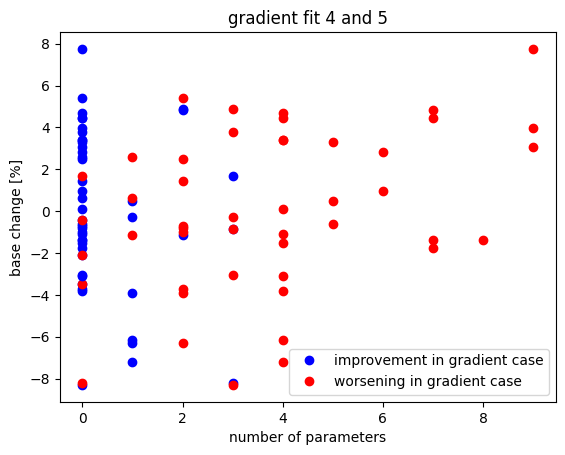

In [28]:
plt.plot(delta4[2],delta4[0],'o',color='blue',label='improvement in gradient case') 
plt.plot(delta4[1],delta4[0],'o',color='red',label='worsening in gradient case') 
plt.plot(delta5[2],delta5[0],'o',color='blue') 
plt.plot(delta5[1],delta5[0],'o',color='red') 
plt.legend(loc="best")
#plt.xscale("log")
plt.xlabel("number of parameters")
plt.ylabel("base change [%]")
plt.title("gradient fit 4 and 5") 

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Text(0.5, 1.0, 'gradient fit 4 and 5')

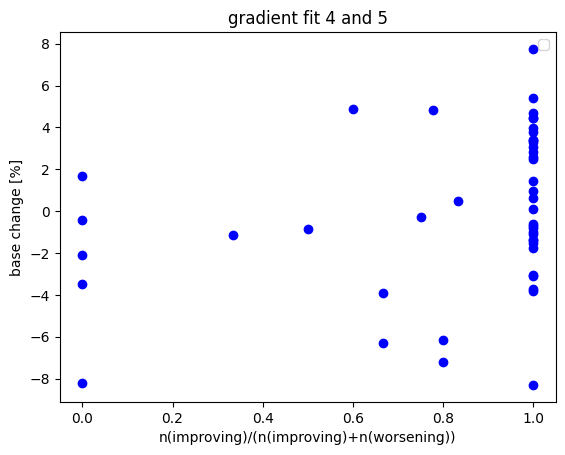

In [29]:
plt.plot(delta4[1]/(delta4[1]+delta4[2]+0.0001),delta4[0],'o',color='blue') 
plt.plot(delta5[1]/(delta5[1]+delta5[2]+0.0001),delta5[0],'o',color='blue') 
plt.legend(loc="best")
#plt.xscale("log")
plt.xlabel("n(improving)/(n(improving)+n(worsening))")
plt.ylabel("base change [%]")
plt.title("gradient fit 4 and 5") 

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Text(0.5, 1.0, 'gradient fit 4 and 5')

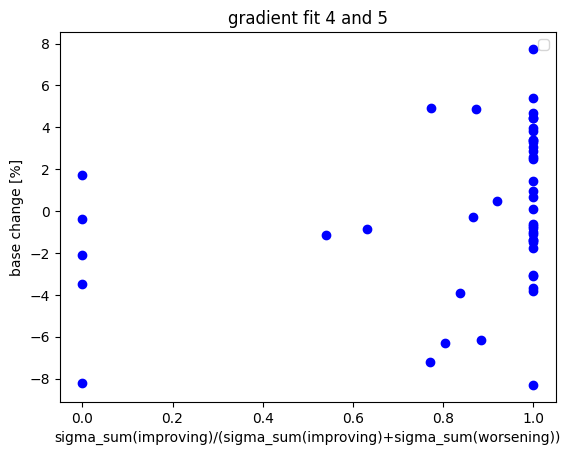

In [30]:
plt.plot(delta4[3]/(delta4[3]-delta4[4]+0.0001),delta4[0],'o',color='blue') 
plt.plot(delta5[3]/(delta5[3]-delta5[4]+0.0001),delta5[0],'o',color='blue') 
plt.legend(loc="best")
#plt.xscale("log")
plt.xlabel("sigma_sum(improving)/(sigma_sum(improving)+sigma_sum(worsening))")
plt.ylabel("base change [%]")
plt.title("gradient fit 4 and 5") 

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Text(0.5, 1.0, 'gradient fit 4 and 5')

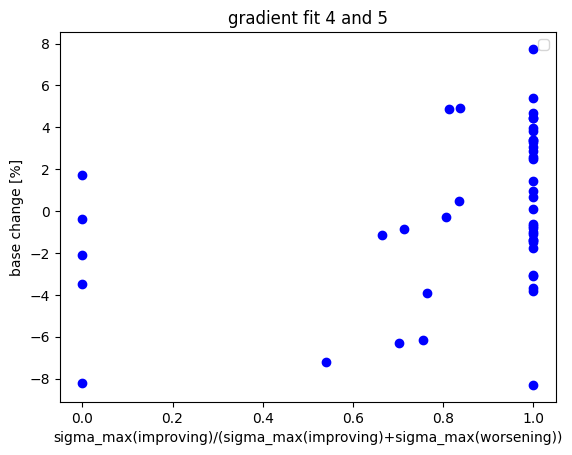

In [31]:
plt.plot(delta4[5]/(delta4[5]-delta4[6]+0.0001),delta4[0],'o',color='blue') 
plt.plot(delta5[5]/(delta5[5]-delta5[6]+0.0001),delta5[0],'o',color='blue') 
plt.legend(loc="best")
#plt.xscale("log")
plt.xlabel("sigma_max(improving)/(sigma_max(improving)+sigma_max(worsening))")
plt.ylabel("base change [%]")
plt.title("gradient fit 4 and 5") 

Seems that increasing gradient are not so useful. I now as additional a power for making bigger offest less useful. 

Less crease how good the steps are. 

Now collecting good cases and running them more iterations.  

In [32]:
for i in range(allgrad5.shape[3]):
    for j in range(allgrad5.shape[1]):
        if np.mean(allgrad5[40,j,:,i])<34.0 and j==0 and i!=0:
            print(f"case {i} {j} losses to {np.mean(allgrad5[40,j,:,i])}")
            good_model2[:,c]=allgrad5[19:38,j,0,i]
            wins2[0,c]=np.mean(allgrad5[40,j,:,i])
            wins2[1,c]=np.mean(allgrad5[38,j,:,i])
            c+=1
        if np.mean(allgrad5[40,j,:,i])<32.0 and j!=0:
            print(f"case {i} {j} losses to {np.mean(allgrad5[40,j,:,i])}")  
            good_model2[:,c]=allgrad5[19:38,j,0,i]
            wins2[0,c]=np.mean(allgrad5[40,j,:,i])
            wins2[1,c]=np.mean(allgrad5[38,j,:,i])
            c+=1
print(f"{c} selected")    

case 0 5 losses to 31.2
case 0 10 losses to 30.6
case 0 12 losses to 29.2
case 0 13 losses to 29.6
case 0 15 losses to 30.2
case 0 17 losses to 29.2
case 1 0 losses to 31.75
case 1 13 losses to 28.2
case 1 19 losses to 31.2
case 2 6 losses to 30.6
case 2 10 losses to 30.0
case 2 12 losses to 29.8
case 2 15 losses to 30.4
case 2 18 losses to 30.8
case 3 0 losses to 33.95
case 3 1 losses to 30.2
case 3 7 losses to 31.6
case 3 10 losses to 30.4
case 3 17 losses to 30.8
case 4 0 losses to 32.95
case 4 3 losses to 31.0
case 4 4 losses to 30.8
case 4 6 losses to 29.8
case 4 14 losses to 30.8
case 4 16 losses to 30.6
case 4 18 losses to 31.8
case 4 19 losses to 30.4
case 5 8 losses to 28.8
41 selected


Checking whether some are duplicates. 

In [33]:
good_model3=np.zeros((19,40))
wins3=np.zeros((2,40))
c2=0
for i in range(41):
    good=True
    for j in range(41):
        if i>j:
            if np.mean(good_model2[:,i])==np.mean(good_model2[:,j]):
                print(i,j)
                good=False
    if good==True:
        good_model3[:,c2]=good_model2[:,i]
        wins3[:,c2]=wins2[:,i]
        c2+=1
print(c2)        

19 4
40


Now running them often in a script.

In next version following changes implemented: Two differenent tolerance for staring several base values and stopping. 
    The starting one is usually larger because it happens per chance, but when a clear negative change is possible then also thus then a harder requirement can be used. In the first trial it is 2.0 first then 0.5 also negative change.
Secondly, a pwer paarmeters is introduced for negative stpes is base and gradient. In the past it was effectively 1. Now 1.5 is used. Below the result is visible. 

In [34]:
res=np.array([1,2,3,4,5])
print(f"before for input of {res} sigma")
print(f"the steps were {1.5/res**1.}")
print(f"Now for input of {res} sigma")
print(f"the steps are {1.5/res**1.5}")

before for input of [1 2 3 4 5] sigma
the steps were [1.5   0.75  0.5   0.375 0.3  ]
Now for input of [1 2 3 4 5] sigma
the steps are [1.5        0.53033009 0.28867513 0.1875     0.13416408]


There is very likely something wrong for value (increases toom much and does not get negative), but not clear what. 

[28.6 31.4 30.6 31.4 32.  32.2 30.6 30.2 30.  29.4 29.6 26.2 30.4 30.4
 28.4 28.6 34. ]


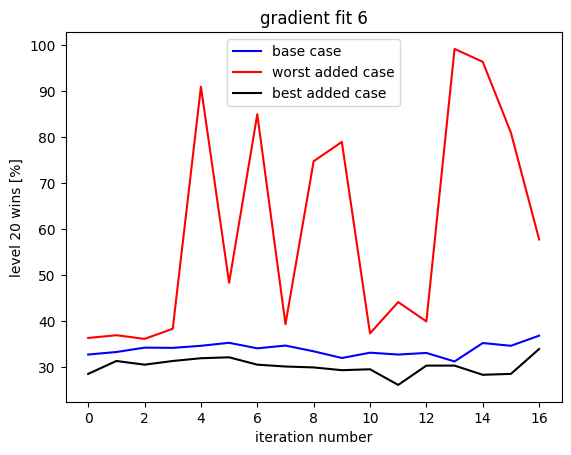

In [35]:
gradfit15=np.load('gradient_fit1_it15.npy')
myPath='/home/tobias/ml-testing/games/skyjo'
list_grad6=[f for f in os.listdir(myPath) 
    if (f.startswith('gradient4_fit1_it') )]
list_grad6.sort()
range2=len(list_grad6)

allgrad6=np.zeros((gradfit15.shape[0],gradfit15.shape[1],gradfit15.shape[2],range2))

for i in range(range2):
    allgrad6[:,:,:,i]=np.load(list_grad6[i])
plt.plot(range(range2),np.mean(allgrad6[40,0,:,:],0),color='blue',label='base case') 
#now correct minimum calculation 
plt.plot(range(range2),np.max(np.mean(allgrad6[40,1:20,:,:],1),0),color='red',label='worst added case') 
plt.plot(range(range2),np.min(np.mean(allgrad6[40,1:20,:,:],1),0),color='black',label='best added case') 
plt.legend(loc="best")
#plt.xscale("log")
plt.xlabel("iteration number")
plt.ylabel("level 20 wins [%]")
plt.title("gradient fit 6")   
print(np.min(np.mean(allgrad6[40,1:20,:,:],1),0))

No worsening but also no improvement, maybe some best cases should be looked on. 

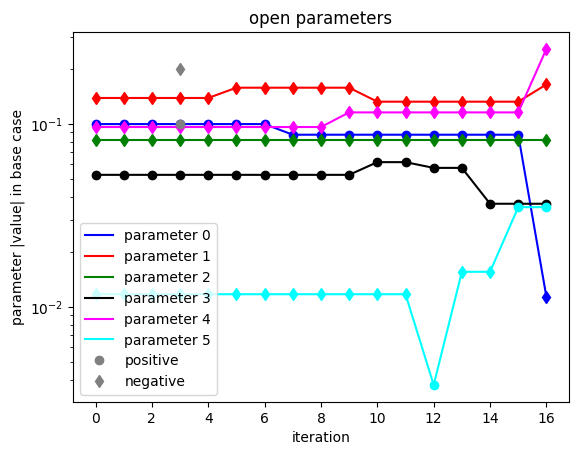

In [36]:
plot_par_iterations(allgrad6,base=True,startpar=19,stoppar=25,locy1=0.1,locy2=0.2)

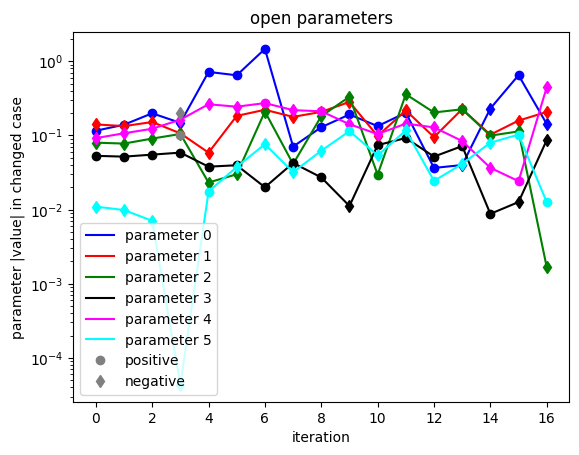

In [37]:
plot_par_iterations(allgrad6,base=False,startpar=19,stoppar=25,locy1=0.1,locy2=0.2)

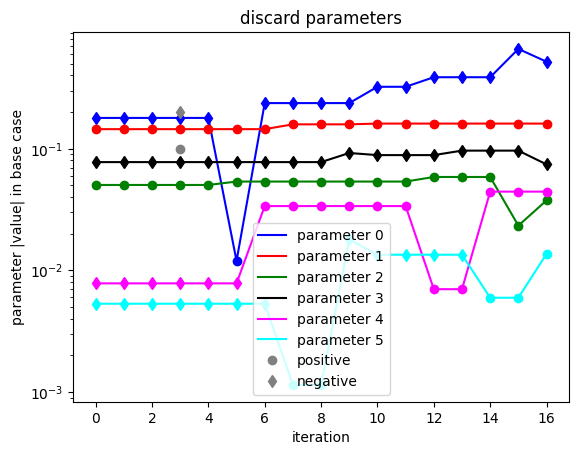

In [38]:
plot_par_iterations(allgrad6,base=True,startpar=25,stoppar=31,locy1=0.1,locy2=0.2)

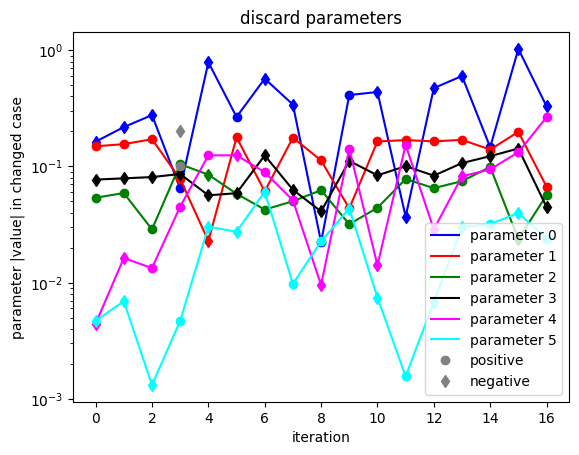

In [39]:
plot_par_iterations(allgrad6,base=False,startpar=25,stoppar=31,locy1=0.1,locy2=0.2)

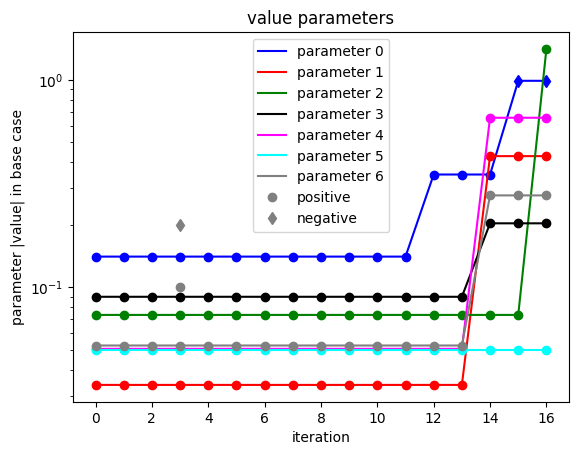

In [40]:
plot_par_iterations(allgrad6,base=True,startpar=31,stoppar=38,locy1=0.1,locy2=0.2)

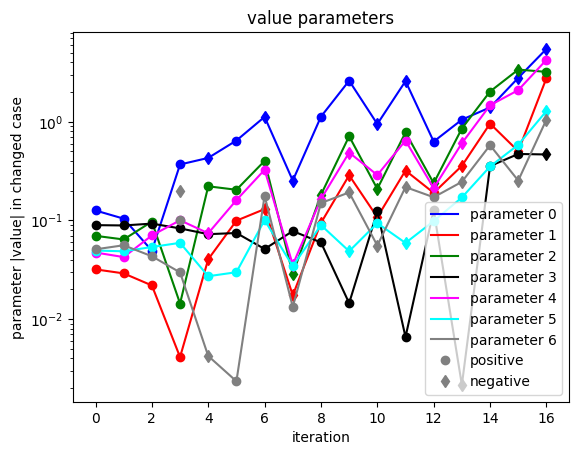

In [41]:
plot_par_iterations(allgrad6,base=False,startpar=31,stoppar=38,locy1=0.1,locy2=0.2)

Still similar as abive, fewer chance now, thus less bad, but also no good ones. Value parameters stay longer flat now, but still increase at some point fast then the fit gets worse. More sign changes now then before but still little. 

Mean that its a positive right directiond eviation often. 

In [42]:
def get_changes(allgrad5):
    delta5=np.zeros((7,allgrad5.shape[3]-1))
    for i in range(allgrad5.shape[3]-1):
        print(f"iteration {i+1} win_new={np.round(np.mean(allgrad5[40,0,:,i+1]),1)}  win_old={np.round(np.mean(allgrad5[40,0,:,i]),1)}")
        delta5[0,i]=(np.mean(allgrad5[40,0,:,i+1]))-(np.mean(allgrad5[40,0,:,i]))
        for j in range(19):
            if allgrad5[18+j,0,0,i+1]!=allgrad5[18+j,0,0,i]:
                err=100*np.sqrt(np.sum(allgrad5[38,j,:,i])/np.sum(allgrad5[38,j,:,i])**2+np.sum(allgrad5[38,0,:,i])/np.sum(allgrad5[38,0,:,i])**2)
                diff=np.mean(allgrad5[40,j,:,i])-np.mean(allgrad5[40,0,:,i])
                print(f"parameter {j} changed because diff/err={np.round(diff/err,2)} and win={np.mean(allgrad5[40,j,:,i])}%")
                if diff>0:
                    delta5[1,i]+=1
                    delta5[3,i]+=diff/err
                    if diff/err>delta5[5,i]:
                        delta5[5,i]=diff/err
                if diff<0:
                    delta5[2,i]+=1    
                    delta5[4,i]+=diff/err
                    if diff/err<delta5[5,i]:
                        delta5[6,i]=diff/err  
    return delta5                    

In [43]:
delta6=get_changes(allgrad6)

iteration 1 win_new=33.4  win_old=32.8
iteration 2 win_new=34.3  win_old=33.4
iteration 3 win_new=34.2  win_old=34.3
iteration 4 win_new=34.7  win_old=34.2
iteration 5 win_new=35.4  win_old=34.7
parameter 2 changed because diff/err=1.7 and win=43.2%
parameter 7 changed because diff/err=1.42 and win=41.8%
parameter 9 changed because diff/err=7.7 and win=73.2%
iteration 6 win_new=34.2  win_old=35.4
parameter 7 changed because diff/err=1.33 and win=42.0%
parameter 11 changed because diff/err=2.61 and win=48.4%
iteration 7 win_new=34.8  win_old=34.2
parameter 1 changed because diff/err=7.49 and win=71.6%
parameter 8 changed because diff/err=1.09 and win=39.6%
parameter 12 changed because diff/err=1.37 and win=41.0%
iteration 8 win_new=33.5  win_old=34.8
iteration 9 win_new=32.0  win_old=33.5
parameter 5 changed because diff/err=8.26 and win=74.8%
parameter 10 changed because diff/err=2.42 and win=45.6%
parameter 12 changed because diff/err=1.42 and win=40.6%
iteration 10 win_new=33.2  win_

In [44]:
good_models2b=np.zeros((19,11))
wins2b=np.zeros((2,11))
c=0
for i in range(1,allgrad6.shape[3]):
    for j in range(allgrad6.shape[1]):
        #excluding first model which same as before
        if np.mean(allgrad6[40,j,:,i])<32.0 and j==0 and i!=0 and np.mean(allgrad6[19:38,j,0,i])!=np.mean(allgrad6[19:38,0,0,0]):
            print(c)
            print(f"case {i} {j} losses to {np.mean(allgrad6[40,j,:,i])}")
            good_models2b[:,c]=allgrad6[19:38,j,0,i]
            wins2b[0,c]=np.mean(allgrad6[40,j,:,i])
            wins2b[1,c]=np.mean(allgrad6[38,j,:,i])
            c+=1
        if np.mean(allgrad6[40,j,:,i])<30.0 and j!=0:
            print(c)
            print(f"case {i} {j} losses to {np.mean(allgrad6[40,j,:,i])}")  
            good_models2b[:,c]=allgrad6[19:38,j,0,i]
            wins2b[0,c]=np.mean(allgrad6[40,j,:,i])
            wins2b[1,c]=np.mean(allgrad6[38,j,:,i])            
            c+=1
print(f"{c} selected")    

0
case 9 13 losses to 29.6
1
case 9 15 losses to 29.8
2
case 9 16 losses to 29.6
3
case 9 17 losses to 29.4
4
case 10 8 losses to 29.8
5
case 10 16 losses to 29.6
6
case 11 2 losses to 29.6
7
case 11 9 losses to 26.2
8
case 13 0 losses to 31.3
9
case 14 13 losses to 28.4
10
case 15 2 losses to 28.6
11 selected


In [45]:
good_model3b=np.zeros((19,11))
c2=0
for i in range(11):
    good=True
    for j in range(11):
        if i>j:
            if np.mean(good_models2b[:,i])==np.mean(good_models2b[:,j]):
                print(i,j)
                good=False
    if good==True:
        good_model3b[:,c2]=good_models2b[:,i]
        c2+=1
print(c2)     

11


In [46]:
allgrad6base=np.load('gradient4_fit1_all.npy')
print(allgrad6base.shape)
for i in range(allgrad6base.shape[1]):
    print(f"iteration {int(allgrad6base[41,i,0]-1)} trial {int(allgrad6base[42,i,0]-1)} {np.mean(allgrad6base[40,i,:])}")

(44, 37, 5)
iteration 0 trial 0 32.8
iteration 1 trial 0 33.35
iteration 2 trial 0 34.3
iteration 3 trial 0 34.25
iteration 4 trial 0 34.7
iteration 5 trial 0 42.05
iteration 5 trial 1 40.5
iteration 5 trial 2 37.2
iteration 5 trial 3 35.35
iteration 6 trial 0 34.15
iteration 7 trial 0 53.5
iteration 7 trial 1 48.4
iteration 7 trial 2 44.1
iteration 7 trial 3 38.5
iteration 7 trial 4 37.3
iteration 7 trial 5 37.35
iteration 7 trial 6 34.75
iteration 8 trial 0 33.5
iteration 9 trial 0 32.05
iteration 10 trial 0 90.65
iteration 10 trial 1 68.65
iteration 10 trial 2 47.65
iteration 10 trial 3 37.0
iteration 10 trial 4 35.1
iteration 10 trial 5 33.2
iteration 11 trial 0 32.8
iteration 12 trial 0 77.8
iteration 12 trial 1 49.7
iteration 12 trial 2 39.75
iteration 12 trial 3 35.2
iteration 12 trial 4 34.95
iteration 12 trial 5 33.15
iteration 13 trial 0 31.3
iteration 14 trial 0 35.3
iteration 15 trial 0 45.7
iteration 15 trial 1 34.7
iteration 16 trial 0 36.9


In [50]:
#doing in pieces first 10 is testbest34a_v2.npy
#10 to 20 is testbest34b_v2.npy
#20 to 25 is testbest34d_v2.npy
#25 to 30 is testbest34c_v2.npy
#30 to 35 is testbest34e_v2.npy
#35 to 40 is testbest34f_v2.npy
set1=np.load("testbest34a_v2.npy")
set2=np.load("testbest34b_v2.npy")
set3=np.load("testbest34d_v2.npy")
set4=np.load("testbest34c_v2.npy")
set5=np.load("testbest34e_v2.npy")
set6=np.load("testbest34f_v2.npy")
combtest33=np.zeros((41,6,40))
combtest33[:,:,0:10]=set1[:,:,0:10]
combtest33[:,:,10:20]=set2[:,:,10:20]
combtest33[:,:,20:25]=set3[:,:,20:25]
combtest33[:,:,25:30]=set4[:,:,25:30]
combtest33[:,:,30:35]=set5[:,:,30:35]
combtest33[:,:,35:40]=set6[:,:,35:40]
print(wins3[:])
print(np.mean(combtest33[40,:,:],0))
print(wins3[0,:]-np.mean(combtest33[40,:,:],0))
set1b=np.load("testbest32a_v2.npy")
set2b=np.load("testbest32b_v2.npy")
combtest31=np.zeros((41,6,11))
combtest31[:,:,0:5]=set1b[:,:,0:5]
combtest31[:,:,5:11]=set2b[:,:,5:11]

[[ 28.4   30.8   30.2   30.2   33.25  30.4   33.9   31.4   31.2   31.8
   31.    30.8   31.8   31.2   30.6   29.2   29.6   30.2   29.2   28.2
   31.2   30.6   30.    29.8   30.4   30.8   33.95  30.2   31.6   30.4
   30.8   32.95  31.    30.8   29.8   30.8   30.6   31.8   30.4   28.8 ]
 [100.   100.   100.   100.   400.   100.   400.   100.   100.   100.
  100.   100.   100.   100.   100.   100.   100.   100.   100.   100.
  100.   100.   100.   100.   100.   100.   400.   100.   100.   100.
  100.   400.   100.   100.   100.   100.   100.   100.   100.   100.  ]]
[32.125      36.         33.66666667 34.41666667 34.54166667 33.41666667
 32.29166667 33.58333333 34.25       33.70833333 31.875      34.16666667
 34.5        32.75       32.66666667 32.125      33.29166667 35.125
 34.66666667 33.5        32.375      33.08333333 34.         31.41666667
 31.91666667 33.04166667 32.45833333 33.375      32.375      32.125
 33.91666667 33.91666667 30.66666667 34.08333333 34.79166667 32.54166667
 3

Fit is nearly always worse, thus improvement was only chance, see also plot. 

Text(0.5, 1.0, 'selection of best fits')

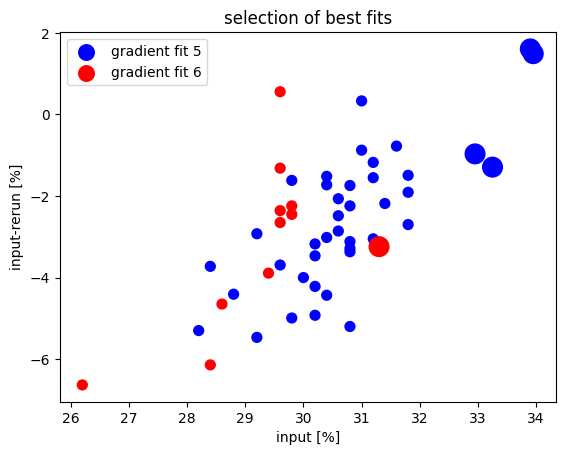

In [51]:
plt.scatter(wins3[0,0:40],wins3[0,0:40]-np.mean(combtest33[40,:,0:40],0),s=wins3[1,0:40]/2,color='blue',label="gradient fit 5") 
plt.scatter(wins2b[0,0:11],wins2b[0,0:11]-np.mean(combtest31[40,:,0:11],0),s=wins2b[1,0:11]/2,color='red',label="gradient fit 6") 
plt.legend(loc="best")
#plt.xscale("log")
plt.xlabel("input [%]")
plt.ylabel("input-rerun [%]")
plt.title("selection of best fits") 

[32.25       32.25       31.95833333 33.29166667 32.04166667 30.91666667
 29.04166667 32.83333333 34.54166667 34.54166667 33.25      ]
6


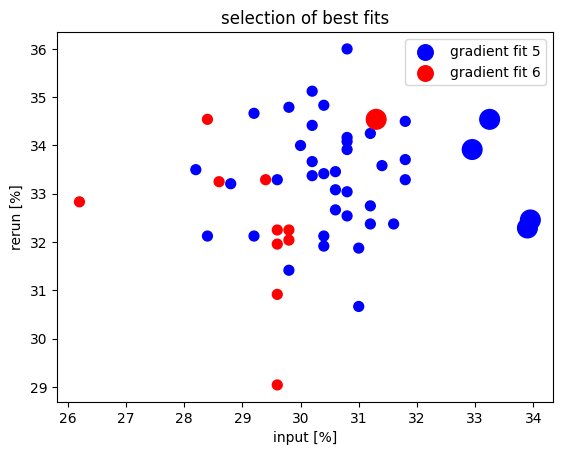

In [56]:
plt.scatter(wins3[0,0:40],np.mean(combtest33[40,:,0:40],0),s=wins3[1,0:40]/2,color='blue',label="gradient fit 5") 
plt.scatter(wins2b[0,0:11],np.mean(combtest31[40,:,0:11],0),s=wins2b[1,0:11]/2,color='red',label="gradient fit 6") 
plt.legend(loc="best")
#plt.xscale("log")
plt.xlabel("input [%]")
plt.ylabel("rerun [%]")
plt.title("selection of best fits") 
#no 6 is best 
print(np.mean(combtest31[40,:,0:11],0))
print(np.argmin(np.mean(combtest31[40,:,0:11],0)))

Differences especially larger for smaller input values, less for beyound 32 because that were the 400 iterations run. Some in gradient 6 maybe better. 

Is not working, need new method. Now Monte Carlo with Gaussian search around current best value.

Looking on Monte Carlo gaussian results.

In [142]:
mcg1=np.load("mcg_v1_all.npy")
sel_modelg=np.zeros((41,23,6))
csel=0
for i in range(mcg.shape[1]):
    if np.mean(mcg[40,i,:])<28.0:
        print(np.mean(mcg[40,i,:]))
        sel_modelg[:,csel]=mcg[:,i,:]
        csel+=1
print(f"{csel} are selected")    
#now looking on next best models 
sel_modelg2=np.zeros((41,34,6))
csel2=0
for i in range(mcg.shape[1]):
    if np.mean(mcg[40,i,:])>=28.0 and np.mean(mcg[40,i,:])<29.5:
        print(np.mean(mcg[40,i,:]))
        sel_modelg2[:,csel2]=mcg[:,i,:]
        csel2+=1
print(f"{csel2} are selected") 

26.666666666666668
27.333333333333332
23.181818181818183
27.666666666666668
27.666666666666668
26.64102564102564
25.033670033670035
27.333333333333332
27.387755102040817
26.0
24.666666666666668
27.666666666666668
24.666666666666668
27.333333333333332
27.333333333333332
21.718050065876156
25.444444444444446
24.8695652173913
22.75
26.185185185185187
27.51851851851852
26.64102564102564
26.8695652173913
23 are selected
28.721088435374153
29.0
28.333333333333332
28.0
29.333333333333332
29.416666666666668
29.0
29.0
29.333333333333332
29.333333333333332
28.333333333333332
28.0
28.666666666666668
29.0
28.333333333333332
28.0
29.333333333333332
29.0
28.333333333333332
28.333333333333332
28.202898550724637
28.666666666666668
29.0
28.666666666666668
28.333333333333332
28.11111111111111
28.0
29.0
28.666666666666668
29.333333333333332
29.333333333333332
28.333333333333332
29.333333333333332
29.416666666666668
34 are selected


In [ ]:
Some are better than the input of 29. Now running with more iterations, to see which are chance and which real. 
Below the quantiles.

In [83]:
quantiles=np.zeros((2,19))
for i in range(19):
    quantiles[0,i]=0.05+i*0.05
quantiles[1]=np.quantile(np.mean(mcg[40,:,:],1),[quantiles[0]])
print("quantiles")
print(np.round(quantiles.T,2))

quantiles
[[5.000e-02 2.800e+01]
 [1.000e-01 2.933e+01]
 [1.500e-01 3.033e+01]
 [2.000e-01 3.167e+01]
 [2.500e-01 3.233e+01]
 [3.000e-01 3.306e+01]
 [3.500e-01 3.367e+01]
 [4.000e-01 3.433e+01]
 [4.500e-01 3.533e+01]
 [5.000e-01 3.567e+01]
 [5.500e-01 3.667e+01]
 [6.000e-01 3.733e+01]
 [6.500e-01 3.833e+01]
 [7.000e-01 4.000e+01]
 [7.500e-01 4.108e+01]
 [8.000e-01 4.333e+01]
 [8.500e-01 4.705e+01]
 [9.000e-01 5.470e+01]
 [9.500e-01 6.637e+01]]


Looking on reruns of selected. 

(41, 6, 23)
(41, 6, 23)
[29.11111111 30.22222222 32.79910548 28.59259259 28.85185185 30.19431988
 29.37429749 27.88888889 31.01148574 27.59259259 32.11111111 26.7037037
 28.25925926 29.14814815 31.22222222 28.48077641 30.78358209 30.9347181
 30.14869888 30.23082651 30.41697692 32.92227205 29.00593472]
0
29.1 26.7
1
30.2 27.3
2
32.8 23.2
3
28.6 27.7
4
28.9 27.7
5
30.2 26.6
6
29.4 25.0
7
27.9 27.3
8
31.0 27.4
9
27.6 26.0
10
32.1 24.7
11
26.7 27.7
12
28.3 24.7
13
29.1 27.3
14
31.2 27.3
15
28.5 21.7
16
30.8 25.4
17
30.9 24.9
18
30.1 22.8
19
30.2 26.2
20
30.4 27.5
21
32.9 26.6
22
29.0 26.9
26.703703703703702
11
[-0.07820701 -0.24618614 -0.06755634  0.06325655 -0.03718775 -0.00551147
 -0.35621227  0.10688899  0.12334701 -0.08318814  0.00354336  0.00069561
  0.25004914  0.03720256  0.07832001  0.0916222  -0.00783723  0.05945068
  0.03285409]


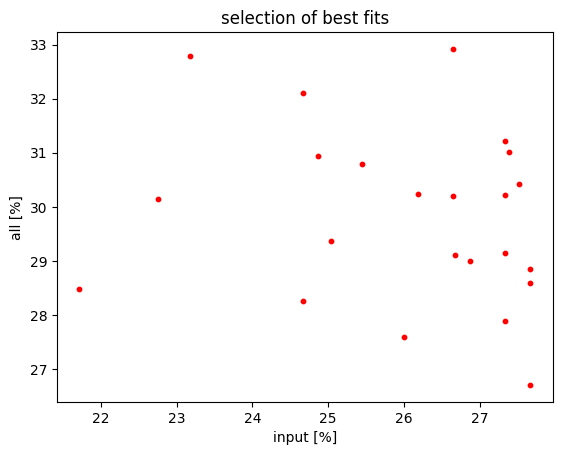

In [127]:
run29a=np.load("testbest29a_v2.npy")
run29b=np.load("testbest29b_v2.npy")
print(run29a.shape)
run29=np.zeros((41,6,23))
run29[:,:,0:11]=run29a[:,:,0:11]
run29[:,:,11:23]=run29b[:,:,11:23]
run29aa=np.load("testbest29aa_v2.npy")
run29bb=np.load("testbest29bb_v2.npy")
print(run29a.shape)
run291=np.zeros((41,6,23))
run291[:,:,0:11]=run29aa[:,:,0:11]
run291[:,:,11:23]=run29bb[:,:,11:23]
tot=100*(np.sum(run29[39,:,:],0)+np.sum(sel_modelg[39,:,:],1)+np.sum(run291[39,:,:],0))/(np.sum(run29[38,:,:],0)+np.sum(run291[38,:,:],0)+np.sum(sel_modelg[38,:,:],1))
print(tot)
for i in range(23):
    print(i)
    print(np.round(tot[i],1),np.round(np.mean(sel_modelg[40,i,:]),1))

plt.scatter(np.mean(sel_modelg[40,:,:],1),tot,s=10,color='red') 
#plt.legend(loc="best")
#plt.xscale("log")
plt.xlabel("input [%]")
plt.ylabel("all [%]")
plt.title("selection of best fits") 
print(min(tot))
print(np.argmin(tot))
print(sel_modelg[19:38,np.argmin(tot),0])

Some fits are an improvements. The best is close to the limit, indicating maybe too strict selection and there were not enough runs to have a reliable sample.
with 26.7% it is only slightly better than the input of 29.0%. 

Looking now on the diviations of the models compared to the mean.

32.922272047832585
[-0.65258283  1.82103355  1.97712211 -0.00374046  0.4831785  -0.01372121
 -0.49494877 -0.25040332  0.46829611  1.51064483 -0.63221259  0.08427554
 -0.36149852 -1.50274384  0.99681528  0.30530585  0.27339596 -2.40583214
  1.06648478]
(41, 500, 6)
[ 1.73323872e+00  6.45801299e-01  2.46251281e+00 -1.14045231e+00
  7.79016175e-01 -1.17342094e+00 -5.36102430e-01 -8.69650994e-01
  3.94794628e-01  4.35116624e-01 -5.18255919e-01  5.58679871e-01
  5.49759607e-01  1.02329225e+00 -3.45549224e-01  1.53805581e+00
  8.57751041e-04  2.32229805e-01  4.67488990e-01]
0.9402791197950218


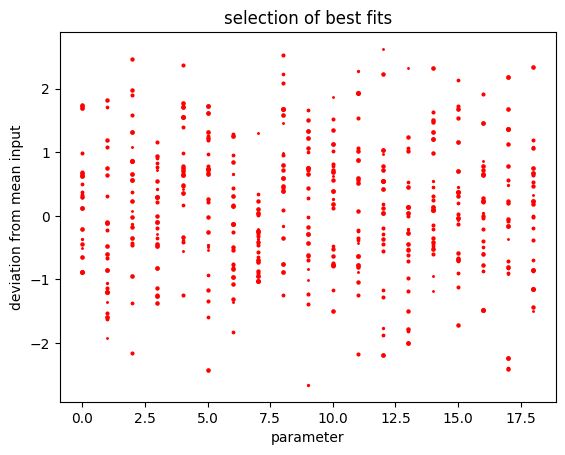

In [138]:
dev=np.zeros((23,19))
print(max(tot))
for i in range(23):
    for j in range(19):
        dev[i,j]=(sel_modelg[19+j,i,0]-np.mean(mcg[19+j,:,:]))/np.std(mcg[19+j,:,:])
print(dev[0,:])  
print(mcg.shape)
for i in range(23):
    plt.scatter(range(19),dev[i],s=34-tot[i],color='red') 
#plt.legend(loc="best")
#plt.xscale("log")
plt.xlabel("parameter")
plt.ylabel("deviation from mean input")
plt.title("selection of best fits") 
print(dev[6])
#deviation is less than 1 but not much that is just chance
print(np.std(dev[6]))


In [ ]:
Rather avearge properties of best model. 
Is rather easy to win against, but kind of o.k. 

In general the question is whether a local (or even global) minimum is reached and how that would be recognized

Should probably try starting with another of the Monte Carlo solutions of run 9.